In [1]:
from numpy import *
from scipy import special
import scipy.integrate as integrate
%pylab inline
import matplotlib.gridspec as gridspec
from scipy.optimize import fsolve
from scipy.interpolate import griddata
from sympy import DiracDelta
from matplotlib.colors import LogNorm
from scipy.optimize import brentq
from functools import reduce
from scipy.optimize import curve_fit
import math

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from matplotlib import rc
rc('font',**{'family':'serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{amssymb}')

Populating the interactive namespace from numpy and matplotlib


### Test event weights

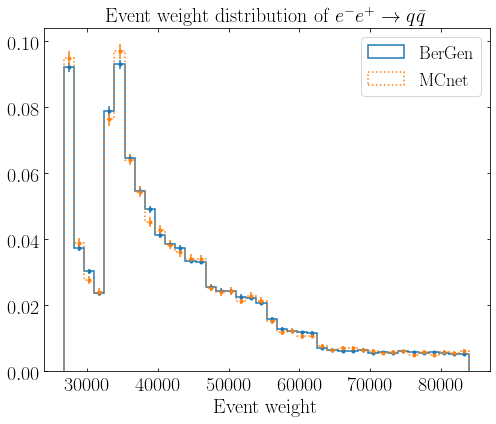

In [134]:
test = loadtxt("test/test_weights.out")
test_MCnet = loadtxt("../mcnet-tutorial-material/01-WriteYourOwnPartonShower/test_weights.out")
fig, ax = subplots()
figsize(7,6)

xbin=linspace(min(test.T[4]), max(test.T[4]), 41)
h1=ax.hist(test.T[4], bins=xbin, weights=ones(len(test))/len(test), histtype='step', linestyle='-', lw=1.5, color='C0', label=r'BerGen')
h2=ax.hist(test_MCnet.T[4], bins=xbin, weights=ones(len(test_MCnet))/len(test_MCnet), histtype='step', linestyle=':', lw=1.5, color='C1', label=r'MCnet')
errorbar(0.5*(h1[1][1:] + h1[1][:-1]), h1[0], yerr=sqrt(h1[0]/len(test)), fmt='.C0')
errorbar(0.5*(h2[1][1:] + h2[1][:-1]), h2[0], yerr=sqrt(h2[0]/len(test_MCnet)), fmt='.C1')

xlabel(r'Event weight', fontsize=20)
#ylabel(r'$1/N_{jet}\mathrm{d}N/\mathrm{d}\theta_g$', fontsize=20)
title(r'Event weight distribution of $e^-e^+\to q\bar q$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18, ncol=1,loc='upper right');
#savefig("medium/N_thetag_shower_medium_full.pdf", bbox_inches="tight")
tight_layout()
show()

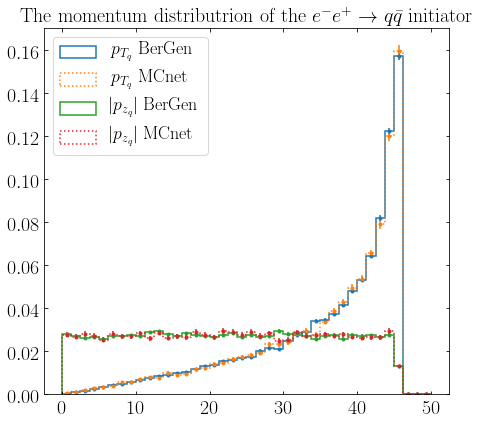

In [135]:
fig, ax = subplots()
figsize(7,6)

xbin=linspace(0, 50, 41)
h1=ax.hist(sqrt(test_weights.T[1]**2.+test_weights.T[2]**2.), bins=xbin, weights=ones(len(test))/len(test), histtype='step', linestyle='-', lw=1.5, color='C0', label=r'$ p_{T_q}$ BerGen')
h2=ax.hist(sqrt(test_weights_mcnet.T[1]**2.+test_weights_mcnet.T[2]**2.), bins=xbin, weights=ones(len(test_MCnet))/len(test_MCnet), histtype='step', linestyle=':', lw=1.5, color='C1', label=r'$p_{T_q}$ MCnet')
errorbar(0.5*(h1[1][1:] + h1[1][:-1]), h1[0], yerr=sqrt(h1[0]/len(test)), fmt='.C0')
errorbar(0.5*(h2[1][1:] + h2[1][:-1]), h2[0], yerr=sqrt(h2[0]/len(test_MCnet)), fmt='.C1')

h1=ax.hist(abs(test_weights.T[3]), bins=xbin, weights=ones(len(test))/len(test), histtype='step', linestyle='-', lw=1.5, color='C2', label=r'$|p_{z_q}|$ BerGen')
h2=ax.hist(abs(test_weights_mcnet.T[3]), bins=xbin, weights=ones(len(test_MCnet))/len(test_MCnet), histtype='step', linestyle=':', lw=1.5, color='C3', label=r'$|p_{z_q}|$ MCnet')
errorbar(0.5*(h1[1][1:] + h1[1][:-1]), h1[0], yerr=sqrt(h1[0]/len(test)), fmt='.C2')
errorbar(0.5*(h2[1][1:] + h2[1][:-1]), h2[0], yerr=sqrt(h2[0]/len(test_MCnet)), fmt='.C3')

#xlabel(r'$p_{T_{q_1}}$', fontsize=20)
#ylabel(r'$1/N_{jet}\mathrm{d}N/\mathrm{d}\theta_g$', fontsize=20)
title(r'The momentum distributrion of the $e^-e^+\to q\bar q$ initiator', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18, ncol=1,loc='upper left');
#savefig("medium/N_thetag_shower_medium_full.pdf", bbox_inches="tight")
tight_layout()
show()

### Test kinematics

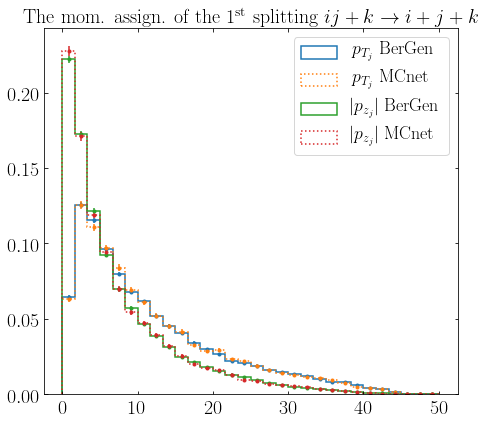

In [144]:
test = loadtxt("test/test_kinematics.out")
test_MCnet = loadtxt("../mcnet-tutorial-material/01-WriteYourOwnPartonShower/test_kinematics.out")
fig, ax = subplots()
figsize(7,6)

xbin=linspace(0, 50, 31)
h1=ax.hist(sqrt(test.T[1]**2.+test.T[2]**2.), bins=xbin, weights=ones(len(test))/len(test), histtype='step', linestyle='-', lw=1.5, color='C0', label=r'$ p_{T_j}$ BerGen')
h2=ax.hist(sqrt(test_MCnet.T[1]**2.+test_MCnet.T[2]**2.), bins=xbin, weights=ones(len(test_MCnet))/len(test_MCnet), histtype='step', linestyle=':', lw=1.5, color='C1', label=r'$p_{T_j}$ MCnet')
errorbar(0.5*(h1[1][1:] + h1[1][:-1]), h1[0], yerr=sqrt(h1[0]/len(test)), fmt='.C0')
errorbar(0.5*(h2[1][1:] + h2[1][:-1]), h2[0], yerr=sqrt(h2[0]/len(test_MCnet)), fmt='.C1')

h1=ax.hist(abs(test.T[3]), bins=xbin, weights=ones(len(test))/len(test), histtype='step', linestyle='-', lw=1.5, color='C2', label=r'$|p_{z_j}|$ BerGen')
h2=ax.hist(abs(test_MCnet.T[3]), bins=xbin, weights=ones(len(test_MCnet))/len(test_MCnet), histtype='step', linestyle=':', lw=1.5, color='C3', label=r'$|p_{z_j}|$ MCnet')
errorbar(0.5*(h1[1][1:] + h1[1][:-1]), h1[0], yerr=sqrt(h1[0]/len(test)), fmt='.C2')
errorbar(0.5*(h2[1][1:] + h2[1][:-1]), h2[0], yerr=sqrt(h2[0]/len(test_MCnet)), fmt='.C3')

#xlabel(r'$p_T$', fontsize=20)
#ylabel(r'$1/N_{jet}\mathrm{d}N/\mathrm{d}\theta_g$', fontsize=20)
title(r'The mom. assign. of the 1$^{\rm st}$ splitting $ij+k\to i+j+k$',fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18, ncol=1,loc='upper right');
#savefig("medium/N_thetag_shower_medium_full.pdf", bbox_inches="tight")
tight_layout()
show()

### Test Multiplicity

In [14]:
test = loadtxt("test/test_multiplicity.out")
test_MCnet = loadtxt("../mcnet-tutorial-material/01-WriteYourOwnPartonShower/test_multiplicity.out")

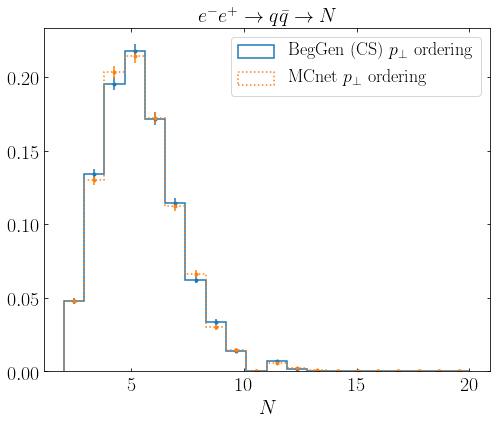

In [15]:
fig, ax = subplots()
figsize(7,6)

xbin=linspace(2, 20, 21)
h1=ax.hist(test.T[0], bins=xbin, weights=ones(len(test))/len(test), histtype='step', linestyle='-', lw=1.5, color='C0', label=r'BegGen (CS) $p_{\perp}$ ordering')
h2=ax.hist(test_MCnet.T[0], bins=xbin, weights=ones(len(test_MCnet))/len(test_MCnet), histtype='step', linestyle=':', lw=1.5, color='C1', label=r'MCnet $p_{\perp}$ ordering')
errorbar(0.5*(h1[1][1:] + h1[1][:-1]), h1[0], yerr=sqrt(h1[0]/len(test)), fmt='.C0')
errorbar(0.5*(h2[1][1:] + h2[1][:-1]), h2[0], yerr=sqrt(h2[0]/len(test_MCnet)), fmt='.C1')

#xlim(0.035,3)
#ylim(0,4)
xlabel(r'$N$', fontsize=20)
#ylabel(r'$1/N_{jet}\mathrm{d}N/\mathrm{d}\theta_g$', fontsize=20)
title(r'$e^-e^+\to q\bar q\to N$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18, ncol=1,loc='upper right');
#savefig("medium/N_thetag_shower_medium_full.pdf", bbox_inches="tight")
tight_layout()
show()

### Test veto Catani-Seymour

In [156]:
test = loadtxt("test/test_veto.out")
test_MCnet = loadtxt("../mcnet-tutorial-material/01-WriteYourOwnPartonShower/test_veto.out")

OSError: test/test_veto.out not found.

TypeError: 'numpy.float64' object is not iterable

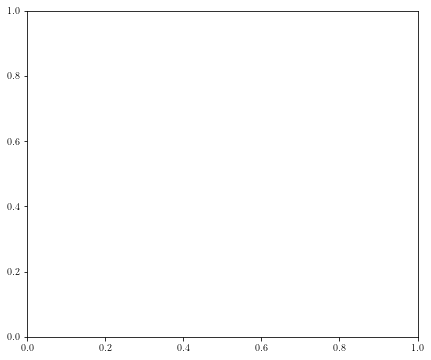

In [157]:
fig, ax = subplots()
figsize(7,6)

xbin=logspace(log10(min(test.T[2])), log10(max(test.T[2])), 21)
h1=ax.hist(test.T[2], bins=xbin, weights=ones(len(test))/len(test), histtype='step', linestyle='-', lw=1.5, color='C0', label=r'$p_{\perp}$ ordering')
h2=ax.hist(test_MCnet.T[2], bins=xbin, weights=ones(len(test_MCnet))/len(test_MCnet), histtype='step', linestyle=':', lw=1.5, color='C1', label=r'$p_{\perp}$ ordering')
errorbar(0.5*(h1[1][1:] + h1[1][:-1]), h1[0], yerr=sqrt(len(test)*h1[0])/len(test), fmt='.C0')
errorbar(0.5*(h2[1][1:] + h2[1][:-1]), h2[0], yerr=sqrt(len(test_MCnet)*h2[0])/len(test_MCnet), fmt='.C1')

ax.set_xscale('log')
#xlim(0.035,3)
#ylim(0,4)
xlabel(r'$p^2_{\perp}$', fontsize=20)
#ylabel(r'$1/N_{jet}\mathrm{d}N/\mathrm{d}\theta_g$', fontsize=20)
title(r'Generated $p_{T{\rm ev}}$ distribution of the 1$^{\rm st}$ splitting', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18, ncol=1,loc='upper right');
#savefig("medium/N_thetag_shower_medium_full.pdf", bbox_inches="tight")
tight_layout()
show()

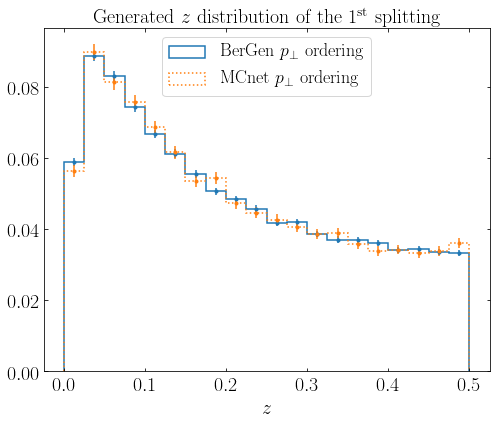

In [147]:
fig, ax = subplots()
figsize(7,6)

xbin=linspace(0, 0.5, 21)
h1=ax.hist(0.5*(1.-sqrt(1.-4.*test.T[0]*(1.-test.T[0]))), bins=xbin, weights=ones(len(test))/len(test), histtype='step', linestyle='-', lw=1.5, color='C0', label=r'BerGen $p_{\perp}$ ordering')
h2=ax.hist(0.5*(1.-sqrt(1.-4.*test_MCnet.T[0]*(1.-test_MCnet.T[0]))), bins=xbin, weights=ones(len(test_MCnet))/len(test_MCnet), histtype='step', linestyle=':', lw=1.5, color='C1', label=r'MCnet $p_{\perp}$ ordering')
errorbar(0.5*(h1[1][1:] + h1[1][:-1]), h1[0], yerr=sqrt(len(test)*h1[0])/len(test), fmt='.C0')
errorbar(0.5*(h2[1][1:] + h2[1][:-1]), h2[0], yerr=sqrt(len(test_MCnet)*h2[0])/len(test_MCnet), fmt='.C1')


#xlim(0.035,3)
#ylim(0,4)
xlabel(r'$z$', fontsize=20)
#ylabel(r'$1/N_{jet}\mathrm{d}N/\mathrm{d}\theta_g$', fontsize=20)
title(r'Generated $z$ distribution of the 1$^{\rm st}$ splitting', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18, ncol=1,loc='upper center');
#savefig("medium/N_thetag_shower_medium_full.pdf", bbox_inches="tight")
tight_layout()
show()

### Test Veto Algorithm

In [2]:
def alpha_s(Q2):
    t_minPT = 0.95**2.
    nf      = 3.
    b       = ( 33. - 2. * nf ) / (12. * pi)
    Lam2    = 0.2**2. # in GeV
    if (Q2 >= t_minPT): return 1. / (b * log( Q2 / Lam2 ))
    else              : return 1. / (b * log( t_minPT / Lam2 ))
def P_gg(x):
    CA = 3.
    return CA * (x/(1.-x) + (1.-x)/x + x*(1.-x))
def fpt(pt2, t_max, pT2_min):
    int_temp = 1./pt2 * integrate.quad(lambda z: alpha_s(pt2)/2./pi*2.*P_gg(z), max(0.5*(1.-sqrt(1.-4.*pt2/t_max)), 0.5*(1.-sqrt(1.-4.*(sqrt(t_max*pt2)-pt2)/t_max))), min(0.5*(1.+sqrt(1.-4.*pt2/t_max)), 0.5*(1.+sqrt(1.-4.*(sqrt(t_max*pt2)-pt2)/t_max))))[0]
    return int_temp
def Spt(t, t_max, pT2_min):
    return exp(- integrate.quad(lambda tx: fpt(tx, t_max, pT2_min), t, t_max/4.)[0])
def fm(t, t_max, pT2_min):
    int_temp = 1./t * integrate.quad(lambda z: alpha_s(z*(1.-z)*t)/2./pi*2.*P_gg(z), max(0.5*(1.-sqrt(1.-4.*pT2_min/t)), 0.5*(1.-(t_max-t)/(t_max+t))), min(0.5*(1.+sqrt(1.-4.*pT2_min/t)), 0.5*(1.+(t_max-t)/(t_max+t))))[0]
    return int_temp
def Sm(t, t_max, pT2_min):
    return exp(- integrate.quad(lambda tx: fm(tx, t_max, pT2_min), t, t_max)[0])
def fq(q2, t_max, pT2_min):
    int_temp = 1./q2 * integrate.quad(lambda z: alpha_s((z*(1.-z))**2.*q2)/2./pi*2.*P_gg(z), max(0.5*(1.-sqrt(1.-4.*sqrt(pT2_min/q2))), 0.5*(1.-sqrt(1.-4.*(sqrt(t_max*q2)-t_max)/q2))), min(0.5*(1.+sqrt(1.-4.*sqrt(pT2_min/q2))), 0.5*(1.+sqrt(1.-4.*(sqrt(t_max*q2)-t_max)/q2))))[0]
    return int_temp
def Sq(q2, t_max, pT2_min):
    return exp(- integrate.quad(lambda tx: fq(tx, t_max, pT2_min), q2, 4.*t_max)[0])

In [3]:
pT2_min = 1.
t_max = 1e4
t=logspace(log10(pT2_min), log10(t_max/4.), 50)
dPperdpt2=array([[i, fpt(i,t_max,pT2_min), Spt(i,t_max,pT2_min), fpt(i,t_max,pT2_min)*Spt(i,t_max,pT2_min)] for i in t])

/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


In [113]:
test = loadtxt("test/test_veto.out")
test_MCnet = loadtxt("../mcnet-tutorial-material/01-WriteYourOwnPartonShower/test_veto.out")

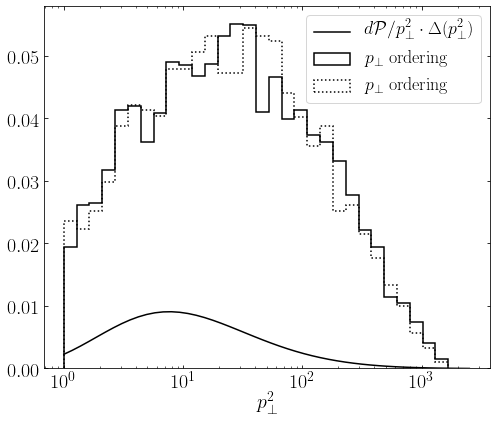

In [114]:
fig, ax = subplots()
figsize(7,6)

xbin=logspace(log10(min(test.T[2])), log10(max(test.T[2])), 31)
ax.hist(test.T[2], bins=xbin, weights=ones(len(test))/len(test), histtype='step', linestyle='-', lw=1.5, color='k', label=r'$p_{\perp}$ ordering')
ax.hist(test_MCnet.T[2], bins=xbin, weights=ones(len(test_MCnet))/len(test_MCnet), histtype='step', linestyle=':', lw=1.5, color='k', label=r'$p_{\perp}$ ordering')
ax.semilogx(dPperdpt2.T[0], dPperdpt2.T[3], 'k-', label=r'$d\mathcal{P}/p^2_{\perp}\cdot\Delta(p^2_{\perp})$')
#ax.hist(res_t, bins=logspace(log10(pT2_min), log10(t_max/4.), 100), density=True, histtype='step', color='gold', label=r'Original')

ax.set_xscale('log')
#xlim(0.035,3)
#ylim(0,4)
xlabel(r'$p^2_{\perp}$', fontsize=20)
#ylabel(r'$1/N_{jet}\mathrm{d}N/\mathrm{d}\theta_g$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18, ncol=1,loc='upper right');
#savefig("medium/N_thetag_shower_medium_full.pdf", bbox_inches="tight")
tight_layout()
show()

In [6]:
t=logspace(log10(4.*pT2_min), log10(t_max), 50)
dPperdt=array([[i, fm(i,t_max,pT2_min), Sm(i,t_max,pT2_min), fm(i,t_max,pT2_min)*Sm(i,t_max,pT2_min)] for i in t])

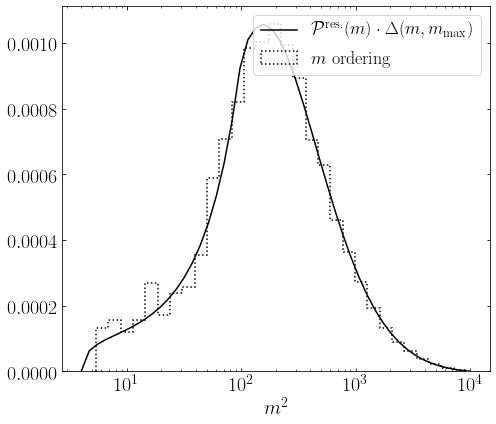

In [36]:
test = loadtxt("test.out")
fig, ax = subplots()
figsize(7,6)

xbin=logspace(log10(min(test.T[1])), log10(max(test.T[1])), 31)
ax.hist(test.T[1], bins=xbin, density=True, histtype='step', linestyle=':', lw=1.5, color='k', label=r'$m$ ordering')
ax.semilogx(dPperdt.T[0], dPperdt.T[3], 'k-', label=r'$\mathcal{P}^{\rm res.}(m)\cdot\Delta(m,m_{\rm max})$')

ax.set_xscale('log')
#xlim(0.035,3)
#ylim(0,4)
xlabel(r'$m^2$', fontsize=20)
#ylabel(r'$1/N_{jet}\mathrm{d}N/\mathrm{d}\theta_g$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18, ncol=1,loc='upper right');
#savefig("medium/N_thetag_shower_medium_full.pdf", bbox_inches="tight")
tight_layout()
show()

In [10]:
t=logspace(log10(2.*t_eff/(sqrt(t_max)/2.)), log10(sqrt(t_max)), 50)
dPperdtf=array([[i, ftf(i,t_max,t_eff), Stf(i,t_max,t_eff), ftf(i,t_max,t_eff)*Stf(i,t_max,t_eff)] for i in t])

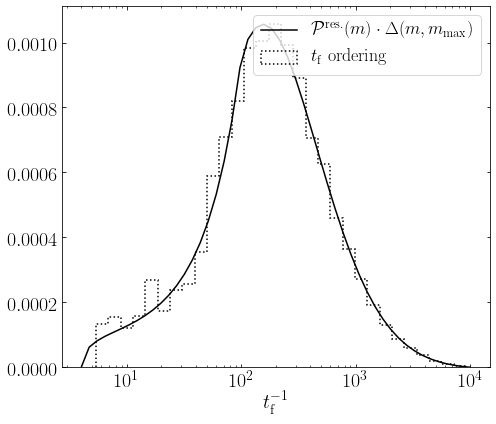

In [51]:
test = loadtxt("test.out")
fig, ax = subplots()
figsize(7,6)

xbin=logspace(log10(min(test.T[1])), log10(max(test.T[1])), 31)
ax.hist(test.T[1], bins=xbin, density=True, histtype='step', linestyle=':', lw=1.5, color='k', label=r'$t_{\rm f}$ ordering')
ax.semilogx(dPperdt.T[0], dPperdt.T[3], 'k-', label=r'$\mathcal{P}^{\rm res.}(m)\cdot\Delta(m,m_{\rm max})$')

ax.set_xscale('log')
#xlim(0.035,3)
#ylim(0,4)
xlabel(r'$t^{-1}_{\rm f}$', fontsize=20)
#ylabel(r'$1/N_{jet}\mathrm{d}N/\mathrm{d}\theta_g$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18, ncol=1,loc='upper right');
#savefig("medium/N_thetag_shower_medium_full.pdf", bbox_inches="tight")
tight_layout()
show()

In [43]:
t=logspace(log10(16.*pT2_min), log10(4.*t_max), 50)
dPperdq=array([[i, fq(i,t_max,pT2_min), Sq(i,t_max,pT2_min), fq(i,t_max,pT2_min)*Sq(i,t_max,pT2_min)] for i in t])

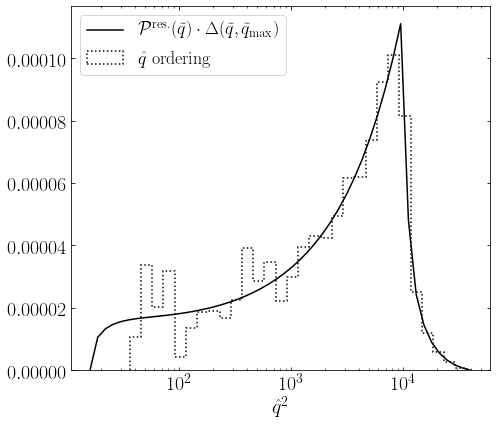

In [45]:
test = loadtxt("test.out")
fig, ax = subplots()
figsize(7,6)

xbin=logspace(log10(min(test.T[3])), log10(max(test.T[3])), 31)
ax.hist(test.T[3], bins=xbin, density=True, histtype='step', linestyle=':', lw=1.5, color='k', label=r'$\hat q$ ordering')
ax.semilogx(dPperdq.T[0], dPperdq.T[3], 'k-', label=r'$\mathcal{P}^{\rm res.}(\tilde q)\cdot\Delta(\tilde q,\tilde q_{\rm max})$')

ax.set_xscale('log')
#xlim(0.035,3)
#ylim(0,4)
xlabel(r'$\hat q^2$', fontsize=20)
#ylabel(r'$1/N_{jet}\mathrm{d}N/\mathrm{d}\theta_g$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18, ncol=1,loc='upper left');
#savefig("medium/N_thetag_shower_medium_full.pdf", bbox_inches="tight")
tight_layout()
show()

/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


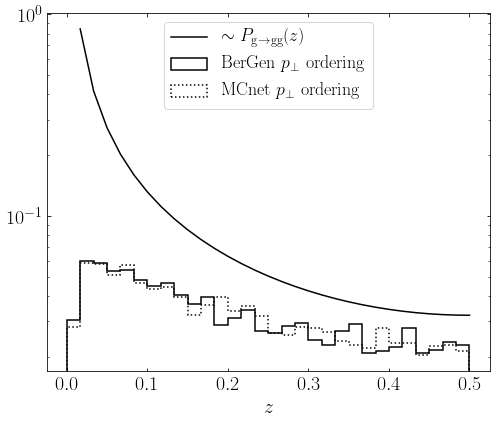

In [116]:
fig, ax = subplots()
figsize(7,6)

xbin=linspace(0, 0.5, 31)
ax.hist(0.5*(1.-sqrt(1.-4.*test.T[0]*(1.-test.T[0]))), bins=xbin, weights=ones(len(test))/len(test), histtype='step', linestyle='-', lw=1.5, color='k', label=r'BerGen $p_{\perp}$ ordering')
ax.hist(0.5*(1.-sqrt(1.-4.*test_MCnet.T[0]*(1.-test_MCnet.T[0]))), bins=xbin, weights=ones(len(test_MCnet))/len(test_MCnet), histtype='step', linestyle=':', lw=1.5, color='k', label=r'MCnet $p_{\perp}$ ordering')
semilogy(xbin, P_gg(xbin)/210., 'k-', label=r'$\sim P_{\rm g\rightarrow gg}(z)$')

#xlim(0.035,3)
#ylim(0,4)
xlabel(r'$z$', fontsize=20)
#ylabel(r'$1/N_{jet}\mathrm{d}N/\mathrm{d}\theta_g$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18, ncol=1,loc='upper center');
#savefig("medium/N_thetag_shower_medium_full.pdf", bbox_inches="tight")
tight_layout()
show()

### Lund planes

In [2]:
test = loadtxt("test_LundPlane.out")
test_fj = loadtxt("test_LundPlane_FJ.dat")

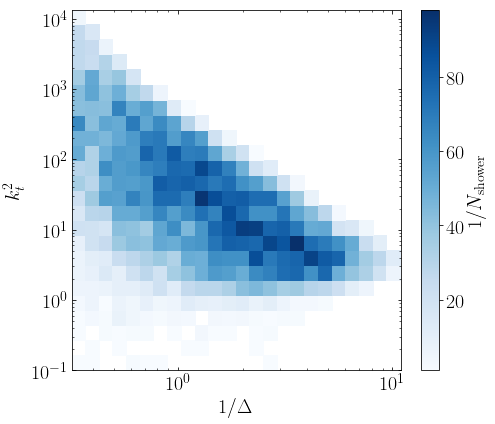

In [9]:
Nev = 10000.
fig, ax = subplots()
figsize(7,6)
xbins = logspace(log10(min(1./test.T[4])),log10(max(1./test.T[4])), 25)
ybins = logspace(log10(min(test.T[3])),log10(max(test.T[3])), 25)
h = ax.hist2d(1./test.T[4], test.T[3], bins=(xbins, ybins), cmap='Blues', cmin=1./sum(Nev))

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
#xlim(0.75,3e1)
#ylim(0.65,1e3)
xlabel(r'$1/\Delta$', fontsize=20)
ylabel(r'$k^2_t$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
tight_layout()
show()

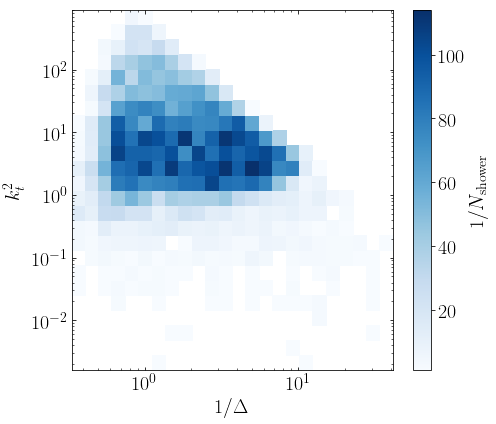

In [8]:
Nev = 10000.
fig, ax = subplots()
figsize(7,6)
xbins = logspace(log10(min(1./test_fj.T[4])),log10(max(1./test_fj.T[4])), 25)
ybins = logspace(log10(min(test_fj.T[3])),log10(max(test_fj.T[3])), 25)
h = ax.hist2d(1./test_fj.T[4], test_fj.T[3], bins=(xbins, ybins), cmap='Blues', cmin=1./sum(Nev))

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
#xlim(0.75,3e1)
#ylim(0.65,1e3)
xlabel(r'$1/\Delta$', fontsize=20)
ylabel(r'$k^2_t$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
tight_layout()
show()

In [250]:
test0 = loadtxt("test/test.out")
test = loadtxt("test/test_LundPlane.out")
res=[]
for i in range(len(test)):
    j=0
    while(True):
        if (test[i,5]==test0[j,2]):
            res.append(list(test0[j]))
            break
        j+=1
res=array(res)

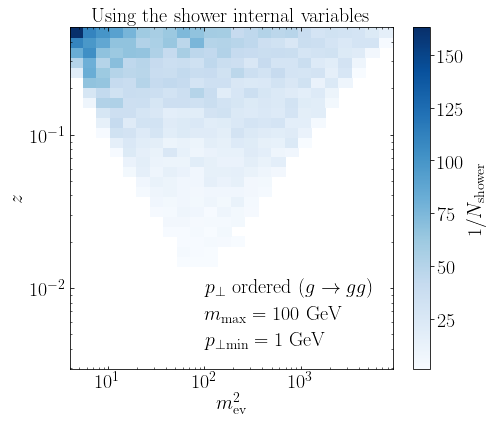

In [242]:
Nev = 10000.
fig, ax = subplots()
figsize(7,6)
xbins = logspace(log10(min(res.T[2])),log10(max(res.T[2])), 25)
ybins = logspace(log10(min(0.5*(1.-sqrt(1.-4.*res.T[0]*(1.-res.T[0]))))),log10(max(0.5*(1.-sqrt(1.-4.*res.T[0]*(1.-res.T[0]))))), 25)
h = ax.hist2d(res.T[2], 0.5*(1.-sqrt(1.-4.*res.T[0]*(1.-res.T[0]))), bins=(xbins, ybins), cmap='Blues', cmin=1./sum(Nev))

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(min(test.T[5]),max(test.T[5]))
ylim(min(test.T[1]),max(test.T[1]))
ylabel(r'$z$', fontsize=20)
xlabel(r'$m^2_{\rm ev}$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'Using the shower internal variables', fontsize=20)
text(1e2, 9e-3, r"$p_{\perp}$ ordered ($g\to gg$)",fontsize=20)
text(1e2, 6e-3, r"$m_{\max}=100$ GeV",fontsize=20)
text(1e2, 4e-3, r"$p_{\perp\min}=1$ GeV",fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("test/ShowerPlane_pt_showervar_m.pdf", bbox_inches="tight")
tight_layout()
show()

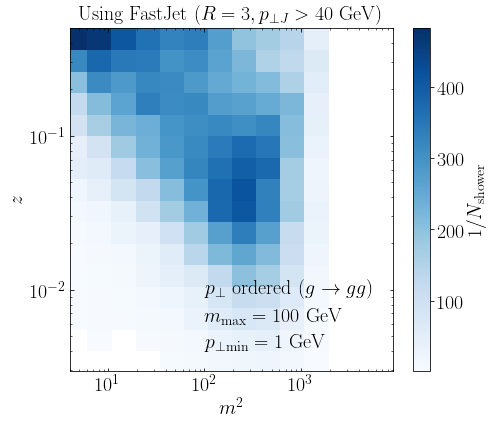

In [243]:
Nev = 7397.
fig, ax = subplots()
figsize(7,6)
xbins = logspace(log10(min(test2.T[5])),log10(max(test2.T[5])), 25)
ybins = logspace(log10(min(test2.T[1])),log10(max(test2.T[1])), 25)
h = ax.hist2d(test2.T[5], test2.T[1], bins=(xbins, ybins), cmap='Blues', cmin=1./sum(Nev))

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(min(test.T[5]),max(test.T[5]))
ylim(min(test.T[1]),max(test.T[1]))
ylabel(r'$z$', fontsize=20)
xlabel(r'$m^2$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'Using FastJet ($R=3,p_{\perp J}>40$ GeV)', fontsize=20)
text(1e2, 9e-3, r"$p_{\perp}$ ordered ($g\to gg$)",fontsize=20)
text(1e2, 6e-3, r"$m_{\max}=100$ GeV",fontsize=20)
text(1e2, 4e-3, r"$p_{\perp\min}=1$ GeV",fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("test/ShowerPlane_pt_FJ_m.pdf", bbox_inches="tight")
tight_layout()
show()

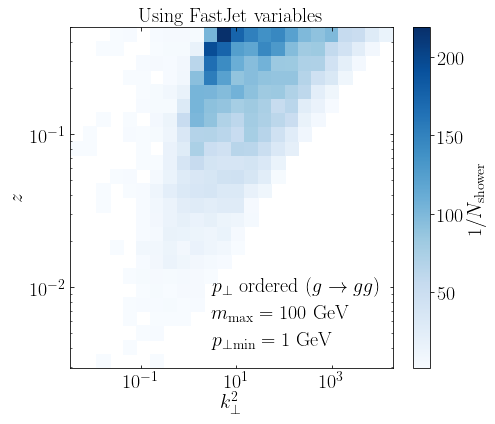

In [244]:
Nev = 10000.
fig, ax = subplots()
figsize(7,6)
xbins = logspace(log10(min(test.T[3])),log10(max(test.T[3])), 25)
ybins = logspace(log10(min(test.T[1])),log10(max(test.T[1])), 25)
h = ax.hist2d(test.T[3], test.T[1], bins=(xbins, ybins), cmap='Blues', cmin=1./sum(Nev))

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
#xlim(0.75,3e1)
#ylim(0.65,1e3)
ylabel(r'$z$', fontsize=20)
xlabel(r'$k_{\perp}^2$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'Using FastJet variables', fontsize=20)
text(3e0, 9e-3, r"$p_{\perp}$ ordered ($g\to gg$)",fontsize=20)
text(3e0, 6e-3, r"$m_{\max}=100$ GeV",fontsize=20)
text(3e0, 4e-3, r"$p_{\perp\min}=1$ GeV",fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("test/ShowerPlane_pt_FJvar_kt.pdf", bbox_inches="tight")
tight_layout()
show()

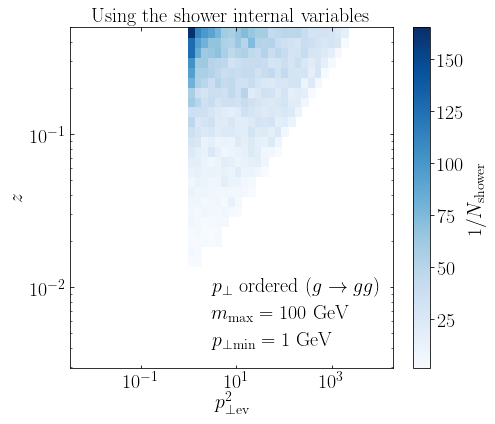

In [245]:
Nev = 10000.
fig, ax = subplots()
figsize(7,6)
xbins = logspace(log10(min(res.T[1])),log10(max(res.T[1])), 25)
ybins = logspace(log10(min(0.5*(1.-sqrt(1.-4.*res.T[0]*(1.-res.T[0]))))),log10(max(0.5*(1.-sqrt(1.-4.*res.T[0]*(1.-res.T[0]))))), 25)
h = ax.hist2d(res.T[1], 0.5*(1.-sqrt(1.-4.*res.T[0]*(1.-res.T[0]))), bins=(xbins, ybins), cmap='Blues', cmin=1./sum(Nev))

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(min(test.T[3]),max(test.T[3]))
ylim(min(test.T[1]),max(test.T[1]))
ylabel(r'$z$', fontsize=20)
xlabel(r'$p_{\perp{\rm ev}}^2$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'Using the shower internal variables', fontsize=20)
text(3e0, 9e-3, r"$p_{\perp}$ ordered ($g\to gg$)",fontsize=20)
text(3e0, 6e-3, r"$m_{\max}=100$ GeV",fontsize=20)
text(3e0, 4e-3, r"$p_{\perp\min}=1$ GeV",fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("test/ShowerPlane_pt_showervar_kt.pdf", bbox_inches="tight")
tight_layout()
show()

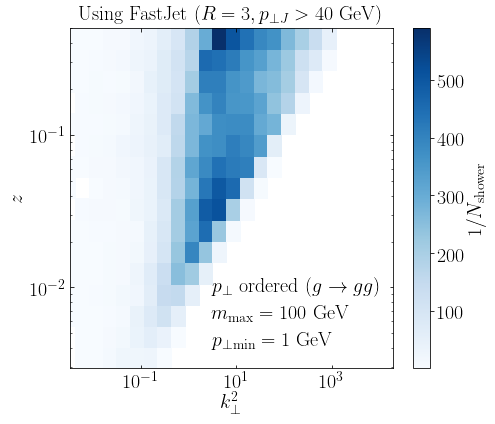

In [246]:
Nev = 7397.
fig, ax = subplots()
figsize(7,6)
xbins = logspace(log10(min(test2.T[3])),log10(max(test2.T[3])), 25)
ybins = logspace(log10(min(test2.T[1])),log10(max(test2.T[1])), 25)
h = ax.hist2d(test2.T[3], test2.T[1], bins=(xbins, ybins), cmap='Blues', cmin=1./sum(Nev))

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(min(test.T[3]),max(test.T[3]))
ylim(min(test.T[1]),max(test.T[1]))
ylabel(r'$z$', fontsize=20)
xlabel(r'$k_{\perp}^2$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'Using FastJet ($R=3,p_{\perp J}>40$ GeV)', fontsize=20)
text(3e0, 9e-3, r"$p_{\perp}$ ordered ($g\to gg$)",fontsize=20)
text(3e0, 6e-3, r"$m_{\max}=100$ GeV",fontsize=20)
text(3e0, 4e-3, r"$p_{\perp\min}=1$ GeV",fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("test/ShowerPlane_pt_FJ_kt.pdf", bbox_inches="tight")
tight_layout()
show()

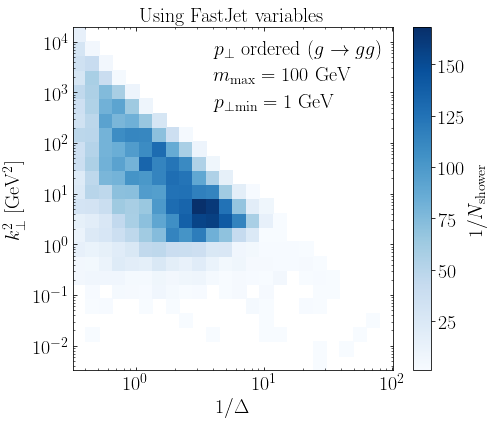

In [247]:
Nev = 10000.
fig, ax = subplots()
figsize(7,6)
xbins = logspace(log10(min(1./test.T[4])),log10(max(1./test.T[4])), 25)
ybins = logspace(log10(min(test.T[3])),log10(max(test.T[3])), 25)
h = ax.hist2d(1./test.T[4], test.T[3], bins=(xbins, ybins), cmap='Blues', cmin=1./sum(Nev))

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
#xlim(0.75,3e1)
#ylim(0.65,1e3)
ylabel(r'$k_{\perp}^2$ [GeV$^2$]', fontsize=20)
xlabel(r'$1/\Delta$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'Using FastJet variables', fontsize=20)
text(4e0, 5e3, r"$p_{\perp}$ ordered ($g\to gg$)",fontsize=20)
text(4e0, 1.5e3, r"$m_{\max}=100$ GeV",fontsize=20)
text(4e0, 4.5e2, r"$p_{\perp\min}=1$ GeV",fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("test/LundPlane_pt_FJvar.pdf", bbox_inches="tight")
tight_layout()
show()

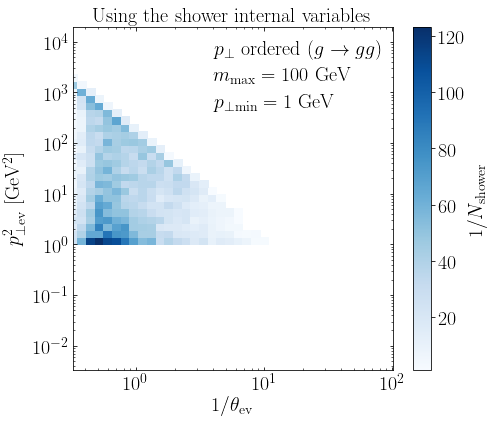

In [248]:
Nev = 10000.
fig, ax = subplots()
figsize(7,6)
xbins = logspace(log10(min(1./res.T[3])),log10(max(1./res.T[3])), 25)
ybins = logspace(log10(min(res.T[1])),log10(max(res.T[1])), 25)
h = ax.hist2d(1./res.T[3], res.T[1], bins=(xbins, ybins), cmap='Blues', cmin=1./sum(Nev))

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(min(1./test.T[4]),max(1./test.T[4]))
ylim(min(test.T[3]),max(test.T[3]))
ylabel(r'$p_{\perp{\rm ev}}^2$ [GeV$^2$]', fontsize=20)
xlabel(r'$1/\theta_{\rm ev}$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'Using the shower internal variables', fontsize=20)
text(4e0, 5e3, r"$p_{\perp}$ ordered ($g\to gg$)",fontsize=20)
text(4e0, 1.5e3, r"$m_{\max}=100$ GeV",fontsize=20)
text(4e0, 4.5e2, r"$p_{\perp\min}=1$ GeV",fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("test/LundPlane_pt_showervar.pdf", bbox_inches="tight")
tight_layout()
show()

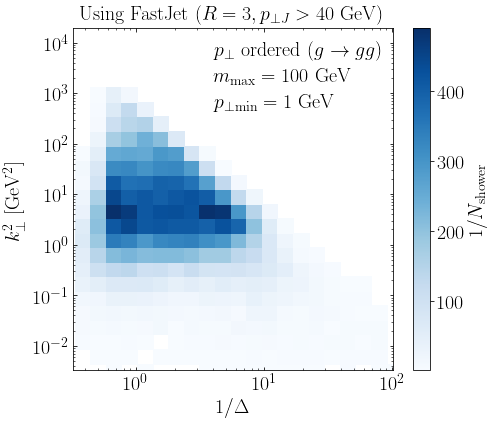

In [249]:
Nev = 7397.
test2=loadtxt("test/LundPlane.dat")
fig, ax = subplots()
figsize(7,6)
xbins = logspace(log10(min(1./test2.T[4])),log10(max(1./test2.T[4])), 25)
ybins = logspace(log10(min(test2.T[3])),log10(max(test2.T[3])), 25)
h = ax.hist2d(1./test2.T[4], test2.T[3], bins=(xbins, ybins), cmap='Blues', cmin=1./sum(Nev))

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(min(1./test.T[4]),max(1./test.T[4]))
ylim(min(test.T[3]),max(test.T[3]))
ylabel(r'$k_{\perp}^2$ [GeV$^2$]', fontsize=20)
xlabel(r'$1/\Delta$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'Using FastJet ($R=3,p_{\perp J}>40$ GeV)', fontsize=20)
text(4e0, 5e3, r"$p_{\perp}$ ordered ($g\to gg$)",fontsize=20)
text(4e0, 1.5e3, r"$m_{\max}=100$ GeV",fontsize=20)
text(4e0, 4.5e2, r"$p_{\perp\min}=1$ GeV",fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("test/LundPlane_pt_FJ.pdf", bbox_inches="tight")
tight_layout()
show()

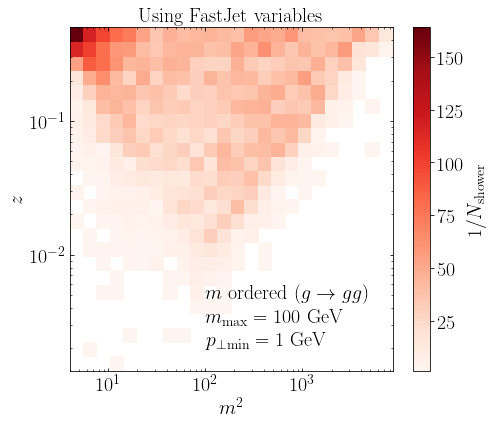

In [251]:
Nev = 10000.
fig, ax = subplots()
figsize(7,6)
xbins = logspace(log10(min(test.T[5])),log10(max(test.T[5])), 25)
ybins = logspace(log10(min(test.T[1])),log10(max(test.T[1])), 25)
h = ax.hist2d(test.T[5], test.T[1], bins=(xbins, ybins), cmap='Reds', cmin=1./sum(Nev))

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
#xlim(0.75,3e1)
#ylim(0.65,1e3)
ylabel(r'$z$', fontsize=20)
xlabel(r'$m^2$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'Using FastJet variables', fontsize=20)
text(1e2, 4.7e-3, r"$m$ ordered ($g\to gg$)",fontsize=20)
text(1e2, 3e-3, r"$m_{\max}=100$ GeV",fontsize=20)
text(1e2, 2e-3, r"$p_{\perp\min}=1$ GeV",fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("test/ShowerPlane_m_FJvar_m.pdf", bbox_inches="tight")
tight_layout()
show()

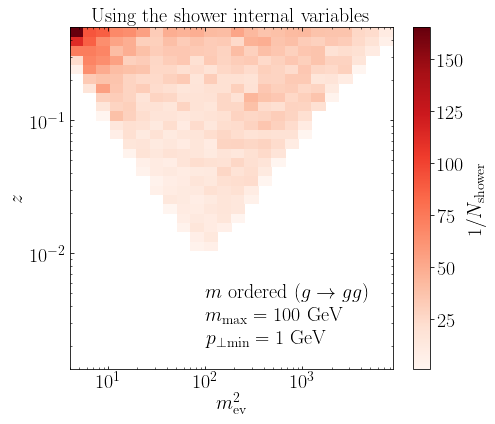

In [252]:
Nev = 10000.
fig, ax = subplots()
figsize(7,6)
xbins = logspace(log10(min(res.T[2])),log10(max(res.T[2])), 25)
ybins = logspace(log10(min(0.5*(1.-sqrt(1.-4.*res.T[0]*(1.-res.T[0]))))),log10(max(0.5*(1.-sqrt(1.-4.*res.T[0]*(1.-res.T[0]))))), 25)
h = ax.hist2d(res.T[2], 0.5*(1.-sqrt(1.-4.*res.T[0]*(1.-res.T[0]))), bins=(xbins, ybins), cmap='Reds', cmin=1./sum(Nev))

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(min(test.T[5]),max(test.T[5]))
ylim(min(test.T[1]),max(test.T[1]))
ylabel(r'$z$', fontsize=20)
xlabel(r'$m^2_{\rm ev}$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'Using the shower internal variables', fontsize=20)
text(1e2, 4.7e-3, r"$m$ ordered ($g\to gg$)",fontsize=20)
text(1e2, 3e-3, r"$m_{\max}=100$ GeV",fontsize=20)
text(1e2, 2e-3, r"$p_{\perp\min}=1$ GeV",fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("test/ShowerPlane_m_showervar_m.pdf", bbox_inches="tight")
tight_layout()
show()

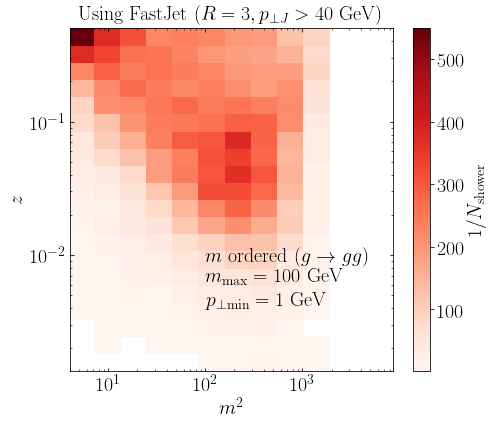

In [253]:
Nev = 7805.
test2=loadtxt("test/LundPlane.dat")
fig, ax = subplots()
figsize(7,6)
xbins = logspace(log10(min(test2.T[5])),log10(max(test2.T[5])), 25)
ybins = logspace(log10(min(test2.T[1])),log10(max(test2.T[1])), 25)
h = ax.hist2d(test2.T[5], test2.T[1], bins=(xbins, ybins), cmap='Reds', cmin=1./sum(Nev))

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(min(test.T[5]),max(test.T[5]))
ylim(min(test.T[1]),max(test.T[1]))
ylabel(r'$z$', fontsize=20)
xlabel(r'$m^2$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'Using FastJet ($R=3,p_{\perp J}>40$ GeV)', fontsize=20)
text(1e2, 9e-3, r"$m$ ordered ($g\to gg$)",fontsize=20)
text(1e2, 6e-3, r"$m_{\max}=100$ GeV",fontsize=20)
text(1e2, 4e-3, r"$p_{\perp\min}=1$ GeV",fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("test/ShowerPlane_m_FJ_m.pdf", bbox_inches="tight")
tight_layout()
show()

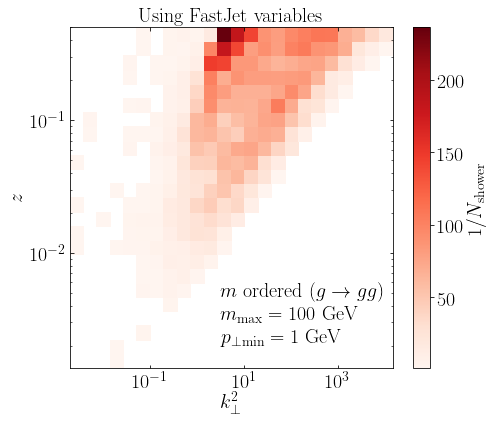

In [254]:
Nev = 10000.
fig, ax = subplots()
figsize(7,6)
xbins = logspace(log10(min(test.T[3])),log10(max(test.T[3])), 25)
ybins = logspace(log10(min(test.T[1])),log10(max(test.T[1])), 25)
h = ax.hist2d(test.T[3], test.T[1], bins=(xbins, ybins), cmap='Reds', cmin=1./sum(Nev))

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
#xlim(0.75,3e1)
#ylim(0.65,1e3)
ylabel(r'$z$', fontsize=20)
xlabel(r'$k_{\perp}^2$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'Using FastJet variables', fontsize=20)
text(3e0, 4.7e-3, r"$m$ ordered ($g\to gg$)",fontsize=20)
text(3e0, 3e-3, r"$m_{\max}=100$ GeV",fontsize=20)
text(3e0, 2e-3, r"$p_{\perp\min}=1$ GeV",fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("test/ShowerPlane_m_FJvar_kt.pdf", bbox_inches="tight")
tight_layout()
show()

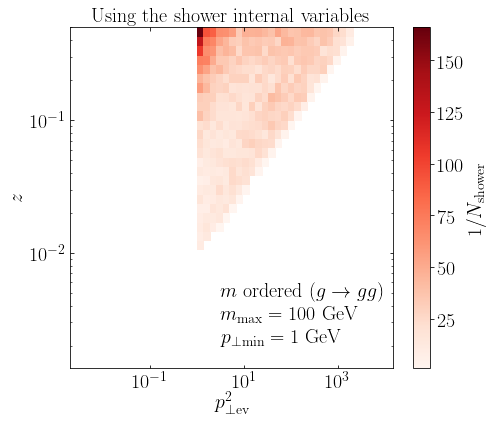

In [255]:
Nev = 10000.
fig, ax = subplots()
figsize(7,6)
xbins = logspace(log10(min(res.T[1])),log10(max(res.T[1])), 25)
ybins = logspace(log10(min(0.5*(1.-sqrt(1.-4.*res.T[0]*(1.-res.T[0]))))),log10(max(0.5*(1.-sqrt(1.-4.*res.T[0]*(1.-res.T[0]))))), 25)
h = ax.hist2d(res.T[1], 0.5*(1.-sqrt(1.-4.*res.T[0]*(1.-res.T[0]))), bins=(xbins, ybins), cmap='Reds', cmin=1./sum(Nev))

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(min(test.T[3]),max(test.T[3]))
ylim(min(test.T[1]),max(test.T[1]))
ylabel(r'$z$', fontsize=20)
xlabel(r'$p_{\perp{\rm ev}}^2$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'Using the shower internal variables', fontsize=20)
text(3e0, 4.7e-3, r"$m$ ordered ($g\to gg$)",fontsize=20)
text(3e0, 3e-3, r"$m_{\max}=100$ GeV",fontsize=20)
text(3e0, 2e-3, r"$p_{\perp\min}=1$ GeV",fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("test/ShowerPlane_m_showervar_kt.pdf", bbox_inches="tight")
tight_layout()
show()

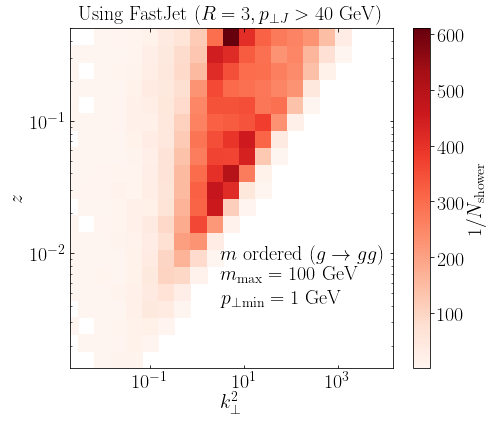

In [256]:
Nev = 7397.
fig, ax = subplots()
figsize(7,6)
xbins = logspace(log10(min(test2.T[3])),log10(max(test2.T[3])), 25)
ybins = logspace(log10(min(test2.T[1])),log10(max(test2.T[1])), 25)
h = ax.hist2d(test2.T[3], test2.T[1], bins=(xbins, ybins), cmap='Reds', cmin=1./sum(Nev))

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(min(test.T[3]),max(test.T[3]))
ylim(min(test.T[1]),max(test.T[1]))
ylabel(r'$z$', fontsize=20)
xlabel(r'$k_{\perp}^2$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'Using FastJet ($R=3,p_{\perp J}>40$ GeV)', fontsize=20)
text(3e0, 9e-3, r"$m$ ordered ($g\to gg$)",fontsize=20)
text(3e0, 6e-3, r"$m_{\max}=100$ GeV",fontsize=20)
text(3e0, 4e-3, r"$p_{\perp\min}=1$ GeV",fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("test/ShowerPlane_m_FJ_kt.pdf", bbox_inches="tight")
tight_layout()
show()

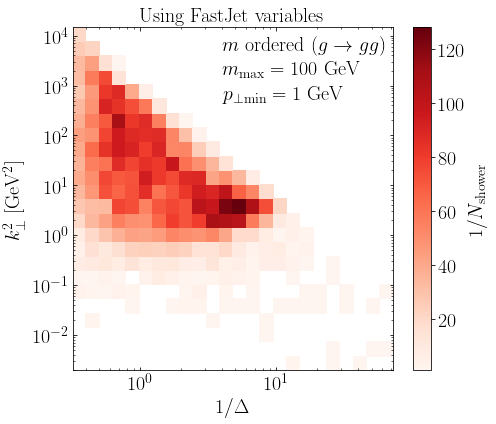

In [257]:
Nev = 10000.
fig, ax = subplots()
figsize(7,6)
xbins = logspace(log10(min(1./test.T[4])),log10(max(1./test.T[4])), 25)
ybins = logspace(log10(min(test.T[3])),log10(max(test.T[3])), 25)
h = ax.hist2d(1./test.T[4], test.T[3], bins=(xbins, ybins), cmap='Reds', cmin=1./sum(Nev))

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
#xlim(0.75,3e1)
#ylim(0.65,1e3)
ylabel(r'$k_{\perp}^2$ [GeV$^2$]', fontsize=20)
xlabel(r'$1/\Delta$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'Using FastJet variables', fontsize=20)
text(4e0, 5e3, r"$m$ ordered ($g\to gg$)",fontsize=20)
text(4e0, 1.5e3, r"$m_{\max}=100$ GeV",fontsize=20)
text(4e0, 4.5e2, r"$p_{\perp\min}=1$ GeV",fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("test/LundPlane_m_FJvar.pdf", bbox_inches="tight")
tight_layout()
show()

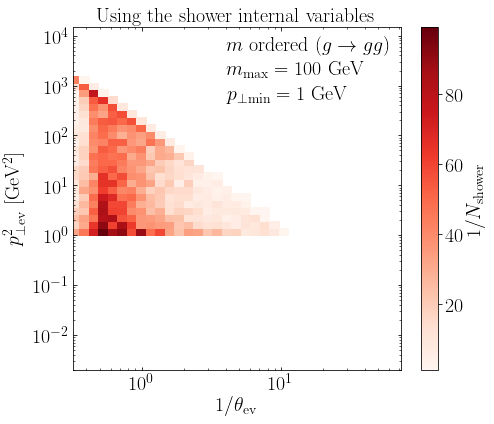

In [258]:
Nev = 10000.
fig, ax = subplots()
figsize(7,6)
xbins = logspace(log10(min(1./res.T[3])),log10(max(1./res.T[3])), 25)
ybins = logspace(log10(min(res.T[1])),log10(max(res.T[1])), 25)
h = ax.hist2d(1./res.T[3], res.T[1], bins=(xbins, ybins), cmap='Reds', cmin=1./sum(Nev))

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(min(1./test.T[4]),max(1./test.T[4]))
ylim(min(test.T[3]),max(test.T[3]))
ylabel(r'$p_{\perp{\rm ev}}^2$ [GeV$^2$]', fontsize=20)
xlabel(r'$1/\theta_{\rm ev}$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'Using the shower internal variables', fontsize=20)
text(4e0, 5e3, r"$m$ ordered ($g\to gg$)",fontsize=20)
text(4e0, 1.5e3, r"$m_{\max}=100$ GeV",fontsize=20)
text(4e0, 4.5e2, r"$p_{\perp\min}=1$ GeV",fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("test/LundPlane_m_showervar.pdf", bbox_inches="tight")
tight_layout()
show()

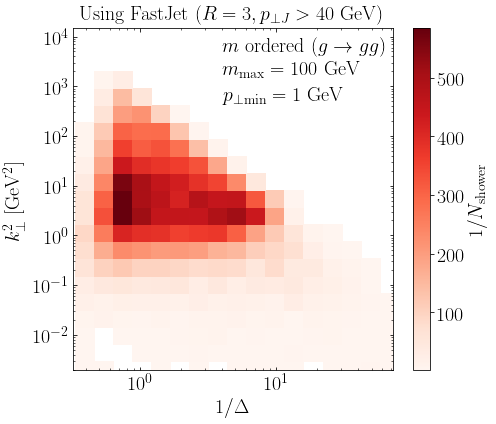

In [259]:
Nev = 7397.
test2=loadtxt("test/LundPlane.dat")
fig, ax = subplots()
figsize(7,6)
xbins = logspace(log10(min(1./test2.T[4])),log10(max(1./test2.T[4])), 25)
ybins = logspace(log10(min(test2.T[3])),log10(max(test2.T[3])), 25)
h = ax.hist2d(1./test2.T[4], test2.T[3], bins=(xbins, ybins), cmap='Reds', cmin=1./sum(Nev))

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(min(1./test.T[4]),max(1./test.T[4]))
ylim(min(test.T[3]),max(test.T[3]))
ylabel(r'$k_{\perp}^2$ [GeV$^2$]', fontsize=20)
xlabel(r'$1/\Delta$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'Using FastJet ($R=3,p_{\perp J}>40$ GeV)', fontsize=20)
text(4e0, 5e3, r"$m$ ordered ($g\to gg$)",fontsize=20)
text(4e0, 1.5e3, r"$m_{\max}=100$ GeV",fontsize=20)
text(4e0, 4.5e2, r"$p_{\perp\min}=1$ GeV",fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("test/LundPlane_m_FJ.pdf", bbox_inches="tight")
tight_layout()
show()

# Algorithms

In [3]:
def alpha_s(Q2):
    t_minPT = 0.95**2.
    nf      = 5.
    b       = ( 33. - 2. * nf ) / (12. * pi)
    Lam2    = 0.29**2 # in GeV
    if (Q2 > t_minPT): return 1. / (b * log( Q2 / Lam2 ))
    else             : return 1. / (b * log( t_minPT / Lam2 ))
def P_gg(x):
    CA = 3.
    return CA * (x/(1.-x) + (1.-x)/x + x*(1.-x))
def P_gg_over(x):
    CA = 3.
    return CA * (1./(1.-x) + 1./x)

def veto_argument(ev_var, Q2, z, pT2_min, t_max, z_init, R, theta_prev, t_prev, pT2_prev):
    if   (ev_var == 'pT'          and alpha_s(Q2)                                 /alpha_s(0) > rand() and P_gg(z)/P_gg_over(z) > rand() and Q2/z/(1.-z) < t_max)           : veto_arg = True
    elif (ev_var == 'pT_Rcut'     and alpha_s(Q2)                                 /alpha_s(0) > rand() and P_gg(z)/P_gg_over(z) > rand() and Q2/z/(1.-z) < t_max                           and sqrt(Q2)/z/(1.-z)/(sqrt(t_max)/R*z_init) < R)          : veto_arg = True
    elif (ev_var == 'pT_Rord'     and alpha_s(Q2)                                 /alpha_s(0) > rand() and P_gg(z)/P_gg_over(z) > rand() and Q2/z/(1.-z) < t_max                           and sqrt(Q2)/z/(1.-z)/(sqrt(t_max)/R*z_init) < theta_prev) : veto_arg = True
    elif (ev_var == 'm'           and alpha_s(z*(1.-z)*Q2)                        /alpha_s(0) > rand() and P_gg(z)/P_gg_over(z) > rand() and z*(1.-z)*Q2 > pT2_min)         : veto_arg = True
    elif (ev_var == 'm_Rcut'      and alpha_s(z*(1.-z)*Q2)                        /alpha_s(0) > rand() and P_gg(z)/P_gg_over(z) > rand() and z*(1.-z)*Q2 > pT2_min                         and sqrt(Q2/z/(1.-z))/(sqrt(t_max)/R*z_init) < R)          : veto_arg = True
    elif (ev_var == 'm_Rord'      and alpha_s(z*(1.-z)*Q2)                        /alpha_s(0) > rand() and P_gg(z)/P_gg_over(z) > rand() and z*(1.-z)*Q2 > pT2_min                         and sqrt(Q2/z/(1.-z))/(sqrt(t_max)/R*z_init) < theta_prev) : veto_arg = True
    elif (ev_var == 'tf'          and alpha_s(2.*z_init*sqrt(t_max)/R*Q2*z*(1.-z))/alpha_s(0) > rand() and P_gg(z)/P_gg_over(z) > rand() and 2.*z_init*sqrt(t_max)/R*Q2*z*(1.-z) > pT2_min and 2.*z_init*sqrt(t_max)/R*Q2 < t_max)                    : veto_arg = True
    elif (ev_var == 'tf_Rcut'     and alpha_s(2.*z_init*sqrt(t_max)/R*Q2*z*(1.-z))/alpha_s(0) > rand() and P_gg(z)/P_gg_over(z) > rand() and 2.*z_init*sqrt(t_max)/R*Q2*z*(1.-z) > pT2_min and 2.*z_init*sqrt(t_max)/R*Q2 < t_max and sqrt(2.*Q2/z/(1.-z)/z_init/sqrt(t_max)*R) < R)         : veto_arg = True
    elif (ev_var == 'tf_Rord'     and alpha_s(2.*z_init*sqrt(t_max)/R*Q2*z*(1.-z))/alpha_s(0) > rand() and P_gg(z)/P_gg_over(z) > rand() and 2.*z_init*sqrt(t_max)/R*Q2*z*(1.-z) > pT2_min and 2.*z_init*sqrt(t_max)/R*Q2 < t_max and sqrt(2.*Q2/z/(1.-z)/z_init/sqrt(t_max)*R) < theta_prev): veto_arg = True
    elif (ev_var == 'theta'       and alpha_s(z*z*(1.-z)*(1.-z)*Q2)               /alpha_s(0) > rand() and P_gg(z)/P_gg_over(z) > rand() and z*z*(1.-z)*(1.-z)*Q2 > pT2_min): veto_arg = True
    elif (ev_var == 'theta_mord'  and alpha_s(z*z*(1.-z)*(1.-z)*Q2)               /alpha_s(0) > rand() and P_gg(z)/P_gg_over(z) > rand() and z*z*(1.-z)*(1.-z)*Q2 > pT2_min and Q2*z*(1.-z) < t_prev)           : veto_arg = True
    elif (ev_var == 'theta_pTord' and alpha_s(z*z*(1.-z)*(1.-z)*Q2)               /alpha_s(0) > rand() and P_gg(z)/P_gg_over(z) > rand() and z*z*(1.-z)*(1.-z)*Q2 > pT2_min and z*z*(1.-z)*(1.-z)*Q2 < pT2_prev): veto_arg = True
    else: veto_arg = False
    return veto_arg

def Q2_min(ev_var, pT2_min, E):
    if (ev_var == 'pT' or ev_var == 'pT_Rcut' or ev_var == 'pT_Rord')          : Q2_min = pT2_min
    if (ev_var == 'm' or ev_var == 'm_Rcut' or ev_var == 'm_Rord')             : Q2_min = 4.*pT2_min
    if (ev_var == 'tf' or ev_var == 'tf_Rcut' or ev_var == 'tf_Rord')          : Q2_min = 2.*pT2_min/E
    if (ev_var == 'theta' or ev_var == 'theta_mord' or ev_var == 'theta_pTord'): Q2_min = 16.*pT2_min
    return Q2_min
        
def Q2_max(ev_var, t_max, E):
    if (ev_var == 'pT' or ev_var == 'pT_Rcut' or ev_var == 'pT_Rord')          : Q2_max = t_max/4.
    if (ev_var == 'm'  or ev_var == 'm_Rcut'  or ev_var == 'm_Rord')           : Q2_max = t_max
    if (ev_var == 'tf' or ev_var == 'tf_Rcut' or ev_var == 'tf_Rord')          : Q2_max = t_max/2./E
    if (ev_var == 'theta' or ev_var == 'theta_mord' or ev_var == 'theta_pTord'): Q2_max = t_max
    return Q2_max

def eps_var(ev_var, t_max, pT2_min, E):
    if (ev_var == 'pT' or ev_var == 'pT_Rcut' or ev_var == 'pT_Rord')          : eps = pT2_min/t_max
    if (ev_var == 'm'  or ev_var == 'm_Rcut'  or ev_var == 'm_Rord')           : eps = pT2_min/t_max
    if (ev_var == 'tf' or ev_var == 'tf_Rcut' or ev_var == 'tf_Rord')          : eps = pT2_min/t_max
    if (ev_var == 'theta' or ev_var == 'theta_mord' or ev_var == 'theta_pTord'): eps = sqrt(pT2_min/t_max)
    return eps

def jet_coord_fill(ev_var, Q2, z, t_max, z_init):
    if (ev_var == 'pT' or ev_var == 'pT_Rcut' or ev_var == 'pT_Rord'): 
        E     = sqrt(t_max)/R*z_init
        pT2   = Q2
        theta = sqrt(pT2)/z/(1.-z)/E
        t     = z*(1.-z)*(E*theta)**2.
        q2    = t/z/(1.-z)
        tf    = 2.*E/t   
    if (ev_var == 'm' or ev_var == 'm_Rcut' or ev_var == 'm_Rord'): 
        E     = sqrt(t_max)/R*z_init
        t     = Q2
        theta = sqrt(t/(z*(1.-z)))/E
        pT2   = z*(1.-z)*t
        q2    = t/z/(1.-z)
        tf    = 2.*E/t
    if (ev_var == 'tf' or ev_var == 'tf_Rcut' or ev_var == 'tf_Rord'): 
        E     = sqrt(t_max)/R*z_init
        lf2   = Q2*Q2
        t     = 2.*E*sqrt(lf2)
        theta = sqrt(2.*sqrt(lf2)/z/(1.-z)/E)
        pT2   = 2.*E*sqrt(lf2)*z*(1.-z)
        q2    = t/z/(1.-z)
        tf    = 1./sqrt(lf2)
    if (ev_var == 'theta' or ev_var == 'theta_mord' or ev_var == 'theta_pTord'): 
        E     = sqrt(t_max)/R*z_init
        q2    = Q2
        t     = z*(1.-z)*q2
        theta = sqrt(q2/t_max)*R/z_init
        pT2   = z*z*(1.-z)*(1.-z)*q2
        tf    = 2.*E/t
    return [q2, z, E, pT2, theta, t, tf, 1.]

def Q2_ref(ev_var, Q2, z):
    if (ev_var == 'pT' or ev_var == 'pT_Rcut' or ev_var == 'pT_Rord')          : Q2_ref = Q2*z*z
    if (ev_var == 'm'  or ev_var == 'm_Rcut'  or ev_var == 'm_Rord')           : Q2_ref = Q2*z*z
    if (ev_var == 'tf' or ev_var == 'tf_Rcut' or ev_var == 'tf_Rord')          : Q2_ref = Q2*z
    if (ev_var == 'theta' or ev_var == 'theta_mord' or ev_var == 'theta_pTord'): Q2_ref = Q2*z*z
    return Q2_ref

t_max   = 100.**2.
pT2_min = 1.
R       = 1.
N       = 10000
def shower(N, ev_var, t_max = 100.**2., pT2_min = 1., R = 1., obs = 'list', medium = 'False', med_type = 'Partial_d', Linfm = 2., m2D = 1., qhat = 0.3, punish = 0.5):
    LinGeV     = Linfm / 0.197
    excl       = []
    plist      = []
    N_emission = []
    N_ev       = []
    First      = []
    tf         = []
    for j in range(N):
        jet_coord   = []
        Q2_max_init = Q2_max(ev_var, t_max, sqrt(t_max)/R)
        Q2_init     = Q2_max(ev_var, t_max, sqrt(t_max)/R)
        z_init      = 1.
        pT2_prev    = t_max
        theta_prev  = R
        t_prev      = t_max
        i           = 0
        tform       = 0
        while (True):
            #Vacuum shower
            if (Q2_max_init < Q2_min(ev_var, pT2_min, z_init*sqrt(t_max)/R)): break
            eps = eps_var(ev_var, t_max, pT2_min, z_init*sqrt(t_max)/R)
            Q2  = Q2_init * pow(rand(), 2.*pi / alpha_s(0) /  (2.*3.*(log(1. - eps) - log(eps))))
            if (Q2 < Q2_min(ev_var, pT2_min, z_init*sqrt(t_max)/R)): break
            z   = 1. / (1. + pow(eps/(1.-eps), 2.*rand()-1.))
            if (z < 0.5): z = 1.-z
            if (veto_argument(ev_var, Q2, z, pT2_min, t_max, z_init, R, theta_prev, t_prev, pT2_prev)):
                if (i==0): jet_coord.append(jet_coord_fill(ev_var, Q2, z, t_max, z_init))
                else:      jet_coord = vstack([jet_coord, jet_coord_fill(ev_var, Q2, z, t_max, z_init)])
                Q2_init     = Q2_ref(ev_var, Q2, z)
                Q2_max_init = Q2_init
                pT2_prev    = jet_coord_fill(ev_var, Q2, z, t_max, z_init)[3]
                theta_prev  = jet_coord_fill(ev_var, Q2, z, t_max, z_init)[4]
                t_prev      = jet_coord_fill(ev_var, Q2, z, t_max, z_init)[5]
                tform      += jet_coord_fill(ev_var, Q2, z, t_max, z_init)[6]
                z_init     *= z
                i          += 1
            else:  Q2_init  = Q2
        #Medium veto
        if (medium == True):
            inside   = 0
            once_out = 0
            formtime = 0
            for n in range(len(jet_coord)):
                # FIXME Summing up tf.
                #formtime += jet_coord[n][6] 
                #if (med_type == 'Partial_d' and formtime <= 1./(jet_coord[n][4]*sqrt(m2D)) and jet_coord[n][4] >= 1./(sqrt(m2D)*LinGeV)):                                 inside += 1
                #if (med_type == 'Full_d'    and formtime <= pow(qhat*jet_coord[n][4]**2, -1./3.) and jet_coord[n][4] >= 1./sqrt(qhat*LinGeV**3.)): inside += 1
                #Not summing up formation time.
                if (med_type == 'Partial_d' and jet_coord[n][3] >= 4.*m2D                                 and jet_coord[n][4] >= 1./(sqrt(m2D)*LinGeV)    and once_out == 0): inside += 1
                if (med_type == 'Full_d'    and jet_coord[n][3] >= pow(2.*qhat/3./jet_coord[n][4], 2./3.) and jet_coord[n][4] >= max(sqrt(12./(qhat*LinGeV**3.)), (2.**7.*qhat/3./((sqrt(t_max)/R)**3.))**(1./4.)) and once_out == 0): inside += 1
                else: once_out = 1 #set to 1 to forbid the jump-back
            if (shape(jet_coord)[0] == 1 and shape(jet_coord)[1] > 0): 
                if (inside == 0): jet_coord[0][7] *= punish # Quench at least once
                else:             jet_coord[0][7] *= punish*(punish**2)**inside
            elif (len(jet_coord) > 1):
                if (inside == 0): jet_coord.T[7]  *= punish
                else:             jet_coord.T[7]  *= punish*(punish**2)**inside
        if (shape(jet_coord)[0] == 1 and shape(jet_coord)[1] > 0): N_ev.append(jet_coord[0][7])
        elif (len(jet_coord) > 1):                                 N_ev.append(jet_coord[0][7])
        
        if (obs == 'First'):
            if (shape(jet_coord)[0] >= 1 and shape(jet_coord)[1] > 0):
                if (len(First) == 0): First = jet_coord[0]
                else:                 First = vstack([First, jet_coord[0]])
                    
        #Saving results
        if   (obs == 'N_emission' and i > 0):         N_emission.append([i,jet_coord[0][7]])
        if   (obs == 'tf' and i > 0):                 tf.append(tform)
        if   (obs == 'excl' and j==0):                excl = jet_coord
        elif (obs == 'excl' and len(jet_coord) != 0): excl = vstack([excl, jet_coord])
        if   (obs == 'list' and j==0): 
            if (len(jet_coord)<=1):                   plist = [jet_coord]
            else:                                     plist = [jet_coord.tolist()]
        elif (obs == 'list'):        
            if (len(jet_coord)<=1):                   plist.append(jet_coord)
            else:                                     plist.append(jet_coord.tolist())
        if (j % 5000 == 0): print(j)
    #Output
    if (obs == 'excl'):       return [excl, N_ev]
    if (obs == 'list'):       return plist
    if (obs == 'N_emission'): return array(N_emission)
    if (obs == 'First'):      return First
    if (obs == 'tf'):         return array(tf)

In [3]:
def take_pt(jet_coord):    return jet_coord[3]
def take_angle(jet_coord): return jet_coord[4]
def take_t(jet_coord):     return jet_coord[5]
def take_tf(jet_coord):    return jet_coord[6]

def Reorder(plist, Etot, alg='angle'): #Biggest value first.
    new_plist = plist
    for i in range(len(new_plist)):
        if   (alg == 'pt'):    
            new_plist[i].sort(key=take_pt,    reverse=True)   
            E_mom = Etot
            for j in range(len(new_plist[i])):
                pT2   = new_plist[i][j][3]
                E_d   = (1. - new_plist[i][j][1])*new_plist[i][j][2]
                z     = 1. - E_d / E_mom
                q2    = pT2/(z*(1.-z))**2.
                theta = sqrt(pT2)/z/(1.-z)/E_mom
                t     = pT2/z/(1.-z)
                tf    = 2.*E_mom/t
                Qi    = new_plist[i][j][7]
                new_plist[i][j] = [q2, z, E_mom, pT2, theta, t, tf, Qi]
                E_mom *= z
        elif (alg == 'angle'): 
            new_plist[i].sort(key=take_angle, reverse=True) 
            E_mom = Etot
            for j in range(len(new_plist[i])):
                theta = new_plist[i][j][4]
                E_d   = (1. - new_plist[i][j][1])*new_plist[i][j][2]
                z     = 1. - E_d / E_mom
                q2    = (E_mom*theta)**2.
                pT2   = z*z*(1.-z)*(1.-z)*q2
                t     = z*(1.-z)*q2
                tf    = 2.*E_mom/t
                Qi    = new_plist[i][j][7]
                new_plist[i][j] = [q2, z, E_mom, pT2, theta, t, tf, Qi]
                E_mom *= z
        elif (alg == 't'):     
            new_plist[i].sort(key=take_t,     reverse=True)  
            E_mom = Etot
            for j in range(len(new_plist[i])):
                t     = new_plist[i][j][5]
                E_d   = (1. - new_plist[i][j][1])*new_plist[i][j][2]
                z     = 1. - E_d / E_mom
                q2    = t/z/(1.-z)
                pT2   = z*(1.-z)*t
                theta = sqrt(pT2)/z/(1.-z)/E_mom
                tf    = 2.*E_mom/t
                Qi    = new_plist[i][j][7]
                new_plist[i][j] = [q2, z, E_mom, pT2, theta, t, tf, Qi]
                E_mom *= z
        elif (alg == 'tf'):    
            new_plist[i].sort(key=take_tf,    reverse=True)
            E_mom = Etot
            for j in range(len(new_plist[i])):
                tf    = new_plist[i][j][6]
                E_d   = (1. - new_plist[i][j][1])*new_plist[i][j][2]
                z     = 1. - E_d / E_mom
                t     = 3.*E_mom/tf
                q2    = t/z/(1.-z)
                pT2   = z*(1.-z)*t
                theta = sqrt(pT2)/z/(1.-z)/E_mom
                Qi    = new_plist[i][j][7]
                new_plist[i][j] = [q2, z, E_mom, pT2, theta, t, tf, Qi]
                E_mom *= z
    return new_plist

def SD(plist, Etot, z_cut, beta, R): #Soft Drop
    plist = Reorder(plist, Etot, 'angle')
    SD = []
    for i in range(len(plist)):
        j=0
        while (j < len(plist[i])):
            if (1.-plist[i][j][1] > z_cut * pow(plist[i][j][4]/R, beta)):
                if (len(SD)==0): SD = [plist[i][j]]
                else:            SD.append(plist[i][j])
                break
            else: j += 1
    return array(SD)

def ISD(plist, Etot, z_cut, beta, R, theta_cut=0.): #Iterative Soft Drop
    plist = Reorder(plist, Etot, 'angle')
    ISD = []
    for i in range(len(plist)):
        isd_temp = []
        for j in range(len(plist[i])):
            if (plist[i][j][4] < theta_cut): break
            if (1.-plist[i][j][1] > z_cut * pow(plist[i][j][4]/R, beta)):
                if (len(isd_temp)==0): isd_temp.append(plist[i][j])
                else: isd_temp = vstack([isd_temp, plist[i][j]])
        if (len(ISD)==0): 
            if (len(isd_temp)<=1): ISD = [isd_temp]
            else:                  ISD = [isd_temp.tolist()]
        else:
            if (len(isd_temp)<=1): ISD.append(isd_temp)
            else:                  ISD.append(isd_temp.tolist())
    return ISD

def N_SD(plist, Etot, z_cut, beta, R, theta_cut=0.): #Soft Drop Multiplicity
    I_SD = ISD(plist, Etot, z_cut, beta, R, theta_cut)
    N_SD = []
    for i in range(len(I_SD)):
        if (len(I_SD[i]) > 0): N_SD.append([len(I_SD[i]),I_SD[i][0][7]])
    return array(N_SD)

# Medium Showers

## Partial decoherence (dipole region)

### Lund Planes

In [5]:
N       = 5000
t_max   = 100.**2
pT2_min = 1.
R       = 1.
L       = 0.5
qhat    = 0.3
punish  = 0.5
m2D     = 1.0
jet_coord_example = shower(1, 'm_Rcut', t_max, pT2_min, R, 'excl', True, 'Partial_d', L, m2D, qhat, punish)[0]
res, Nev          = shower(N, 'm_Rcut', t_max, pT2_min, R, 'excl', True, 'Partial_d', L, m2D, qhat, punish)
res0, Nev0        = shower(N, 'm_Rcut', t_max, pT2_min, R, 'excl', False)

0
0
0


In [ ]:
res

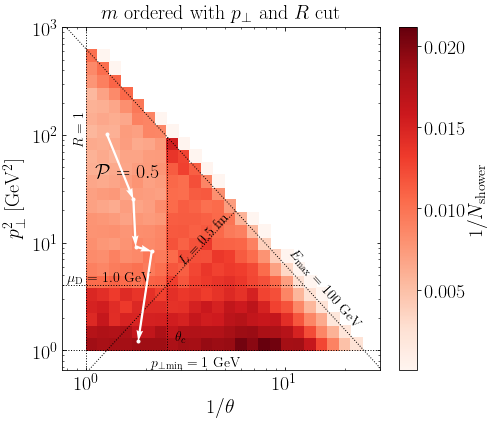

In [85]:
fig, ax = subplots()
E_max=sqrt(t_max)
figsize(7,6)
xbins = logspace(log10(min(1./res.T[4])),log10(max(1./res.T[4])), 25)
ybins = logspace(log10(min(res.T[3])),log10(max(res.T[3])), 25)
h = ax.hist2d(1./res.T[4], res.T[3], bins=(xbins, ybins), weights=res.T[7]/sum(Nev), cmap='Reds', cmin=1./sum(Nev))
plot(1./jet_coord_example.T[4], jet_coord_example.T[3],'w.-',lw=1)
x     = 1. / jet_coord_example.T[4]
y     = jet_coord_example.T[3]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
plot([1e-5,1e5],[pT2_min,pT2_min],'k:',lw=1)
text(2.1e0, 0.68, r'$p_{\perp\rm min}=%d$ GeV' %sqrt(pT2_min), fontsize=14)
invtheta = logspace(-3,2,30)
loglog(invtheta,E_max**2/16./invtheta**2,'k:',lw=1)
text(1e1, 7.e0, r'$E_{\rm max}=%d$ GeV' %(sqrt(t_max)/R), rotation=-48.5, fontsize=14)
plot([1,1],[1e-1,1e4], 'k:', lw=1)
text(0.85*1./R, 1.3e2, r'$R=%d$' %R, rotation=90,  fontsize=14)

theta = linspace(sqrt(8./sqrt(t_max)/(L/0.197)), 10, 10)
loglog(1./theta, (2./theta/(L/0.197))**2., 'k:', lw=1)
text(0.5*sqrt((L/0.197)*sqrt(t_max)/8.), 0.8*sqrt(t_max)/(L/0.197)/2., r'$L=%s$ fm' %L, rotation=47, fontsize=14)
loglog([sqrt(m2D)*(L/0.197),sqrt(m2D)*(L/0.197)],[pT2_min, t_max/16./m2D/(L/0.197)**2], 'k:', lw=1)
text(1.1*sqrt(m2D)*(L/0.197), 1.2*pT2_min, r'$\theta_c$', rotation=0, fontsize=14)
loglog([0.1,1./(8.*sqrt(m2D/t_max))],[(2.*sqrt(m2D))**2,(2.*sqrt(m2D))**2], 'k:', lw=1)
text(8e-1, 1.05*4.*m2D, r'$\mu_{\rm D}=%s$ GeV' %sqrt(m2D), fontsize=14)
text(1.1/R, 4e1, r'$\mathcal{P}=%s$' %punish, fontsize=20)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75,3e1)
ylim(0.65,1e3)
ylabel(r'$p^2_\perp$ [GeV$^2$]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'$m$ ordered with $p_\perp$ and $R$ cut', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("medium/LundPlane_t_ordered_pt_R_cut_partiald.pdf", bbox_inches="tight")
tight_layout()
show()

In [86]:
h0 = ax.hist2d(1./res0.T[4], res0.T[3], bins=(xbins, ybins), weights=res0.T[7]/sum(Nev0))
h  = ax.hist2d(1./res.T[4],  res.T[3],  bins=(xbins, ybins), weights=res.T[7]/ sum(Nev))

/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


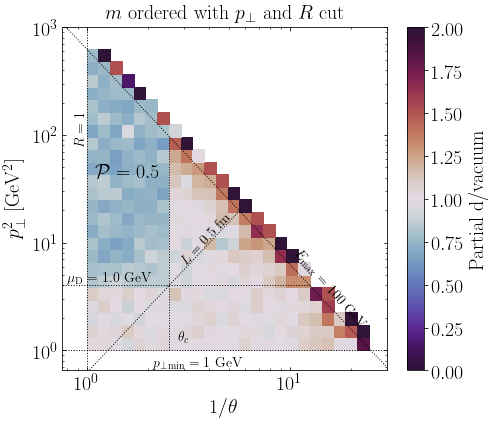

In [87]:
fig, ax = subplots()
E_max=sqrt(t_max)
figsize(7,6)

ratio = pcolormesh(h[1],h[2],h[0].T/h0[0].T, cmap='twilight_shifted', vmin=0, vmax=2)
plot([1e-5,1e5],[pT2_min,pT2_min],'k:',lw=1)
text(2.1e0, 0.68, r'$p_{\perp\rm min}=%d$ GeV' %sqrt(pT2_min), fontsize=14)
invtheta = logspace(-3,2,30)
loglog(invtheta,E_max**2/16./invtheta**2,'k:',lw=1)
text(1e1, 7.e0, r'$E_{\rm max}=%d$ GeV' %(sqrt(t_max)/R), rotation=-48.5, fontsize=14)
plot([1,1],[1e-1,1e4], 'k:', lw=1)
text(0.85*1./R, 1.3e2, r'$R=%d$' %R, rotation=90,  fontsize=14)

theta = linspace(sqrt(8./sqrt(t_max)/(L/0.197)), 10, 10)
loglog(1./theta, (2./theta/(L/0.197))**2., 'k:', lw=1)
text(0.5*sqrt((L/0.197)*sqrt(t_max)/8.), 0.8*sqrt(t_max)/(L/0.197)/2., r'$L=%s$ fm' %L, rotation=47, fontsize=14)
loglog([sqrt(m2D)*(L/0.197),sqrt(m2D)*(L/0.197)],[pT2_min, t_max/16./m2D/(L/0.197)**2], 'k:', lw=1)
text(1.1*sqrt(m2D)*(L/0.197), 1.2*pT2_min, r'$\theta_c$', rotation=0, fontsize=14)
loglog([0.1,1./(8.*sqrt(m2D/t_max))],[(2.*sqrt(m2D))**2,(2.*sqrt(m2D))**2], 'k:', lw=1)
text(8e-1, 1.05*4.*m2D, r'$\mu_{\rm D}=%s$ GeV' %sqrt(m2D), fontsize=14)
text(1.1/R, 4e1, r'$\mathcal{P}=%s$' %punish, fontsize=20)

cbar = colorbar(ratio, ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75,3e1)
ylim(0.65,1e3)
ylabel(r'$p^2_\perp$ [GeV$^2$]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"Partial d/vacuum", fontsize=20)
title(r'$m$ ordered with $p_\perp$ and $R$ cut', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("medium/LundPlane_t_ordered_pt_R_cut_partiald_ratio.pdf", bbox_inches="tight")
tight_layout()
show()

In [88]:
jet_coord_example = shower(1, 'pT_Rcut', t_max, pT2_min, R, 'excl', True, 'Partial_d', L, m2D, qhat, punish)[0]
res, Nev          = shower(N, 'pT_Rcut', t_max, pT2_min, R, 'excl', True, 'Partial_d', L, m2D, qhat, punish)
res0, Nev0        = shower(N, 'pT_Rcut', t_max, pT2_min, R, 'excl', False)

0
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000


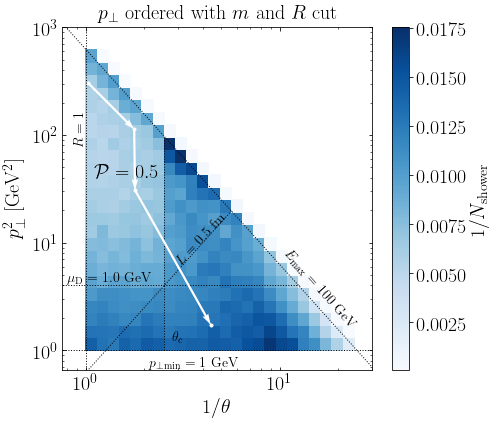

In [89]:
fig, ax = subplots()
E_max=sqrt(t_max)
figsize(7,6)
xbins = logspace(log10(min(1./res.T[4])),log10(max(1./res.T[4])), 25)
ybins = logspace(log10(min(res.T[3])),log10(max(res.T[3])), 25)
h = ax.hist2d(1./res.T[4], res.T[3], bins=(xbins, ybins), weights=res.T[7]/sum(Nev), cmap='Blues', cmin=1./sum(Nev))
plot(1./jet_coord_example.T[4], jet_coord_example.T[3],'w.-',lw=1)
x     = 1. / jet_coord_example.T[4]
y     = jet_coord_example.T[3]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
plot([1e-5,1e5],[pT2_min,pT2_min],'k:',lw=1)
text(2.1e0, 0.68, r'$p_{\perp\rm min}=%d$ GeV' %sqrt(pT2_min), fontsize=14)
invtheta = logspace(-3,2,30)
loglog(invtheta,E_max**2/16./invtheta**2,'k:',lw=1)
text(1e1, 7.e0, r'$E_{\rm max}=%d$ GeV' %(sqrt(t_max)/R), rotation=-48.5, fontsize=14)
plot([1,1],[1e-1,1e4], 'k:', lw=1)
text(0.85*1./R, 1.3e2, r'$R=%d$' %R, rotation=90,  fontsize=14)

theta = linspace(sqrt(8./sqrt(t_max)/(L/0.197)), 10, 10)
loglog(1./theta, (2./theta/(L/0.197))**2., 'k:', lw=1)
text(0.5*sqrt((L/0.197)*sqrt(t_max)/8.), 0.8*sqrt(t_max)/(L/0.197)/2., r'$L=%s$ fm' %L, rotation=47, fontsize=14)
loglog([sqrt(m2D)*(L/0.197),sqrt(m2D)*(L/0.197)],[pT2_min, t_max/16./m2D/(L/0.197)**2], 'k:', lw=1)
text(1.1*sqrt(m2D)*(L/0.197), 1.2*pT2_min, r'$\theta_c$', rotation=0, fontsize=14)
loglog([0.1,1./(8.*sqrt(m2D/t_max))],[(2.*sqrt(m2D))**2,(2.*sqrt(m2D))**2], 'k:', lw=1)
text(8e-1, 1.05*4.*m2D, r'$\mu_{\rm D}=%s$ GeV' %sqrt(m2D), fontsize=14)
text(1.1/R, 4e1, r'$\mathcal{P}=%s$' %punish, fontsize=20)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75,3e1)
ylim(0.65,1e3)
ylabel(r'$p^2_\perp$ [GeV$^2$]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'$p_\perp$ ordered with $m$ and $R$ cut', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("medium/LundPlane_pt_ordered_t_R_cut_partiald.pdf", bbox_inches="tight")
tight_layout()
show()

In [90]:
h0 = ax.hist2d(1./res0.T[4], res0.T[3], bins=(xbins, ybins), weights=res0.T[7]/sum(Nev0))
h  = ax.hist2d(1./res.T[4],  res.T[3],  bins=(xbins, ybins), weights=res.T[7]/ sum(Nev))

/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


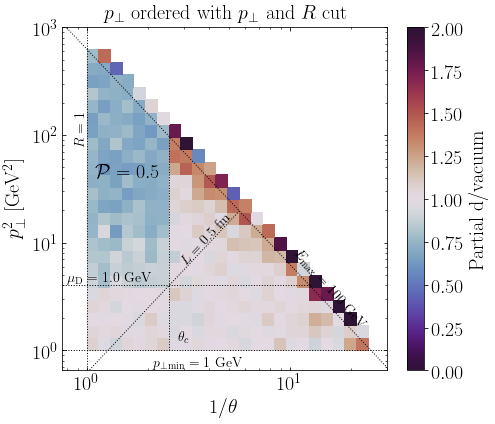

In [91]:
fig, ax = subplots()
E_max=sqrt(t_max)
figsize(7,6)

ratio = pcolormesh(h[1],h[2],h[0].T/h0[0].T, cmap='twilight_shifted', vmin=0, vmax=2)
plot([1e-5,1e5],[pT2_min,pT2_min],'k:',lw=1)
text(2.1e0, 0.68, r'$p_{\perp\rm min}=%d$ GeV' %sqrt(pT2_min), fontsize=14)
invtheta = logspace(-3,2,30)
loglog(invtheta,E_max**2/16./invtheta**2,'k:',lw=1)
text(1e1, 7.e0, r'$E_{\rm max}=%d$ GeV' %(sqrt(t_max)/R), rotation=-48.5, fontsize=14)
plot([1,1],[1e-1,1e4], 'k:', lw=1)
text(0.85*1./R, 1.3e2, r'$R=%d$' %R, rotation=90,  fontsize=14)

theta = linspace(sqrt(8./sqrt(t_max)/(L/0.197)), 10, 10)
loglog(1./theta, (2./theta/(L/0.197))**2., 'k:', lw=1)
text(0.5*sqrt((L/0.197)*sqrt(t_max)/8.), 0.8*sqrt(t_max)/(L/0.197)/2., r'$L=%s$ fm' %L, rotation=47, fontsize=14)
loglog([sqrt(m2D)*(L/0.197),sqrt(m2D)*(L/0.197)],[pT2_min, t_max/16./m2D/(L/0.197)**2], 'k:', lw=1)
text(1.1*sqrt(m2D)*(L/0.197), 1.2*pT2_min, r'$\theta_c$', rotation=0, fontsize=14)
loglog([0.1,1./(8.*sqrt(m2D/t_max))],[(2.*sqrt(m2D))**2,(2.*sqrt(m2D))**2], 'k:', lw=1)
text(8e-1, 1.05*4.*m2D, r'$\mu_{\rm D}=%s$ GeV' %sqrt(m2D), fontsize=14)
text(1.1/R, 4e1, r'$\mathcal{P}=%s$' %punish, fontsize=20)

cbar = colorbar(ratio, ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75,3e1)
ylim(0.65,1e3)
ylabel(r'$p^2_\perp$ [GeV$^2$]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"Partial d/vacuum", fontsize=20)
title(r'$p_{\perp}$ ordered with $p_\perp$ and $R$ cut', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("medium/LundPlane_pt_ordered_m_R_cut_partiald_ratio.pdf", bbox_inches="tight")
tight_layout()
show()

In [92]:
jet_coord_example = shower(1, 'tf_Rcut', t_max, pT2_min, R, 'excl', True, 'Partial_d', L, m2D, qhat, punish)[0]
res, Nev          = shower(N, 'tf_Rcut', t_max, pT2_min, R, 'excl', True, 'Partial_d', L, m2D, qhat, punish)
res0, Nev0        = shower(N, 'tf_Rcut', t_max, pT2_min, R, 'excl', False)

0
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000


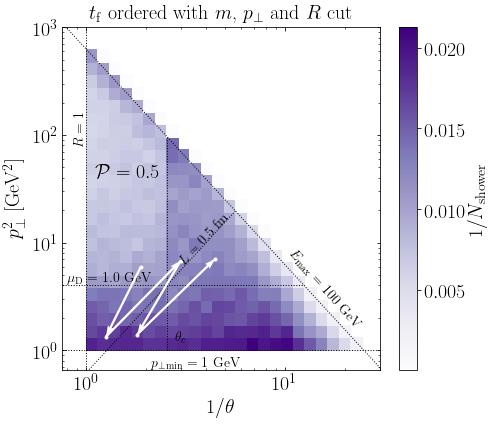

In [93]:
fig, ax = subplots()
E_max=sqrt(t_max)
figsize(7,6)
xbins = logspace(log10(min(1./res.T[4])),log10(max(1./res.T[4])), 25)
ybins = logspace(log10(min(res.T[3])),log10(max(res.T[3])), 25)
h = ax.hist2d(1./res.T[4], res.T[3], bins=(xbins, ybins), weights=res.T[7]/sum(Nev), cmap='Purples', cmin=1./sum(Nev))
plot(1./jet_coord_example.T[4], jet_coord_example.T[3],'w.-',lw=1)
x     = 1. / jet_coord_example.T[4]
y     = jet_coord_example.T[3]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
plot([1e-5,1e5],[pT2_min,pT2_min],'k:',lw=1)
text(2.1e0, 0.68, r'$p_{\perp\rm min}=%d$ GeV' %sqrt(pT2_min), fontsize=14)
invtheta = logspace(-3,2,30)
loglog(invtheta,E_max**2/16./invtheta**2,'k:',lw=1)
text(1e1, 7.e0, r'$E_{\rm max}=%d$ GeV' %(sqrt(t_max)/R), rotation=-48.5, fontsize=14)
plot([1,1],[1e-1,1e4], 'k:', lw=1)
text(0.85*1./R, 1.3e2, r'$R=%d$' %R, rotation=90,  fontsize=14)

theta = linspace(sqrt(8./sqrt(t_max)/(L/0.197)), 10, 10)
loglog(1./theta, (2./theta/(L/0.197))**2., 'k:', lw=1)
text(0.5*sqrt((L/0.197)*sqrt(t_max)/8.), 0.8*sqrt(t_max)/(L/0.197)/2., r'$L=%s$ fm' %L, rotation=47, fontsize=14)
loglog([sqrt(m2D)*(L/0.197),sqrt(m2D)*(L/0.197)],[pT2_min, t_max/16./m2D/(L/0.197)**2], 'k:', lw=1)
text(1.1*sqrt(m2D)*(L/0.197), 1.2*pT2_min, r'$\theta_c$', rotation=0, fontsize=14)
loglog([0.1,1./(8.*sqrt(m2D/t_max))],[(2.*sqrt(m2D))**2,(2.*sqrt(m2D))**2], 'k:', lw=1)
text(8e-1, 1.05*4.*m2D, r'$\mu_{\rm D}=%s$ GeV' %sqrt(m2D), fontsize=14)
text(1.1/R, 4e1, r'$\mathcal{P}=%s$' %punish, fontsize=20)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75,3e1)
ylim(0.65,1e3)
ylabel(r'$p^2_\perp$ [GeV$^2$]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'$t_{\rm f}$ ordered with $m$, $p_{\perp}$ and $R$ cut', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("medium/LundPlane_tf_ordered_t_pt_R_cut_partiald.pdf", bbox_inches="tight")
tight_layout()
show()

In [94]:
h0 = ax.hist2d(1./res0.T[4], res0.T[3], bins=(xbins, ybins), weights=res0.T[7]/sum(Nev0))
h  = ax.hist2d(1./res.T[4],  res.T[3],  bins=(xbins, ybins), weights=res.T[7]/ sum(Nev))

/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


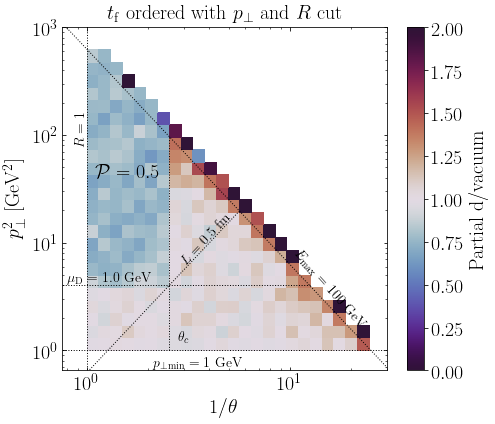

In [95]:
fig, ax = subplots()
E_max=sqrt(t_max)
figsize(7,6)

ratio = pcolormesh(h[1],h[2],h[0].T/h0[0].T, cmap='twilight_shifted', vmin=0, vmax=2)
plot([1e-5,1e5],[pT2_min,pT2_min],'k:',lw=1)
text(2.1e0, 0.68, r'$p_{\perp\rm min}=%d$ GeV' %sqrt(pT2_min), fontsize=14)
invtheta = logspace(-3,2,30)
loglog(invtheta,E_max**2/16./invtheta**2,'k:',lw=1)
text(1e1, 7.e0, r'$E_{\rm max}=%d$ GeV' %(sqrt(t_max)/R), rotation=-48.5, fontsize=14)
plot([1,1],[1e-1,1e4], 'k:', lw=1)
text(0.85*1./R, 1.3e2, r'$R=%d$' %R, rotation=90,  fontsize=14)

theta = linspace(sqrt(8./sqrt(t_max)/(L/0.197)), 10, 10)
loglog(1./theta, (2./theta/(L/0.197))**2., 'k:', lw=1)
text(0.5*sqrt((L/0.197)*sqrt(t_max)/8.), 0.8*sqrt(t_max)/(L/0.197)/2., r'$L=%s$ fm' %L, rotation=47, fontsize=14)
loglog([sqrt(m2D)*(L/0.197),sqrt(m2D)*(L/0.197)],[pT2_min, t_max/16./m2D/(L/0.197)**2], 'k:', lw=1)
text(1.1*sqrt(m2D)*(L/0.197), 1.2*pT2_min, r'$\theta_c$', rotation=0, fontsize=14)
loglog([0.1,1./(8.*sqrt(m2D/t_max))],[(2.*sqrt(m2D))**2,(2.*sqrt(m2D))**2], 'k:', lw=1)
text(8e-1, 1.05*4.*m2D, r'$\mu_{\rm D}=%s$ GeV' %sqrt(m2D), fontsize=14)
text(1.1/R, 4e1, r'$\mathcal{P}=%s$' %punish, fontsize=20)

cbar = colorbar(ratio, ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75,3e1)
ylim(0.65,1e3)
ylabel(r'$p^2_\perp$ [GeV$^2$]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"Partial d/vacuum", fontsize=20)
title(r'$t_{\rm f}$ ordered with $p_\perp$ and $R$ cut', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("medium/LundPlane_tf_ordered_m_pt_R_cut_partiald_ratio.pdf", bbox_inches="tight")
tight_layout()
show()

In [96]:
jet_coord_example = shower(1, 'theta', t_max, pT2_min, R, 'excl', True, 'Partial_d', L, m2D, qhat, punish)[0]
res, Nev          = shower(N, 'theta', t_max, pT2_min, R, 'excl', True, 'Partial_d', L, m2D, qhat, punish)
res0, Nev0        = shower(N, 'theta', t_max, pT2_min, R, 'excl', False)

0
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000


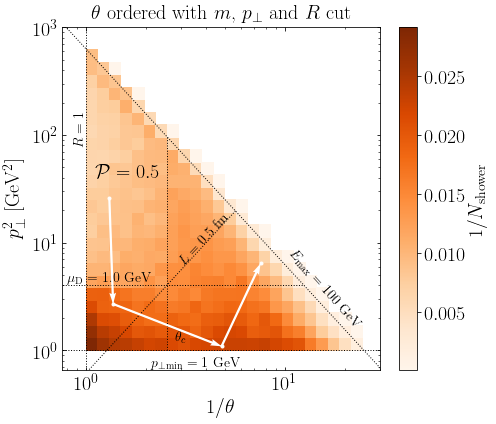

In [100]:
fig, ax = subplots()
E_max=sqrt(t_max)
figsize(7,6)
xbins = logspace(log10(min(1./res.T[4])),log10(max(1./res.T[4])), 25)
ybins = logspace(log10(min(res.T[3])),log10(max(res.T[3])), 25)
h = ax.hist2d(1./res.T[4], res.T[3], bins=(xbins, ybins), weights=res.T[7]/sum(Nev), cmap='Oranges', cmin=1./sum(Nev))
plot(1./jet_coord_example.T[4], jet_coord_example.T[3],'w.-',lw=1)
x     = 1. / jet_coord_example.T[4]
y     = jet_coord_example.T[3]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
plot([1e-5,1e5],[pT2_min,pT2_min],'k:',lw=1)
text(2.1e0, 0.68, r'$p_{\perp\rm min}=%d$ GeV' %sqrt(pT2_min), fontsize=14)
invtheta = logspace(-3,2,30)
loglog(invtheta,E_max**2/16./invtheta**2,'k:',lw=1)
text(1e1, 7.e0, r'$E_{\rm max}=%d$ GeV' %(sqrt(t_max)/R), rotation=-48.5, fontsize=14)
plot([1,1],[1e-1,1e4], 'k:', lw=1)
text(0.85*1./R, 1.3e2, r'$R=%d$' %R, rotation=90,  fontsize=14)

theta = linspace(sqrt(8./sqrt(t_max)/(L/0.197)), 10, 10)
loglog(1./theta, (2./theta/(L/0.197))**2., 'k:', lw=1)
text(0.5*sqrt((L/0.197)*sqrt(t_max)/8.), 0.8*sqrt(t_max)/(L/0.197)/2., r'$L=%s$ fm' %L, rotation=47, fontsize=14)
loglog([sqrt(m2D)*(L/0.197),sqrt(m2D)*(L/0.197)],[pT2_min, t_max/16./m2D/(L/0.197)**2], 'k:', lw=1)
text(1.1*sqrt(m2D)*(L/0.197), 1.2*pT2_min, r'$\theta_c$', rotation=0, fontsize=14)
loglog([0.1,1./(8.*sqrt(m2D/t_max))],[(2.*sqrt(m2D))**2,(2.*sqrt(m2D))**2], 'k:', lw=1)
text(8e-1, 1.05*4.*m2D, r'$\mu_{\rm D}=%s$ GeV' %sqrt(m2D), fontsize=14)
text(1.1/R, 4e1, r'$\mathcal{P}=%s$' %punish, fontsize=20)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75,3e1)
ylim(0.65,1e3)
ylabel(r'$p^2_\perp$ [GeV$^2$]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'$\theta$ ordered with $m$, $p_{\perp}$ and $R$ cut', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("medium/LundPlane_theta_ordered_t_pt_cut_partiald.pdf", bbox_inches="tight")
tight_layout()
show()

In [98]:
h0 = ax.hist2d(1./res0.T[4], res0.T[3], bins=(xbins, ybins), weights=res0.T[7]/sum(Nev0))
h  = ax.hist2d(1./res.T[4],  res.T[3],  bins=(xbins, ybins), weights=res.T[7]/ sum(Nev))

/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


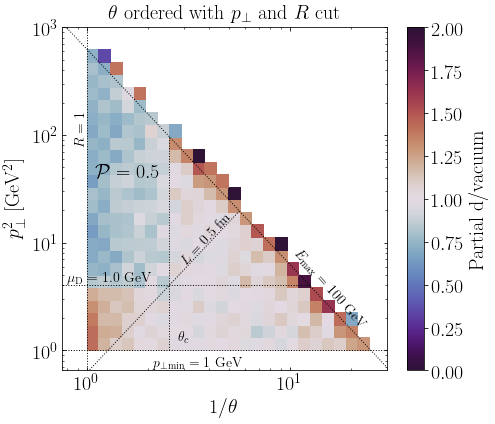

In [99]:
fig, ax = subplots()
E_max=sqrt(t_max)
figsize(7,6)

ratio = pcolormesh(h[1],h[2],h[0].T/h0[0].T, cmap='twilight_shifted', vmin=0, vmax=2)
plot([1e-5,1e5],[pT2_min,pT2_min],'k:',lw=1)
text(2.1e0, 0.68, r'$p_{\perp\rm min}=%d$ GeV' %sqrt(pT2_min), fontsize=14)
invtheta = logspace(-3,2,30)
loglog(invtheta,E_max**2/16./invtheta**2,'k:',lw=1)
text(1e1, 7.e0, r'$E_{\rm max}=%d$ GeV' %(sqrt(t_max)/R), rotation=-48.5, fontsize=14)
plot([1,1],[1e-1,1e4], 'k:', lw=1)
text(0.85*1./R, 1.3e2, r'$R=%d$' %R, rotation=90,  fontsize=14)

theta = linspace(sqrt(8./sqrt(t_max)/(L/0.197)), 10, 10)
loglog(1./theta, (2./theta/(L/0.197))**2., 'k:', lw=1)
text(0.5*sqrt((L/0.197)*sqrt(t_max)/8.), 0.8*sqrt(t_max)/(L/0.197)/2., r'$L=%s$ fm' %L, rotation=47, fontsize=14)
loglog([sqrt(m2D)*(L/0.197),sqrt(m2D)*(L/0.197)],[pT2_min, t_max/16./m2D/(L/0.197)**2], 'k:', lw=1)
text(1.1*sqrt(m2D)*(L/0.197), 1.2*pT2_min, r'$\theta_c$', rotation=0, fontsize=14)
loglog([0.1,1./(8.*sqrt(m2D/t_max))],[(2.*sqrt(m2D))**2,(2.*sqrt(m2D))**2], 'k:', lw=1)
text(8e-1, 1.05*4.*m2D, r'$\mu_{\rm D}=%s$ GeV' %sqrt(m2D), fontsize=14)
text(1.1/R, 4e1, r'$\mathcal{P}=%s$' %punish, fontsize=20)

cbar = colorbar(ratio, ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75,3e1)
ylim(0.65,1e3)
ylabel(r'$p^2_\perp$ [GeV$^2$]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"Partial d/vacuum", fontsize=20)
title(r'$\theta$ ordered with $p_\perp$ and $R$ cut', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("medium/LundPlane_theta_ordered_m_pt_R_cut_partiald_ratio.pdf", bbox_inches="tight")
tight_layout()
show()

## Full decoherence (decoherenced region)

## Analytic

#### Enable jump-back

In [57]:
C      = 6.
alphas = 0.26
def int_full(theta, R, E, ptmin, zcut=0.0, beta=0.0):
    theta_min = 4.*ptmin/E
    if (beta == 0.):
        if   (zcut <= ptmin/E/R): # SD does nothing
            if   (theta_min <= theta and theta <= R):       res = 0.5*( (log(E*theta/2./ptmin))**2.   - (log(E*theta_min/2./ptmin))**2. )
        elif (ptmin/E/R < zcut and zcut <= ptmin/E/theta_min): 
            theta_s = ptmin/E/zcut
            if   (theta_min <= theta and theta <= theta_s): res = 0.5*( (log(E*theta/2./ptmin))**2.   - (log(E*theta_min/2./ptmin))**2. ) 
            elif (theta_s < theta and theta <= R):          res = 0.5*( (log(E*theta_s/2./ptmin))**2. - (log(E*theta_min/2./ptmin))**2. ) + log(theta/theta_s)*log(1./2./zcut)
        elif (ptmin/E/theta_min < zcut and zcut <= 0.5): 
            if   (theta_min <= theta and theta <= R):       res = log(theta/theta_min)*log(1./2./zcut)
        return C*alphas/pi * res
def int_in(theta, R, E, ptmin, qhat, Linfm, zcut=0.0, beta=0.0):
    theta_min  = 4.*ptmin/E
    LinGeV     = Linfm / 0.197
    theta_d    = sqrt(12./(qhat*LinGeV**3.))
    theta_dmin = (2.**7.*qhat/3./(E**3.))**(1./4.)
    if (theta_d < theta_dmin): theta_d = theta_dmin
    if (beta == 0.):
        if   (zcut <= 1./E*(2.*qhat/3./R**4.)**(1./3.)): # SD does nothing
            if   (theta_min <= theta and theta <= theta_d): res = 0.0
            elif (theta_d < theta and theta <= R):          res = 3./8. * ( (log(E/2.*(3.*theta**4./2./qhat)**(1./3.)))**2 - (log(E/2.*(3.*theta_d**4./2./qhat)**(1./3.)))**2 )
        elif (1./E*(2.*qhat/3./R**4.)**(1./3.) < zcut and zcut <= 1./E*(2.*qhat/3./theta_d**4.)**(1./3.)): # SD applied
            theta_s = (1./zcut/E*(2.*qhat/3.)**(1./3.))**(3./4.)
            if   (theta_min <= theta and theta <= theta_d): res = 0.0
            elif (theta_d <= theta and theta <= theta_s):   res = 3./8. * ((log(E/2.*(3.*theta**4./2./qhat)**(1./3.)))**2   - (log(E/2.*(3.*theta_d**4./2./qhat)**(1./3.)))**2)
            elif (theta_s <= theta and theta <= R):         res = 3./8. * ((log(E/2.*(3.*theta_s**4./2./qhat)**(1./3.)))**2 - (log(E/2.*(3.*theta_d**4./2./qhat)**(1./3.)))**2) + log(theta/theta_s)*log(1./2./zcut)
        elif (1./E*(2.*qhat/3./theta_d**4.)**(1./3.) < zcut and zcut <= 0.5): 
            if   (theta_min <= theta and theta <= theta_d): res = 0.0
            elif (theta_d <= theta and theta <= R):         res = log(theta/theta_d)*log(1./2./zcut)
        return C*alphas/pi * res
def Delta(theta, R, E, ptmin, qhat, Linfm, Q, zcut=0.0, beta=0.0):
    theta_min  = 4.*ptmin/E
    if (theta_min <= theta and theta <= R): 
        return exp(- (Q*Q*int_in(R, R, E, ptmin, qhat, Linfm, zcut, beta) + int_full(R, R, E, ptmin, zcut, beta) - int_in(R, R, E, ptmin, qhat, Linfm, zcut, beta)) + (Q*Q*int_in(theta, R, E, ptmin, qhat, Linfm, zcut, beta) + int_full(theta, R, E, ptmin, zcut, beta) - int_in(theta, R, E, ptmin, qhat, Linfm, zcut, beta)) )
def Delta_vac(theta, R, E, ptmin, zcut=0.0, beta=0.0):
    return exp(- int_full(R, R, E, ptmin, zcut, beta) + int_full(theta, R, E, ptmin, zcut, beta))
def PN_pt_t_R_cut(n, R, E, ptmin, qhat, Linfm, Q, zcut=0.0, beta=0.0):
    theta_min = 4.*ptmin/E
    return Delta(theta_min, R, E, ptmin, qhat, Linfm, Q, zcut, beta)*1./math.factorial(n)*pow(-log(Delta(theta_min, R, E, ptmin, qhat, Linfm, Q, zcut, beta)), n)
def PN_pt_t_R_cut_vac(n, R, E, ptmin, zcut=0.0, beta=0.0):
    theta_min = 4.*ptmin/E
    return Delta_vac(theta_min, R, E, ptmin, zcut, beta)/math.factorial(n)*pow(-log(Delta_vac(theta_min, R, E, ptmin, zcut, beta)), n)
def P_rg_vac(theta, R, E, ptmin, zcut=0.0, beta=0.0):
    theta_min = 4.*ptmin/E
    if (beta == 0.):
        if   (zcut <= ptmin/E/R): # SD does nothing
            if   (theta_min <= theta and theta <= R):       res = log(E*theta/2./ptmin)
            else: res = 0.
        elif (ptmin/E/R < zcut and zcut <= ptmin/E/theta_min): 
            theta_s = ptmin/E/zcut
            if   (theta_min <= theta and theta <= theta_s): res = log(E*theta/2./ptmin)
            elif (theta_s < theta and theta <= R):          res = log(1./2./zcut)
            else: res = 0.
        elif (ptmin/E/theta_min < zcut and zcut < 0.5): 
            if   (theta_min <= theta and theta <= R):       res = log(1./2./zcut)
            else: res = 0.
    return C*alphas/pi / theta * res * Delta_vac(theta, R, E, ptmin, zcut, beta)
def P_rg(theta, R, E, ptmin, qhat, Linfm, Q, zcut=0.0, beta=0.0):
    theta_min  = 4.*ptmin/E
    LinGeV     = Linfm / 0.197
    theta_d    = sqrt(12./qhat/LinGeV**3.)
    theta_dmin = (2.**7.*qhat/3./E**3.)**(1./4.)
    if (theta_d < theta_dmin): theta_d = theta_dmin
    if (beta==0):
        if   (zcut <= ptmin/E/R):# SD does nothing
            if   (theta_min <= theta and theta <= theta_d):   res = log(E*theta/2./ptmin)
            elif (theta_d < theta and theta <= R):            res = log(theta/ptmin*(2.*qhat/3./theta**4.)**(1./3.)) + Q*Q*log(E/2.*(3.*theta**4./2./qhat)**(1./3.))
        elif (ptmin/E/R < zcut and zcut <= 1./E*(2.*qhat/3./R**4.)**(1./3.)): 
            theta_s = ptmin/E/zcut
            if   (theta_min <= theta and theta <= theta_d):   res = log(E*theta/2./ptmin)
            elif (theta_d < theta and theta <= theta_s):      res = log(theta/ptmin*(2.*qhat/3./theta**4.)**(1./3.)) + Q*Q*log(E/2.*(3.*theta**4./2./qhat)**(1./3.))
            elif (theta_s < theta and theta <= R):            res = log(1./E*(2.*qhat/3./theta**4.)**(1./3.)/zcut) + Q*Q*log(E/2.*(3.*theta**4./2./qhat)**(1./3.))
        elif (1./E*(2.*qhat/3./R**4.)**(1./3.) < zcut and zcut <= 1./E*(2.*qhat/3./theta_d**4.)**(1./3.)):
            theta_s1 = ptmin/E/zcut
            theta_s2 = (1./zcut/E*(2.*qhat/3.)**(1./3.))**(3./4.)
            if   (theta_min <= theta and theta <= theta_s1):  res = log(E*theta/2./ptmin)
            elif (theta_s1 < theta and theta <= theta_d):     res = log(1./2./zcut)
            elif (theta_d < theta and theta <= theta_s2):     res = log(1./E*(2.*qhat/3./theta**4.)**(1./3.)/zcut) + Q*Q*log(E/2.*(3.*theta**4./2./qhat)**(1./3.))
            elif (theta_s2 < theta and theta <= R):           res = Q*Q*log(1./2./zcut)
        elif (1./E*(2.*qhat/3./theta_d**4.)**(1./3.) < zcut and zcut <= 1./4.): 
            theta_s = ptmin/E/zcut
            if   (theta_min <= theta and theta <= theta_s):   res = log(E*theta/2./ptmin)
            elif (theta_s <= theta and theta <= theta_d):     res = log(1./2./zcut)
            elif (theta_d < theta and theta <= R):            res = Q*Q*log(1./2./zcut)
        elif (1./4. < zcut and zcut <= 0.5): 
            if   (theta_min <= theta and theta <= theta_d):   res = log(1./2./zcut)
            elif (theta_d < theta and theta <= R):            res = Q*Q*log(1./2./zcut)
    return C*alphas/pi / theta * res * Delta(theta, R, E, ptmin, qhat, Linfm, Q, zcut, beta)
def P_zg_rg_vac(zg, theta, R, E, ptmin, zcut=0.0, beta=0.0):
    theta_min = 4.*ptmin/E
    if (beta == 0.):
        if   (zcut <= ptmin/E/R): # SD does nothing
            if   (theta_min <= theta and theta <= R):       res = log(E*theta/2./ptmin)
            else: res = 0.
        elif (ptmin/E/R < zcut and zcut <= ptmin/E/theta_min): 
            theta_s = ptmin/E/zcut
            if   (theta_min <= theta and theta <= theta_s): res = log(E*theta/2./ptmin)
            elif (theta_s < theta and theta <= R):          res = log(1./2./zcut)
            else: res = 0.
        elif (ptmin/E/theta_min < zcut and zcut < 0.5): 
            if   (theta_min <= theta and theta <= R):       res = log(1./2./zcut)
            else: res = 0.
    if (zcut <= zg and zg <= 0.5):
        return 1./zg / res
def P_zg_rg(zg, theta, R, E, ptmin, qhat, Linfm, Q, zcut=0.0, beta=0.0):
    theta_min  = 4.*ptmin/E
    LinGeV     = Linfm / 0.197
    theta_d    = sqrt(12./qhat/LinGeV**3.)
    theta_dmin = (2.**7.*qhat/3./E**3.)**(1./4.)
    if (theta_d < theta_dmin): theta_d = theta_dmin
    if (beta==0):
        if   (zcut <= ptmin/E/R):# SD does nothing
            if   (theta_min <= theta and theta <= theta_d):   res = 1./zg / log(E*theta/2./ptmin)
            elif (theta_d < theta and theta <= R):            res = (Q*Q+1.)/zg / ( log(theta/ptmin*(2.*qhat/3./theta**4.)**(1./3.)) + Q*Q*log(E/2.*(3.*theta**4./2./qhat)**(1./3.)) )
        elif (ptmin/E/R < zcut and zcut <= 1./E*(2.*qhat/3./R**4.)**(1./3.)): 
            theta_s = ptmin/E/zcut
            if   (theta_min <= theta and theta <= theta_d):   res = 1./zg / log(E*theta/2./ptmin)
            elif (theta_d < theta and theta <= theta_s):      res = (Q*Q+1.)/zg / ( log(theta/ptmin*(2.*qhat/3./theta**4.)**(1./3.)) + Q*Q*log(E/2.*(3.*theta**4./2./qhat)**(1./3.)) )
            elif (theta_s < theta and theta <= R):            res = (Q*Q+1.)/zg / ( log(1./E*(2.*qhat/3./theta**4.)**(1./3.)/zcut) + Q*Q*log(E/2.*(3.*theta**4./2./qhat)**(1./3.)) )
        elif (1./E*(2.*qhat/3./R**4.)**(1./3.) < zcut and zcut <= 1./E*(2.*qhat/3./theta_d**4.)**(1./3.)):
            theta_s1 = ptmin/E/zcut
            theta_s2 = (1./zcut/E*(2.*qhat/3.)**(1./3.))**(3./4.)
            if   (theta_min <= theta and theta <= theta_s1):  res = 1./zg / log(E*theta/2./ptmin)
            elif (theta_s1 < theta and theta <= theta_d):     res = 1./zg / log(1./2./zcut)
            elif (theta_d < theta and theta <= theta_s2):     res = (Q*Q+1.)/zg / ( log(1./E*(2.*qhat/3./theta**4.)**(1./3.)/zcut) + Q*Q*log(E/2.*(3.*theta**4./2./qhat)**(1./3.)) )
            elif (theta_s2 < theta and theta <= R):           res = Q*Q/zg / ( Q*Q*log(1./2./zcut) )
        elif (1./E*(2.*qhat/3./theta_d**4.)**(1./3.) < zcut and zcut <= 1./4.): 
            theta_s = ptmin/E/zcut
            if   (theta_min <= theta and theta <= theta_s):   res = 1./zg / log(E*theta/2./ptmin)
            elif (theta_s <= theta and theta <= theta_d):     res = 1./zg / log(1./2./zcut)
            elif (theta_d < theta and theta <= R):            res = Q*Q/zg / ( Q*Q*log(1./2./zcut) )
        elif (1./4. < zcut and zcut <= 0.5): 
            if   (theta_min <= theta and theta <= theta_d):   res = 1./zg / log(1./2./zcut)
            elif (theta_d < theta and theta <= R):            res = Q*Q/zg / ( Q*Q*log(1./2./zcut) )
    if (zcut <= zg and zg <= 0.5):
        return res
def P_zg_vac(zg, R, E, ptmin, zcut=0.0, beta=0.0):
    theta_min = 4.*ptmin/E
    if (beta == 0.):
        if   (zcut <= zg and zg <= 0.5): res = integrate.quad(lambda rg: 1./rg * Delta_vac(rg, R, E, ptmin, zcut, beta), max(ptmin/E/zg, 4.*ptmin/E), R)[0]
        else: res = 0.
        return C*alphas/pi /zg * res
def P_zg(zg, R, E, ptmin, qhat, Linfm, Q, zcut=0.0, beta=0.0):
    theta_min  = 4.*ptmin/E
    LinGeV     = Linfm / 0.197
    theta_d    = sqrt(12./qhat/LinGeV**3.)
    theta_dmin = (2.**7.*qhat/3./E**3.)**(1./4.)
    if (theta_d < theta_dmin): theta_d = theta_dmin
    if (beta == 0.):
        zg_d = ptmin/E/theta_d
        if (ptmin/E/R <= zg and zg <= 1./E*(2.*qhat/3./R**4.)**(1./3.)): 
            res = integrate.quad(lambda rg: 1./rg * Delta(rg, R, E, ptmin, qhat, Linfm, Q, zcut, beta), max(ptmin/E/zg, theta_min), R)[0]
        elif (1./E*(2.*qhat/3./R**4.)**(1./3.) <= zg and zg <= 1./E*(2.*qhat/3./theta_d**4.)**(1./3.)): 
            res = integrate.quad(lambda rg: 1./rg * Delta(rg, R, E, ptmin, qhat, Linfm, Q, zcut, beta), max(ptmin/E/zg, theta_min), max(theta_d, (1./zcut/E*(2.*qhat/3.)**(1./3.))**(3./4.)))[0] + Q*Q*integrate.quad(lambda rg: 1./rg * Delta(rg, R, E, ptmin, qhat, Linfm, Q, zcut, beta), max(theta_d, 1./E*(2.*qhat/3./R**4.)**(1./3.)), R)[0] 
        elif (1./E*(2.*qhat/3./theta_d**4.)**(1./3.) <= zg and zg <= 0.5):
            res = integrate.quad(lambda rg: 1./rg * Delta(rg, R, E, ptmin, qhat, Linfm, Q, zcut, beta), max(ptmin/E/zg, theta_min), theta_d)[0] + Q*Q*integrate.quad(lambda rg: 1./rg * Delta(rg, R, E, ptmin, qhat, Linfm, Q, zcut, beta), theta_d, R)[0] 
        else: res = 0.
        return 2.*C*alphas/pi / zg * res
def int_m_full(m2, R, E, ptmin, zcut=0.0, beta=0.0):
    m2_min = 4.*ptmin**2.
    m2_max = (E*R)**2.
    m2_s   = E*R*ptmin
    if (beta == 0.):
        if   (zcut <= ptmin/E/R): # SD does nothing
            if   (m2_min <= m2 and m2 <= m2_s):      res = 0.5*( (log(m2/2./(ptmin**2.)))**2.   - (log(m2_min/2./(ptmin**2.)))**2. ) 
            elif (m2_s < m2 and m2 <= m2_max/4.):    res = 0.5*( (log(m2_s/2./(ptmin**2.)))**2. - (log(m2_min/2./(ptmin**2.)))**2. + (log(m2_max/2./m2_s))**2. - (log(m2_max/2./m2))**2. )
        elif (ptmin/E/R < zcut and zcut <= 1./4.): 
            m2_s1 = ptmin**2./zcut
            m2_s2 = m2_max*zcut
            if   (m2_min <= m2 and m2 <= m2_s1):     res = 0.5*( (log(m2/2./ptmin**2))**2. - (log(m2_min/2./ptmin**2))**2. )
            elif (m2_s1 <= m2 and m2 <= m2_s2):      res = ( 0.5*( (log(m2_s1/2./ptmin**2))**2. - (log(m2_min/2./ptmin**2))**2. ) + log(m2/m2_s1)*log(1./2./zcut) )
            elif (m2_s2 <= m2 and m2 <= m2_max/4.):  res = ( 0.5*( (log(m2_s1/2./ptmin**2))**2. - (log(m2_min/2./ptmin**2))**2. ) + log(m2_s2/m2_s1)*log(1./2./zcut) + 0.5*( (log((E*R)**2./2./m2_s2))**2. - (log(m2_max/2./m2))**2. ) )
        elif (1./4. < zcut and zcut < 0.5): 
            if   (m2_min <= m2 and m2 <= m2_max/4.): res = log(m2/m2_min)*log(1./2./zcut)
        return C*alphas/2./pi * res
def int_m_in(m2, R, E, ptmin, qhat, Linfm, zcut=0.0, beta=0.0):
    m2_min     = 4.*ptmin**2.
    m2_max     = (E*R)**2.
    m2_s       = E*R*ptmin
    LinGeV     = Linfm / 0.197
    theta_d    = sqrt(12./(qhat*LinGeV**3.))
    theta_dmin = (2.**7.*qhat/3./E**3.)**(1./4.)
    if (theta_d < theta_dmin): theta_d = theta_dmin
    m2_c       = (2./3.*qhat*E**3.*theta_d**2.)**(1./3.)
    m2_qmax    = (2./3.*qhat*E*m2_max)**(1./3.)
    m2_cmax    = (E*theta_d)**2./2.
    if (beta == 0.):
        if   (zcut <= m2_qmax/m2_max): # SD does nothing
            if   (m2_min <= m2 and m2 <= m2_c):      res = 0.
            elif (m2_c < m2 and m2 <= m2_qmax):      res = 1./6.*((log(3.*m2**3./2./qhat/theta_d**2./E**3.))**2. - (log(3.*m2_c**3./2./qhat/theta_d**2./E**3.))**2.)
            elif (m2_qmax < m2 and m2 <= m2_cmax):   res = ( 1./6.*((log(3.*m2_qmax**3./2./qhat/theta_d**2./E**3.))**2. - (log(3.*m2_c**3./2./qhat/theta_d**2./E**3.))**2.) + log(m2/m2_qmax)*log(m2_max/(E*theta_d)**2.) )
            elif (m2_cmax < m2 and m2 <= m2_max/4.): res = ( 1./6.*((log(3.*m2_qmax**3./2./qhat/theta_d**2./E**3.))**2. - (log(3.*m2_c**3./2./qhat/theta_d**2./E**3.))**2.) + log(m2_cmax/m2_qmax)*log(m2_max/(E*theta_d)**2.) + 0.5*((log(m2_max/2./m2_cmax))**2. - ((log(m2_max/2./m2))**2.)) )
        elif (m2_qmax/m2_max < zcut and zcut <= m2_c/(E*theta_d)**2.):
            m2_s1 = sqrt(2.*qhat*E/3./zcut)
            m2_s2 = zcut*m2_max
            if   (m2_min <= m2 and m2 <= m2_c):      res = 0.
            elif (m2_c < m2 and m2 <= m2_s1):        res = 1./6.*((log(3.*m2**3./2./qhat/theta_d**2./E**3.))**2. - (log(3.*m2_c**3./2./qhat/theta_d**2./E**3.))**2.)
            elif (m2_s1 < m2 and m2 <= m2_s2):       res = 1./6.*((log(3.*m2_s1**3./2./qhat/theta_d**2./E**3.))**2. - (log(3.*m2_c**3./2./qhat/theta_d**2./E**3.))**2.)
        elif (m2_c/(E*theta_d)**2. < zcut and zcut <= 1./4.):
            if   (m2_min <= m2 and m2 <= zcut*(E*theta_d)**2.): res = 0.
            elif (zcut*(E*theta_d)**2. < m2 and m2 <= m2_cmax): res = 0.5*( (log(m2/(E*theta_d)**2/zcut)**2.) )
            elif (m2_cmax < m2 and m2 <= zcut*m2_max):          res = 0.5*( (log(m2_cmax/(E*theta_d)**2/zcut)**2.) ) + log(m2/m2_cmax)*log(1./2./zcut)
            elif (zcut*m2_max < m2 and m2 <= m2_max/4.):        res =  0.5*( (log(m2_cmax/(E*theta_d)**2/zcut)**2.) ) + log(zcut*m2_max/m2_cmax)*log(1./2./zcut) + 0.5*( (log(m2/2./m2_max)**2.) - (log(zcut*m2_max/2./m2_max)**2.) )
        elif (1./4. < zcut and zcut <= 0.5):         
            if   (m2_min <= m2 and m2 <= zcut*(E*theta_d)**2.): res = 0.
            elif (zcut*(E*theta_d)**2. < m2 and m2 <= m2_cmax): res = 0.5*( (log(m2/(E*theta_d)**2./zcut)**2.) )
            elif (m2_cmax < m2 and m2 <= m2_max/4.):            res = 0.5*( (log(m2/(E*theta_d)**2./zcut)**2.) ) + log(m2/m2_cmax)*log(1./2./zcut)
            
        return C*alphas/2./pi * res
def Delta_m_vac(m2, R, E, ptmin, zcut=0.0, beta=0.0):
    return exp(- int_m_full((E*R)**2./4., R, E, ptmin, zcut, beta) + int_m_full(m2, R, E, ptmin, zcut, beta))
def Delta_m(m2, R, E, ptmin, qhat, Linfm, Q, zcut=0.0, beta=0.0):
    return exp(- (Q*Q*int_m_in((E*R)**2./4., R, E, ptmin, qhat, Linfm, zcut, beta) + int_m_full((E*R)**2./4., R, E, ptmin, zcut, beta) - int_m_in((E*R)**2./4., R, E, ptmin, qhat, Linfm, zcut, beta) ) + ( Q*Q*int_m_in(m2, R, E, ptmin, qhat, Linfm, zcut, beta) + int_m_full(m2, R, E, ptmin, zcut, beta) - int_m_in(m2, R, E, ptmin, qhat, Linfm, zcut, beta) ) )
def P_m_vac(m2, R, E, ptmin, zcut=0.0, beta=0.0):
    m2_min     = 4.*ptmin**2
    m2_max     = (E*R)**2.
    m2_s       = E*R*ptmin
    if (beta == 0.):
        if (zcut <= ptmin/E/R): # SD does nothing
            if   (m2_min <= m2 and m2 <= m2_s):   res = log(m2/2./ptmin**2)
            elif (m2_s < m2 and m2 <= m2_max/4.): res = log(m2_max/2./m2)
    return C*alphas/2./pi / m2 * res * Delta_m_vac(m2, R, E, ptmin, zcut, beta)
def P_m(m2, R, E, ptmin, qhat, Linfm, Q, zcut=0.0, beta=0.0):
    m2_min     = 4.*ptmin**2.
    m2_max     = (E*R)**2.
    m2_s       = E*R*ptmin
    LinGeV     = Linfm / 0.197
    theta_d    = sqrt(12./(qhat*LinGeV**3.))
    theta_dmin = (2.**7.*qhat/3./E**3.)**(1./4.)
    if (theta_d < theta_dmin): theta_d = theta_dmin
    m2_c       = (2./3.*qhat*E**3.*theta_d**2.)**(1./3.)
    m2_qmax    = (2./3.*qhat*E*m2_max)**(1./3.)
    m2_cmax    = (E*theta_d)**2./2.
    if (beta == 0.):
        if   (zcut <= ptmin/E/R): # SD does nothing
            if   (m2_min <= m2 and m2 <= m2_c):      res = log(m2/2./ptmin**2.)
            elif (m2_c < m2 and m2 <= m2_s):         res = log(E*E*theta_d**2./2./m2) + log(2.*qhat*E/3./ptmin**2/m2)   + Q*Q*log(3.*m2**3./2./qhat/E**3./theta_d**2.)
            elif (m2_s < m2 and m2 <= m2_qmax):      res = log(E*E*theta_d**2./2./m2) + log(2.*qhat*E*m2_max/3./m2**3.) + Q*Q*log(3.*m2**3./2./qhat/E**3./theta_d**2.)
            elif (m2_qmax < m2 and m2 <= m2_cmax):   res = log(E*E*theta_d**2./2./m2) + Q*Q*log(m2_max/(E*theta_d)**2.)
            elif (m2_cmax < m2 and m2 <= m2_max/4.): res = Q*Q*log(m2_max/2./m2)
    return C*alphas/2./pi / m2 * res * Delta_m(m2, R, E, ptmin, qhat, Linfm, Q, zcut, beta)

In [88]:
E_max   = 500.
R       = 0.4
t_max   = (E_max*R)**2. 
pT2_min = 1.
punish  = 0.6

Delta0 = array([[theta, Delta_vac(theta, R, sqrt(t_max)/R, sqrt(pT2_min))] for theta in logspace(log10(4.*sqrt(pT2_min)/(sqrt(t_max)/R)), log10(R), 100)])
L       = 3.
qhat    = 1.0
Delta1 = array([[theta, Delta(theta, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish)] for theta in logspace(log10(4.*sqrt(pT2_min)/(sqrt(t_max)/R)), log10(R), 100)])
L       = 3.
qhat    = 0.7
Delta2 = array([[theta, Delta(theta, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish)] for theta in logspace(log10(4.*sqrt(pT2_min)/(sqrt(t_max)/R)), log10(R), 100)])
L       = 4.
qhat    = 0.7
Delta3 = array([[theta, Delta(theta, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish)] for theta in logspace(log10(4.*sqrt(pT2_min)/(sqrt(t_max)/R)), log10(R), 100)])

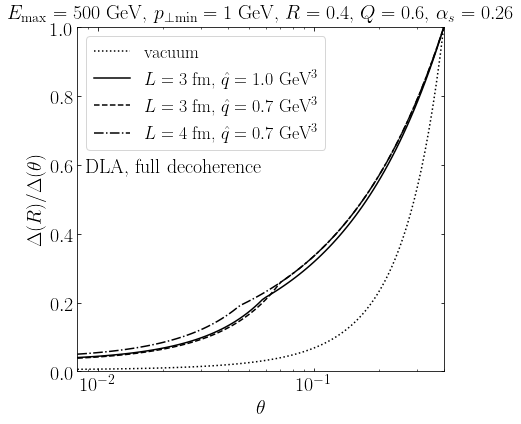

In [89]:
fig, ax = subplots()
figsize(7,6)

semilogx(Delta0.T[0], Delta0.T[1], 'k:', lw=1.5, label=r'vacuum')
semilogx(Delta1.T[0], Delta1.T[1], 'k-', lw=1.5, label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
semilogx(Delta2.T[0], Delta2.T[1], 'k--', lw=1.5, label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
semilogx(Delta2.T[0], Delta3.T[1], 'k-.', lw=1.5, label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')
xlim(4.*sqrt(pT2_min)/E_max, R)
ylim(0.,1.0)
ylabel(r'$\Delta(R)/\Delta(\theta)$', fontsize=20)
xlabel(r'$\theta$', fontsize=20)
title(r'$E_{\max}=500$ GeV, $p_{\perp\min}=1$ GeV, $R=0.4$, $Q=0.6$, $\alpha_s=0.26$', fontsize=20)
text(1.1*4.*sqrt(pT2_min)/E_max,0.58,r'DLA, full decoherence', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18, ncol=1,loc='upper left');
#savefig("medium/Sudakov_fulld.pdf", bbox_inches="tight")
tight_layout()
show()

In [326]:
E_max   = 500.
R       = 0.4
t_max   = (E_max*R)**2. 
pT2_min = 1.
punish  = 0.6

zcut = 0.1
beta = 0.0

Delta0 = array([[theta, Delta_vac(theta, R, sqrt(t_max)/R, sqrt(pT2_min), zcut, beta)] for theta in logspace(log10(4.*sqrt(pT2_min)/(sqrt(t_max)/R)), log10(R), 100)])
L       = 3.
qhat    = 1.0
Delta1 = array([[theta, Delta(theta, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, zcut, beta)] for theta in logspace(log10(4.*sqrt(pT2_min)/(sqrt(t_max)/R)), log10(R), 100)])
L       = 3.
qhat    = 0.7
Delta2 = array([[theta, Delta(theta, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, zcut, beta)] for theta in logspace(log10(4.*sqrt(pT2_min)/(sqrt(t_max)/R)), log10(R), 100)])
L       = 4.
qhat    = 0.7
Delta3 = array([[theta, Delta(theta, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, zcut, beta)] for theta in logspace(log10(4.*sqrt(pT2_min)/(sqrt(t_max)/R)), log10(R), 100)])

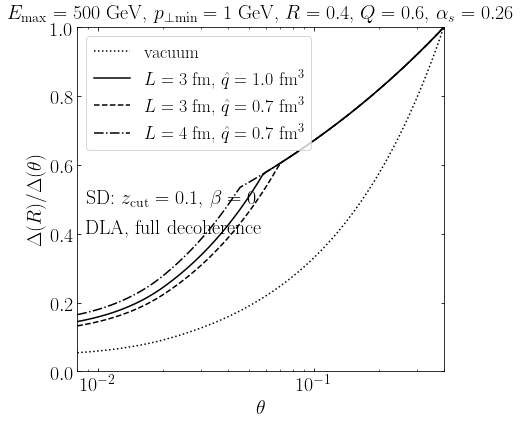

In [327]:
fig, ax = subplots()
figsize(7,6)

semilogx(Delta0.T[0], Delta0.T[1], 'k:', lw=1.5, label=r'vacuum')
semilogx(Delta1.T[0], Delta1.T[1], 'k-', lw=1.5, label=r'$L=3$ fm, $\hat q=1.0$ fm$^{3}$')
semilogx(Delta2.T[0], Delta2.T[1], 'k--', lw=1.5, label=r'$L=3$ fm, $\hat q=0.7$ fm$^{3}$')
semilogx(Delta2.T[0], Delta3.T[1], 'k-.', lw=1.5, label=r'$L=4$ fm, $\hat q=0.7$ fm$^{3}$')
xlim(4.*sqrt(pT2_min)/E_max, R)
ylim(0.,1.0)

ylabel(r'$\Delta(R)/\Delta(\theta)$', fontsize=20)
xlabel(r'$\theta$', fontsize=20)
title(r'$E_{\max}=500$ GeV, $p_{\perp\min}=1$ GeV, $R=0.4$, $Q=0.6$, $\alpha_s=0.26$', fontsize=20)
text(1.1*4.*sqrt(pT2_min)/E_max,0.48,r'SD: $z_{\rm cut}=0.1$, $\beta=0$', fontsize=20)
text(1.1*4.*sqrt(pT2_min)/E_max,0.4,r'DLA, full decoherence', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18, ncol=1,loc='upper left');
#savefig("medium/Sudakov_fulld.pdf", bbox_inches="tight")
tight_layout()
show()

In [12]:
E_max   = 500.
R       = 0.4
t_max   = (E_max*R)**2. 
pT2_min = 1.
punish  = 0.6

zcut = 0.0
beta = 0.0

Nem_vac = array([[n, PN_pt_t_R_cut_vac(n, R, sqrt(t_max)/R, sqrt(pT2_min))] for n in linspace(0,15,16)])
L       = 3.
qhat    = 1.0
Nem1 = array([[n, PN_pt_t_R_cut(n, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish)] for n in linspace(0,15,16)])
L       = 3.
qhat    = 0.7
Nem2 = array([[n, PN_pt_t_R_cut(n, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish)] for n in linspace(0,15,16)])
L       = 4.
qhat    = 0.7
Nem3 = array([[n, PN_pt_t_R_cut(n, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish)] for n in linspace(0,15,16)])

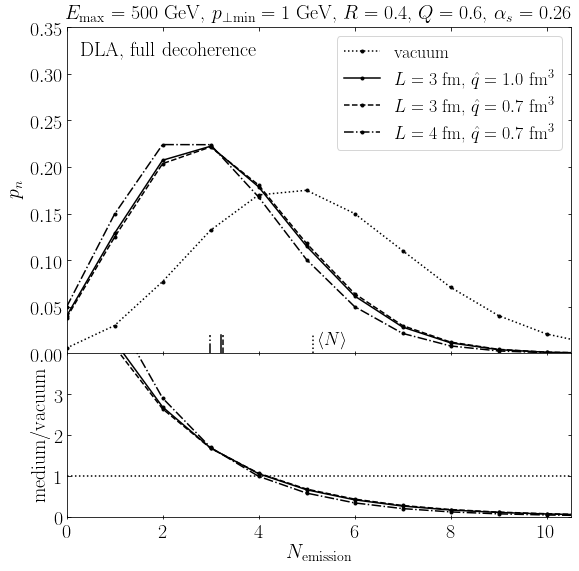

In [131]:
f = figure( figsize=(7,9) )
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0, right=1, wspace=0.0)
f.add_axes([0.2,0.175,0.75,0.75])
f.clf()
ax1 = plt.subplot(gs1[:-1, :])
title(r'$E_{\max}=500$ GeV, $p_{\perp\min}=1$ GeV, $R=0.4$, $Q=0.6$, $\alpha_s=0.26$', fontsize=20)

ax2 = plt.subplot(gs1[-1, :])
ax1.xaxis.set_major_formatter( NullFormatter() )
f.subplots_adjust(wspace=0,hspace=0)

ax1.plot(Nem_vac.T[0], Nem_vac.T[1], 'k:o', lw=1.5, markersize=3, label=r'vacuum')
ax1.plot(Nem1.T[0], Nem1.T[1], 'k-o', lw=1.5, markersize=3, label=r'$L=3$ fm, $\hat q=1.0$ fm$^{3}$')
ax1.plot(Nem2.T[0], Nem2.T[1], 'k--o', lw=1.5, markersize=3, label=r'$L=3$ fm, $\hat q=0.7$ fm$^{3}$')
ax1.plot(Nem3.T[0], Nem3.T[1], 'k-.o', lw=1.5, markersize=3, label=r'$L=4$ fm, $\hat q=0.7$ fm$^{3}$')

ax1.plot([sum(Nem_vac.T[0]*Nem_vac.T[1]),sum(Nem_vac.T[0]*Nem_vac.T[1])], [0, 0.02], 'k:', lw=1.5)
ax1.plot([sum(Nem1.T[0]*Nem1.T[1]),sum(Nem1.T[0]*Nem1.T[1])], [0, 0.02], 'k-', lw=1.5)
ax1.plot([sum(Nem2.T[0]*Nem2.T[1]),sum(Nem2.T[0]*Nem2.T[1])], [0, 0.02], 'k--', lw=1.5)
ax1.plot([sum(Nem3.T[0]*Nem3.T[1]),sum(Nem3.T[0]*Nem3.T[1])], [0, 0.02], 'k-.', lw=1.5)
ax1.text(1.02*sum(Nem_vac.T[0]*Nem_vac.T[1]), 0.01, r'$\langle N\rangle$', fontsize=18)

ax2.plot(Nem1.T[0], Nem1.T[1]/Nem_vac.T[1], 'k-o', lw=1.5, markersize=3)
ax2.plot(Nem2.T[0], Nem2.T[1]/Nem_vac.T[1], 'k--o', lw=1.5, markersize=3)
ax2.plot(Nem3.T[0], Nem3.T[1]/Nem_vac.T[1], 'k-.o', lw=1.5, markersize=3)
ax2.plot([0,12],[1,1],':', color='k')

ax1.text(0.3,0.32,r'DLA, full decoherence', fontsize=20)
ax1.set_xlim(0.,10.5)
ax1.set_ylim(0,0.35)
ax1.tick_params(which='both', left=True, direction='in', right=True, top=True, bottom=False, labelsize=20)
ax2.set_xlim(0.,10.5)
ax2.set_ylim(0.,4.)
ax2.tick_params(axis='x', top=True, bottom=True, direction='inout', labelsize=20)
ax2.tick_params(axis='y', right=True, direction='in', labelsize=20)
ax2.set_yticks([0,1,2,3])
ax2.set_xlabel(r'$N_{\rm emission}$', fontsize=20)
ax1.set_ylabel(r'$p_n$', fontsize=20)
ax2.set_ylabel(r'medium/vacuum', fontsize=20)
ax1.legend(fontsize=18,ncol=1,loc='upper right')
savefig('medium/N_emission_DLA_medium_full_ratio.pdf', format='pdf',bbox_inches='tight')
show()

In [330]:
E_max   = 500.
R       = 0.4
t_max   = (E_max*R)**2. 
pT2_min = 1.
punish  = 0.6

zcut = 0.1
beta = 0.0

Nem_vac = array([[n, PN_pt_t_R_cut_vac(n, R, sqrt(t_max)/R, sqrt(pT2_min), zcut, beta)] for n in linspace(0,15,16)])
L       = 3.
qhat    = 1.0
Nem1 = array([[n, PN_pt_t_R_cut(n, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, zcut, beta)] for n in linspace(0,15,16)])
L       = 3.
qhat    = 0.7
Nem2 = array([[n, PN_pt_t_R_cut(n, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, zcut, beta)] for n in linspace(0,15,16)])
L       = 4.
qhat    = 0.7
Nem3 = array([[n, PN_pt_t_R_cut(n, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, zcut, beta)] for n in linspace(0,15,16)])

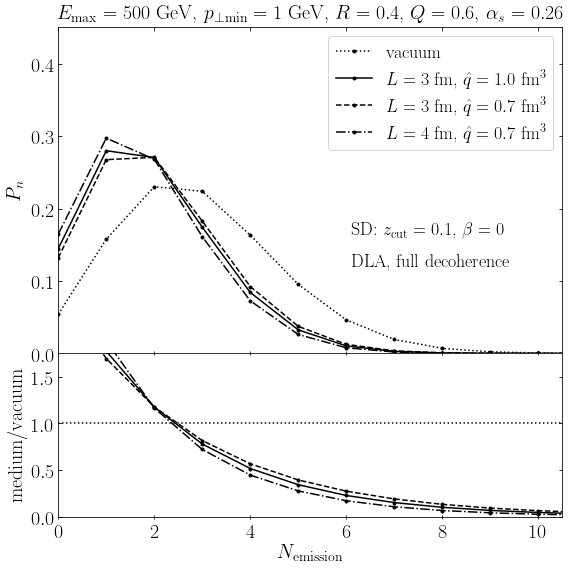

In [331]:
f = figure( figsize=(7,9) )
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0, right=1, wspace=0.0)
f.add_axes([0.2,0.175,0.75,0.75])
f.clf()
ax1 = plt.subplot(gs1[:-1, :])
title(r'$E_{\max}=500$ GeV, $p_{\perp\min}=1$ GeV, $R=0.4$, $Q=0.6$, $\alpha_s=0.26$', fontsize=20)

ax2 = plt.subplot(gs1[-1, :])
ax1.xaxis.set_major_formatter( NullFormatter() )
f.subplots_adjust(wspace=0,hspace=0)

ax1.plot(Nem_vac.T[0], Nem_vac.T[1], 'k:o', lw=1.5, markersize=3, label=r'vacuum')
ax1.plot(Nem1.T[0], Nem1.T[1], 'k-o', lw=1.5, markersize=3, label=r'$L=3$ fm, $\hat q=1.0$ fm$^{3}$')
ax1.plot(Nem2.T[0], Nem2.T[1], 'k--o', lw=1.5, markersize=3, label=r'$L=3$ fm, $\hat q=0.7$ fm$^{3}$')
ax1.plot(Nem3.T[0], Nem3.T[1], 'k-.o', lw=1.5, markersize=3, label=r'$L=4$ fm, $\hat q=0.7$ fm$^{3}$')

ax2.plot(Nem1.T[0], Nem1.T[1]/Nem_vac.T[1], 'k-o', lw=1.5, markersize=3)
ax2.plot(Nem2.T[0], Nem2.T[1]/Nem_vac.T[1], 'k--o', lw=1.5, markersize=3)
ax2.plot(Nem3.T[0], Nem3.T[1]/Nem_vac.T[1], 'k-.o', lw=1.5, markersize=3)
ax2.plot([0,12],[1,1],':', color='k')

ax1.text(6.1,0.16,r'SD: $z_{\rm cut}=0.1$, $\beta=0$', fontsize=18)
ax1.text(6.1,0.12,r'DLA, full decoherence', fontsize=18)
ax1.set_xlim(0.,10.5)
ax1.set_ylim(0,0.45)
ax1.tick_params(which='both', left=True, direction='in', right=True, top=True, bottom=False, labelsize=20)
ax2.set_xlim(0.,10.5)
ax2.set_ylim(0.,1.75)
ax2.tick_params(axis='x', top=True, bottom=True, direction='inout', labelsize=20)
ax2.tick_params(axis='y', right=True, direction='in', labelsize=20)
ax2.set_yticks([0,0.5,1,1.5])
ax2.set_xlabel(r'$N_{\rm emission}$', fontsize=20)
ax1.set_ylabel(r'$P_n$', fontsize=20)
ax2.set_ylabel(r'medium/vacuum', fontsize=20)
ax1.legend(fontsize=18,ncol=1,loc='upper right')
savefig('medium/N_emission_DLA_SD0_medium_full_ratio.pdf', format='pdf',bbox_inches='tight')
show()

In [369]:
E_max   = 500.
R       = 0.4
t_max   = (E_max*R)**2. 
pT2_min = 1.
punish  = 0.6

zcut = 0.0
beta = 0.0

P_rg0 = array([[rg, P_rg_vac(rg, R, sqrt(t_max)/R, sqrt(pT2_min), zcut, beta)] for rg in logspace(log10(4.*sqrt(pT2_min/t_max)*R), log10(R), 50)])
a0 = integrate.quad(lambda rg: P_rg_vac(rg, R, sqrt(t_max)/R, sqrt(pT2_min), zcut, beta), 4.*sqrt(pT2_min/t_max)*R, R)[0]
L = 3.
qhat= 1.0
P_rg1 = array([[rg, P_rg(rg, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, zcut, beta)] for rg in logspace(log10(4.*sqrt(pT2_min/t_max)*R), log10(R), 50)])
a1 = integrate.quad(lambda rg: P_rg(rg, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, zcut, beta), 4.*sqrt(pT2_min/t_max)*R, R)[0]
L = 3.
qhat= 0.7
P_rg2 = array([[rg, P_rg(rg, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, zcut, beta)] for rg in logspace(log10(4.*sqrt(pT2_min/t_max)*R), log10(R), 50)])
a2 = integrate.quad(lambda rg: P_rg(rg, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, zcut, beta), 4.*sqrt(pT2_min/t_max)*R, R)[0]
L = 4.
qhat= 0.7
P_rg3 = array([[rg, P_rg(rg, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, zcut, beta)] for rg in logspace(log10(4.*sqrt(pT2_min/t_max)*R), log10(R), 50)])
a3 = integrate.quad(lambda rg: P_rg(rg, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, zcut, beta), 4.*sqrt(pT2_min/t_max)*R, R)[0]

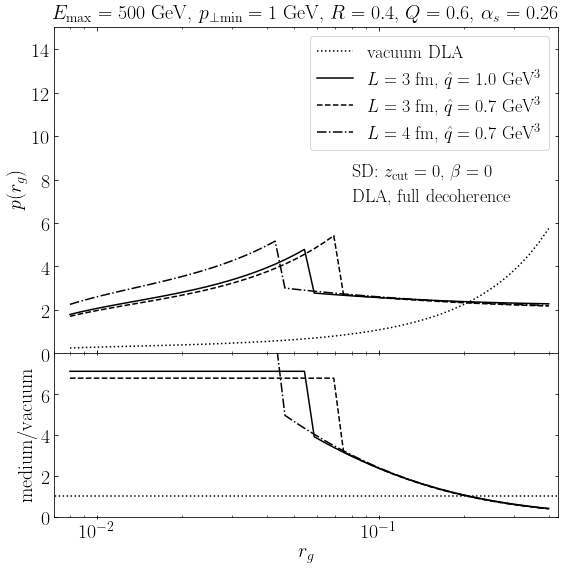

In [370]:
f = figure( figsize=(7,9) )
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0, right=1, wspace=0.0)
f.add_axes([0.2,0.175,0.75,0.75])
f.clf()
ax1 = plt.subplot(gs1[:-1, :])
title(r'$E_{\max}=500$ GeV, $p_{\perp\min}=1$ GeV, $R=0.4$, $Q=0.6$, $\alpha_s=0.26$', fontsize=20)
ax2 = plt.subplot(gs1[-1, :])
ax1.xaxis.set_major_formatter( NullFormatter() )
f.subplots_adjust(wspace=0,hspace=0)

ax1.plot(P_rg0.T[0], P_rg0.T[1]/a0, 'k:', lw=1.5, markersize=3, label=r'vacuum DLA')
ax1.plot(P_rg1.T[0], P_rg1.T[1]/a1, 'k-', lw=1.5, markersize=3, label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
ax1.plot(P_rg2.T[0], P_rg2.T[1]/a2, 'k--', lw=1.5, markersize=3, label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
ax1.plot(P_rg3.T[0], P_rg3.T[1]/a3, 'k-.', lw=1.5, markersize=3, label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')
ax2.plot(P_rg0.T[0], P_rg1.T[1]/a1/P_rg0.T[1]*a0, 'k-', lw=1.5, markersize=3)
ax2.plot(P_rg1.T[0], P_rg2.T[1]/a2/P_rg0.T[1]*a0, 'k--', lw=1.5, markersize=3)
ax2.plot(P_rg1.T[0], P_rg3.T[1]/a3/P_rg0.T[1]*a0, 'k-.', lw=1.5, markersize=3)
ax2.plot([0,12],[1,1],':', color='k')

ax1.text(0.08,8,r'SD: $z_{\rm cut}=0$, $\beta=0$', fontsize=18)
ax1.text(0.08,7,r'DLA, full decoherence', fontsize=18)
ax1.set_xscale('log')
ax1.set_xlim(0.007,0.43)
ax1.set_ylim(0,15)
ax1.tick_params(which='both', left=True, direction='in', right=True, top=True, labelsize=20)
ax2.set_xscale('log')
ax2.set_xlim(0.007,0.43)
ax2.set_ylim(0.25,8)
ax2.tick_params(axis='x', which='both', top=True, direction='inout', labelsize=20)
ax2.tick_params(axis='x', which='minor', direction='in', labelsize=20)
ax2.tick_params(axis='y', right=True, direction='in', labelsize=20)
ax2.set_yticks([0,2,4,6])
ax2.set_xlabel(r'$r_g$', fontsize=20)
ax1.set_ylabel(r'$p(r_g)$', fontsize=20)
ax2.set_ylabel(r'medium/vacuum', fontsize=20)
ax1.legend(fontsize=18,ncol=1,loc='upper right')
#savefig("medium/N_thetag_DLA_medium_full_ratio.pdf", bbox_inches="tight")
show()

In [367]:
E_max   = 500.
R       = 0.4
t_max   = (E_max*R)**2. 
pT2_min = 1.
punish  = 0.6

zcut = 0.1
beta = 0.0

P_rg0 = array([[rg, P_rg_vac(rg, R, sqrt(t_max)/R, sqrt(pT2_min), zcut, beta)] for rg in logspace(log10(4.*sqrt(pT2_min/t_max)*R), log10(R), 100)])
a0 = integrate.quad(lambda rg: P_rg_vac(rg, R, sqrt(t_max)/R, sqrt(pT2_min), zcut, beta), 4.*sqrt(pT2_min/t_max)*R, R)[0]
L = 3.
qhat= 1.0
P_rg1 = array([[rg, P_rg(rg, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, zcut, beta)] for rg in logspace(log10(4.*sqrt(pT2_min/t_max)*R), log10(R), 100)])
a1 = integrate.quad(lambda rg: P_rg(rg, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, zcut, beta), 4.*sqrt(pT2_min/t_max)*R, R)[0]
L = 3.
qhat= 0.7
P_rg2 = array([[rg, P_rg(rg, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, zcut, beta)] for rg in logspace(log10(4.*sqrt(pT2_min/t_max)*R), log10(R), 100)])
a2 = integrate.quad(lambda rg: P_rg(rg, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, zcut, beta), 4.*sqrt(pT2_min/t_max)*R, R)[0]
L = 4.
qhat= 0.7
P_rg3 = array([[rg, P_rg(rg, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, zcut, beta)] for rg in logspace(log10(4.*sqrt(pT2_min/t_max)*R), log10(R), 100)])
a3 = integrate.quad(lambda rg: P_rg(rg, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, zcut, beta), 4.*sqrt(pT2_min/t_max)*R, R)[0]

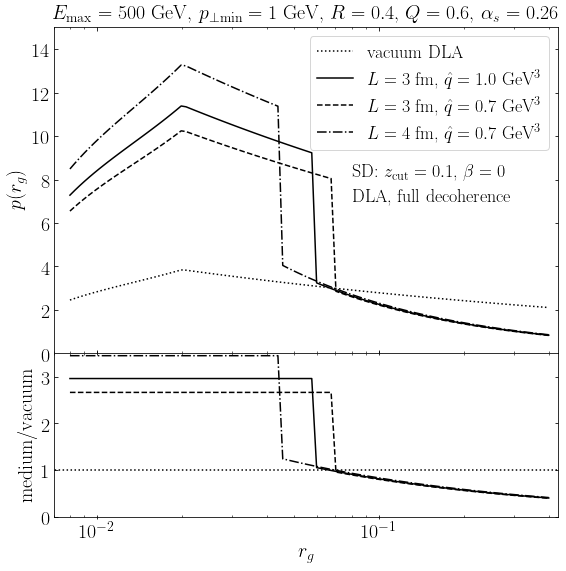

In [368]:
f = figure( figsize=(7,9) )
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0, right=1, wspace=0.0)
f.add_axes([0.2,0.175,0.75,0.75])
f.clf()
ax1 = plt.subplot(gs1[:-1, :])
title(r'$E_{\max}=500$ GeV, $p_{\perp\min}=1$ GeV, $R=0.4$, $Q=0.6$, $\alpha_s=0.26$', fontsize=20)
ax2 = plt.subplot(gs1[-1, :])
ax1.xaxis.set_major_formatter( NullFormatter() )
f.subplots_adjust(wspace=0,hspace=0)

ax1.plot(P_rg0.T[0], P_rg0.T[1]/a0, 'k:', lw=1.5, markersize=3, label=r'vacuum DLA')
ax1.plot(P_rg1.T[0], P_rg1.T[1]/a1, 'k-', lw=1.5, markersize=3, label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
ax1.plot(P_rg2.T[0], P_rg2.T[1]/a2, 'k--', lw=1.5, markersize=3, label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
ax1.plot(P_rg3.T[0], P_rg3.T[1]/a3, 'k-.', lw=1.5, markersize=3, label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')
ax2.plot(P_rg0.T[0], P_rg1.T[1]/a1/P_rg0.T[1]*a0, 'k-', lw=1.5, markersize=3)
ax2.plot(P_rg1.T[0], P_rg2.T[1]/a2/P_rg0.T[1]*a0, 'k--', lw=1.5, markersize=3)
ax2.plot(P_rg1.T[0], P_rg3.T[1]/a3/P_rg0.T[1]*a0, 'k-.', lw=1.5, markersize=3)
ax2.plot([0,12],[1,1],':', color='k')

ax1.text(0.08,8,r'SD: $z_{\rm cut}=0.1$, $\beta=0$', fontsize=18)
ax1.text(0.08,7,r'DLA, full decoherence', fontsize=18)
ax1.set_xscale('log')
ax1.set_xlim(0.007,0.43)
ax1.set_ylim(0,15)
ax1.tick_params(which='both', left=True, direction='in', right=True, top=True, labelsize=20)
ax2.set_xscale('log')
ax2.set_xlim(0.007,0.43)
ax2.set_ylim(0.25,3.5)
ax2.tick_params(axis='x', which='both', top=True, direction='inout', labelsize=20)
ax2.tick_params(axis='x', which='minor', direction='in', labelsize=20)
ax2.tick_params(axis='y', right=True, direction='in', labelsize=20)
ax2.set_yticks([0,1,2,3])
ax2.set_xlabel(r'$r_g$', fontsize=20)
ax1.set_ylabel(r'$p(r_g)$', fontsize=20)
ax2.set_ylabel(r'medium/vacuum', fontsize=20)
ax1.legend(fontsize=18,ncol=1,loc='upper right')
savefig("medium/N_thetag_DLA_medium_full_ratio.pdf", bbox_inches="tight")
show()

In [10]:
E_max   = 500.
R       = 0.4
t_max   = (E_max*R)**2. 
pT2_min = 1.
punish  = 0.6

zcut = 0.1
beta = 0.0

P_zg0 = array([[zg, P_zg_vac(zg, R, sqrt(t_max)/R, sqrt(pT2_min), zcut, beta)] for zg in linspace(max(sqrt(pT2_min/t_max)*R, zcut), 0.5, 100)])
a0 = integrate.quad(lambda zg: P_zg_vac(zg, R, sqrt(t_max)/R, sqrt(pT2_min), zcut, beta), max(sqrt(pT2_min/t_max)*R, zcut), 0.5)[0]
L = 3.
qhat= 1.0
P_zg1 = array([[zg, P_zg(zg, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, zcut, beta)] for zg in linspace(max(sqrt(pT2_min/t_max), zcut),0.5,100)])
a1 = integrate.quad(lambda zg: P_zg(zg, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L,  punish, zcut, beta), max(sqrt(pT2_min/t_max)*R, zcut), 0.5)[0]
L = 3.
qhat= 0.7
P_zg2 = array([[zg, P_zg(zg, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, zcut, beta)] for zg in linspace(max(sqrt(pT2_min/t_max), zcut),0.5,100)])
a2 = integrate.quad(lambda zg: P_zg(zg, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, zcut, beta), max(sqrt(pT2_min/t_max)*R, zcut), 0.5)[0]
L = 4.
qhat= 0.7
P_zg3 = array([[zg, P_zg(zg, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, zcut, beta)] for zg in linspace(max(sqrt(pT2_min/t_max), zcut),0.5,100)])
a3 = integrate.quad(lambda zg: P_zg(zg, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L,  punish, zcut, beta), max(sqrt(pT2_min/t_max)*R, zcut), 0.5)[0]

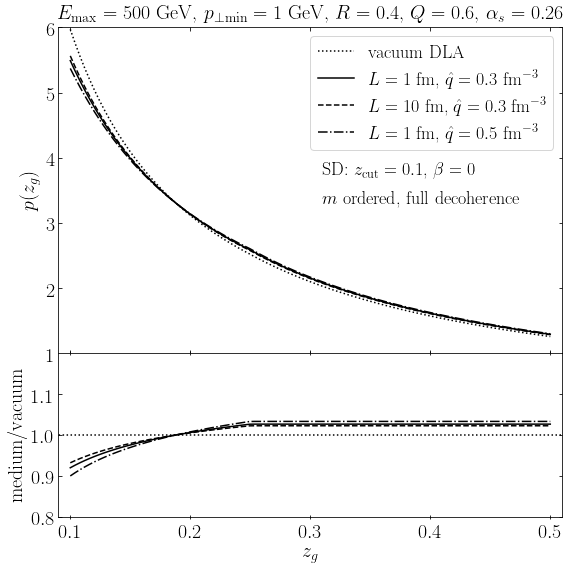

In [11]:
f = figure( figsize=(7,9) )
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0, right=1, wspace=0.0)
f.add_axes([0.2,0.175,0.75,0.75])
f.clf()
ax1 = plt.subplot(gs1[:-1, :])
title(r'$E_{\max}=500$ GeV, $p_{\perp\min}=1$ GeV, $R=0.4$, $Q=0.6$, $\alpha_s=0.26$', fontsize=20)

ax2 = plt.subplot(gs1[-1, :])
ax1.xaxis.set_major_formatter( NullFormatter() )
f.subplots_adjust(wspace=0,hspace=0)

ax1.plot(P_zg0.T[0], P_zg0.T[1]/a0, 'k:', lw=1.5, markersize=3, label=r'vacuum DLA')
ax1.plot(P_zg1.T[0], P_zg1.T[1]/a1, 'k-', lw=1.5, markersize=3, label=r'$L=1$ fm, $\hat q=0.3$ fm$^{-3}$')
ax1.plot(P_zg2.T[0], P_zg2.T[1]/a2, 'k--', lw=1.5, markersize=3, label=r'$L=10$ fm, $\hat q=0.3$ fm$^{-3}$')
ax1.plot(P_zg3.T[0], P_zg3.T[1]/a3, 'k-.', lw=1.5, markersize=3, label=r'$L=1$ fm, $\hat q=0.5$ fm$^{-3}$')

ax2.plot(P_zg1.T[0], P_zg1.T[1]/a1/P_zg0.T[1]*a0, 'k-', lw=1.5, markersize=3)
ax2.plot(P_zg2.T[0], P_zg2.T[1]/a2/P_zg0.T[1]*a0, 'k--', lw=1.5, markersize=3)
ax2.plot(P_zg3.T[0], P_zg3.T[1]/a3/P_zg0.T[1]*a0, 'k-.', lw=1.5, markersize=3)
ax2.plot([0,12],[1,1],':', color='k')

ax1.text(0.31,3.7,r'SD: $z_{\rm cut}=0.1$, $\beta=0$', fontsize=18)
ax1.text(0.31,3.3,r'$m$ ordered, full decoherence', fontsize=18)
ax1.set_xlim(0.09,0.51)
ax1.set_ylim(1,6)
ax1.tick_params(which='both', left=True, direction='in', right=True, top=True, labelsize=20)
ax2.set_xlim(0.09,0.51)
ax2.set_ylim(0.8,1.2)
ax2.tick_params(axis='x', which='both', top=True, direction='inout', labelsize=20)
ax2.tick_params(axis='x', which='minor', direction='in', labelsize=20)
ax2.tick_params(axis='y', right=True, direction='in', labelsize=20)
ax2.set_yticks([0.8, 0.9, 1, 1.1])
ax2.set_xlabel(r'$z_g$', fontsize=20)
ax1.set_ylabel(r'$p(z_g)$', fontsize=20)
ax2.set_ylabel(r'medium/vacuum', fontsize=20)
ax1.legend(fontsize=18,ncol=1,loc='upper right')
savefig("medium/N_zg_DLA_medium_full_ratio.pdf", bbox_inches="tight")
show()

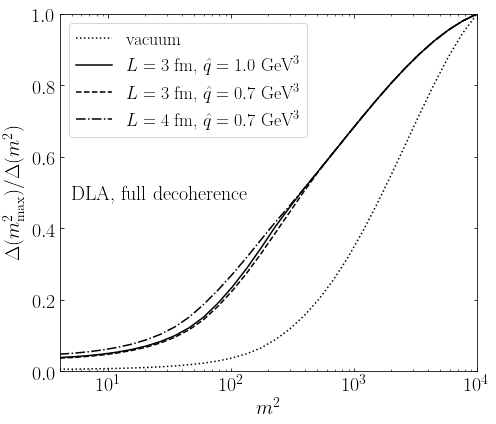

In [90]:
E_max   = 500.
R       = 0.4
t_max   = (E_max*R)**2. 
pT2_min = 1.
punish  = 0.6

zcut = 0.0
beta = 0.0

Delta_m0 = array([[m2, Delta_m_vac(m2, R, sqrt(t_max)/R, sqrt(pT2_min), 0.0, 0.)] for m2 in logspace(log10(4.*pT2_min), log10(t_max/4.), 30)])
L       = 3.
qhat    = 1.0
Delta_m1 = array([[m2, Delta_m(m2, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, 0.0, 0.)] for m2 in logspace(log10(4.*pT2_min), log10(t_max/4.), 30)])
L       = 3.
qhat    = 0.7
Delta_m2 = array([[m2, Delta_m(m2, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, 0.0, 0.)] for m2 in logspace(log10(4.*pT2_min), log10(t_max/4.), 30)])
L       = 4.
qhat    = 0.7
Delta_m3 = array([[m2, Delta_m(m2, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, 0.0, 0.)] for m2 in logspace(log10(4.*pT2_min), log10(t_max/4.), 30)])
fig, ax = subplots()
figsize(7,6)

semilogx(Delta_m0.T[0], Delta_m0.T[1], 'k:', lw=1.5, label=r'vacuum')
semilogx(Delta_m1.T[0], Delta_m1.T[1], 'k-', lw=1.5, label=r'$L=3$ fm, $\hat q=1.0$ GeV$^3$')
semilogx(Delta_m2.T[0], Delta_m2.T[1], 'k--', lw=1.5, label=r'$L=3$ fm, $\hat q=0.7$ GeV$^3$')
semilogx(Delta_m3.T[0], Delta_m3.T[1], 'k-.', lw=1.5, label=r'$L=4$ fm, $\hat q=0.7$ GeV$^3$')
xlim(4.*pT2_min, t_max/4.)
ylim(0.,1.0)
ylabel(r'$\Delta(m^2_{\rm max})/\Delta(m^2)$', fontsize=20)
xlabel(r'$m^2$', fontsize=20)
#title(r'$m_{\max}=100$ GeV, $p_{\perp\min}=1$ GeV, $R=1$, $Q=0.5$', fontsize=20)
text(5,0.48,r'DLA, full decoherence', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18, ncol=1,loc='upper left');
#savefig("medium/Sudakov_fulld.pdf", bbox_inches="tight")
tight_layout()
show()

In [91]:
E_max   = 500.
R       = 0.4
t_max   = (E_max*R)**2. 
pT2_min = 1.
punish  = 0.6

zcut = 0.0
beta = 0.0

P_m0 = array([[i, P_m_vac(i, R, sqrt(t_max)/R, sqrt(pT2_min), zcut, beta)] for i in logspace(log10(4.*pT2_min), log10(t_max/4.), 100)])
a0   = integrate.quad(lambda t: P_m_vac(t, R, sqrt(t_max)/R, sqrt(pT2_min), zcut, beta), 4.*pT2_min, t_max/4.)[0]
L       = 3.
qhat    = 1.0
P_m1 = array([[m2, P_m(m2, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, 0.0, 0.)] for m2 in logspace(log10(4.*pT2_min), log10(t_max/4.), 100)])
a1   = integrate.quad(lambda t: P_m(t, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, zcut, beta), 4.*pT2_min, t_max/4.)[0]
L       = 3.
qhat    = 0.7
P_m2 = array([[m2, P_m(m2, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, 0.0, 0.)] for m2 in logspace(log10(4.*pT2_min), log10(t_max/4.), 100)])
a2   = integrate.quad(lambda t: P_m(t, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, zcut, beta), 4.*pT2_min, t_max/4.)[0]
L       = 4.
qhat    = 0.7
P_m3 = array([[m2, P_m(m2, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, 0.0, 0.)] for m2 in logspace(log10(4.*pT2_min), log10(t_max/4.), 100)])
a3   = integrate.quad(lambda t: P_m(t, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish, zcut, beta), 4.*pT2_min, t_max/4.)[0]

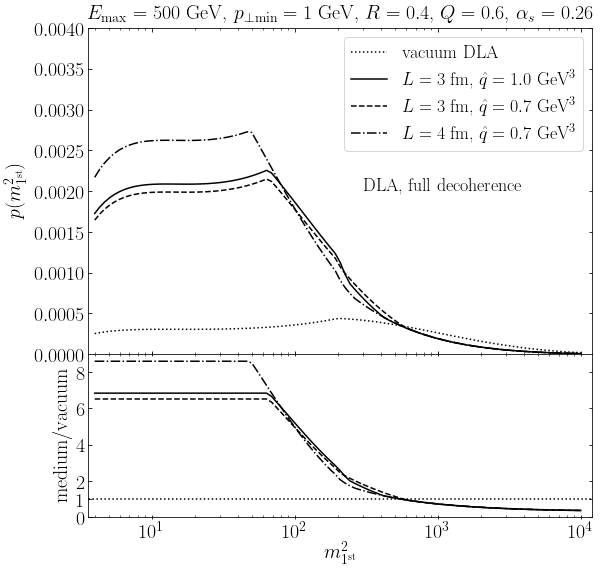

In [92]:
f = figure( figsize=(7,9) )
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0, right=1, wspace=0.0)
f.add_axes([0.2,0.175,0.75,0.75])
f.clf()
ax1 = plt.subplot(gs1[:-1, :])
title(r'$E_{\max}=500$ GeV, $p_{\perp\min}=1$ GeV, $R=0.4$, $Q=0.6$, $\alpha_s=0.26$', fontsize=20)

ax2 = plt.subplot(gs1[-1, :])
ax1.xaxis.set_major_formatter( NullFormatter() )
f.subplots_adjust(wspace=0,hspace=0)

ax1.plot(P_m0.T[0], P_m0.T[1]/a0, 'k:', lw=1.5, markersize=3, label=r'vacuum DLA')
ax1.plot(P_m1.T[0], P_m1.T[1]/a1, 'k-', lw=1.5, markersize=3, label=r'$L=3$ fm, $\hat q=1.0$ GeV$^3$')
ax1.plot(P_m2.T[0], P_m2.T[1]/a2, 'k--', lw=1.5, markersize=3, label=r'$L=3$ fm, $\hat q=0.7$ GeV$^3$')
ax1.plot(P_m3.T[0], P_m3.T[1]/a3, 'k-.', lw=1.5, markersize=3, label=r'$L=4$ fm, $\hat q=0.7$ GeV$^3$')

#ax1.plot(dPperdt_m_Rcut.T[0], dPperdt_m_Rcut.T[1], 'k:', lw=1.5, markersize=3, label=r'vacuum DLA')

ax2.plot(P_m1.T[0], P_m1.T[1]/a1/P_m0.T[1]*a0, 'k-', lw=1.5, markersize=3, label=r'$L=3$ fm, $\hat q=1.0$ GeV$^3$')
ax2.plot(P_m2.T[0], P_m2.T[1]/a2/P_m0.T[1]*a0, 'k--', lw=1.5, markersize=3, label=r'$L=3$ fm, $\hat q=0.7$ GeV$^3$')
ax2.plot(P_m3.T[0], P_m3.T[1]/a3/P_m0.T[1]*a0, 'k-.', lw=1.5, markersize=3, label=r'$L=4$ fm, $\hat q=0.7$ GeV$^3$')
ax2.plot([1,t_max],[1,1],':', color='k')

ax1.text(3e2,0.002,r'DLA, full decoherence', fontsize=18)
ax1.set_xscale('log')
ax1.set_xlim(0.9*4.*pT2_min, 1.2*t_max/4.)
ax1.set_ylim(0,0.004)
ax1.tick_params(which='both', left=True, direction='in', right=True, top=True, labelsize=20)
ax2.set_xscale('log')
ax2.set_xlim(0.9*4.*pT2_min, 1.2*t_max/4.)
ax2.set_ylim(0.25,9.)
ax2.tick_params(axis='x', which='both', top=True, direction='inout', labelsize=20)
ax2.tick_params(axis='x', which='minor', direction='in', labelsize=20)
ax2.tick_params(axis='y', right=True, direction='in', labelsize=20)
ax2.set_yticks([0,1,2,4,6,8])
ax2.set_xlabel(r'$m^2_{1^{\rm st}}$', fontsize=20)
ax1.set_ylabel(r'$p(m^2_{1^{\rm st}})$', fontsize=20)
ax2.set_ylabel(r'medium/vacuum', fontsize=20)
ax1.legend(fontsize=18,ncol=1,loc='upper right')
savefig("medium/N_first_DLA_medium_full_ratio.pdf", bbox_inches="tight")
show()

#### Forbid jump-back

In [131]:
def z_d(theta, E, qhat):
    if (theta < (8*qhat**(1./3.)/E)**(3./4.)): return print("Adam err: theta too low!")
    return 0.5 * (1. - sqrt(1. - 8. * qhat**(1./3.) / E / theta**(4./3.)))
def z_pt(theta, E, ptmin):
    if (theta < 4.*ptmin/E): return print("Adam err: theta too low!")
    return 0.5 * (1. - sqrt(1. - 4. * ptmin / E / theta))

def int_in_full(R, E, qhat, Linfm):
    LinGeV = Linfm / 0.197
    theta_d = (qhat*LinGeV**3)**(-0.5)
    if (R > theta_d): return integrate.quad(lambda theta: 1./theta * integrate.quad(lambda z: alpha_s((z*(1.-z)*E*theta)**2) / pi * P_gg(z), z_d(theta, E, qhat), 0.5)[0], theta_d, R)[0]
    else: return 0.
def int_in(R, E, qhat, Linfm):
    LinGeV = Linfm / 0.197
    theta_d = 1./sqrt(qhat*LinGeV**3)
    theta_dmin = (8.*qhat**(1./3.)/E)**(3./4.)
    if (theta_d < theta_dmin): theta_d = theta_dmin
    if (R > theta_d): return  C*alphas/pi * 3./8. * ((log(4.*qhat**(1./3.)/(theta_d**(4./3.))))**2 - (log(4.*qhat**(1./3.)/(R**(4./3.))))**2)
    else: return 0.
def int_out_full(R, E, ptmin, qhat, Linfm):
    LinGeV = Linfm / 0.197
    theta_d = 1./sqrt(qhat*LinGeV**3)
    theta_min = 4.*ptmin/E
    alphas = 0.28
    C = 3.
    if (R > theta_d): return integrate.quad(lambda theta: 1./theta * integrate.quad(lambda z: alpha_s((z*(1.-z)*E*theta)**2) / pi * P_gg(z), z_pt(theta, E, ptmin), 0.5)[0], theta_min, theta_d)[0] + integrate.quad(lambda theta: 1./theta * integrate.quad(lambda z: alpha_s((z*(1.-z)*E*theta)**2) / pi * P_gg(z), z_pt(theta, E, ptmin), z_d(theta, E, qhat))[0], theta_d, R)[0]
    elif (theta_min < R and R < theta_d): return integrate.quad(lambda theta: 1./theta * integrate.quad(lambda z: alpha_s((z*(1.-z)*E*theta)**2) / pi * P_gg(z), z_pt(theta, E, ptmin), 0.5)[0], theta_min, R)[0]
    else: return 0.
def int_out(R, E, ptmin, qhat, Linfm):
    LinGeV = Linfm / 0.197
    theta_d = 1./sqrt(qhat*LinGeV**3)
    theta_dmin = (8.*qhat**(1./3.)/E)**(3./4.)
    if (theta_d < theta_dmin): theta_d = theta_dmin
    theta_min = 4.*ptmin/E
    if (R > theta_d): return C*alphas/pi * (-3./2.*(log(2.*qhat**(1./3.)*E/ptmin/(R**(1./3.))))**2 + 3./2.*(log(2.*qhat**(1./3.)*E/ptmin/(theta_d**(1./3.))))**2  + 0.5*(log(E*theta_d/2./ptmin)**2 - log(E*theta_min/2./ptmin)**2))
    elif (theta_min < R and R < theta_d): return C*alphas/2./pi * ((log(E*R/2./ptmin))**2 - (log(E*theta_min/2./ptmin))**2)
    else: return 0.
def Delta_tot_forbid(R, E, ptmin, qhat, Linfm, Q):
    LinGeV = Linfm / 0.197
    theta_d = 1./sqrt(qhat*LinGeV**3)
    theta_dmin = (8.*qhat**(1./3.)/E)**(3./4.)
    if (theta_d < theta_dmin): theta_d = theta_dmin
    theta_min = 4.*ptmin/E
    exp1 = exp(-Q*Q*int_in(R, E, qhat, Linfm))
    if (theta_min < R and R < theta_d): 
        return exp1 * (1. - integrate.quad(lambda theta: 1./theta * exp(int_in(theta, E, qhat, Linfm) - int_out(theta, E, ptmin, qhat, Linfm)) * alphas/pi * C * log(E*theta/2./ptmin), theta_min, R)[0])
    elif (theta_d < R): 
        return exp1 * (1. - integrate.quad(lambda theta: 1./theta * alphas/pi * C * log(E*theta/2./ptmin) * exp(int_in(theta, E, qhat, Linfm) - int_out(theta, E, ptmin, qhat, Linfm)), theta_min, theta_d)[0] - integrate.quad(lambda theta: 1./theta * alphas/pi * C * log(2.*qhat**(1./3.)/E/theta**(4./3.) / (ptmin/E/theta)) * exp(int_in(theta, E, qhat, Linfm) - int_out(theta, E, ptmin, qhat, Linfm)), theta_d, R)[0])
    else: return 0.
def Delta_forbid(theta, R, E, ptmin, qhat, Linfm, Q):
    return Delta_tot(R, E, ptmin, qhat, Linfm, Q) / Delta_tot(theta, E, ptmin, qhat, Linfm, Q)
def Delta_vac(theta, R, E, ptmin):
    theta_min = 4.*ptmin/E
    return exp(- alphas/pi * C/2. * (log(E*R/2./ptmin)**2 - log(E*theta/2./ptmin)**2))
    #return exp(- integrate.quad(lambda theta: 1./theta * integrate.quad(lambda z: alpha_s((z*(1.-z)*E*theta)**2)/pi*P_gg(z), z_pt(theta, E, ptmin), 0.5)[0], theta, R)[0])
def Delta():
    return exp(- )
def P_zg(zg, z_cut, beta, R, E, ptmin, qhat, Linfm, Q):
    theta_min = 4.*ptmin/E
    LinGeV = Linfm / 0.197
    theta_d = 1./sqrt(qhat*LinGeV**3)
    theta_dmin = (8.*qhat**(1./3.)/E)**(3./4.)
    if (theta_d < theta_dmin): theta_d = theta_dmin
    res = 0.
    if (beta==0):
        if (zg > z_cut): 
            if (R < theta_d): 
                res = integrate.quad(lambda theta: Delta(theta, R, E, ptmin, qhat, Linfm, Q)*P_gg(zg), theta_min, R)[0]
            else: 
                res = integrate.quad(lambda theta: Delta(theta, R, E, ptmin, qhat, Linfm, Q)*P_gg(zg), theta_min, theta_d)[0] + Q*Q * integrate.quad(lambda theta: Delta(theta, R, E, ptmin, qhat, Linfm, Q)*P_gg(zg), theta_d, R)[0]
    else:
        if (R*(zg/z_cut)**(1./beta) < theta_d): 
            res = integrate.quad(lambda theta: Delta(theta, R, E, ptmin, qhat, Linfm, Q)*P_gg(zg),  theta_min, R*(zg/z_cut)**(1./beta))[0]
        else: 
            res = integrate.quad(lambda theta: Delta(theta, R, E, ptmin, qhat, Linfm, Q)*P_gg(zg),  theta_min, theta_d)[0] + Q*Q * integrate.quad(lambda theta: Delta(theta, R, E, ptmin, qhat, Linfm, Q)*P_gg(zg),  theta_d, R*(zg/z_cut)**(1./beta))[0]
    return res
def P_zg_vac(zg, z_cut, beta, R, E, ptmin):
    theta_min = 4.*ptmin/E
    if (beta==0):
        if (zg > z_cut): return integrate.quad(lambda theta: Delta_vac(theta, R, E, ptmin)*P_gg(zg),  theta_min, R)[0]
    else:
        return integrate.quad(lambda theta: Delta_vac(theta, R, E, ptmin)*P_gg(zg),  theta_min, R*(zg/z_cut)**(1./beta))[0]

In [132]:
t_max   = 100.**2
pT2_min = 1.
R       = 1.
punish  = 0.5
L       = 0.5
qhat    = 0.3
area_in  = array([[theta, int_in(theta, sqrt(t_max)/R, qhat, L)] for theta in logspace(log10(4.*sqrt(pT2_min)/(sqrt(t_max)/R)), log10(R), 30)])
area_out = array([[theta, int_out(theta, sqrt(t_max)/R, sqrt(pT2_min), qhat, L)] for theta in logspace(log10(4.*sqrt(pT2_min)/(sqrt(t_max)/R)), log10(R), 30)])
area_in_full  = array([[theta, int_in_full(theta, sqrt(t_max)/R, qhat, L)] for theta in logspace(log10(4.*sqrt(pT2_min)/(sqrt(t_max)/R)), log10(R), 30)])
area_out_full = array([[theta, int_out_full(theta, sqrt(t_max)/R, sqrt(pT2_min), qhat, L)] for theta in logspace(log10(4.*sqrt(pT2_min)/(sqrt(t_max)/R)), log10(R), 30)])

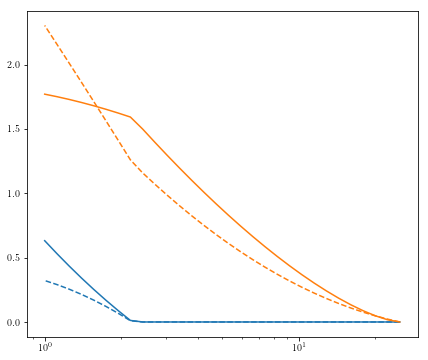

In [133]:
semilogx(1./area_in.T[0], area_in.T[1], 'C0--')
semilogx(1./area_out.T[0], area_out.T[1], 'C1--')
semilogx(1./area_in_full.T[0], area_in_full.T[1], 'C0')
semilogx(1./area_out_full.T[0], area_out_full.T[1], 'C1')

In [134]:
t_max   = 100.**2
pT2_min = 1.
R       = 1.
punish  = 0.5

Delta0 = array([[theta, Delta_vac(theta, R, sqrt(t_max)/R, sqrt(pT2_min))] for theta in logspace(log10(4.*sqrt(pT2_min)/(sqrt(t_max)/R)), log10(R), 30)])
L       = 1.
qhat    = 0.3
Delta1 = array([[theta, Delta(theta, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish)] for theta in logspace(log10(4.*sqrt(pT2_min)/(sqrt(t_max)/R)), log10(R), 30)])
L       = 10.
qhat    = 0.3
Delta2 = array([[theta, Delta(theta, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish)] for theta in logspace(log10(4.*sqrt(pT2_min)/(sqrt(t_max)/R)), log10(R), 30)])
L       = 1.
qhat    = 0.5
Delta3 = array([[theta, Delta(theta, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish)] for theta in logspace(log10(4.*sqrt(pT2_min)/(sqrt(t_max)/R)), log10(R), 30)])

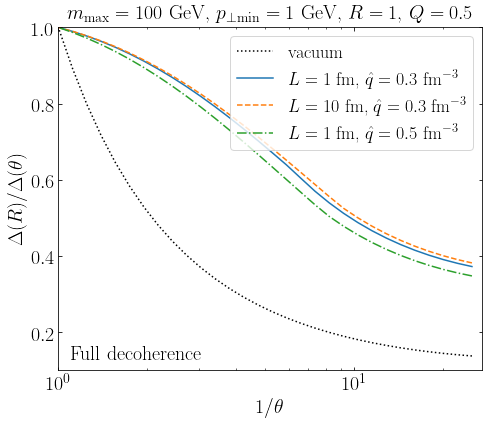

In [144]:
fig, ax = subplots()
figsize(7,6)

semilogx(1./Delta0.T[0], Delta0.T[1], 'k:', lw=1.5, label=r'vacuum')
semilogx(1./Delta1.T[0], Delta1.T[1], '-', lw=1.5, label=r'$L=1$ fm, $\hat q=0.3$ fm$^{-3}$')
semilogx(1./Delta2.T[0], Delta2.T[1], '--', lw=1.5, label=r'$L=10$ fm, $\hat q=0.3$ fm$^{-3}$')
semilogx(1./Delta2.T[0], Delta3.T[1], '-.', lw=1.5, label=r'$L=1$ fm, $\hat q=0.5$ fm$^{-3}$')
xlim(1./R,27)
ylim(0.1,1.0)
ylabel(r'$\Delta(R)/\Delta(\theta)$', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
title(r'$m_{\max}=100$ GeV, $p_{\perp\min}=1$ GeV, $R=1$, $Q=0.5$', fontsize=20)
text(1.1,0.13,r'Full decoherence', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18, ncol=1,loc='upper right');
#savefig("medium/Sudakov_fulld.pdf", bbox_inches="tight")
tight_layout()
show()

In [145]:
t_max   = 100.**2
pT2_min = 1.
R       = 1.
punish  = 0.5
z_cut = 0.1
beta = 0.0
zg0 = array([[z, P_zg_vac(z, z_cut, beta, R, sqrt(t_max)/R, sqrt(pT2_min))] for z in linspace(z_cut, 0.5, 30)])
L=1.
qhat=0.3
zg1 = array([[z, P_zg(z, z_cut, beta, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish)] for z in linspace(z_cut, 0.5, 30)])
L=10.
qhat=0.3
zg2 = array([[z, P_zg(z, z_cut, beta, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish)] for z in linspace(z_cut, 0.5, 30)])
L=1.
qhat=0.5
zg3 = array([[z, P_zg(z, z_cut, beta, R, sqrt(t_max)/R, sqrt(pT2_min), qhat, L, punish)] for z in linspace(z_cut, 0.5, 30)])

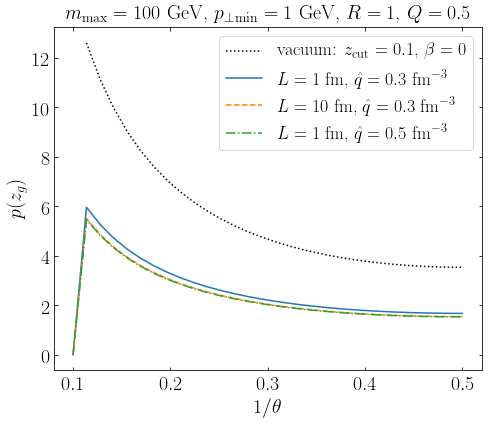

In [146]:
fig, ax = subplots()
figsize(7,6)

plot(zg0.T[0], zg0.T[1], 'k:', lw=1.5, label=r'vacuum: $z_{\rm cut}=0.1$, $\beta=0$')
plot(zg1.T[0], zg1.T[1], '-', lw=1.5, label=r'$L=1$ fm, $\hat q=0.3$ fm$^{-3}$')
plot(zg2.T[0], zg2.T[1], '--', lw=1.5, label=r'$L=10$ fm, $\hat q=0.3$ fm$^{-3}$')
plot(zg3.T[0], zg3.T[1], '-.', lw=1.5, label=r'$L=1$ fm, $\hat q=0.5$ fm$^{-3}$')
#xlim(1./R,27)
#ylim(0.1,1.0)
ylabel(r'$p(z_g)$', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
title(r'$m_{\max}=100$ GeV, $p_{\perp\min}=1$ GeV, $R=1$, $Q=0.5$', fontsize=20)
#text(1.1,0.13,r'Full decoherence', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18, ncol=1,loc='upper right');
#savefig("medium/Sudakov_fulld.pdf", bbox_inches="tight")
tight_layout()
show()

## Lund Plane

In [4]:
N       = 5000
E_max   = 500.
R       = 0.4
t_max   = (E_max*R)**2.
pT2_min = 1.
L       = 4.
qhat    = 0.7
punish  = 0.6
m2D     = 1.0
jet_coord_example = shower(1, 'm_Rcut', t_max, pT2_min, R, 'excl', True, 'Full_d', L, m2D, qhat, punish)[0]
res, Nev          = shower(N, 'm_Rcut', t_max, pT2_min, R, 'excl', True, 'Full_d', L, m2D, qhat, punish)
res0, Nev0        = shower(N, 'm_Rcut', t_max, pT2_min, R, 'excl', False)

0
0
0


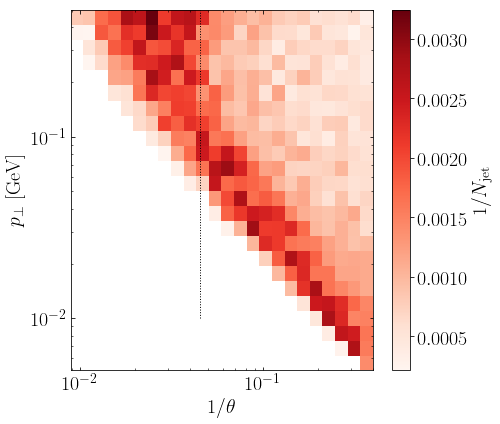

In [226]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(res.T[4])),log10(max(res.T[4])), 25)
ybins = logspace(log10(min(1.-res.T[1])),log10(max(1.-res.T[1])), 25)
h = ax.hist2d(res.T[4], 1.-res.T[1], bins=(xbins, ybins), weights=res.T[7]/sum(Nev0), cmin=1./sum(Nev0), cmap='Reds')
plot([sqrt(12./qhat/(L/0.197)**3.),sqrt(12./qhat/(L/0.197)**3.)],[0.01,0.5],'k:',lw=1)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
#xlim(0.75/R,2e2)
#ylim(sqrt(0.65),7e1)
ylabel(r'$p_\perp$ [GeV]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"$1/N_{\rm jet}$", fontsize=20)
#text(40, 45, r'$m$ ordered', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
tight_layout()
show()

In [5]:
N       = 50000
E_max   = 500.
R       = 0.4
t_max   = (E_max*R)**2.
pT2_min = 1.
L       = 3.
qhat    = 1.0
punish  = 0.6
m2D     = 1.0
jet_coord_example = shower(1, 'm_Rcut', t_max, pT2_min, R, 'excl', True, 'Full_d', L, m2D, qhat, punish)[0]
res, Nev          = shower(N, 'm_Rcut', t_max, pT2_min, R, 'excl', True, 'Full_d', L, m2D, qhat, punish)
res0, Nev0        = shower(N, 'm_Rcut', t_max, pT2_min, R, 'excl', False)

0
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000


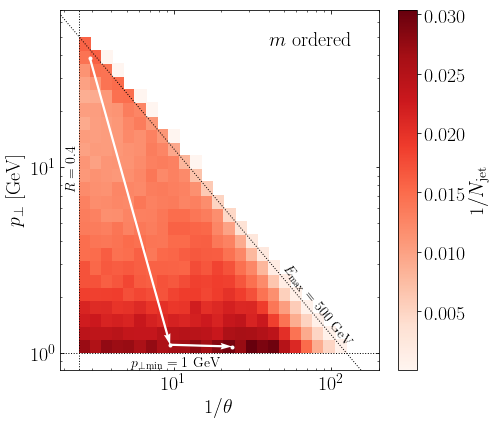

In [12]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(1./res0.T[4])),log10(max(1./res0.T[4])), 25)
ybins = logspace(log10(min(sqrt(res0.T[3]))),log10(max(sqrt(res0.T[3]))), 25)
h = ax.hist2d(1./res0.T[4], sqrt(res0.T[3]), bins=(xbins, ybins), weights=res0.T[7]/sum(Nev0), cmin=1./sum(Nev0), cmap='Reds')
plot(1./jet_coord_example.T[4], sqrt(jet_coord_example.T[3]),'w.-',lw=1)
x=1./jet_coord_example.T[4]
y=sqrt(jet_coord_example.T[3])
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
plot([1e-5,1e5],[sqrt(pT2_min),sqrt(pT2_min)],'k:',lw=1)
text(2.1/R, sqrt(0.68), r'$p_{\perp\rm min}=%d$ GeV' %sqrt(pT2_min), fontsize=14)
invtheta = logspace(-3,1./R,30)
loglog(invtheta, E_max/4./invtheta,'k:',lw=1)
text(4.6e1, sqrt(7.0e0), r'$E_{\rm max}=%d$ GeV' %(sqrt(t_max)/R), rotation=-51, fontsize=14)
plot([1./R, 1./R],[sqrt(1e-1),sqrt(1e4)], 'k:', lw=1)
text(0.8*1./R, sqrt(1.3e2), r'$R=0.4$', rotation=90,  fontsize=14)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75/R,2e2)
ylim(sqrt(0.65),7e1)
ylabel(r'$p_\perp$ [GeV]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"$1/N_{\rm jet}$", fontsize=20)
text(40, 45, r'$m$ ordered', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("medium/LundPlane_t_ordered_pt_R_cut.pdf", bbox_inches="tight")
tight_layout()
show()

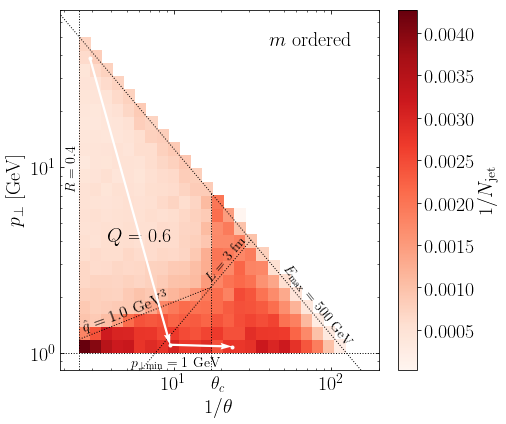

In [13]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(1./res.T[4])),log10(max(1./res.T[4])), 25)
ybins = logspace(log10(min(sqrt(res.T[3]))),log10(max(sqrt(res.T[3]))), 25)
h = ax.hist2d(1./res.T[4], sqrt(res.T[3]), bins=(xbins, ybins), weights=res.T[7]/sum(Nev0), cmin=1./sum(Nev0), cmap='Reds')
plot(1./jet_coord_example.T[4], sqrt(jet_coord_example.T[3]),'w.-',lw=1)
x=1./jet_coord_example.T[4]
y=sqrt(jet_coord_example.T[3])
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
plot([1e-5,1e5],[sqrt(pT2_min),sqrt(pT2_min)],'k:',lw=1)
text(2.1/R, sqrt(0.68), r'$p_{\perp\rm min}=%d$ GeV' %sqrt(pT2_min), fontsize=14)
invtheta = logspace(-3,1./R,30)
loglog(invtheta, E_max/4./invtheta,'k:',lw=1)
text(4.6e1, sqrt(7.0e0), r'$E_{\rm max}=%d$ GeV' %(sqrt(t_max)/R), rotation=-51, fontsize=14)
plot([1./R, 1./R],[sqrt(1e-1),sqrt(1e4)], 'k:', lw=1)
text(0.8*1./R, sqrt(1.3e2), r'$R=0.4$', rotation=90,  fontsize=14)

theta = linspace(sqrt(8./sqrt(t_max)*R/(L/0.197)), R, 10)
loglog(1./theta, (2./theta/(L/0.197)), 'k:', lw=1)
text(0.49*sqrt((L/0.197)*sqrt(t_max)/R/8.), sqrt(0.9*sqrt(t_max)/R/(L/0.197)/2.), r'$L=%d$ fm' %L, rotation=50, fontsize=14)
thetac = max(max(sqrt(12./(qhat*(L/0.197)**3)), (2.**7.*qhat/3./(E_max**3.))**(1./4.)), (2.**7.*qhat/3./(E_max**3.))**(1./4.))
loglog([1./thetac, 1./thetac], [sqrt(0.1),(E_max/4./sqrt((L/0.197)**3*qhat/12.))], 'k:', lw=1)
text(1./thetac, 0.62,r'$\theta_c$', fontsize=18)
theta = linspace(sqrt(12./(qhat*(L/0.197)**3)), R, 10)
loglog(1./theta, pow(2.*qhat/3./theta, 1./3.), 'k:', lw=1)
text(1./R, 1.9, r'$\hat q=%s$ GeV$^{3}$' %qhat, rotation=20., fontsize=16)
text(1.5/R, 4, r'$Q=%s$' %punish, fontsize=20)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75/R,2e2)
ylim(sqrt(0.65),7e1)
ylabel(r'$p_\perp$ [GeV]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"$1/N_{\rm jet}$", fontsize=20)
text(40, 45, r'$m$ ordered', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("medium/LundPlane_t_ordered_pt_R_cut_fulld.pdf", bbox_inches="tight")
tight_layout()
show()

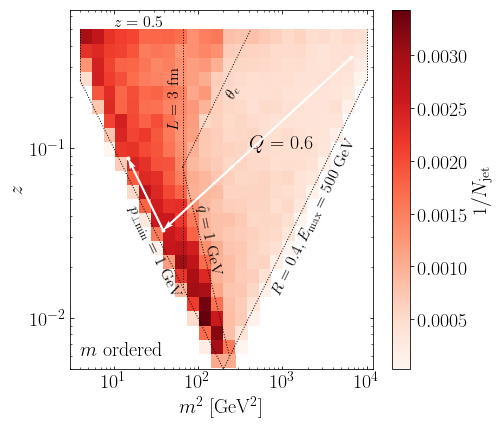

In [9]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(res.T[5])),log10(max(res.T[5])), 25)
ybins = logspace(log10(min(1.-res.T[1])),log10(max(1.-res.T[1])), 25)
h = ax.hist2d(res.T[5], 1.-res.T[1], bins=(xbins, ybins), weights=res.T[7]/sum(Nev0), cmin=1./sum(Nev0), cmap='Reds')
plot(jet_coord_example.T[5], 1.-jet_coord_example.T[1],'w.-',lw=1)
x=jet_coord_example.T[5]
y=1.-jet_coord_example.T[1]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)

text(1e1, 0.52, r'$z=0.5$', fontsize=16)
t=logspace(log10(4*pT2_min), log10(t_max/4.))
plot(t,pT2_min/t,'k:', lw=1)
text(1.3e1, 0.04, r'$p_{\perp\rm min}=1$ GeV', rotation=-64, fontsize=16)
plot(t,t/t_max,'k:', lw=1)
text(0.7e3, 0.1, r'$R=0.4, E_{\rm max}=500$ GeV', rotation=64, fontsize=16)
plot([4.*pT2_min, 4.*pT2_min],[1./4.,0.5], 'k:', lw=1)
plot([t_max/4., t_max/4.],[1./4.,0.5], 'k:', lw=1)
t=logspace(log10((2.*qhat*E_max**3.*12./qhat/(L/0.197)**3./3.)**(1./3.)), log10(0.5*(E_max*sqrt(12./qhat/(L/0.197)**3.))**2.))
plot(t,t/(E_max*E_max*12./qhat/(L/0.197)**3),'k:', lw=1)
text(2e2, 0.2, r'$\theta_c$', rotation=64, fontsize=16)
t=logspace(log10((2.*qhat*E_max**3.*12./qhat/(L/0.197)**3./3.)**(1./3.)), log10((2.*qhat*E_max*t_max/3.)**(1./3.)))
plot(t,2.*qhat*E_max/3./t**2.,'k:', lw=1)
text(0.9e2, 0.04, r'$\hat q=1$ GeV', rotation=-78, fontsize=16)
#plot([(2./3.*qhat*E_max**3*12./qhat/(L/0.197)**3)**(1./3.),(2./3.*qhat*E_max**3*12./qhat/(L/0.197)**3)**(1./3.)],[0.01,0.5], 'k:')
#plot([(2.*qhat*E_max*t_max/3.)**(1./3.),(2.*qhat*E_max*t_max/3.)**(1./3.)],[0.01,0.5], 'k:')
plot([2.*E_max/(L/0.197), 2.*E_max/(L/0.197)], [L/0.197*pT2_min/2./E_max, 0.5], 'k:', lw=1)
text(4.1e1, 0.25, r'$L=3$ fm', rotation=90, fontsize=16)
text(4e2, 0.1, r'$Q=0.6$', fontsize=20)


text(4,0.006, r'$m$ ordered', fontsize=20)
cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(3, 1.2e4)
ylim(sqrt(pT2_min/t_max),0.65)
ylabel(r'$z$', fontsize=20)
xlabel(r'$m^2$ [GeV$^2$]', fontsize=20)
cbar.set_label(r"$1/N_{\rm jet}$", fontsize=20)
#text(40, 45, r'$m$ ordered', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
tight_layout()
savefig("medium/ShowerPlane_t_ordered_pt_R_cut_fulld.pdf", bbox_inches="tight")
show()

In [14]:
h0 = ax.hist2d(1./res0.T[4], sqrt(res0.T[3]), bins=(xbins, ybins), weights=res0.T[7]/sum(Nev0))
h  = ax.hist2d(1./res.T[4],  sqrt(res.T[3]),  bins=(xbins, ybins), weights=res.T[7]/ sum(Nev0))

/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


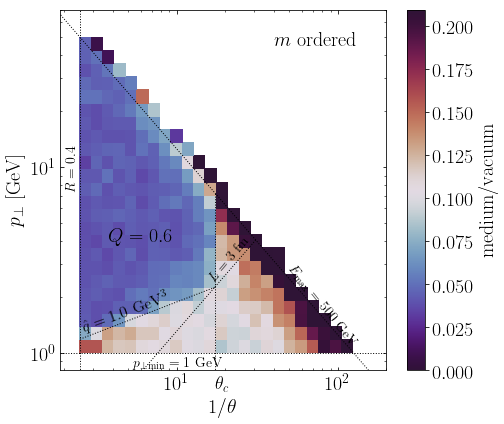

In [15]:
fig, ax = subplots()
figsize(7,6)

ratio = pcolormesh(h[1],h[2],h[0].T/h0[0].T, cmap='twilight_shifted', vmin=0, vmax=2.*sum(Nev)/sum(Nev0))
plot([1e-5,1e5],[sqrt(pT2_min),sqrt(pT2_min)],'k:',lw=1)
text(2.1/R, sqrt(0.68), r'$p_{\perp\rm min}=%d$ GeV' %sqrt(pT2_min), fontsize=14)
invtheta = logspace(-3,1./R,30)
loglog(invtheta, E_max/4./invtheta,'k:',lw=1)
text(4.6e1, sqrt(7.0e0), r'$E_{\rm max}=%d$ GeV' %(sqrt(t_max)/R), rotation=-51, fontsize=14)
plot([1./R, 1./R],[sqrt(1e-1),sqrt(1e4)], 'k:', lw=1)
text(0.8*1./R, sqrt(1.3e2), r'$R=0.4$', rotation=90,  fontsize=14)

theta = linspace(sqrt(8./sqrt(t_max)*R/(L/0.197)), R, 10)
loglog(1./theta, (2./theta/(L/0.197)), 'k:', lw=1)
text(0.49*sqrt((L/0.197)*sqrt(t_max)/R/8.), sqrt(0.9*sqrt(t_max)/R/(L/0.197)/2.), r'$L=%d$ fm' %L, rotation=50, fontsize=14)
thetac = max(max(sqrt(12./(qhat*(L/0.197)**3)), (2.**7.*qhat/3./(E_max**3.))**(1./4.)), (2.**7.*qhat/3./(E_max**3.))**(1./4.))
loglog([1./thetac, 1./thetac], [sqrt(0.1),(E_max/4./sqrt((L/0.197)**3*qhat/12.))], 'k:', lw=1)
text(1./thetac, 0.62,r'$\theta_c$', fontsize=18)
theta = linspace(sqrt(12./(qhat*(L/0.197)**3)), R, 10)
loglog(1./theta, pow(2.*qhat/3./theta, 1./3.), 'k:', lw=1)
text(1./R, 1.9, r'$\hat q=%s$ GeV$^{3}$' %qhat, rotation=20., fontsize=16)
text(1.5/R, 4, r'$Q=%s$' %punish, fontsize=20)

cbar = colorbar(ratio, ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75/R,2e2)
ylim(sqrt(0.65),7e1)
ylabel(r'$p_\perp$ [GeV]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"medium/vacuum", fontsize=20)
#title(r'$m$ ordered with $p_\perp$ and $R$ cut', fontsize=20)
text(40, 45, r'$m$ ordered', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("medium/LundPlane_t_ordered_pt_R_cut_fulld_ratio.pdf", bbox_inches="tight")
tight_layout()
show()

/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


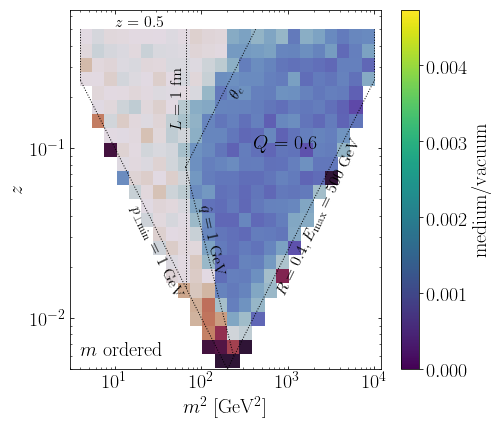

In [78]:
fig, ax = subplots()
figsize(7,6)

ratio = pcolormesh(h[1],h[2],h[0].T/h0[0].T, cmap='twilight_shifted', vmin=0, vmax=2.*sum(Nev)/sum(Nev0))
text(1e1, 0.52, r'$z=0.5$', fontsize=16)
t=logspace(log10(4*pT2_min), log10(t_max/4.))
plot(t,pT2_min/t,'k:', lw=1)
text(1.3e1, 0.04, r'$p_{\perp\rm min}=1$ GeV', rotation=-64, fontsize=16)
plot(t,t/t_max,'k:', lw=1)
text(0.7e3, 0.1, r'$R=0.4, E_{\rm max}=500$ GeV', rotation=64, fontsize=16)
plot([4.*pT2_min, 4.*pT2_min],[1./4.,0.5], 'k:', lw=1)
plot([t_max/4., t_max/4.],[1./4.,0.5], 'k:', lw=1)
t=logspace(log10((2.*qhat*E_max**3.*12./qhat/(L/0.197)**3./3.)**(1./3.)), log10(0.5*(E_max*sqrt(12./qhat/(L/0.197)**3.))**2.))
plot(t,t/(E_max*E_max*12./qhat/(L/0.197)**3),'k:', lw=1)
text(2e2, 0.2, r'$\theta_c$', rotation=64, fontsize=16)
t=logspace(log10((2.*qhat*E_max**3.*12./qhat/(L/0.197)**3./3.)**(1./3.)), log10((2.*qhat*E_max*t_max/3.)**(1./3.)))
plot(t,2.*qhat*E_max/3./t**2.,'k:', lw=1)
text(0.9e2, 0.04, r'$\hat q=1$ GeV', rotation=-78, fontsize=16)
#plot([(2./3.*qhat*E_max**3*12./qhat/(L/0.197)**3)**(1./3.),(2./3.*qhat*E_max**3*12./qhat/(L/0.197)**3)**(1./3.)],[0.01,0.5], 'k:')
#plot([(2.*qhat*E_max*t_max/3.)**(1./3.),(2.*qhat*E_max*t_max/3.)**(1./3.)],[0.01,0.5], 'k:')
plot([2.*E_max/(L/0.197), 2.*E_max/(L/0.197)], [L/0.197*pT2_min/2./E_max, 0.5], 'k:', lw=1)
text(4.1e1, 0.25, r'$L=1$ fm', rotation=90, fontsize=16)
text(4e2, 0.1, r'$Q=0.6$', fontsize=20)

text(4,0.006, r'$m$ ordered', fontsize=20)
cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(3, 1.2e4)
ylim(sqrt(pT2_min/t_max),0.65)
ylabel(r'$z$', fontsize=20)
xlabel(r'$m^2$ [GeV$^2$]', fontsize=20)
cbar.set_label(r"medium/vacuum", fontsize=20)
#title(r'$m$ ordered with $p_\perp$ and $R$ cut', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
tight_layout()
show()

In [16]:
jet_coord_example = shower(1, 'pT_Rcut', t_max, pT2_min, R, 'excl', True, 'Full_d', L, m2D, qhat, punish)[0]
res, Nev          = shower(N, 'pT_Rcut', t_max, pT2_min, R, 'excl', True, 'Full_d', L, m2D, qhat, punish)
res0, Nev0        = shower(N, 'pT_Rcut', t_max, pT2_min, R, 'excl', False)

0
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000


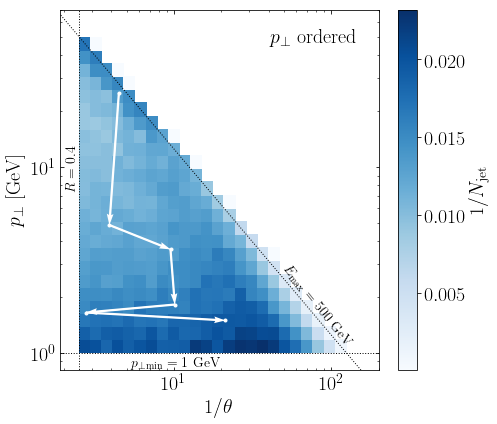

In [17]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(1./res0.T[4])),log10(max(1./res0.T[4])), 25)
ybins = logspace(log10(min(sqrt(res0.T[3]))),log10(max(sqrt(res0.T[3]))), 25)
h = ax.hist2d(1./res0.T[4], sqrt(res0.T[3]), bins=(xbins, ybins), weights=res0.T[7]/sum(Nev0), cmap='Blues', cmin=1./sum(Nev0))
plot(1./jet_coord_example.T[4], sqrt(jet_coord_example.T[3]),'w.-',lw=1)
x=1./jet_coord_example.T[4]
y=sqrt(jet_coord_example.T[3])
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
plot([1e-5,1e5],[sqrt(pT2_min),sqrt(pT2_min)],'k:',lw=1)
text(2.1/R, sqrt(0.68), r'$p_{\perp\rm min}=%d$ GeV' %sqrt(pT2_min), fontsize=14)
invtheta = logspace(-3,1./R,30)
loglog(invtheta, E_max/4./invtheta,'k:',lw=1)
text(4.6e1, sqrt(7.0e0), r'$E_{\rm max}=%d$ GeV' %(sqrt(t_max)/R), rotation=-51, fontsize=14)
plot([1./R, 1./R],[sqrt(1e-1),sqrt(1e4)], 'k:', lw=1)
text(0.8*1./R, sqrt(1.3e2), r'$R=0.4$', rotation=90,  fontsize=14)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75/R,2e2)
ylim(sqrt(0.65),7e1)
ylabel(r'$p_\perp$ [GeV]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"$1/N_{\rm jet}$", fontsize=20)
#title(r'$p_{\perp}$ ordered with $p_\perp$ and $R$ cut', fontsize=20)
text(40, 45, r'$p_{\perp}$ ordered', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("medium/LundPlane_pt_ordered_t_R_cut.pdf", bbox_inches="tight")
tight_layout()
show()

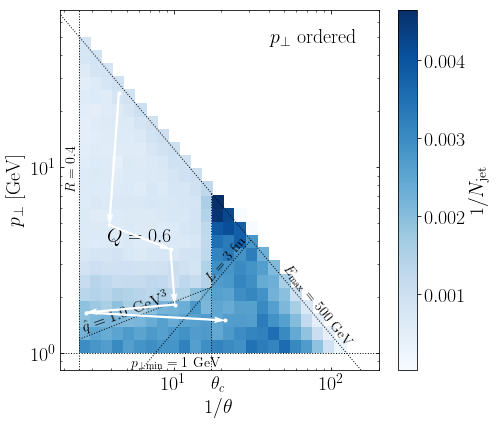

In [18]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(1./res.T[4])),log10(max(1./res.T[4])), 25)
ybins = logspace(log10(min(sqrt(res.T[3]))),log10(max(sqrt(res.T[3]))), 25)
h = ax.hist2d(1./res.T[4], sqrt(res.T[3]), bins=(xbins, ybins), weights=res.T[7]/sum(Nev0), cmap='Blues', cmin=1./sum(Nev0))
plot(1./jet_coord_example.T[4], sqrt(jet_coord_example.T[3]),'w.-',lw=1)
x=1./jet_coord_example.T[4]
y=sqrt(jet_coord_example.T[3])
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
plot([1e-5,1e5],[sqrt(pT2_min),sqrt(pT2_min)],'k:',lw=1)
text(2.1/R, sqrt(0.68), r'$p_{\perp\rm min}=%d$ GeV' %sqrt(pT2_min), fontsize=14)
invtheta = logspace(-3,1./R,30)
loglog(invtheta, E_max/4./invtheta,'k:',lw=1)
text(4.6e1, sqrt(7.0e0), r'$E_{\rm max}=%d$ GeV' %(sqrt(t_max)/R), rotation=-51, fontsize=14)
plot([1./R, 1./R],[sqrt(1e-1),sqrt(1e4)], 'k:', lw=1)
text(0.8*1./R, sqrt(1.3e2), r'$R=0.4$', rotation=90,  fontsize=14)

theta = linspace(sqrt(8./sqrt(t_max)*R/(L/0.197)), R, 10)
loglog(1./theta, (2./theta/(L/0.197)), 'k:', lw=1)
text(0.49*sqrt((L/0.197)*sqrt(t_max)/R/8.), sqrt(0.9*sqrt(t_max)/R/(L/0.197)/2.), r'$L=%d$ fm' %L, rotation=50, fontsize=14)
thetac = max(max(sqrt(12./(qhat*(L/0.197)**3)), (2.**7.*qhat/3./(E_max**3.))**(1./4.)), (2.**7.*qhat/3./(E_max**3.))**(1./4.))
loglog([1./thetac, 1./thetac], [sqrt(0.1),(E_max/4./sqrt((L/0.197)**3*qhat/12.))], 'k:', lw=1)
text(1./thetac, 0.62,r'$\theta_c$', fontsize=18)
theta = linspace(sqrt(12./(qhat*(L/0.197)**3)), R, 10)
loglog(1./theta, pow(2.*qhat/3./theta, 1./3.), 'k:', lw=1)
text(1./R, 1.9, r'$\hat q=%s$ GeV$^{3}$' %qhat, rotation=20., fontsize=16)
text(1.5/R, 4, r'$Q=%s$' %punish, fontsize=20)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75/R,2e2)
ylim(sqrt(0.65),7e1)
ylabel(r'$p_\perp$ [GeV]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"$1/N_{\rm jet}$", fontsize=20)
#title(r'$p_{\perp}$ ordered with $p_\perp$ and $R$ cut', fontsize=20)
text(40, 45, r'$p_{\perp}$ ordered', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("medium/LundPlane_pt_ordered_t_R_cut_fulld.pdf", bbox_inches="tight")
tight_layout()
show()

In [19]:
h0 = ax.hist2d(1./res0.T[4], sqrt(res0.T[3]), bins=(xbins, ybins), weights=res0.T[7]/sum(Nev0))
h  = ax.hist2d(1./res.T[4],  sqrt(res.T[3]),  bins=(xbins, ybins), weights=res.T[7]/ sum(Nev0))

/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


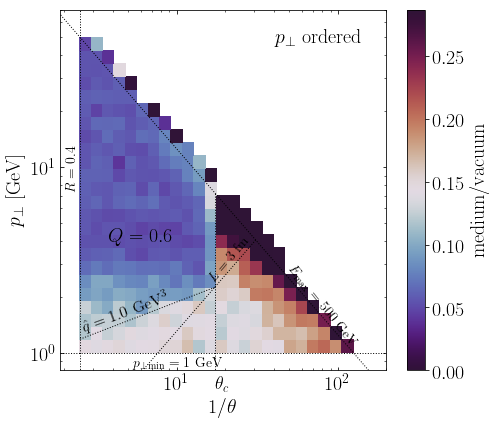

In [20]:
fig, ax = subplots()
figsize(7,6)

ratio = pcolormesh(h[1],h[2],h[0].T/h0[0].T, cmap='twilight_shifted', vmin=0, vmax=2.*sum(Nev)/sum(Nev0))
plot([1e-5,1e5],[sqrt(pT2_min),sqrt(pT2_min)],'k:',lw=1)
text(2.1/R, sqrt(0.68), r'$p_{\perp\rm min}=%d$ GeV' %sqrt(pT2_min), fontsize=14)
invtheta = logspace(-3,1./R,30)
loglog(invtheta, E_max/4./invtheta,'k:',lw=1)
text(4.6e1, sqrt(7.0e0), r'$E_{\rm max}=%d$ GeV' %(sqrt(t_max)/R), rotation=-51, fontsize=14)
plot([1./R, 1./R],[sqrt(1e-1),sqrt(1e4)], 'k:', lw=1)
text(0.8*1./R, sqrt(1.3e2), r'$R=0.4$', rotation=90,  fontsize=14)

theta = linspace(sqrt(8./sqrt(t_max)*R/(L/0.197)), R, 10)
loglog(1./theta, (2./theta/(L/0.197)), 'k:', lw=1)
text(0.49*sqrt((L/0.197)*sqrt(t_max)/R/8.), sqrt(0.9*sqrt(t_max)/R/(L/0.197)/2.), r'$L=%d$ fm' %L, rotation=50, fontsize=14)
thetac = max(max(sqrt(12./(qhat*(L/0.197)**3)), (2.**7.*qhat/3./(E_max**3.))**(1./4.)), (2.**7.*qhat/3./(E_max**3.))**(1./4.))
loglog([1./thetac, 1./thetac], [sqrt(0.1),(E_max/4./sqrt((L/0.197)**3*qhat/12.))], 'k:', lw=1)
text(1./thetac, 0.62,r'$\theta_c$', fontsize=18)
theta = linspace(sqrt(12./(qhat*(L/0.197)**3)), R, 10)
loglog(1./theta, pow(2.*qhat/3./theta, 1./3.), 'k:', lw=1)
text(1./R, 1.9, r'$\hat q=%s$ GeV$^{3}$' %qhat, rotation=20., fontsize=16)
text(1.5/R, 4, r'$Q=%s$' %punish, fontsize=20)

cbar = colorbar(ratio, ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75/R,2e2)
ylim(sqrt(0.65),7e1)
ylabel(r'$p_\perp$ [GeV]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"medium/vacuum", fontsize=20)
#title(r'$p_{\perp}$ ordered with $p_\perp$ and $R$ cut', fontsize=20)
text(40, 45, r'$p_{\perp}$ ordered', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("medium/LundPlane_pt_ordered_pt_R_cut_fulld_ratio.pdf", bbox_inches="tight")
tight_layout()
show()

In [21]:
jet_coord_example = shower(1, 'tf_Rcut', t_max, pT2_min, R, 'excl', True, 'Full_d', L, m2D, qhat, punish)[0]
res, Nev          = shower(N, 'tf_Rcut', t_max, pT2_min, R, 'excl', True, 'Full_d', L, m2D, qhat, punish)
res0, Nev0        = shower(N, 'tf_Rcut', t_max, pT2_min, R, 'excl', False)

0
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000


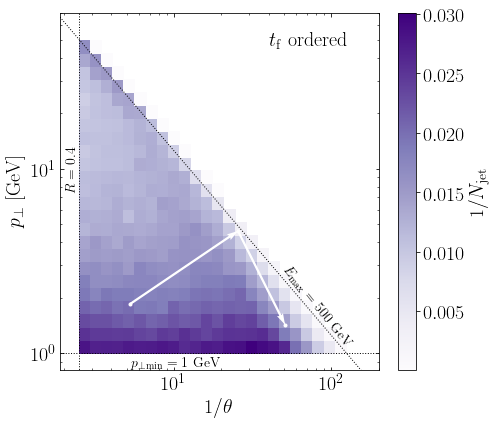

In [22]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(1./res0.T[4])),log10(max(1./res0.T[4])), 25)
ybins = logspace(log10(min(sqrt(res0.T[3]))),log10(max(sqrt(res0.T[3]))), 25)
h = ax.hist2d(1./res0.T[4], sqrt(res0.T[3]), bins=(xbins, ybins), weights=res0.T[7]/sum(Nev0), cmap='Purples', cmin=1./sum(Nev0))
plot(1./jet_coord_example.T[4], sqrt(jet_coord_example.T[3]),'w.-',lw=1)
x=1./jet_coord_example.T[4]
y=sqrt(jet_coord_example.T[3])
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
plot([1e-5,1e5],[sqrt(pT2_min),sqrt(pT2_min)],'k:',lw=1)
text(2.1/R, sqrt(0.68), r'$p_{\perp\rm min}=%d$ GeV' %sqrt(pT2_min), fontsize=14)
invtheta = logspace(-3,1./R,30)
loglog(invtheta, E_max/4./invtheta,'k:',lw=1)
text(4.6e1, sqrt(7.0e0), r'$E_{\rm max}=%d$ GeV' %(sqrt(t_max)/R), rotation=-51, fontsize=14)
plot([1./R, 1./R],[sqrt(1e-1),sqrt(1e4)], 'k:', lw=1)
text(0.8*1./R, sqrt(1.3e2), r'$R=0.4$', rotation=90,  fontsize=14)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75/R,2e2)
ylim(sqrt(0.65),7e1)
ylabel(r'$p_\perp$ [GeV]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"$1/N_{\rm jet}$", fontsize=20)
#title(r'$t_{\rm f}$ ordered with $p_\perp$ and $R$ cut', fontsize=20)
text(40, 45, r'$t_{\rm f}$ ordered', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("medium/LundPlane_tf_ordered_t_pt_R_cut.pdf", bbox_inches="tight")
tight_layout()
show()

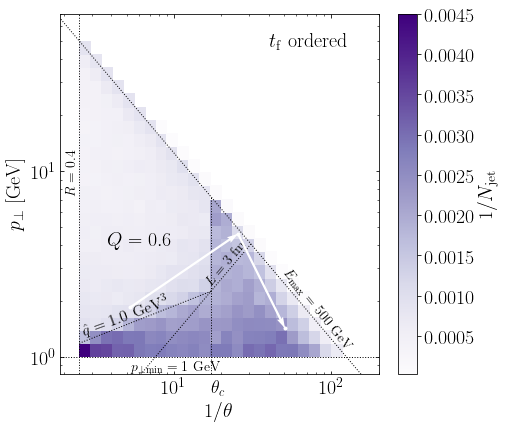

In [23]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(1./res.T[4])),log10(max(1./res.T[4])), 25)
ybins = logspace(log10(min(sqrt(res.T[3]))),log10(max(sqrt(res.T[3]))), 25)
h = ax.hist2d(1./res.T[4], sqrt(res.T[3]), bins=(xbins, ybins), weights=res.T[7]/sum(Nev0), cmap='Purples', cmin=1./sum(Nev0))
plot(1./jet_coord_example.T[4], sqrt(jet_coord_example.T[3]),'w.-',lw=1)
x=1./jet_coord_example.T[4]
y=sqrt(jet_coord_example.T[3])
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
plot([1e-5,1e5],[sqrt(pT2_min),sqrt(pT2_min)],'k:',lw=1)
text(2.1/R, sqrt(0.68), r'$p_{\perp\rm min}=%d$ GeV' %sqrt(pT2_min), fontsize=14)
invtheta = logspace(-3,1./R,30)
loglog(invtheta, E_max/4./invtheta,'k:',lw=1)
text(4.6e1, sqrt(7.0e0), r'$E_{\rm max}=%d$ GeV' %(sqrt(t_max)/R), rotation=-51, fontsize=14)
plot([1./R, 1./R],[sqrt(1e-1),sqrt(1e4)], 'k:', lw=1)
text(0.8*1./R, sqrt(1.3e2), r'$R=0.4$', rotation=90,  fontsize=14)

theta = linspace(sqrt(8./sqrt(t_max)*R/(L/0.197)), R, 10)
loglog(1./theta, (2./theta/(L/0.197)), 'k:', lw=1)
text(0.49*sqrt((L/0.197)*sqrt(t_max)/R/8.), sqrt(0.9*sqrt(t_max)/R/(L/0.197)/2.), r'$L=%d$ fm' %L, rotation=50, fontsize=14)
thetac = max(max(sqrt(12./(qhat*(L/0.197)**3)), (2.**7.*qhat/3./(E_max**3.))**(1./4.)), (2.**7.*qhat/3./(E_max**3.))**(1./4.))
loglog([1./thetac, 1./thetac], [sqrt(0.1),(E_max/4./sqrt((L/0.197)**3*qhat/12.))], 'k:', lw=1)
text(1./thetac, 0.62,r'$\theta_c$', fontsize=18)
theta = linspace(sqrt(12./(qhat*(L/0.197)**3)), R, 10)
loglog(1./theta, pow(2.*qhat/3./theta, 1./3.), 'k:', lw=1)
text(1./R, 1.9, r'$\hat q=%s$ GeV$^{3}$' %qhat, rotation=20., fontsize=16)
text(1.5/R, 4, r'$Q=%s$' %punish, fontsize=20)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75/R,2e2)
ylim(sqrt(0.65),7e1)
ylabel(r'$p_\perp$ [GeV]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"$1/N_{\rm jet}$", fontsize=20)
#title(r'$t_{\rm f}$ ordered with $p_\perp$ and $R$ cut', fontsize=20)
text(40, 45, r'$t_{\rm f}$ ordered', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("medium/LundPlane_tf_ordered_t_pt_R_cut_fulld.pdf", bbox_inches="tight")
tight_layout()
show()

In [24]:
h0 = ax.hist2d(1./res0.T[4], sqrt(res0.T[3]), bins=(xbins, ybins), weights=res0.T[7]/sum(Nev0))
h  = ax.hist2d(1./res.T[4],  sqrt(res.T[3]),  bins=(xbins, ybins), weights=res.T[7]/ sum(Nev0))

/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


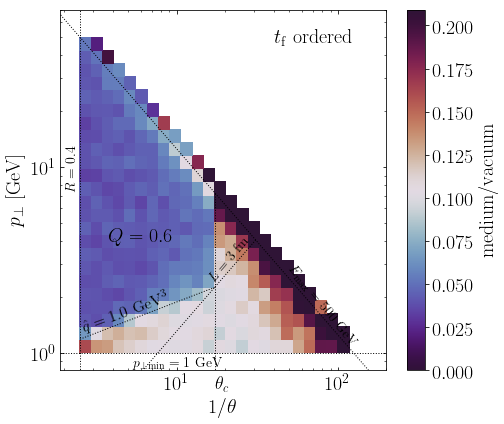

In [25]:
fig, ax = subplots()
figsize(7,6)

ratio = pcolormesh(h[1],h[2],h[0].T/h0[0].T, cmap='twilight_shifted', vmin=0, vmax=2.*sum(Nev)/sum(Nev0))
plot([1e-5,1e5],[sqrt(pT2_min),sqrt(pT2_min)],'k:',lw=1)
text(2.1/R, sqrt(0.68), r'$p_{\perp\rm min}=%d$ GeV' %sqrt(pT2_min), fontsize=14)
invtheta = logspace(-3,1./R,30)
loglog(invtheta, E_max/4./invtheta,'k:',lw=1)
text(4.6e1, sqrt(7.0e0), r'$E_{\rm max}=%d$ GeV' %(sqrt(t_max)/R), rotation=-51, fontsize=14)
plot([1./R, 1./R],[sqrt(1e-1),sqrt(1e4)], 'k:', lw=1)
text(0.8*1./R, sqrt(1.3e2), r'$R=0.4$', rotation=90,  fontsize=14)

theta = linspace(sqrt(8./sqrt(t_max)*R/(L/0.197)), R, 10)
loglog(1./theta, (2./theta/(L/0.197)), 'k:', lw=1)
text(0.49*sqrt((L/0.197)*sqrt(t_max)/R/8.), sqrt(0.9*sqrt(t_max)/R/(L/0.197)/2.), r'$L=%d$ fm' %L, rotation=50, fontsize=14)
thetac = max(max(sqrt(12./(qhat*(L/0.197)**3)), (2.**7.*qhat/3./(E_max**3.))**(1./4.)), (2.**7.*qhat/3./(E_max**3.))**(1./4.))
loglog([1./thetac, 1./thetac], [sqrt(0.1),(E_max/4./sqrt((L/0.197)**3*qhat/12.))], 'k:', lw=1)
text(1./thetac, 0.62,r'$\theta_c$', fontsize=18)
theta = linspace(sqrt(12./(qhat*(L/0.197)**3)), R, 10)
loglog(1./theta, pow(2.*qhat/3./theta, 1./3.), 'k:', lw=1)
text(1./R, 1.9, r'$\hat q=%s$ GeV$^{3}$' %qhat, rotation=20., fontsize=16)
text(1.5/R, 4, r'$Q=%s$' %punish, fontsize=20)

cbar = colorbar(ratio, ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75/R,2e2)
ylim(sqrt(0.65),7e1)
ylabel(r'$p_\perp$ [GeV]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"medium/vacuum", fontsize=20)
#title(r'$p_{\perp}$ ordered with $p_\perp$ and $R$ cut', fontsize=20)
text(40, 45, r'$t_{\rm f}$ ordered', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("medium/LundPlane_tf_ordered_m_pt_R_cut_fulld_ratio.pdf", bbox_inches="tight")
tight_layout()
show()

In [26]:
jet_coord_example = shower(1, 'theta', t_max, pT2_min, R, 'excl', True, 'Full_d', L, m2D, qhat, punish)[0]
res, Nev          = shower(N, 'theta', t_max, pT2_min, R, 'excl', True, 'Full_d', L, m2D, qhat, punish)
res0, Nev0        = shower(N, 'theta', t_max, pT2_min, R, 'excl', False)

0
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000


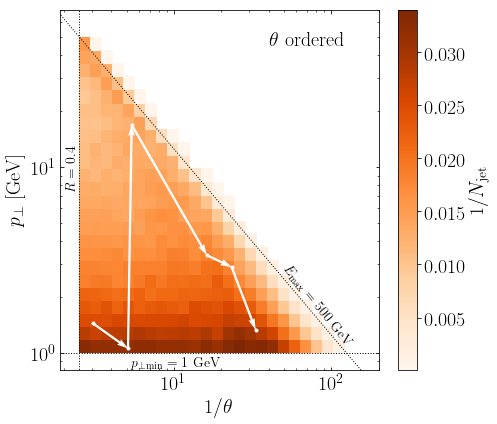

In [28]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(1./res0.T[4])),log10(max(1./res0.T[4])), 25)
ybins = logspace(log10(min(sqrt(res0.T[3]))),log10(max(sqrt(res0.T[3]))), 25)
h = ax.hist2d(1./res0.T[4], sqrt(res0.T[3]), bins=(xbins, ybins), weights=res0.T[7]/sum(Nev0), cmap='Oranges', cmin=1./sum(Nev0))
plot(1./jet_coord_example.T[4], sqrt(jet_coord_example.T[3]),'w.-',lw=1)
x=1./jet_coord_example.T[4]
y=sqrt(jet_coord_example.T[3])
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
plot([1e-5,1e5],[sqrt(pT2_min),sqrt(pT2_min)],'k:',lw=1)
text(2.1/R, sqrt(0.68), r'$p_{\perp\rm min}=%d$ GeV' %sqrt(pT2_min), fontsize=14)
invtheta = logspace(-3,1./R,30)
loglog(invtheta, E_max/4./invtheta,'k:',lw=1)
text(4.6e1, sqrt(7.0e0), r'$E_{\rm max}=%d$ GeV' %(sqrt(t_max)/R), rotation=-51, fontsize=14)
plot([1./R, 1./R],[sqrt(1e-1),sqrt(1e4)], 'k:', lw=1)
text(0.8*1./R, sqrt(1.3e2), r'$R=0.4$', rotation=90,  fontsize=14)


cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75/R,2e2)
ylim(sqrt(0.65),7e1)
ylabel(r'$p_\perp$ [GeV]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"$1/N_{\rm jet}$", fontsize=20)
#title(r'$\theta$ ordered with $p_\perp$ and $R$ cut', fontsize=20)
text(40, 45, r'$\theta$ ordered', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("medium/LundPlane_theta_ordered_t_pt_cut.pdf", bbox_inches="tight")
tight_layout()
show()

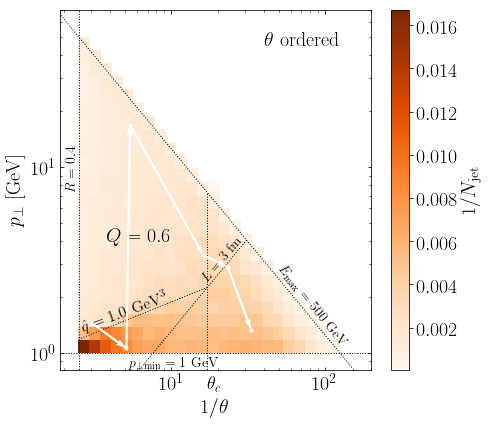

In [29]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(1./res.T[4])),log10(max(1./res.T[4])), 25)
ybins = logspace(log10(min(sqrt(res.T[3]))),log10(max(sqrt(res.T[3]))), 25)
h = ax.hist2d(1./res.T[4], sqrt(res.T[3]), bins=(xbins, ybins), weights=res.T[7]/sum(Nev0), cmap='Oranges', cmin=1./sum(Nev0))
plot(1./jet_coord_example.T[4], sqrt(jet_coord_example.T[3]),'w.-',lw=1)
x=1./jet_coord_example.T[4]
y=sqrt(jet_coord_example.T[3])
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
plot([1e-5,1e5],[sqrt(pT2_min),sqrt(pT2_min)],'k:',lw=1)
text(2.1/R, sqrt(0.68), r'$p_{\perp\rm min}=%d$ GeV' %sqrt(pT2_min), fontsize=14)
invtheta = logspace(-3,1./R,30)
loglog(invtheta, E_max/4./invtheta,'k:',lw=1)
text(4.6e1, sqrt(7.0e0), r'$E_{\rm max}=%d$ GeV' %(sqrt(t_max)/R), rotation=-51, fontsize=14)
plot([1./R, 1./R],[sqrt(1e-1),sqrt(1e4)], 'k:', lw=1)
text(0.8*1./R, sqrt(1.3e2), r'$R=0.4$', rotation=90,  fontsize=14)

theta = linspace(sqrt(8./sqrt(t_max)*R/(L/0.197)), R, 10)
loglog(1./theta, (2./theta/(L/0.197)), 'k:', lw=1)
text(0.49*sqrt((L/0.197)*sqrt(t_max)/R/8.), sqrt(0.9*sqrt(t_max)/R/(L/0.197)/2.), r'$L=%d$ fm' %L, rotation=50, fontsize=14)
thetac = max(max(sqrt(12./(qhat*(L/0.197)**3)), (2.**7.*qhat/3./(E_max**3.))**(1./4.)), (2.**7.*qhat/3./(E_max**3.))**(1./4.))
loglog([1./thetac, 1./thetac], [sqrt(0.1),(E_max/4./sqrt((L/0.197)**3*qhat/12.))], 'k:', lw=1)
text(1./thetac, 0.62,r'$\theta_c$', fontsize=18)
theta = linspace(sqrt(12./(qhat*(L/0.197)**3)), R, 10)
loglog(1./theta, pow(2.*qhat/3./theta, 1./3.), 'k:', lw=1)
text(1./R, 1.9, r'$\hat q=%s$ GeV$^{3}$' %qhat, rotation=20., fontsize=16)
text(1.5/R, 4, r'$Q=%s$' %punish, fontsize=20)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75/R,2e2)
ylim(sqrt(0.65),7e1)
ylabel(r'$p_\perp$ [GeV]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"$1/N_{\rm jet}$", fontsize=20)
#title(r'$\theta$ ordered with $p_\perp$ and $R$ cut', fontsize=20)
text(40, 45, r'$\theta$ ordered', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("medium/LundPlane_theta_ordered_t_pt_cut_fulld.pdf", bbox_inches="tight")
tight_layout()
show()

In [30]:
h0 = ax.hist2d(1./res0.T[4], sqrt(res0.T[3]), bins=(xbins, ybins), weights=res0.T[7]/sum(Nev0))
h  = ax.hist2d(1./res.T[4],  sqrt(res.T[3]),  bins=(xbins, ybins), weights=res.T[7]/ sum(Nev0))

/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


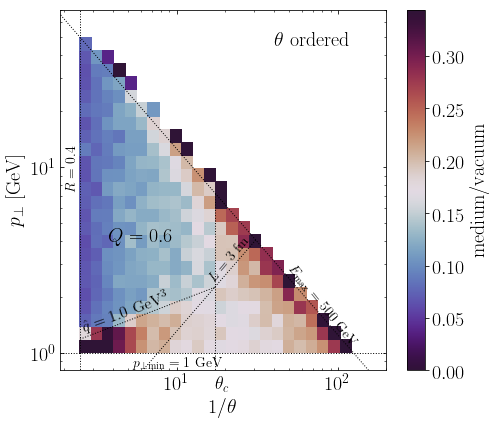

In [31]:
fig, ax = subplots()
figsize(7,6)

ratio = pcolormesh(h[1],h[2],h[0].T/h0[0].T, cmap='twilight_shifted', vmin=0, vmax=2.*sum(Nev)/sum(Nev0))
plot([1e-5,1e5],[sqrt(pT2_min),sqrt(pT2_min)],'k:',lw=1)
text(2.1/R, sqrt(0.68), r'$p_{\perp\rm min}=%d$ GeV' %sqrt(pT2_min), fontsize=14)
invtheta = logspace(-3,1./R,30)
loglog(invtheta, E_max/4./invtheta,'k:',lw=1)
text(4.6e1, sqrt(7.0e0), r'$E_{\rm max}=%d$ GeV' %(sqrt(t_max)/R), rotation=-51, fontsize=14)
plot([1./R, 1./R],[sqrt(1e-1),sqrt(1e4)], 'k:', lw=1)
text(0.8*1./R, sqrt(1.3e2), r'$R=0.4$', rotation=90,  fontsize=14)

theta = linspace(sqrt(8./sqrt(t_max)*R/(L/0.197)), R, 10)
loglog(1./theta, (2./theta/(L/0.197)), 'k:', lw=1)
text(0.49*sqrt((L/0.197)*sqrt(t_max)/R/8.), sqrt(0.9*sqrt(t_max)/R/(L/0.197)/2.), r'$L=%d$ fm' %L, rotation=50, fontsize=14)
thetac = max(max(sqrt(12./(qhat*(L/0.197)**3)), (2.**7.*qhat/3./(E_max**3.))**(1./4.)), (2.**7.*qhat/3./(E_max**3.))**(1./4.))
loglog([1./thetac, 1./thetac], [sqrt(0.1),(E_max/4./sqrt((L/0.197)**3*qhat/12.))], 'k:', lw=1)
text(1./thetac, 0.62,r'$\theta_c$', fontsize=18)
theta = linspace(sqrt(12./(qhat*(L/0.197)**3)), R, 10)
loglog(1./theta, pow(2.*qhat/3./theta, 1./3.), 'k:', lw=1)
text(1./R, 1.9, r'$\hat q=%s$ GeV$^{3}$' %qhat, rotation=20., fontsize=16)
text(1.5/R, 4, r'$Q=%s$' %punish, fontsize=20)

cbar = colorbar(ratio, ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75/R,2e2)
ylim(sqrt(0.65),7e1)
ylabel(r'$p_\perp$ [GeV]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"medium/vacuum", fontsize=20)
#title(r'$p_{\perp}$ ordered with $p_\perp$ and $R$ cut', fontsize=20)
text(40, 45, r'$\theta$ ordered', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("medium/LundPlane_theta_ordered_m_pt_cut_fulld_ratio.pdf", bbox_inches="tight")
tight_layout()
show()

## Observables

### Multiplicity

In [155]:
N       = 50000
E_max   = 500.
R       = 0.4
t_max   = (E_max*R)**2
pT2_min = 1.
punish  = 0.6
m2D     = 2.
Nem_theta        = shower(N, 'theta',   t_max, pT2_min, R, 'N_emission')
Nem_m_Rcut       = shower(N, 'm_Rcut',  t_max, pT2_min, R, 'N_emission')
Nem_pT_Rcut      = shower(N, 'pT_Rcut', t_max, pT2_min, R, 'N_emission')
Nem_tf_Rcut      = shower(N, 'tf_Rcut', t_max, pT2_min, R, 'N_emission')
Nem_m_Rcut_full_1 = shower(N, 'm_Rcut',  t_max, pT2_min, R, 'N_emission', True, 'Full_d', 3.,  m2D, 1.0, punish)
Nem_m_Rcut_full_2 = shower(N, 'm_Rcut',  t_max, pT2_min, R, 'N_emission', True, 'Full_d', 3.,  m2D, 0.7, punish)
Nem_m_Rcut_full_3 = shower(N, 'm_Rcut',  t_max, pT2_min, R, 'N_emission', True, 'Full_d', 4.,  m2D, 0.7, punish)
Nem_pt_Rcut_full_1 = shower(N, 'pT_Rcut',  t_max, pT2_min, R, 'N_emission', True, 'Full_d', 3.,  m2D, 1.0, punish)
Nem_pt_Rcut_full_2 = shower(N, 'pT_Rcut',  t_max, pT2_min, R, 'N_emission', True, 'Full_d', 3.,  m2D, 0.7, punish)
Nem_pt_Rcut_full_3 = shower(N, 'pT_Rcut',  t_max, pT2_min, R, 'N_emission', True, 'Full_d', 4.,  m2D, 0.7, punish)
Nem_tf_Rcut_full_1 = shower(N, 'tf_Rcut',  t_max, pT2_min, R, 'N_emission', True, 'Full_d', 3.,  m2D, 1.0, punish)
Nem_tf_Rcut_full_2 = shower(N, 'tf_Rcut',  t_max, pT2_min, R, 'N_emission', True, 'Full_d', 3.,  m2D, 0.7, punish)
Nem_tf_Rcut_full_3 = shower(N, 'tf_Rcut',  t_max, pT2_min, R, 'N_emission', True, 'Full_d', 4.,  m2D, 0.7, punish)
Nem_theta_full_1   = shower(N, 'theta',  t_max, pT2_min, R, 'N_emission', True, 'Full_d', 3.,  m2D, 1.0, punish)
Nem_theta_full_2   = shower(N, 'theta',  t_max, pT2_min, R, 'N_emission', True, 'Full_d', 3.,  m2D, 0.7, punish)
Nem_theta_full_3   = shower(N, 'theta',  t_max, pT2_min, R, 'N_emission', True, 'Full_d', 4.,  m2D, 0.7, punish)

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000


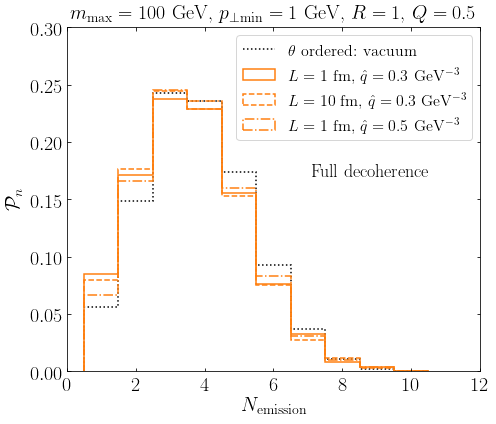

In [18]:
fig, ax = subplots()
figsize(7,6)

xbin=linspace(0.5,10.5,11)
h0 = ax.hist(Nem_theta.T[0],   bins=xbin, weights=Nem_theta.T[1]/len(Nem_theta.T[0]),     histtype='step', linestyle=':', lw=1.5, color='k')
h4 = ax.hist(Nem_theta_full_L_1_qhat_0p3_P_0p5.T[0],   bins=xbin, weights=Nem_theta_full_L_1_qhat_0p3_P_0p5.T[1]/sum(Nem_theta_full_L_1_qhat_0p3_P_0p5.T[1]),     histtype='step', linestyle='-', lw=1.5, color='C1', label=r'$L=1$ fm, $\hat q=0.3$ GeV$^{3}$')
h5 = ax.hist(Nem_theta_full_L_10_qhat_0p3_P_0p5.T[0],   bins=xbin, weights=Nem_theta_full_L_10_qhat_0p3_P_0p5.T[1]/sum(Nem_theta_full_L_10_qhat_0p3_P_0p5.T[1]),     histtype='step', linestyle='--', lw=1.5, color='C1', label=r'$L=10$ fm, $\hat q=0.3$ GeV$^{3}$')
h6 = ax.hist(Nem_theta_full_L_1_qhat_0p5_P_0p5.T[0],   bins=xbin, weights=Nem_theta_full_L_1_qhat_0p5_P_0p5.T[1]/sum(Nem_theta_full_L_1_qhat_0p5_P_0p5.T[1]),     histtype='step', linestyle='-.', lw=1.5, color='C1', label=r'$L=1$ fm, $\hat q=0.5$ GeV$^{3}$')
plot([0],[0],':', color='k',label=r'$\theta$ ordered: vacuum')

title(r'$m_{\max}=100$ GeV, $p_{\perp\min}=1$ GeV, $R=1$, $Q=0.5$', fontsize=20)
text(7.1,0.17,r'Full decoherence', fontsize=18)
xlim(0.,12)
ylim(0,0.3)
xlabel(r'$N_{\rm emission}$', fontsize=20)
ylabel(r'$\mathcal{P}_n$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=16,loc='upper right');
#savefig("medium/N_emission_shower_medium_full.pdf", bbox_inches="tight")
tight_layout()
show()

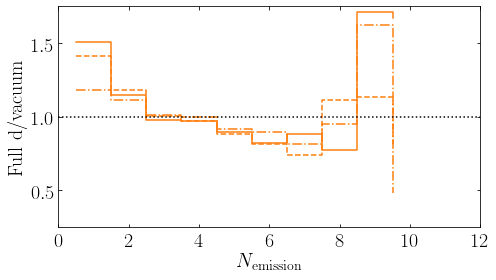

In [23]:
fig, ax = subplots()
figsize(7,4)

xbin=linspace(0.5,10.5,11)
step(h0[1][:-1], h4[0]/h0[0], where='post', c='C1', linestyle='-')
step(h0[1][:-1], h5[0]/h0[0], where='post', c='C1', linestyle='--')
step(h0[1][:-1], h6[0]/h0[0], where='post', c='C1', linestyle='-.')
plot([0,12],[1,1],':', color='k')

xlim(0.,12)
ylim(0.25,1.75)
xlabel(r'$N_{\rm emission}$', fontsize=20)
ylabel(r'Full d/vacuum', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
#legend(fontsize=16,loc='upper right');
#savefig("medium/N_emission_shower_medium_full_ratio.pdf", bbox_inches="tight")
tight_layout()
show()

/Users/ata053/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


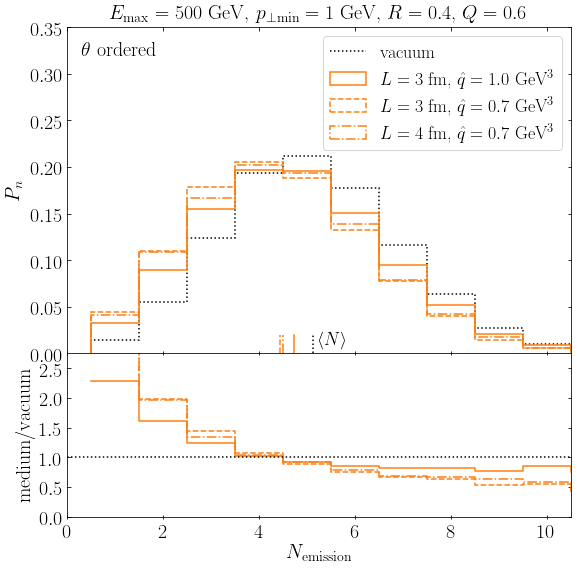

In [156]:
f = figure( figsize=(7,9) )
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0, right=1, wspace=0.0)
f.add_axes([0.2,0.175,0.75,0.75])
f.clf()
ax1 = plt.subplot(gs1[:-1, :])
title(r'$E_{\max}=500$ GeV, $p_{\perp\min}=1$ GeV, $R=0.4$, $Q=0.6$', fontsize=20)

ax2 = plt.subplot(gs1[-1, :])
ax1.xaxis.set_major_formatter( NullFormatter() )
f.subplots_adjust(wspace=0,hspace=0)

xbin=linspace(0.5,11.5,12)
h0 = ax1.hist(Nem_theta.T[0],        bins=xbin, weights=Nem_theta.T[1]/len(Nem_theta.T[0]),               histtype='step', linestyle=':',  lw=1.5, color='k')
h4 = ax1.hist(Nem_theta_full_1.T[0], bins=xbin, weights=Nem_theta_full_1.T[1]/sum(Nem_theta_full_1.T[1]), histtype='step', linestyle='-',  lw=1.5, color='C1', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
h5 = ax1.hist(Nem_theta_full_2.T[0], bins=xbin, weights=Nem_theta_full_2.T[1]/sum(Nem_theta_full_2.T[1]), histtype='step', linestyle='--', lw=1.5, color='C1', label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
h6 = ax1.hist(Nem_theta_full_3.T[0], bins=xbin, weights=Nem_theta_full_3.T[1]/sum(Nem_theta_full_3.T[1]), histtype='step', linestyle='-.', lw=1.5, color='C1', label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')
ax1.plot([0],[0],':', color='k',label=r'vacuum')
ax1.plot([sum(Nem_theta.T[0])/sum(Nem_theta.T[1]),sum(Nem_theta.T[0])/sum(Nem_theta.T[1])], [0, 0.02], 'k:', lw=1.5)
ax1.plot([sum(Nem_theta_full_1.T[0]*Nem_theta_full_1.T[1])/sum(Nem_theta_full_1.T[1]), sum(Nem_theta_full_1.T[0]*Nem_theta_full_1.T[1])/sum(Nem_theta_full_1.T[1])], [0, 0.02], 'C1-', lw=1.5)
ax1.plot([sum(Nem_theta_full_2.T[0]*Nem_theta_full_2.T[1])/sum(Nem_theta_full_2.T[1]), sum(Nem_theta_full_2.T[0]*Nem_theta_full_2.T[1])/sum(Nem_theta_full_2.T[1])], [0, 0.02], 'C1--', lw=1.5)
ax1.plot([sum(Nem_theta_full_3.T[0]*Nem_theta_full_3.T[1])/sum(Nem_theta_full_3.T[1]), sum(Nem_theta_full_3.T[0]*Nem_theta_full_3.T[1])/sum(Nem_theta_full_3.T[1])], [0, 0.02], 'C1-.', lw=1.5)
ax1.text(1.02*sum(Nem_theta.T[0])/sum(Nem_theta.T[1]), 0.01, r'$\langle N\rangle$', fontsize=18)

ax2.step(h0[1][:-1], h4[0]/h0[0], where='post', c='C1', linestyle='-')
ax2.step(h0[1][:-1], h5[0]/h0[0], where='post', c='C1', linestyle='--')
ax2.step(h0[1][:-1], h6[0]/h0[0], where='post', c='C1', linestyle='-.')
ax2.plot([0,12],[1,1],':', color='k')

ax1.text(0.3, 0.32,r'$\theta$ ordered', fontsize=20)
ax1.set_xlim(0.,10.5)
ax1.set_ylim(0,0.35)
ax1.tick_params(which='both', left=True, direction='in', right=True, top=True, bottom='off', labelsize=20)
ax2.set_xlim(0.,10.5)
ax2.set_ylim(0.,2.75)
ax2.tick_params(axis='x', top=True, bottom=True, direction='inout', labelsize=20)
ax2.tick_params(axis='y', right=True, direction='in', labelsize=20)
ax2.set_yticks([0,0.5,1,1.5,2,2.5])
ax2.set_xlabel(r'$N_{\rm emission}$', fontsize=20)
ax1.set_ylabel(r'$P_n$', fontsize=20)
ax2.set_ylabel(r'medium/vacuum', fontsize=20)
ax1.legend(fontsize=18,ncol=1,loc='upper right')
savefig('medium/N_emission_theta_shower_medium_full_ratio.pdf', format='pdf',bbox_inches='tight')
show()

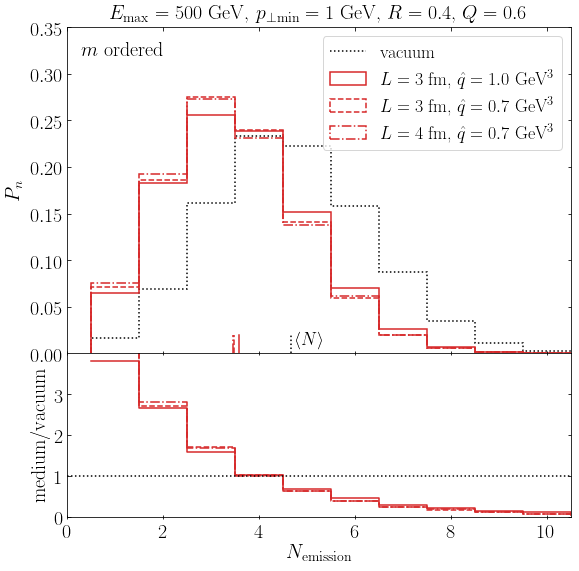

In [159]:
f = figure( figsize=(7,9) )
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0, right=1, wspace=0.0)
f.add_axes([0.2,0.175,0.75,0.75])
f.clf()
ax1 = plt.subplot(gs1[:-1, :])
title(r'$E_{\max}=500$ GeV, $p_{\perp\min}=1$ GeV, $R=0.4$, $Q=0.6$', fontsize=20)

ax2 = plt.subplot(gs1[-1, :])
ax1.xaxis.set_major_formatter( NullFormatter() )
f.subplots_adjust(wspace=0,hspace=0)

xbin=linspace(0.5,11.5,12)
h0 = ax1.hist(Nem_m_Rcut.T[0],        bins=xbin, weights=Nem_m_Rcut.T[1]/len(Nem_m_Rcut.T[0]),               histtype='step', linestyle=':',  lw=1.5, color='k')
h4 = ax1.hist(Nem_m_Rcut_full_1.T[0], bins=xbin, weights=Nem_m_Rcut_full_1.T[1]/sum(Nem_m_Rcut_full_1.T[1]), histtype='step', linestyle='-',  lw=1.5, color='C3', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
h5 = ax1.hist(Nem_m_Rcut_full_2.T[0], bins=xbin, weights=Nem_m_Rcut_full_2.T[1]/sum(Nem_m_Rcut_full_2.T[1]), histtype='step', linestyle='--', lw=1.5, color='C3', label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
h6 = ax1.hist(Nem_m_Rcut_full_3.T[0], bins=xbin, weights=Nem_m_Rcut_full_3.T[1]/sum(Nem_m_Rcut_full_3.T[1]), histtype='step', linestyle='-.', lw=1.5, color='C3', label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')
ax1.plot([0],[0],':', color='k',label=r'vacuum')
ax1.plot([sum(Nem_m_Rcut.T[0])/sum(Nem_m_Rcut.T[1]),sum(Nem_m_Rcut.T[0])/sum(Nem_m_Rcut.T[1])], [0, 0.02], 'k:', lw=1.5)
ax1.plot([sum(Nem_m_Rcut_full_1.T[0]*Nem_m_Rcut_full_1.T[1])/sum(Nem_m_Rcut_full_1.T[1]), sum(Nem_m_Rcut_full_1.T[0]*Nem_m_Rcut_full_1.T[1])/sum(Nem_m_Rcut_full_1.T[1])], [0, 0.02], 'C3-', lw=1.5)
ax1.plot([sum(Nem_m_Rcut_full_2.T[0]*Nem_m_Rcut_full_2.T[1])/sum(Nem_m_Rcut_full_2.T[1]), sum(Nem_m_Rcut_full_2.T[0]*Nem_m_Rcut_full_2.T[1])/sum(Nem_m_Rcut_full_2.T[1])], [0, 0.02], 'C3--', lw=1.5)
ax1.plot([sum(Nem_m_Rcut_full_3.T[0]*Nem_m_Rcut_full_3.T[1])/sum(Nem_m_Rcut_full_3.T[1]), sum(Nem_m_Rcut_full_3.T[0]*Nem_m_Rcut_full_3.T[1])/sum(Nem_m_Rcut_full_3.T[1])], [0, 0.02], 'C3-.', lw=1.5)
ax1.text(1.02*sum(Nem_m_Rcut.T[0])/sum(Nem_m_Rcut.T[1]), 0.01, r'$\langle N\rangle$', fontsize=18)

ax2.step(h0[1][:-1], h4[0]/h0[0], where='post', c='C3', linestyle='-')
ax2.step(h0[1][:-1], h5[0]/h0[0], where='post', c='C3', linestyle='--')
ax2.step(h0[1][:-1], h6[0]/h0[0], where='post', c='C3', linestyle='-.')
ax2.plot([0,12],[1,1],':', color='k')

ax1.text(0.3, 0.32,r'$m$ ordered', fontsize=20)
ax1.set_xlim(0.,10.5)
ax1.set_ylim(0,0.35)
ax1.tick_params(which='both', left=True, direction='in', right=True, top=True, bottom='off', labelsize=20)
ax2.set_xlim(0.,10.5)
ax2.set_ylim(0.,4)
ax2.tick_params(axis='x', top=True, bottom=True, direction='inout', labelsize=20)
ax2.tick_params(axis='y', right=True, direction='in', labelsize=20)
ax2.set_yticks([0,1,2,3])
ax2.set_xlabel(r'$N_{\rm emission}$', fontsize=20)
ax1.set_ylabel(r'$P_n$', fontsize=20)
ax2.set_ylabel(r'medium/vacuum', fontsize=20)
ax1.legend(fontsize=18,ncol=1,loc='upper right')
savefig('medium/N_emission_m_Rcut_shower_medium_full_ratio.pdf', format='pdf',bbox_inches='tight')
show()

/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide
/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide


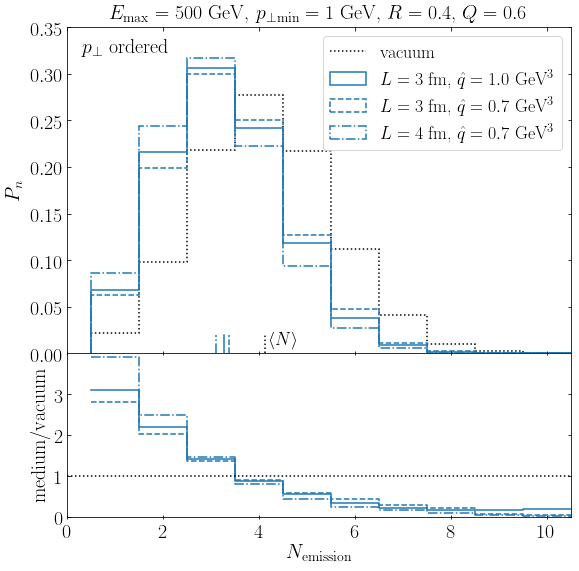

In [160]:
f = figure( figsize=(7,9) )
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0, right=1, wspace=0.0)
f.add_axes([0.2,0.175,0.75,0.75])
f.clf()
ax1 = plt.subplot(gs1[:-1, :])
title(r'$E_{\max}=500$ GeV, $p_{\perp\min}=1$ GeV, $R=0.4$, $Q=0.6$', fontsize=20)

ax2 = plt.subplot(gs1[-1, :])
ax1.xaxis.set_major_formatter( NullFormatter() )
f.subplots_adjust(wspace=0,hspace=0)

xbin=linspace(0.5,11.5,12)
h0 = ax1.hist(Nem_pT_Rcut.T[0],        bins=xbin, weights=Nem_pT_Rcut.T[1]/len(Nem_pT_Rcut.T[0]),               histtype='step', linestyle=':',  lw=1.5, color='k')
h4 = ax1.hist(Nem_pt_Rcut_full_1.T[0], bins=xbin, weights=Nem_pt_Rcut_full_1.T[1]/sum(Nem_pt_Rcut_full_1.T[1]), histtype='step', linestyle='-',  lw=1.5, color='C0', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
h5 = ax1.hist(Nem_pt_Rcut_full_2.T[0], bins=xbin, weights=Nem_pt_Rcut_full_2.T[1]/sum(Nem_pt_Rcut_full_2.T[1]), histtype='step', linestyle='--', lw=1.5, color='C0', label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
h6 = ax1.hist(Nem_pt_Rcut_full_3.T[0], bins=xbin, weights=Nem_pt_Rcut_full_3.T[1]/sum(Nem_pt_Rcut_full_3.T[1]), histtype='step', linestyle='-.', lw=1.5, color='C0', label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')
ax1.plot([0],[0],':', color='k',label=r'vacuum')
ax1.plot([sum(Nem_pT_Rcut.T[0])/sum(Nem_pT_Rcut.T[1]),sum(Nem_pT_Rcut.T[0])/sum(Nem_pT_Rcut.T[1])], [0, 0.02], 'k:', lw=1.5)
ax1.plot([sum(Nem_pt_Rcut_full_1.T[0]*Nem_pt_Rcut_full_1.T[1])/sum(Nem_pt_Rcut_full_1.T[1]), sum(Nem_pt_Rcut_full_1.T[0]*Nem_pt_Rcut_full_1.T[1])/sum(Nem_pt_Rcut_full_1.T[1])], [0, 0.02], 'C0-', lw=1.5)
ax1.plot([sum(Nem_pt_Rcut_full_2.T[0]*Nem_pt_Rcut_full_2.T[1])/sum(Nem_pt_Rcut_full_2.T[1]), sum(Nem_pt_Rcut_full_2.T[0]*Nem_pt_Rcut_full_2.T[1])/sum(Nem_pt_Rcut_full_2.T[1])], [0, 0.02], 'C0--', lw=1.5)
ax1.plot([sum(Nem_pt_Rcut_full_3.T[0]*Nem_pt_Rcut_full_3.T[1])/sum(Nem_pt_Rcut_full_3.T[1]), sum(Nem_pt_Rcut_full_3.T[0]*Nem_pt_Rcut_full_3.T[1])/sum(Nem_pt_Rcut_full_3.T[1])], [0, 0.02], 'C0-.', lw=1.5)
ax1.text(1.02*sum(Nem_pT_Rcut.T[0])/sum(Nem_pT_Rcut.T[1]), 0.01, r'$\langle N\rangle$', fontsize=18)

ax2.step(h0[1][:-1], h4[0]/h0[0], where='post', c='C0', linestyle='-')
ax2.step(h0[1][:-1], h5[0]/h0[0], where='post', c='C0', linestyle='--')
ax2.step(h0[1][:-1], h6[0]/h0[0], where='post', c='C0', linestyle='-.')
ax2.plot([0,12],[1,1],':', color='k')

ax1.text(0.3, 0.32,r'$p_{\perp}$ ordered', fontsize=20)
ax1.set_xlim(0.,10.5)
ax1.set_ylim(0,0.35)
ax1.tick_params(which='both', left=True, direction='in', right=True, top=True, bottom='off', labelsize=20)
ax2.set_xlim(0.,10.5)
ax2.set_ylim(0.,4)
ax2.tick_params(axis='x', top=True, bottom=True, direction='inout', labelsize=20)
ax2.tick_params(axis='y', right=True, direction='in', labelsize=20)
ax2.set_yticks([0,1,2,3])
ax2.set_xlabel(r'$N_{\rm emission}$', fontsize=20)
ax1.set_ylabel(r'$P_n$', fontsize=20)
ax2.set_ylabel(r'medium/vacuum', fontsize=20)
ax1.legend(fontsize=18,ncol=1,loc='upper right')
savefig('medium/N_emission_pt_Rcut_shower_medium_full_ratio.pdf', format='pdf',bbox_inches='tight')
show()

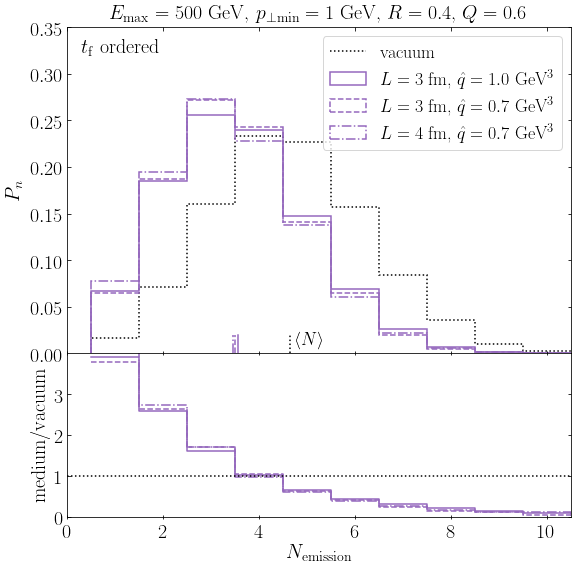

In [161]:
f = figure( figsize=(7,9) )
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0, right=1, wspace=0.0)
f.add_axes([0.2,0.175,0.75,0.75])
f.clf()
ax1 = plt.subplot(gs1[:-1, :])
title(r'$E_{\max}=500$ GeV, $p_{\perp\min}=1$ GeV, $R=0.4$, $Q=0.6$', fontsize=20)

ax2 = plt.subplot(gs1[-1, :])
ax1.xaxis.set_major_formatter( NullFormatter() )
f.subplots_adjust(wspace=0,hspace=0)

xbin=linspace(0.5,11.5,12)
h0 = ax1.hist(Nem_tf_Rcut.T[0],        bins=xbin, weights=Nem_tf_Rcut.T[1]/len(Nem_tf_Rcut.T[0]),               histtype='step', linestyle=':',  lw=1.5, color='k')
h4 = ax1.hist(Nem_tf_Rcut_full_1.T[0], bins=xbin, weights=Nem_tf_Rcut_full_1.T[1]/sum(Nem_tf_Rcut_full_1.T[1]), histtype='step', linestyle='-',  lw=1.5, color='C4', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
h5 = ax1.hist(Nem_tf_Rcut_full_2.T[0], bins=xbin, weights=Nem_tf_Rcut_full_2.T[1]/sum(Nem_tf_Rcut_full_2.T[1]), histtype='step', linestyle='--', lw=1.5, color='C4', label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
h6 = ax1.hist(Nem_tf_Rcut_full_3.T[0], bins=xbin, weights=Nem_tf_Rcut_full_3.T[1]/sum(Nem_tf_Rcut_full_3.T[1]), histtype='step', linestyle='-.', lw=1.5, color='C4', label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')
ax1.plot([0],[0],':', color='k',label=r'vacuum')
ax1.plot([sum(Nem_tf_Rcut.T[0])/sum(Nem_tf_Rcut.T[1]),sum(Nem_tf_Rcut.T[0])/sum(Nem_tf_Rcut.T[1])], [0, 0.02], 'k:', lw=1.5)
ax1.plot([sum(Nem_tf_Rcut_full_1.T[0]*Nem_tf_Rcut_full_1.T[1])/sum(Nem_tf_Rcut_full_1.T[1]), sum(Nem_tf_Rcut_full_1.T[0]*Nem_tf_Rcut_full_1.T[1])/sum(Nem_tf_Rcut_full_1.T[1])], [0, 0.02], 'C4-', lw=1.5)
ax1.plot([sum(Nem_tf_Rcut_full_2.T[0]*Nem_tf_Rcut_full_2.T[1])/sum(Nem_tf_Rcut_full_2.T[1]), sum(Nem_tf_Rcut_full_2.T[0]*Nem_tf_Rcut_full_2.T[1])/sum(Nem_tf_Rcut_full_2.T[1])], [0, 0.02], 'C4--', lw=1.5)
ax1.plot([sum(Nem_tf_Rcut_full_3.T[0]*Nem_tf_Rcut_full_3.T[1])/sum(Nem_tf_Rcut_full_3.T[1]), sum(Nem_tf_Rcut_full_3.T[0]*Nem_tf_Rcut_full_3.T[1])/sum(Nem_tf_Rcut_full_3.T[1])], [0, 0.02], 'C4-.', lw=1.5)
ax1.text(1.02*sum(Nem_tf_Rcut.T[0])/sum(Nem_tf_Rcut.T[1]), 0.01, r'$\langle N\rangle$', fontsize=18)

ax2.step(h0[1][:-1], h4[0]/h0[0], where='post', c='C4', linestyle='-')
ax2.step(h0[1][:-1], h5[0]/h0[0], where='post', c='C4', linestyle='--')
ax2.step(h0[1][:-1], h6[0]/h0[0], where='post', c='C4', linestyle='-.')
ax2.plot([0,12],[1,1],':', color='k')

ax1.text(0.3, 0.32,r'$t_{\rm f}$ ordered', fontsize=20)
ax1.set_xlim(0.,10.5)
ax1.set_ylim(0,0.35)
ax1.tick_params(which='both', left=True, direction='in', right=True, top=True, bottom='off', labelsize=20)
ax2.set_xlim(0.,10.5)
ax2.set_ylim(0.,4)
ax2.tick_params(axis='x', top=True, bottom=True, direction='inout', labelsize=20)
ax2.tick_params(axis='y', right=True, direction='in', labelsize=20)
ax2.set_yticks([0,1,2,3])
ax2.set_xlabel(r'$N_{\rm emission}$', fontsize=20)
ax1.set_ylabel(r'$P_n$', fontsize=20)
ax2.set_ylabel(r'medium/vacuum', fontsize=20)
ax1.legend(fontsize=18,ncol=1,loc='upper right')
savefig('medium/N_emission_tf_Rcut_shower_medium_full_ratio.pdf', format='pdf',bbox_inches='tight')

show()

In [162]:
h01 = ax1.hist(Nem_m_Rcut.T[0],        bins=xbin, weights=Nem_m_Rcut.T[1]/len(Nem_m_Rcut.T[0]),               histtype='step', linestyle=':',  lw=1.5, color='k')
h02 = ax1.hist(Nem_pT_Rcut.T[0],        bins=xbin, weights=Nem_pT_Rcut.T[1]/len(Nem_pT_Rcut.T[0]),               histtype='step', linestyle=':',  lw=1.5, color='k')
h03 = ax1.hist(Nem_tf_Rcut.T[0],        bins=xbin, weights=Nem_tf_Rcut.T[1]/len(Nem_tf_Rcut.T[0]),               histtype='step', linestyle=':',  lw=1.5, color='k')
h04 = ax1.hist(Nem_theta.T[0],        bins=xbin, weights=Nem_theta.T[1]/len(Nem_theta.T[0]),               histtype='step', linestyle=':',  lw=1.5, color='k')
h14 = ax1.hist(Nem_m_Rcut_full_1.T[0], bins=xbin, weights=Nem_m_Rcut_full_1.T[1]/sum(Nem_m_Rcut_full_1.T[1]), histtype='step', linestyle='-',  lw=1.5, color='C3', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
h15 = ax1.hist(Nem_m_Rcut_full_2.T[0], bins=xbin, weights=Nem_m_Rcut_full_2.T[1]/sum(Nem_m_Rcut_full_2.T[1]), histtype='step', linestyle='--', lw=1.5, color='C3', label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
h16 = ax1.hist(Nem_m_Rcut_full_3.T[0], bins=xbin, weights=Nem_m_Rcut_full_3.T[1]/sum(Nem_m_Rcut_full_3.T[1]), histtype='step', linestyle='-.', lw=1.5, color='C3', label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')
h24 = ax1.hist(Nem_pt_Rcut_full_1.T[0], bins=xbin, weights=Nem_pt_Rcut_full_1.T[1]/sum(Nem_pt_Rcut_full_1.T[1]), histtype='step', linestyle='-',  lw=1.5, color='C0', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
h25 = ax1.hist(Nem_pt_Rcut_full_2.T[0], bins=xbin, weights=Nem_pt_Rcut_full_2.T[1]/sum(Nem_pt_Rcut_full_2.T[1]), histtype='step', linestyle='--', lw=1.5, color='C0', label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
h26 = ax1.hist(Nem_pt_Rcut_full_3.T[0], bins=xbin, weights=Nem_pt_Rcut_full_3.T[1]/sum(Nem_pt_Rcut_full_3.T[1]), histtype='step', linestyle='-.', lw=1.5, color='C0', label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')
h34 = ax1.hist(Nem_tf_Rcut_full_1.T[0], bins=xbin, weights=Nem_tf_Rcut_full_1.T[1]/sum(Nem_tf_Rcut_full_1.T[1]), histtype='step', linestyle='-',  lw=1.5, color='C4', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
h35 = ax1.hist(Nem_tf_Rcut_full_2.T[0], bins=xbin, weights=Nem_tf_Rcut_full_2.T[1]/sum(Nem_tf_Rcut_full_2.T[1]), histtype='step', linestyle='--', lw=1.5, color='C4', label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
h36 = ax1.hist(Nem_tf_Rcut_full_3.T[0], bins=xbin, weights=Nem_tf_Rcut_full_3.T[1]/sum(Nem_tf_Rcut_full_3.T[1]), histtype='step', linestyle='-.', lw=1.5, color='C4', label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')
h44 = ax1.hist(Nem_theta_full_1.T[0], bins=xbin, weights=Nem_theta_full_1.T[1]/sum(Nem_theta_full_1.T[1]), histtype='step', linestyle='-',  lw=1.5, color='C1', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
h45 = ax1.hist(Nem_theta_full_2.T[0], bins=xbin, weights=Nem_theta_full_2.T[1]/sum(Nem_theta_full_2.T[1]), histtype='step', linestyle='--', lw=1.5, color='C1', label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
h46 = ax1.hist(Nem_theta_full_3.T[0], bins=xbin, weights=Nem_theta_full_3.T[1]/sum(Nem_theta_full_3.T[1]), histtype='step', linestyle='-.', lw=1.5, color='C1', label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')

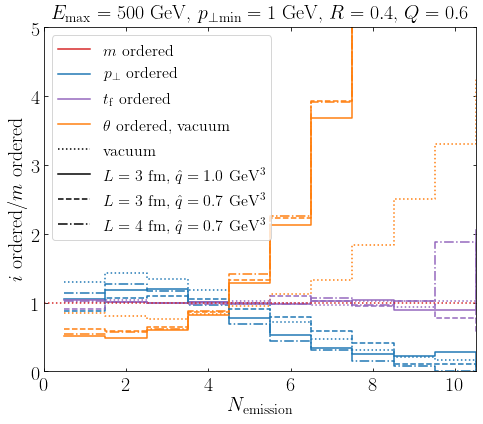

In [163]:
fig, ax = subplots()
figsize(7,7)

title(r'$E_{\max}=500$ GeV, $p_{\perp\min}=1$ GeV, $R=0.4$, $Q=0.6$', fontsize=20)
xbin=linspace(0.5,11.5,12)

plot([0,0],[0,0],'-', color='C3', label=r'$m$ ordered')
plot([0,0],[0,0],'-', color='C0', label=r'$p_{\perp}$ ordered')
plot([0,0],[0,0],'-', color='C4', label=r'$t_{\rm f}$ ordered')
plot([0,0],[0,0],'-', color='C1', label=r'$\theta$ ordered, vacuum')
plot([0,0],[0,0],':', color='k', label=r'vacuum')
plot([0,0],[0,0],'-', color='k', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^3$')
plot([0,0],[0,0],'--', color='k', label=r'$L=3$ fm, $\hat q=0.7$ GeV$^3$')
plot([0,0],[0,0],'-.', color='k', label=r'$L=4$ fm, $\hat q=0.7$ GeV$^3$')

step(h01[1][:-1], h02[0]/h01[0], where='post', c='C0', linestyle=':')
step(h01[1][:-1], h03[0]/h01[0], where='post', c='C4', linestyle=':')
step(h01[1][:-1], h04[0]/h01[0], where='post', c='C1', linestyle=':')

step(h01[1][:-1], h24[0]/h14[0], where='post', c='C0', linestyle='-')
step(h01[1][:-1], h34[0]/h14[0], where='post', c='C4', linestyle='-')
step(h01[1][:-1], h44[0]/h14[0], where='post', c='C1', linestyle='-')
step(h01[1][:-1], h25[0]/h15[0], where='post', c='C0', linestyle='--')
step(h01[1][:-1], h35[0]/h15[0], where='post', c='C4', linestyle='--')
step(h01[1][:-1], h45[0]/h15[0], where='post', c='C1', linestyle='--')
step(h01[1][:-1], h26[0]/h16[0], where='post', c='C0', linestyle='-.')
step(h01[1][:-1], h36[0]/h16[0], where='post', c='C4', linestyle='-.')
step(h01[1][:-1], h46[0]/h16[0], where='post', c='C1', linestyle='-.')
plot([0,12],[1,1],':', color='C3')


xlim(0.,10.5)
ylim(0.,5.)
xlabel(r'$N_{\rm emission}$', fontsize=20)
ylabel(r'$i$ ordered/$m$ ordered', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=16,loc='upper left');
savefig("medium/N_emission_shower_medium_full_ratio2.pdf", bbox_inches="tight")
tight_layout()
show()

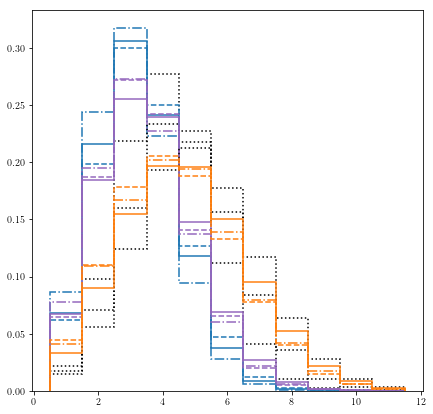

In [165]:
h02 = hist(Nem_pT_Rcut.T[0],        bins=xbin, weights=Nem_pT_Rcut.T[1]/len(Nem_pT_Rcut.T[0]),               histtype='step', linestyle=':',  lw=1.5, color='k')
h42 = hist(Nem_pt_Rcut_full_1.T[0], bins=xbin, weights=Nem_pt_Rcut_full_1.T[1]/sum(Nem_pt_Rcut_full_1.T[1]), histtype='step', linestyle='-',  lw=1.5, color='C0', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
h52 = hist(Nem_pt_Rcut_full_2.T[0], bins=xbin, weights=Nem_pt_Rcut_full_2.T[1]/sum(Nem_pt_Rcut_full_2.T[1]), histtype='step', linestyle='--', lw=1.5, color='C0', label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
h62 = hist(Nem_pt_Rcut_full_3.T[0], bins=xbin, weights=Nem_pt_Rcut_full_3.T[1]/sum(Nem_pt_Rcut_full_3.T[1]), histtype='step', linestyle='-.', lw=1.5, color='C0', label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')
h03 = hist(Nem_tf_Rcut.T[0],        bins=xbin, weights=Nem_tf_Rcut.T[1]/len(Nem_tf_Rcut.T[0]),               histtype='step', linestyle=':',  lw=1.5, color='k')
h43 = hist(Nem_tf_Rcut_full_1.T[0], bins=xbin, weights=Nem_tf_Rcut_full_1.T[1]/sum(Nem_tf_Rcut_full_1.T[1]), histtype='step', linestyle='-',  lw=1.5, color='C4', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
h53 = hist(Nem_tf_Rcut_full_2.T[0], bins=xbin, weights=Nem_tf_Rcut_full_2.T[1]/sum(Nem_tf_Rcut_full_2.T[1]), histtype='step', linestyle='--', lw=1.5, color='C4', label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
h63 = hist(Nem_tf_Rcut_full_3.T[0], bins=xbin, weights=Nem_tf_Rcut_full_3.T[1]/sum(Nem_tf_Rcut_full_3.T[1]), histtype='step', linestyle='-.', lw=1.5, color='C4', label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')
h04 = hist(Nem_theta.T[0],        bins=xbin, weights=Nem_theta.T[1]/len(Nem_theta.T[0]),               histtype='step', linestyle=':',  lw=1.5, color='k')
h44 = hist(Nem_theta_full_1.T[0], bins=xbin, weights=Nem_theta_full_1.T[1]/sum(Nem_theta_full_1.T[1]), histtype='step', linestyle='-',  lw=1.5, color='C1', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
h54 = hist(Nem_theta_full_2.T[0], bins=xbin, weights=Nem_theta_full_2.T[1]/sum(Nem_theta_full_2.T[1]), histtype='step', linestyle='--', lw=1.5, color='C1', label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
h64 = hist(Nem_theta_full_3.T[0], bins=xbin, weights=Nem_theta_full_3.T[1]/sum(Nem_theta_full_3.T[1]), histtype='step', linestyle='-.', lw=1.5, color='C1', label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')

/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide
/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide
/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide


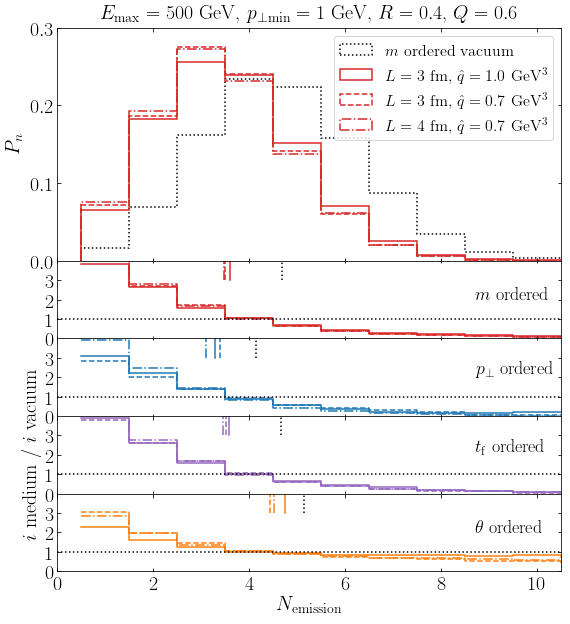

In [172]:
f = figure( figsize=(7,10) )
gs = gridspec.GridSpec(5, 1,
                       width_ratios=[1],
                       height_ratios=[3, 1, 1, 1, 1]
                       )
gs.update(left=0, right=1, wspace=0.0)
f.add_axes([0.2,0.175,0.75,0.75])
f.clf()
ax1 = plt.subplot(gs[0])
title(r'$E_{\max}=500$ GeV, $p_{\perp\min}=1$ GeV, $R=0.4$, $Q=0.6$', fontsize=20)
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])
ax5 = plt.subplot(gs[4])
ax1.xaxis.set_major_formatter( NullFormatter() )
ax2.xaxis.set_major_formatter( NullFormatter() )
ax3.xaxis.set_major_formatter( NullFormatter() )
ax4.xaxis.set_major_formatter( NullFormatter() )
f.subplots_adjust(wspace=0,hspace=0)


xbin=linspace(0.5,11.5,12)
h01 = ax1.hist(Nem_m_Rcut.T[0],        bins=xbin, weights=Nem_m_Rcut.T[1]/len(Nem_m_Rcut.T[0]),               histtype='step', linestyle=':',  lw=1.5, color='k', label=r'$m$ ordered vacuum')
h41 = ax1.hist(Nem_m_Rcut_full_1.T[0], bins=xbin, weights=Nem_m_Rcut_full_1.T[1]/sum(Nem_m_Rcut_full_1.T[1]), histtype='step', linestyle='-',  lw=1.5, color='C3', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
h51 = ax1.hist(Nem_m_Rcut_full_2.T[0], bins=xbin, weights=Nem_m_Rcut_full_2.T[1]/sum(Nem_m_Rcut_full_2.T[1]), histtype='step', linestyle='--', lw=1.5, color='C3', label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
h61 = ax1.hist(Nem_m_Rcut_full_3.T[0], bins=xbin, weights=Nem_m_Rcut_full_3.T[1]/sum(Nem_m_Rcut_full_3.T[1]), histtype='step', linestyle='-.', lw=1.5, color='C3', label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')

ax2.step(h01[1][:-1], h41[0]/h01[0], where='post', c='C3', linestyle='-', label=r'$m$ ordered')
ax2.step(h01[1][:-1], h51[0]/h01[0], where='post', c='C3', linestyle='--')
ax2.step(h01[1][:-1], h61[0]/h01[0], where='post', c='C3', linestyle='-.')
ax2.plot([0,12],[1,1],':', color='k')
ax2.plot([sum(Nem_m_Rcut.T[0])/sum(Nem_m_Rcut.T[1]),sum(Nem_m_Rcut.T[0])/sum(Nem_m_Rcut.T[1])], [3,4], 'k:', lw=1.5)
ax2.plot([sum(Nem_m_Rcut_full_1.T[0]*Nem_m_Rcut_full_1.T[1])/sum(Nem_m_Rcut_full_1.T[1]), sum(Nem_m_Rcut_full_1.T[0]*Nem_m_Rcut_full_1.T[1])/sum(Nem_m_Rcut_full_1.T[1])], [3,4], 'C3-', lw=1.5)
ax2.plot([sum(Nem_m_Rcut_full_2.T[0]*Nem_m_Rcut_full_2.T[1])/sum(Nem_m_Rcut_full_2.T[1]), sum(Nem_m_Rcut_full_2.T[0]*Nem_m_Rcut_full_2.T[1])/sum(Nem_m_Rcut_full_2.T[1])], [3,4], 'C3--', lw=1.5)
ax2.plot([sum(Nem_m_Rcut_full_3.T[0]*Nem_m_Rcut_full_3.T[1])/sum(Nem_m_Rcut_full_3.T[1]), sum(Nem_m_Rcut_full_3.T[0]*Nem_m_Rcut_full_3.T[1])/sum(Nem_m_Rcut_full_3.T[1])], [3,4], 'C3-.', lw=1.5)


ax3.step(h02[1][:-1], h42[0]/h02[0], where='post', c='C0', linestyle='-', label=r'$p_{\perp}$ ordered')
ax3.step(h02[1][:-1], h52[0]/h02[0], where='post', c='C0', linestyle='--')
ax3.step(h02[1][:-1], h62[0]/h02[0], where='post', c='C0', linestyle='-.')
ax3.plot([0,12],[1,1],':', color='k')
ax3.plot([sum(Nem_pT_Rcut.T[0])/sum(Nem_pT_Rcut.T[1]),sum(Nem_pT_Rcut.T[0])/sum(Nem_pT_Rcut.T[1])], [3,4], 'k:', lw=1.5)
ax3.plot([sum(Nem_pt_Rcut_full_1.T[0]*Nem_pt_Rcut_full_1.T[1])/sum(Nem_pt_Rcut_full_1.T[1]), sum(Nem_pt_Rcut_full_1.T[0]*Nem_pt_Rcut_full_1.T[1])/sum(Nem_pt_Rcut_full_1.T[1])], [3,4], 'C0-', lw=1.5)
ax3.plot([sum(Nem_pt_Rcut_full_2.T[0]*Nem_pt_Rcut_full_2.T[1])/sum(Nem_pt_Rcut_full_2.T[1]), sum(Nem_pt_Rcut_full_2.T[0]*Nem_pt_Rcut_full_2.T[1])/sum(Nem_pt_Rcut_full_2.T[1])], [3,4], 'C0--', lw=1.5)
ax3.plot([sum(Nem_pt_Rcut_full_3.T[0]*Nem_pt_Rcut_full_3.T[1])/sum(Nem_pt_Rcut_full_3.T[1]), sum(Nem_pt_Rcut_full_3.T[0]*Nem_pt_Rcut_full_3.T[1])/sum(Nem_pt_Rcut_full_3.T[1])], [3,4], 'C0-.', lw=1.5)


ax4.step(h03[1][:-1], h43[0]/h03[0], where='post', c='C4', linestyle='-', label=r'$t_{\rm f}$ ordered')
ax4.step(h03[1][:-1], h53[0]/h03[0], where='post', c='C4', linestyle='--')
ax4.step(h03[1][:-1], h63[0]/h03[0], where='post', c='C4', linestyle='-.')
ax4.plot([0,12],[1,1],':', color='k')
ax4.plot([sum(Nem_tf_Rcut.T[0])/sum(Nem_tf_Rcut.T[1]),sum(Nem_tf_Rcut.T[0])/sum(Nem_tf_Rcut.T[1])], [3,4], 'k:', lw=1.5)
ax4.plot([sum(Nem_tf_Rcut_full_1.T[0]*Nem_tf_Rcut_full_1.T[1])/sum(Nem_tf_Rcut_full_1.T[1]), sum(Nem_tf_Rcut_full_1.T[0]*Nem_tf_Rcut_full_1.T[1])/sum(Nem_tf_Rcut_full_1.T[1])], [3,4], 'C4-', lw=1.5)
ax4.plot([sum(Nem_tf_Rcut_full_2.T[0]*Nem_tf_Rcut_full_2.T[1])/sum(Nem_tf_Rcut_full_2.T[1]), sum(Nem_tf_Rcut_full_2.T[0]*Nem_tf_Rcut_full_2.T[1])/sum(Nem_tf_Rcut_full_2.T[1])], [3,4], 'C4--', lw=1.5)
ax4.plot([sum(Nem_tf_Rcut_full_3.T[0]*Nem_tf_Rcut_full_3.T[1])/sum(Nem_tf_Rcut_full_3.T[1]), sum(Nem_tf_Rcut_full_3.T[0]*Nem_tf_Rcut_full_3.T[1])/sum(Nem_tf_Rcut_full_3.T[1])], [3,4], 'C4-.', lw=1.5)


ax5.step(h04[1][:-1], h44[0]/h04[0], where='post', c='C1', linestyle='-', label=r'$\theta$ ordered')
ax5.step(h04[1][:-1], h54[0]/h04[0], where='post', c='C1', linestyle='--')
ax5.step(h04[1][:-1], h64[0]/h04[0], where='post', c='C1', linestyle='-.')
ax5.plot([0,12],[1,1],':', color='k')
ax5.plot([sum(Nem_theta.T[0])/sum(Nem_theta.T[1]),sum(Nem_theta.T[0])/sum(Nem_theta.T[1])], [3,4], 'k:', lw=1.5)
ax5.plot([sum(Nem_theta_full_1.T[0]*Nem_theta_full_1.T[1])/sum(Nem_theta_full_1.T[1]), sum(Nem_theta_full_1.T[0]*Nem_theta_full_1.T[1])/sum(Nem_theta_full_1.T[1])], [3,4], 'C1-', lw=1.5)
ax5.plot([sum(Nem_theta_full_2.T[0]*Nem_theta_full_2.T[1])/sum(Nem_theta_full_2.T[1]), sum(Nem_theta_full_2.T[0]*Nem_theta_full_2.T[1])/sum(Nem_theta_full_2.T[1])], [3,4], 'C1--', lw=1.5)
ax5.plot([sum(Nem_theta_full_3.T[0]*Nem_theta_full_3.T[1])/sum(Nem_theta_full_3.T[1]), sum(Nem_theta_full_3.T[0]*Nem_theta_full_3.T[1])/sum(Nem_theta_full_3.T[1])], [3,4], 'C1-.', lw=1.5)


ax1.legend(fontsize=16,ncol=1,loc='upper right')
ax1.set_ylabel(r"$P_n$", fontsize=20)
ax1.set_xlim(0.,10.5)
ax1.set_ylim(0,0.3)
ax1.tick_params(which='both', left=True, direction='in', right=True, top=True, bottom=True, labelsize=20)
ax1.tick_params(right='on', top=True, bottom=True, direction='in', labelsize=20)
ax2.text(8.7,2,r'$m$ ordered',fontsize=18)
ax2.set_xlim(0.,10.5)
ax2.set_ylim(0.,4)
ax2.tick_params(which='both', left=True, direction='in', right=True, top=True, bottom=True, labelsize=20)
ax2.tick_params(axis='x', top=True, bottom='off', direction='inout', labelsize=20)
ax2.tick_params(axis='y', right='on', direction='in', labelsize=20)
ax2.set_yticks([0,1,2,3])
ax3.text(8.7,2,r'$p_{\perp}$ ordered',fontsize=18)
ax3.set_xlim(0.,10.5)
ax3.set_ylim(0.,4)
ax3.tick_params(which='both', left=True, direction='in', right=True, top=True, bottom=True, labelsize=20)
ax3.tick_params(axis='x', top=True, bottom=True, direction='inout', labelsize=20)
ax3.tick_params(axis='y', right='on', direction='in', labelsize=20)
ax3.set_yticks([0,1,2,3])
ax4.text(8.7,2,r'$t_{\rm f}$ ordered',fontsize=18)
ax4.set_ylabel(r"$i$ medium / $i$ vacuum", fontsize=20)
ax4.set_xlim(0.,10.5)
ax4.set_ylim(0.,4)
ax4.tick_params(which='both', left=True, direction='in', right=True, top=True, bottom=True, labelsize=20)
ax4.tick_params(axis='x', top=True, direction='in', labelsize=20)
ax4.tick_params(axis='y', right='on', direction='in', labelsize=20)
ax4.set_yticks([0,1,2,3])
ax5.text(8.7,2,r'$\theta$ ordered',fontsize=18)
ax5.set_xlim(0.,10.5)
ax5.set_ylim(0.,4)
ax5.set_yticks([0,1,2,3])
ax5.tick_params(which='both', left=True, direction='in', right=True, top=True, bottom=True, labelsize=20)
ax5.tick_params(axis='x', top=True, direction='in', labelsize=20)
ax5.tick_params(axis='y', right='on', direction='in', labelsize=20)
ax5.set_xlabel(r'$N_{\rm emission}$', fontsize=20)
savefig('medium/N_emission_shower_medium_full_ratio_all.pdf', format='pdf',bbox_inches='tight')
show()

### Soft Drop

In [191]:
N       = 50000
E_max   = 500.
R       = 0.4
t_max   = (E_max*R)**2
pT2_min = 1.
punish  = 0.6
m_Rcut_list         = shower(N, 'm_Rcut',  t_max, pT2_min, R, 'list')
m_Rcut_list_full_1  = shower(N, 'm_Rcut',  t_max, pT2_min, R, 'list', True, 'Full_d',    3., 1., 1.0, punish)
m_Rcut_list_full_2  = shower(N, 'm_Rcut',  t_max, pT2_min, R, 'list', True, 'Full_d',    3., 1., 0.7, punish)
m_Rcut_list_full_3  = shower(N, 'm_Rcut',  t_max, pT2_min, R, 'list', True, 'Full_d',    4., 1., 0.7, punish)
pt_Rcut_list        = shower(N, 'pT_Rcut', t_max, pT2_min, R, 'list')
pt_Rcut_list_full_1 = shower(N, 'pT_Rcut', t_max, pT2_min, R, 'list', True, 'Full_d',    3., 1., 1.0, punish)
pt_Rcut_list_full_2 = shower(N, 'pT_Rcut', t_max, pT2_min, R, 'list', True, 'Full_d',    3., 1., 0.7, punish)
pt_Rcut_list_full_3 = shower(N, 'pT_Rcut', t_max, pT2_min, R, 'list', True, 'Full_d',    4., 1., 0.7, punish)
tf_Rcut_list        = shower(N, 'tf_Rcut', t_max, pT2_min, R, 'list')
tf_Rcut_list_full_1 = shower(N, 'tf_Rcut', t_max, pT2_min, R, 'list', True, 'Full_d',    3., 1., 1.0, punish)
tf_Rcut_list_full_2 = shower(N, 'tf_Rcut', t_max, pT2_min, R, 'list', True, 'Full_d',    3., 1., 0.7, punish)
tf_Rcut_list_full_3 = shower(N, 'tf_Rcut', t_max, pT2_min, R, 'list', True, 'Full_d',    4., 1., 0.7, punish)
theta_list          = shower(N, 'theta',   t_max, pT2_min, R, 'list')
theta_list_full_1   = shower(N, 'theta',   t_max, pT2_min, R, 'list', True, 'Full_d',    3., 1., 1.0, punish)
theta_list_full_2   = shower(N, 'theta',   t_max, pT2_min, R, 'list', True, 'Full_d',    3., 1., 0.7, punish)
theta_list_full_3   = shower(N, 'theta',   t_max, pT2_min, R, 'list', True, 'Full_d',    4., 1., 0.7, punish)

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000


In [192]:
z_cut     = 0.1
beta      = 0.
theta_cut = 0.
SD_m_Rcut              = SD(m_Rcut_list,         sqrt(t_max)/R, z_cut, beta, R)
SD_m_Rcut_list_full_1  = SD(m_Rcut_list_full_1,  sqrt(t_max)/R, z_cut, beta, R)
SD_m_Rcut_list_full_2  = SD(m_Rcut_list_full_2,  sqrt(t_max)/R, z_cut, beta, R)
SD_m_Rcut_list_full_3  = SD(m_Rcut_list_full_3,  sqrt(t_max)/R, z_cut, beta, R)
SD_pt_Rcut             = SD(pt_Rcut_list,        sqrt(t_max)/R, z_cut, beta, R)
SD_pt_Rcut_list_full_1 = SD(pt_Rcut_list_full_1, sqrt(t_max)/R, z_cut, beta, R)
SD_pt_Rcut_list_full_2 = SD(pt_Rcut_list_full_2, sqrt(t_max)/R, z_cut, beta, R)
SD_pt_Rcut_list_full_3 = SD(pt_Rcut_list_full_3, sqrt(t_max)/R, z_cut, beta, R)
SD_tf_Rcut             = SD(tf_Rcut_list,        sqrt(t_max)/R, z_cut, beta, R)
SD_tf_Rcut_list_full_1 = SD(tf_Rcut_list_full_1, sqrt(t_max)/R, z_cut, beta, R)
SD_tf_Rcut_list_full_2 = SD(tf_Rcut_list_full_2, sqrt(t_max)/R, z_cut, beta, R)
SD_tf_Rcut_list_full_3 = SD(tf_Rcut_list_full_3, sqrt(t_max)/R, z_cut, beta, R)
SD_theta               = SD(theta_list,          sqrt(t_max)/R, z_cut, beta, R)
SD_theta_list_full_1 = SD(theta_list_full_1,   sqrt(t_max)/R, z_cut, beta, R)
SD_theta_list_full_2 = SD(theta_list_full_2,   sqrt(t_max)/R, z_cut, beta, R)
SD_theta_list_full_3 = SD(theta_list_full_3,   sqrt(t_max)/R, z_cut, beta, R)

#### Groomed angle

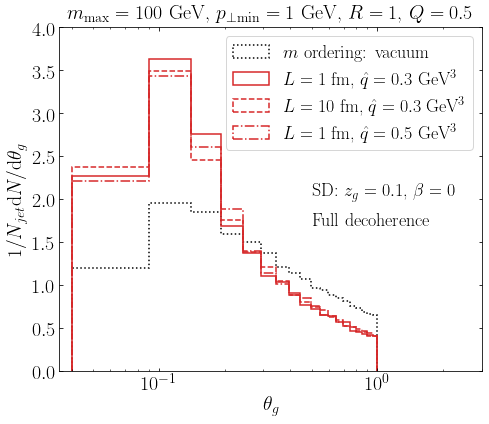

In [173]:
fig, ax = subplots()
figsize(7,6)

xbin=linspace(4.*sqrt(pT2_min/t_max), R, 20)
h0 = ax.hist(SD_m_Rcut.T[4] ,                         bins=xbin, weights=SD_m_Rcut.T[7]                        /sum(SD_m_Rcut.T[7])                        /(R-4.*sqrt(pT2_min/t_max))*20., histtype='step', linestyle=':', lw=1.5, color='k', label=r'$m$ ordering: vacuum')
h1 = ax.hist(SD_m_Rcut_list_full_L_1_qhat_0p3.T[4] ,  bins=xbin, weights=SD_m_Rcut_list_full_L_1_qhat_0p3.T[7] /sum(SD_m_Rcut_list_full_L_1_qhat_0p3.T[7]) /(R-4.*sqrt(pT2_min/t_max))*20., histtype='step', linestyle='-', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.3$ GeV$^{3}$')
h2 = ax.hist(SD_m_Rcut_list_full_L_10_qhat_0p3.T[4] , bins=xbin, weights=SD_m_Rcut_list_full_L_10_qhat_0p3.T[7]/sum(SD_m_Rcut_list_full_L_10_qhat_0p3.T[7])/(R-4.*sqrt(pT2_min/t_max))*20., histtype='step', linestyle='--', lw=1.5, color='C3', label=r'$L=10$ fm, $\hat q=0.3$ GeV$^{3}$')
h3 = ax.hist(SD_m_Rcut_list_full_L_1_qhat_0p5.T[4] ,  bins=xbin, weights=SD_m_Rcut_list_full_L_1_qhat_0p5.T[7] /sum(SD_m_Rcut_list_full_L_1_qhat_0p5.T[7]) /(R-4.*sqrt(pT2_min/t_max))*20., histtype='step', linestyle='-.', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.5$ GeV$^{3}$')

ax.set_xscale('log')
xlim(0.035,3)
ylim(0,4)
xlabel(r'$\theta_g$', fontsize=20)
ylabel(r'$1/N_{jet}\mathrm{d}N/\mathrm{d}\theta_g$', fontsize=20)
title(r'$m_{\rm max}=100$ GeV, $p_{\perp\rm min}=1$ GeV, $R=1$, $Q=0.5$', fontsize=20)
text(0.5, 2, r'SD: $z_g=0.1$, $\beta=0$', fontsize=18)
text(0.5, 1.7, r'Full decoherence', fontsize=18)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18, ncol=1,loc='upper right');
#savefig("medium/N_thetag_shower_medium_full.pdf", bbox_inches="tight")
tight_layout()
show()

In [174]:
xbin=logspace(log10(4.*sqrt(pT2_min/t_max)), log10(R), 20)
h0 = ax.hist(SD_m_Rcut.T[4] ,                         bins=xbin, weights=SD_m_Rcut.T[7]                        /sum(SD_m_Rcut.T[7])                        , histtype='step', linestyle=':', lw=1.5, color='k', label=r'$m$ ordering: vacuum')
h1 = ax.hist(SD_m_Rcut_list_full_L_1_qhat_0p3.T[4] ,  bins=xbin, weights=SD_m_Rcut_list_full_L_1_qhat_0p3.T[7] /sum(SD_m_Rcut_list_full_L_1_qhat_0p3.T[7]) , histtype='step', linestyle='-', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.3$ GeV$^{-3}$')
h2 = ax.hist(SD_m_Rcut_list_full_L_10_qhat_0p3.T[4] , bins=xbin, weights=SD_m_Rcut_list_full_L_10_qhat_0p3.T[7]/sum(SD_m_Rcut_list_full_L_10_qhat_0p3.T[7]), histtype='step', linestyle='--', lw=1.5, color='C3', label=r'$L=10$ fm, $\hat q=0.3$ GeV$^{-3}$')
h3 = ax.hist(SD_m_Rcut_list_full_L_1_qhat_0p5.T[4] ,  bins=xbin, weights=SD_m_Rcut_list_full_L_1_qhat_0p5.T[7] /sum(SD_m_Rcut_list_full_L_1_qhat_0p5.T[7]) , histtype='step', linestyle='-.', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.5$ GeV$^{-3}$')

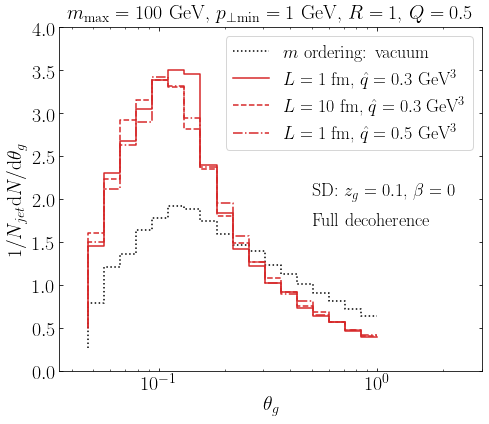

In [175]:
fig, ax = subplots()
figsize(7,6)

xbin=logspace(log10(4.*sqrt(pT2_min/t_max)), log10(R), 20)
ax.step(xbin[1:], h0[0]/(xbin[1:]-xbin[:-1]), linestyle=':', lw=1.5, color='k', label=r'$m$ ordering: vacuum')
ax.step(xbin[1:], h1[0]/(xbin[1:]-xbin[:-1]), linestyle='-', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.3$ GeV$^{3}$')
ax.step(xbin[1:], h2[0]/(xbin[1:]-xbin[:-1]), linestyle='--', lw=1.5, color='C3', label=r'$L=10$ fm, $\hat q=0.3$ GeV$^{3}$')
ax.step(xbin[1:], h3[0]/(xbin[1:]-xbin[:-1]), linestyle='-.', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.5$ GeV$^{3}$')

ax.set_xscale('log')
xlim(0.035,3)
ylim(0,4)
xlabel(r'$\theta_g$', fontsize=20)
ylabel(r'$1/N_{jet}\mathrm{d}N/\mathrm{d}\theta_g$', fontsize=20)
title(r'$m_{\rm max}=100$ GeV, $p_{\perp\rm min}=1$ GeV, $R=1$, $Q=0.5$', fontsize=20)
text(0.5, 2, r'SD: $z_g=0.1$, $\beta=0$', fontsize=18)
text(0.5, 1.7, r'Full decoherence', fontsize=18)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18, ncol=1,loc='upper right');
savefig("medium/N_thetag_shower_medium_full.pdf", bbox_inches="tight")
tight_layout()
show()

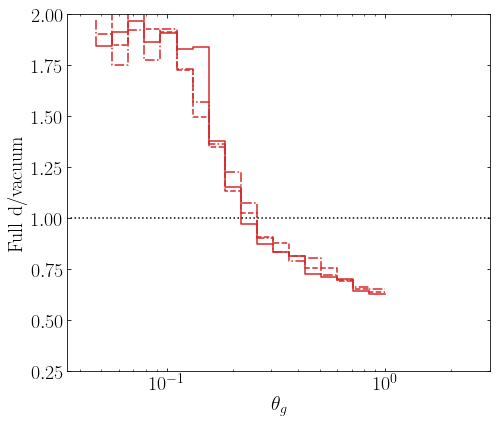

In [176]:
fig, ax = subplots()
figsize(7,4)

ax.step(xbin[1:], h1[0]/h0[0], linestyle='-', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.3$ GeV$^{3}$')
ax.step(xbin[1:], h2[0]/h0[0], linestyle='--', lw=1.5, color='C3', label=r'$L=10$ fm, $\hat q=0.3$ GeV$^{3}$')
ax.step(xbin[1:], h3[0]/h0[0], linestyle='-.', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.5$ GeV$^{3}$')
plot([0,12],[1,1],':', color='k')

ax.set_xscale('log')
xlim(0.035,3)
ylim(0.25,2.)
xlabel(r'$\theta_g$', fontsize=20)
ylabel(r'Full d/vacuum', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
#legend(fontsize=16,loc='upper right');
#savefig("medium/N_emission_shower_medium_full_ratio.pdf", bbox_inches="tight")
tight_layout()
show()

In [193]:
xbin=logspace(log10(4.*sqrt(pT2_min/t_max)*R), log10(R), 20)
h0 = ax.hist(SD_m_Rcut.T[4] ,             bins=xbin, weights=SD_m_Rcut.T[7]                        /sum(SD_m_Rcut.T[7]), histtype='step', linestyle=':', lw=1.5, color='k', label=r'$m$ ordering: vacuum')
h1 = ax.hist(SD_m_Rcut_list_full_1.T[4] , bins=xbin, weights=SD_m_Rcut_list_full_1.T[7]/sum(SD_m_Rcut_list_full_1.T[7]), histtype='step', linestyle='-', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.3$ GeV$^{-3}$')
h2 = ax.hist(SD_m_Rcut_list_full_2.T[4] , bins=xbin, weights=SD_m_Rcut_list_full_2.T[7]/sum(SD_m_Rcut_list_full_2.T[7]), histtype='step', linestyle='--', lw=1.5, color='C3', label=r'$L=10$ fm, $\hat q=0.3$ GeV$^{-3}$')
h3 = ax.hist(SD_m_Rcut_list_full_3.T[4] , bins=xbin, weights=SD_m_Rcut_list_full_3.T[7]/sum(SD_m_Rcut_list_full_3.T[7]), histtype='step', linestyle='-.', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.5$ GeV$^{-3}$')

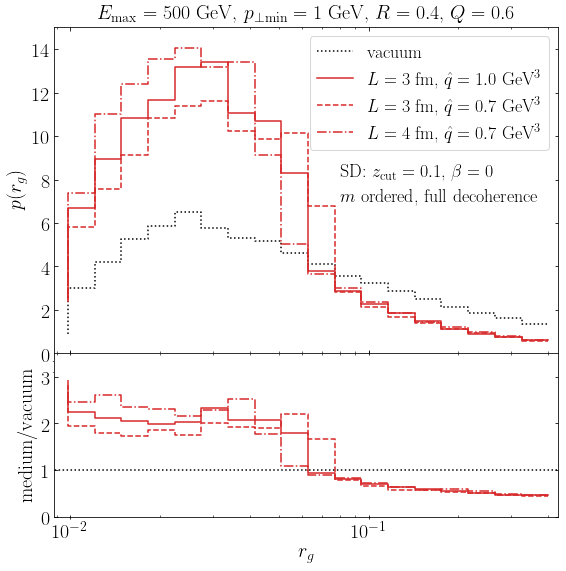

In [195]:
f = figure( figsize=(7,9) )
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0, right=1, wspace=0.0)
f.add_axes([0.2,0.175,0.75,0.75])
f.clf()
ax1 = plt.subplot(gs1[:-1, :])
title(r'$E_{\max}=500$ GeV, $p_{\perp\min}=1$ GeV, $R=0.4$, $Q=0.6$', fontsize=20)

ax2 = plt.subplot(gs1[-1, :])
ax1.xaxis.set_major_formatter( NullFormatter() )
ax1.set_xticklabels([])
f.subplots_adjust(wspace=0,hspace=0)

ax1.step(xbin[1:], h0[0]/(xbin[1:]-xbin[:-1]), linestyle=':', lw=1.5, color='k', label=r'vacuum')
ax1.step(xbin[1:], h1[0]/(xbin[1:]-xbin[:-1]), linestyle='-', lw=1.5, color='C3', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
ax1.step(xbin[1:], h2[0]/(xbin[1:]-xbin[:-1]), linestyle='--', lw=1.5, color='C3', label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
ax1.step(xbin[1:], h3[0]/(xbin[1:]-xbin[:-1]), linestyle='-.', lw=1.5, color='C3', label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')

ax2.step(xbin[1:], h1[0]/h0[0], linestyle='-', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.3$ GeV$^{3}$')
ax2.step(xbin[1:], h2[0]/h0[0], linestyle='--', lw=1.5, color='C3', label=r'$L=10$ fm, $\hat q=0.3$ GeV$^{3}$')
ax2.step(xbin[1:], h3[0]/h0[0], linestyle='-.', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.5$ GeV$^{3}$')
ax2.plot([0,12],[1,1],':', color='k')

ax1.text(0.08,8,r'SD: $z_{\rm cut}=0.1$, $\beta=0$', fontsize=18)
ax1.text(0.08,7,r'$m$ ordered, full decoherence', fontsize=18)
ax1.set_xscale('log')
ax1.set_xlim(0.0088,0.43)
ax1.set_ylim(0,15)
ax1.tick_params(which='both', direction='in', right=True, top=True, labelsize=20)
ax2.set_xscale('log')
ax2.set_xlim(0.0088,0.43)
ax2.set_ylim(0.25,3.5)
ax2.tick_params(axis='x', which='both', top=True, direction='inout', labelsize=20)
ax2.tick_params(axis='x', which='minor', direction='in', labelsize=20)
ax2.tick_params(axis='y', right=True, direction='in', labelsize=20)
ax2.set_yticks([0,1,2,3])
ax2.set_xlabel(r'$r_g$', fontsize=20)
ax1.set_ylabel(r'$p(r_g)$', fontsize=20)
ax2.set_ylabel(r'medium/vacuum', fontsize=20)
ax1.legend(fontsize=18,ncol=1,loc='upper right')
savefig("medium/N_thetag_m_shower_medium_full_ratio.pdf", bbox_inches="tight")
show()

In [196]:
xbin=logspace(log10(4.*sqrt(pT2_min/t_max)*R), log10(R), 20)
h0 = ax.hist(SD_pt_Rcut.T[4] ,             bins=xbin, weights=SD_pt_Rcut.T[7]                        /sum(SD_pt_Rcut.T[7]), histtype='step', linestyle=':', lw=1.5, color='k', label=r'$m$ ordering: vacuum')
h1 = ax.hist(SD_pt_Rcut_list_full_1.T[4] , bins=xbin, weights=SD_pt_Rcut_list_full_1.T[7]/sum(SD_pt_Rcut_list_full_1.T[7]), histtype='step', linestyle='-', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.3$ GeV$^{-3}$')
h2 = ax.hist(SD_pt_Rcut_list_full_2.T[4] , bins=xbin, weights=SD_pt_Rcut_list_full_2.T[7]/sum(SD_pt_Rcut_list_full_2.T[7]), histtype='step', linestyle='--', lw=1.5, color='C3', label=r'$L=10$ fm, $\hat q=0.3$ GeV$^{-3}$')
h3 = ax.hist(SD_pt_Rcut_list_full_3.T[4] , bins=xbin, weights=SD_pt_Rcut_list_full_3.T[7]/sum(SD_pt_Rcut_list_full_3.T[7]), histtype='step', linestyle='-.', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.5$ GeV$^{-3}$')

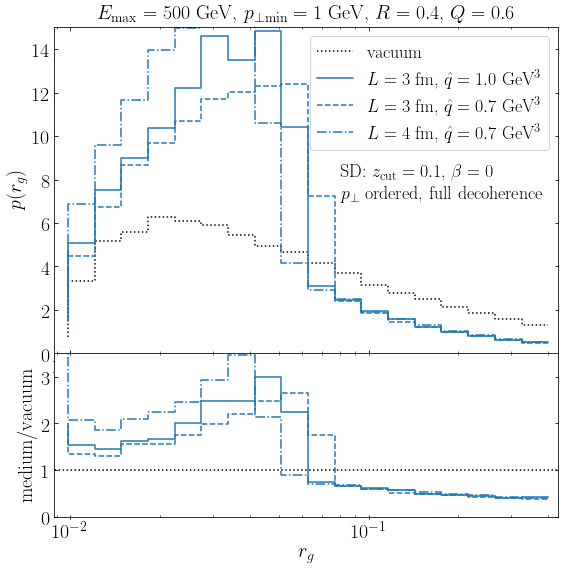

In [197]:
f = figure( figsize=(7,9) )
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0, right=1, wspace=0.0)
f.add_axes([0.2,0.175,0.75,0.75])
f.clf()
ax1 = plt.subplot(gs1[:-1, :])
title(r'$E_{\max}=500$ GeV, $p_{\perp\min}=1$ GeV, $R=0.4$, $Q=0.6$', fontsize=20)

ax2 = plt.subplot(gs1[-1, :])
ax1.xaxis.set_major_formatter( NullFormatter() )
ax1.set_xticklabels([])
f.subplots_adjust(wspace=0,hspace=0)

ax1.step(xbin[1:], h0[0]/(xbin[1:]-xbin[:-1]), linestyle=':', lw=1.5, color='k', label=r'vacuum')
ax1.step(xbin[1:], h1[0]/(xbin[1:]-xbin[:-1]), linestyle='-', lw=1.5, color='C0', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
ax1.step(xbin[1:], h2[0]/(xbin[1:]-xbin[:-1]), linestyle='--', lw=1.5, color='C0', label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
ax1.step(xbin[1:], h3[0]/(xbin[1:]-xbin[:-1]), linestyle='-.', lw=1.5, color='C0', label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')

ax2.step(xbin[1:], h1[0]/h0[0], linestyle='-', lw=1.5, color='C0', label=r'$L=1$ fm, $\hat q=0.3$ GeV$^{3}$')
ax2.step(xbin[1:], h2[0]/h0[0], linestyle='--', lw=1.5, color='C0', label=r'$L=10$ fm, $\hat q=0.3$ GeV$^{3}$')
ax2.step(xbin[1:], h3[0]/h0[0], linestyle='-.', lw=1.5, color='C0', label=r'$L=1$ fm, $\hat q=0.5$ GeV$^{3}$')
ax2.plot([0,12],[1,1],':', color='k')

ax1.text(0.08,8,r'SD: $z_{\rm cut}=0.1$, $\beta=0$', fontsize=18)
ax1.text(0.08,7,r'$p_{\perp}$ ordered, full decoherence', fontsize=18)
ax1.set_xscale('log')
ax1.set_xlim(0.0088,0.43)
ax1.set_ylim(0,15)
ax1.tick_params(which='both', direction='in', right=True, top=True, labelsize=20)
ax2.set_xscale('log')
ax2.set_xlim(0.0088,0.43)
ax2.set_ylim(0.25,3.5)
ax2.tick_params(axis='x', which='both', top=True, direction='inout', labelsize=20)
ax2.tick_params(axis='x', which='minor', direction='in', labelsize=20)
ax2.tick_params(axis='y', right=True, direction='in', labelsize=20)
ax2.set_yticks([0,1,2,3])
ax2.set_xlabel(r'$r_g$', fontsize=20)
ax1.set_ylabel(r'$p(r_g)$', fontsize=20)
ax2.set_ylabel(r'medium/vacuum', fontsize=20)
ax1.legend(fontsize=18,ncol=1,loc='upper right')
savefig("medium/N_thetag_pt_shower_medium_full_ratio.pdf", bbox_inches="tight")
show()

In [198]:
xbin=logspace(log10(4.*sqrt(pT2_min/t_max)*R), log10(R), 20)
h0 = ax.hist(SD_tf_Rcut.T[4] ,             bins=xbin, weights=SD_tf_Rcut.T[7]                        /sum(SD_tf_Rcut.T[7]), histtype='step', linestyle=':', lw=1.5, color='k', label=r'$m$ ordering: vacuum')
h1 = ax.hist(SD_tf_Rcut_list_full_1.T[4] , bins=xbin, weights=SD_tf_Rcut_list_full_1.T[7]/sum(SD_tf_Rcut_list_full_1.T[7]), histtype='step', linestyle='-', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.3$ GeV$^{-3}$')
h2 = ax.hist(SD_tf_Rcut_list_full_2.T[4] , bins=xbin, weights=SD_tf_Rcut_list_full_2.T[7]/sum(SD_tf_Rcut_list_full_2.T[7]), histtype='step', linestyle='--', lw=1.5, color='C3', label=r'$L=10$ fm, $\hat q=0.3$ GeV$^{-3}$')
h3 = ax.hist(SD_tf_Rcut_list_full_3.T[4] , bins=xbin, weights=SD_tf_Rcut_list_full_3.T[7]/sum(SD_tf_Rcut_list_full_3.T[7]), histtype='step', linestyle='-.', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.5$ GeV$^{-3}$')

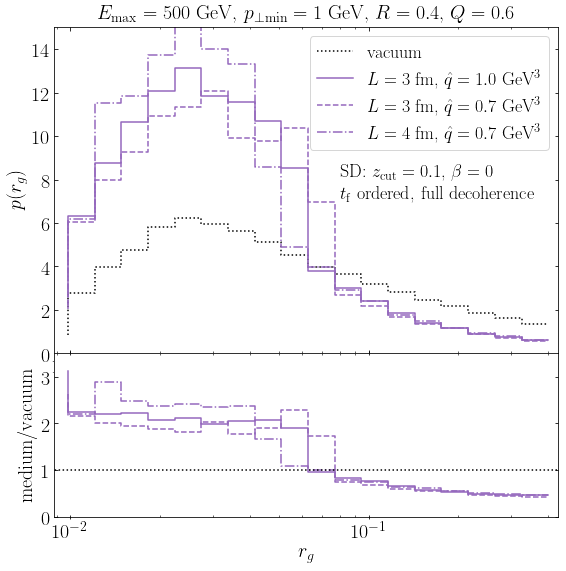

In [199]:
f = figure( figsize=(7,9) )
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0, right=1, wspace=0.0)
f.add_axes([0.2,0.175,0.75,0.75])
f.clf()
ax1 = plt.subplot(gs1[:-1, :])
title(r'$E_{\max}=500$ GeV, $p_{\perp\min}=1$ GeV, $R=0.4$, $Q=0.6$', fontsize=20)

ax2 = plt.subplot(gs1[-1, :])
ax1.xaxis.set_major_formatter( NullFormatter() )
ax1.set_xticklabels([])
f.subplots_adjust(wspace=0,hspace=0)

ax1.step(xbin[1:], h0[0]/(xbin[1:]-xbin[:-1]), linestyle=':', lw=1.5, color='k', label=r'vacuum')
ax1.step(xbin[1:], h1[0]/(xbin[1:]-xbin[:-1]), linestyle='-', lw=1.5, color='C4', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
ax1.step(xbin[1:], h2[0]/(xbin[1:]-xbin[:-1]), linestyle='--', lw=1.5, color='C4', label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
ax1.step(xbin[1:], h3[0]/(xbin[1:]-xbin[:-1]), linestyle='-.', lw=1.5, color='C4', label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')

ax2.step(xbin[1:], h1[0]/h0[0], linestyle='-', lw=1.5, color='C4', label=r'$L=1$ fm, $\hat q=0.3$ GeV$^{3}$')
ax2.step(xbin[1:], h2[0]/h0[0], linestyle='--', lw=1.5, color='C4', label=r'$L=10$ fm, $\hat q=0.3$ GeV$^{3}$')
ax2.step(xbin[1:], h3[0]/h0[0], linestyle='-.', lw=1.5, color='C4', label=r'$L=1$ fm, $\hat q=0.5$ GeV$^{3}$')
ax2.plot([0,12],[1,1],':', color='k')

ax1.text(0.08,8,r'SD: $z_{\rm cut}=0.1$, $\beta=0$', fontsize=18)
ax1.text(0.08,7,r'$t_{\rm f}$ ordered, full decoherence', fontsize=18)
ax1.set_xscale('log')
ax1.set_xlim(0.0088,0.43)
ax1.set_ylim(0,15)
ax1.tick_params(which='both', direction='in', right=True, top=True, labelsize=20)
ax2.set_xscale('log')
ax2.set_xlim(0.0088,0.43)
ax2.set_ylim(0.25,3.5)
ax2.tick_params(axis='x', which='both', top=True, direction='inout', labelsize=20)
ax2.tick_params(axis='x', which='minor', direction='in', labelsize=20)
ax2.tick_params(axis='y', right=True, direction='in', labelsize=20)
ax2.set_yticks([0,1,2,3])
ax2.set_xlabel(r'$r_g$', fontsize=20)
ax1.set_ylabel(r'$p(r_g)$', fontsize=20)
ax2.set_ylabel(r'medium/vacuum', fontsize=20)
ax1.legend(fontsize=18,ncol=1,loc='upper right')
savefig("medium/N_thetag_tf_shower_medium_full_ratio.pdf", bbox_inches="tight")
show()

In [200]:
xbin=logspace(log10(4.*sqrt(pT2_min/t_max)*R), log10(R), 20)
h0 = ax.hist(SD_theta.T[4] ,             bins=xbin, weights=SD_theta.T[7]                        /sum(SD_theta.T[7]), histtype='step', linestyle=':', lw=1.5, color='k', label=r'$m$ ordering: vacuum')
h1 = ax.hist(SD_theta_list_full_1.T[4] , bins=xbin, weights=SD_theta_list_full_1.T[7]/sum(SD_theta_list_full_1.T[7]), histtype='step', linestyle='-', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.3$ GeV$^{-3}$')
h2 = ax.hist(SD_theta_list_full_2.T[4] , bins=xbin, weights=SD_theta_list_full_2.T[7]/sum(SD_theta_list_full_2.T[7]), histtype='step', linestyle='--', lw=1.5, color='C3', label=r'$L=10$ fm, $\hat q=0.3$ GeV$^{-3}$')
h3 = ax.hist(SD_theta_list_full_3.T[4] , bins=xbin, weights=SD_theta_list_full_3.T[7]/sum(SD_theta_list_full_3.T[7]), histtype='step', linestyle='-.', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.5$ GeV$^{-3}$')

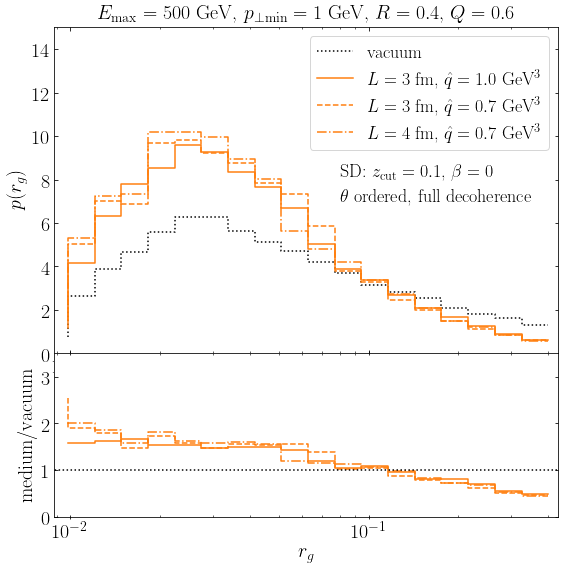

In [201]:
f = figure( figsize=(7,9) )
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0, right=1, wspace=0.0)
f.add_axes([0.2,0.175,0.75,0.75])
f.clf()
ax1 = plt.subplot(gs1[:-1, :])
title(r'$E_{\max}=500$ GeV, $p_{\perp\min}=1$ GeV, $R=0.4$, $Q=0.6$', fontsize=20)

ax2 = plt.subplot(gs1[-1, :])
ax1.xaxis.set_major_formatter( NullFormatter() )
ax1.set_xticklabels([])
f.subplots_adjust(wspace=0,hspace=0)

ax1.step(xbin[1:], h0[0]/(xbin[1:]-xbin[:-1]), linestyle=':', lw=1.5, color='k', label=r'vacuum')
ax1.step(xbin[1:], h1[0]/(xbin[1:]-xbin[:-1]), linestyle='-', lw=1.5, color='C1', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
ax1.step(xbin[1:], h2[0]/(xbin[1:]-xbin[:-1]), linestyle='--', lw=1.5, color='C1', label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
ax1.step(xbin[1:], h3[0]/(xbin[1:]-xbin[:-1]), linestyle='-.', lw=1.5, color='C1', label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')

ax2.step(xbin[1:], h1[0]/h0[0], linestyle='-', lw=1.5, color='C1', label=r'$L=1$ fm, $\hat q=0.3$ GeV$^{3}$')
ax2.step(xbin[1:], h2[0]/h0[0], linestyle='--', lw=1.5, color='C1', label=r'$L=10$ fm, $\hat q=0.3$ GeV$^{3}$')
ax2.step(xbin[1:], h3[0]/h0[0], linestyle='-.', lw=1.5, color='C1', label=r'$L=1$ fm, $\hat q=0.5$ GeV$^{3}$')
ax2.plot([0,12],[1,1],':', color='k')

ax1.text(0.08,8,r'SD: $z_{\rm cut}=0.1$, $\beta=0$', fontsize=18)
ax1.text(0.08,7,r'$\theta$ ordered, full decoherence', fontsize=18)
ax1.set_xscale('log')
ax1.set_xlim(0.0088,0.43)
ax1.set_ylim(0,15)
ax1.tick_params(which='both', direction='in', right=True, top=True, labelsize=20)
ax2.set_xscale('log')
ax2.set_xlim(0.0088,0.43)
ax2.set_ylim(0.25,3.5)
ax2.tick_params(axis='x', which='both', top=True, direction='inout', labelsize=20)
ax2.tick_params(axis='x', which='minor', direction='in', labelsize=20)
ax2.tick_params(axis='y', right=True, direction='in', labelsize=20)
ax2.set_yticks([0,1,2,3])
ax2.set_xlabel(r'$r_g$', fontsize=20)
ax1.set_ylabel(r'$p(r_g)$', fontsize=20)
ax2.set_ylabel(r'medium/vacuum', fontsize=20)
ax1.legend(fontsize=18,ncol=1,loc='upper right')
savefig("medium/N_thetag_theta_shower_medium_full_ratio.pdf", bbox_inches="tight")
show()

In [202]:
xbin=logspace(log10(4.*sqrt(pT2_min/t_max)*R), log10(R), 20)
h01 = ax.hist(SD_m_Rcut.T[4] ,             bins=xbin, weights=SD_m_Rcut.T[7]             /sum(SD_m_Rcut.T[7]), histtype='step', linestyle=':', lw=1.5, color='k', label=r'$m$ ordering: vacuum')
h02 = ax.hist(SD_pt_Rcut.T[4] ,            bins=xbin, weights=SD_pt_Rcut.T[7]            /sum(SD_pt_Rcut.T[7]), histtype='step', linestyle=':', lw=1.5, color='k', label=r'$m$ ordering: vacuum')
h03 = ax.hist(SD_tf_Rcut.T[4] ,            bins=xbin, weights=SD_tf_Rcut.T[7]            /sum(SD_tf_Rcut.T[7]), histtype='step', linestyle=':', lw=1.5, color='k', label=r'$m$ ordering: vacuum')
h04 = ax.hist(SD_theta.T[4] ,              bins=xbin, weights=SD_theta.T[7]              /sum(SD_theta.T[7]), histtype='step', linestyle=':', lw=1.5, color='k', label=r'$m$ ordering: vacuum')
h11 = ax.hist(SD_m_Rcut_list_full_1.T[4] , bins=xbin, weights=SD_m_Rcut_list_full_1.T[7] /sum(SD_m_Rcut_list_full_1.T[7]), histtype='step', linestyle='-', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.3$ GeV$^{-3}$')
h21 = ax.hist(SD_pt_Rcut_list_full_1.T[4], bins=xbin, weights=SD_pt_Rcut_list_full_1.T[7]/sum(SD_pt_Rcut_list_full_1.T[7]), histtype='step', linestyle='-', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.3$ GeV$^{-3}$')
h31 = ax.hist(SD_tf_Rcut_list_full_1.T[4], bins=xbin, weights=SD_tf_Rcut_list_full_1.T[7]/sum(SD_tf_Rcut_list_full_1.T[7]), histtype='step', linestyle='-', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.3$ GeV$^{-3}$')
h41 = ax.hist(SD_theta_list_full_1.T[4]  , bins=xbin, weights=SD_theta_list_full_1.T[7]  /sum(SD_theta_list_full_1.T[7]), histtype='step', linestyle='--', lw=1.5, color='C3', label=r'$L=10$ fm, $\hat q=0.3$ GeV$^{-3}$')

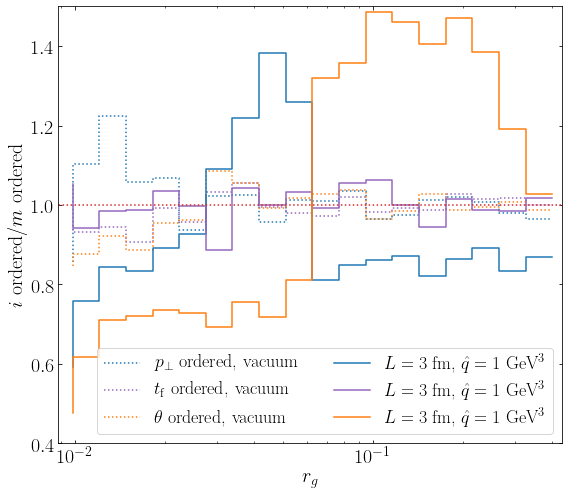

In [207]:
fig, ax = subplots()
figsize(8,7)

ax.step(xbin[1:], h02[0]/h01[0], linestyle=':', lw=1.5, color='C0', label=r'$p_{\perp}$ ordered, vacuum')
ax.step(xbin[1:], h03[0]/h01[0], linestyle=':', lw=1.5, color='C4', label=r'$t_{\rm f}$ ordered, vacuum')
ax.step(xbin[1:], h04[0]/h01[0], linestyle=':', lw=1.5, color='C1', label=r'$\theta$ ordered, vacuum')
ax.step(xbin[1:], h21[0]/h11[0], linestyle='-', lw=1.5, color='C0', label=r'$L=3$ fm, $\hat q=1$ GeV$^{3}$')
ax.step(xbin[1:], h31[0]/h11[0], linestyle='-', lw=1.5, color='C4', label=r'$L=3$ fm, $\hat q=1$ GeV$^{3}$')
ax.step(xbin[1:], h41[0]/h11[0], linestyle='-', lw=1.5, color='C1', label=r'$L=3$ fm, $\hat q=1$ GeV$^{3}$')
plot([0,12],[1,1],':', color='C3')

ax.set_xscale('log')
xlim(0.0088,0.43)
ylim(0.4,1.5)
xlabel(r'$r_g$', fontsize=20)
ylabel(r'$i$ ordered/$m$ ordered', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18, ncol=2,loc='lower right');
savefig("medium/N_thetag_shower_medium_full_ratio2.pdf", bbox_inches="tight")
tight_layout()
show()

#### Groomed momentum sharing

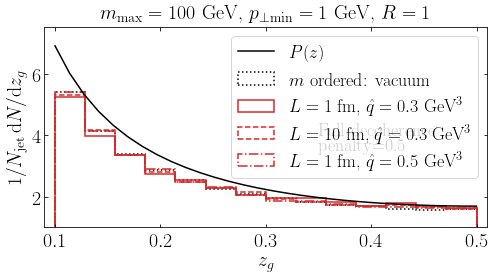

In [186]:
fig, ax = subplots()
figsize(7,6)

xbin=linspace(z_cut, 0.5,15)
h0 = ax.hist(1.-SD_m_Rcut.T[1]                        , bins=xbin, weights=ones(len(SD_m_Rcut))                  /len(SD_m_Rcut)                             /(0.5-z_cut)*14., histtype='step', linestyle=':', lw=1.5,  color='k',  label=r'$m$ ordered: vacuum')
h1 = ax.hist(1.-SD_m_Rcut_list_full_1.T[1] , bins=xbin, weights=SD_m_Rcut_list_full_1.T[7] /sum(SD_m_Rcut_list_full_1.T[7]) /(0.5-z_cut)*14., histtype='step', linestyle='-', lw=1.5,  color='C3', label=r'$L=1$ fm, $\hat q=0.3$ GeV$^{3}$')
h2 = ax.hist(1.-SD_m_Rcut_list_full_2.T[1], bins=xbin, weights=SD_m_Rcut_list_full_2.T[7]/sum(SD_m_Rcut_list_full_2.T[7])/(0.5-z_cut)*14., histtype='step', linestyle='--', lw=1.5, color='C3', label=r'$L=10$ fm, $\hat q=0.3$ GeV$^{3}$')
h3 = ax.hist(1.-SD_m_Rcut_list_full_3.T[1] , bins=xbin, weights=SD_m_Rcut_list_full_3.T[7] /sum(SD_m_Rcut_list_full_3.T[7]) /(0.5-z_cut)*14., histtype='step', linestyle='-.', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.5$ GeV$^{3}$')

xbin=linspace(z_cut, 0.5,30)
plot(xbin, 0.25*P_gg(xbin), 'k-',lw=1.5, label=r'$P(z)$')

xlim(0.09,0.51)
ylim(1,7.5)
xlabel(r'$z_g$', fontsize=20)
title(r'$m_{\max}=100$ GeV, $p_{\perp\min}=1$ GeV, $R=1$',fontsize=20)
ylabel(r'$1/N_{\rm jet}\,\mathrm{d}N/\mathrm{d}z_g$', fontsize=20)
text(0.35,4,r'Full decoherence', fontsize=18)
text(0.35,3.5,r'penalty=0.5', fontsize=18)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18,loc='upper right');
#savefig("medium/N_zg_shower_medium_full.pdf", bbox_inches="tight")
tight_layout()
show()

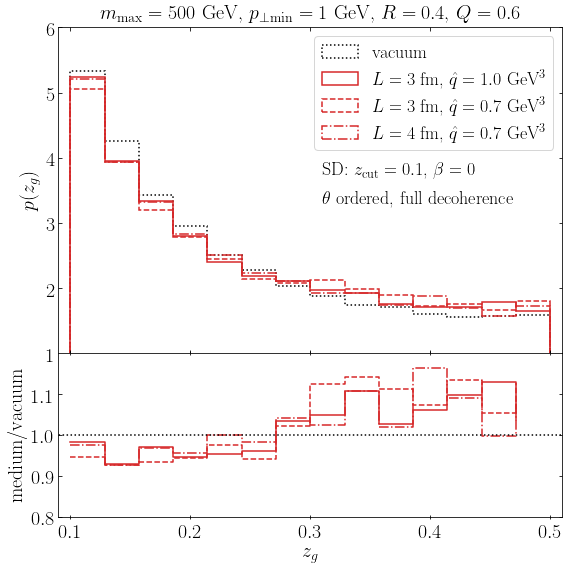

In [209]:
f = figure( figsize=(7,9) )
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0, right=1, wspace=0.0)
f.add_axes([0.2,0.175,0.75,0.75])
f.clf()
ax1 = plt.subplot(gs1[:-1, :])
title(r'$m_{\max}=500$ GeV, $p_{\perp\min}=1$ GeV, $R=0.4$, $Q=0.6$', fontsize=20)

ax2 = plt.subplot(gs1[-1, :])
ax1.xaxis.set_major_formatter( NullFormatter() )
f.subplots_adjust(wspace=0,hspace=0)

xbin=linspace(z_cut, 0.5,15)
h0 = ax1.hist(1.-SD_m_Rcut.T[1]            , bins=xbin, weights=ones(len(SD_m_Rcut))      /len(SD_m_Rcut)                 /(0.5-z_cut)*14., histtype='step', linestyle=':', lw=1.5,  color='k',  label=r'vacuum')
h1 = ax1.hist(1.-SD_m_Rcut_list_full_1.T[1], bins=xbin, weights=SD_m_Rcut_list_full_1.T[7]/sum(SD_m_Rcut_list_full_1.T[7])/(0.5-z_cut)*14., histtype='step', linestyle='-', lw=1.5,  color='C3', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
h2 = ax1.hist(1.-SD_m_Rcut_list_full_2.T[1], bins=xbin, weights=SD_m_Rcut_list_full_2.T[7]/sum(SD_m_Rcut_list_full_2.T[7])/(0.5-z_cut)*14., histtype='step', linestyle='--', lw=1.5, color='C3', label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
h3 = ax1.hist(1.-SD_m_Rcut_list_full_3.T[1], bins=xbin, weights=SD_m_Rcut_list_full_3.T[7]/sum(SD_m_Rcut_list_full_3.T[7])/(0.5-z_cut)*14., histtype='step', linestyle='-.', lw=1.5, color='C3', label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')

ax2.step(h0[1][:-1], h1[0]/h0[0], where='post', c='C3', linestyle='-')
ax2.step(h0[1][:-1], h2[0]/h0[0], where='post', c='C3', linestyle='--')
ax2.step(h0[1][:-1], h3[0]/h0[0], where='post', c='C3', linestyle='-.')
ax2.plot([0,12],[1,1],':', color='k')

ax1.text(0.31,3.7,r'SD: $z_{\rm cut}=0.1$, $\beta=0$', fontsize=18)
ax1.text(0.31,3.3,r'$\theta$ ordered, full decoherence', fontsize=18)
ax1.set_xlim(0.09,0.51)
ax1.set_ylim(1,6)
ax1.tick_params(which='both', left=True, direction='in', right=True, top=True, labelsize=20)
ax2.set_xlim(0.09,0.51)
ax2.set_ylim(0.8,1.2)
ax2.tick_params(axis='x', which='both', top=True, direction='inout', labelsize=20)
ax2.tick_params(axis='x', which='minor', direction='in', labelsize=20)
ax2.tick_params(axis='y', right=True, direction='in', labelsize=20)
ax2.set_yticks([0.8,0.9,1,1.1])
ax2.set_xlabel(r'$z_g$', fontsize=20)
ax1.set_ylabel(r'$p(z_g)$', fontsize=20)
ax2.set_ylabel(r'medium/vacuum', fontsize=20)
ax1.legend(fontsize=18,ncol=1,loc='upper right')
savefig("medium/N_zg_m_shower_medium_full_ratio.pdf", bbox_inches="tight")
show()

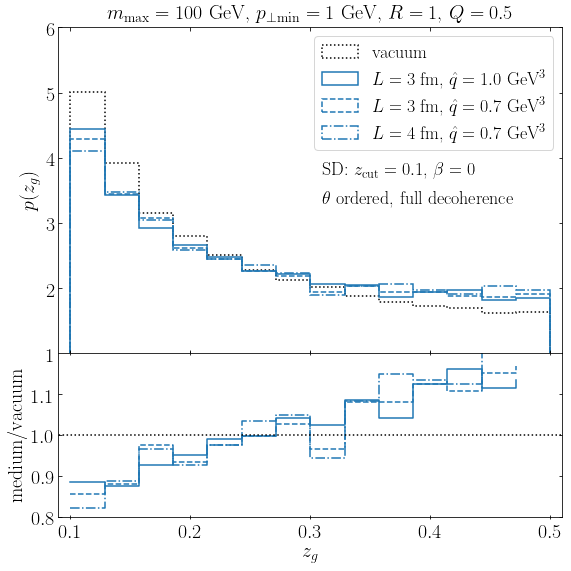

In [210]:
f = figure( figsize=(7,9) )
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0, right=1, wspace=0.0)
f.add_axes([0.2,0.175,0.75,0.75])
f.clf()
ax1 = plt.subplot(gs1[:-1, :])
title(r'$m_{\max}=100$ GeV, $p_{\perp\min}=1$ GeV, $R=1$, $Q=0.5$', fontsize=20)

ax2 = plt.subplot(gs1[-1, :])
ax1.xaxis.set_major_formatter( NullFormatter() )
f.subplots_adjust(wspace=0,hspace=0)

xbin=linspace(z_cut, 0.5,15)
h0 = ax1.hist(1.-SD_pt_Rcut.T[1]            , bins=xbin, weights=ones(len(SD_pt_Rcut))      /len(SD_pt_Rcut)                 /(0.5-z_cut)*14., histtype='step', linestyle=':', lw=1.5,  color='k',  label=r'vacuum')
h1 = ax1.hist(1.-SD_pt_Rcut_list_full_1.T[1], bins=xbin, weights=SD_pt_Rcut_list_full_1.T[7]/sum(SD_pt_Rcut_list_full_1.T[7])/(0.5-z_cut)*14., histtype='step', linestyle='-', lw=1.5,  color='C0', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
h2 = ax1.hist(1.-SD_pt_Rcut_list_full_2.T[1], bins=xbin, weights=SD_pt_Rcut_list_full_2.T[7]/sum(SD_pt_Rcut_list_full_2.T[7])/(0.5-z_cut)*14., histtype='step', linestyle='--', lw=1.5, color='C0', label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
h3 = ax1.hist(1.-SD_pt_Rcut_list_full_3.T[1], bins=xbin, weights=SD_pt_Rcut_list_full_3.T[7]/sum(SD_pt_Rcut_list_full_3.T[7])/(0.5-z_cut)*14., histtype='step', linestyle='-.', lw=1.5, color='C0', label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')

ax2.step(h0[1][:-1], h1[0]/h0[0], where='post', c='C0', linestyle='-')
ax2.step(h0[1][:-1], h2[0]/h0[0], where='post', c='C0', linestyle='--')
ax2.step(h0[1][:-1], h3[0]/h0[0], where='post', c='C0', linestyle='-.')
ax2.plot([0,12],[1,1],':', color='k')

ax1.text(0.31,3.7,r'SD: $z_{\rm cut}=0.1$, $\beta=0$', fontsize=18)
ax1.text(0.31,3.3,r'$\theta$ ordered, full decoherence', fontsize=18)
ax1.set_xlim(0.09,0.51)
ax1.set_ylim(1,6)
ax1.tick_params(which='both', left=True, direction='in', right=True, top=True, labelsize=20)
ax2.set_xlim(0.09,0.51)
ax2.set_ylim(0.8,1.2)
ax2.tick_params(axis='x', which='both', top=True, direction='inout', labelsize=20)
ax2.tick_params(axis='x', which='minor', direction='in', labelsize=20)
ax2.tick_params(axis='y', right=True, direction='in', labelsize=20)
ax2.set_yticks([0.8,0.9,1,1.1])
ax2.set_xlabel(r'$z_g$', fontsize=20)
ax1.set_ylabel(r'$p(z_g)$', fontsize=20)
ax2.set_ylabel(r'medium/vacuum', fontsize=20)
ax1.legend(fontsize=18,ncol=1,loc='upper right')
savefig("medium/N_zg_pt_shower_medium_full_ratio.pdf", bbox_inches="tight")
show()

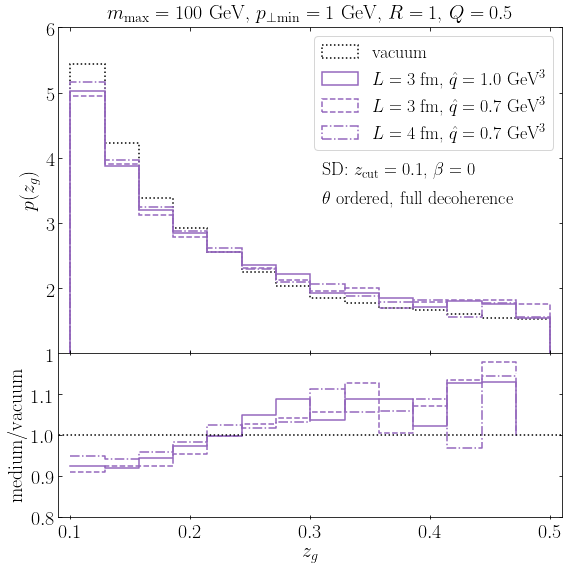

In [211]:
f = figure( figsize=(7,9) )
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0, right=1, wspace=0.0)
f.add_axes([0.2,0.175,0.75,0.75])
f.clf()
ax1 = plt.subplot(gs1[:-1, :])
title(r'$m_{\max}=100$ GeV, $p_{\perp\min}=1$ GeV, $R=1$, $Q=0.5$', fontsize=20)

ax2 = plt.subplot(gs1[-1, :])
ax1.xaxis.set_major_formatter( NullFormatter() )
f.subplots_adjust(wspace=0,hspace=0)

xbin=linspace(z_cut, 0.5,15)
h0 = ax1.hist(1.-SD_tf_Rcut.T[1]            , bins=xbin, weights=ones(len(SD_tf_Rcut))      /len(SD_tf_Rcut)                 /(0.5-z_cut)*14., histtype='step', linestyle=':', lw=1.5,  color='k',  label=r'vacuum')
h1 = ax1.hist(1.-SD_tf_Rcut_list_full_1.T[1], bins=xbin, weights=SD_tf_Rcut_list_full_1.T[7]/sum(SD_tf_Rcut_list_full_1.T[7])/(0.5-z_cut)*14., histtype='step', linestyle='-', lw=1.5,  color='C4', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
h2 = ax1.hist(1.-SD_tf_Rcut_list_full_2.T[1], bins=xbin, weights=SD_tf_Rcut_list_full_2.T[7]/sum(SD_tf_Rcut_list_full_2.T[7])/(0.5-z_cut)*14., histtype='step', linestyle='--', lw=1.5, color='C4', label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
h3 = ax1.hist(1.-SD_tf_Rcut_list_full_3.T[1], bins=xbin, weights=SD_tf_Rcut_list_full_3.T[7]/sum(SD_tf_Rcut_list_full_3.T[7])/(0.5-z_cut)*14., histtype='step', linestyle='-.', lw=1.5, color='C4', label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')

ax2.step(h0[1][:-1], h1[0]/h0[0], where='post', c='C4', linestyle='-')
ax2.step(h0[1][:-1], h2[0]/h0[0], where='post', c='C4', linestyle='--')
ax2.step(h0[1][:-1], h3[0]/h0[0], where='post', c='C4', linestyle='-.')
ax2.plot([0,12],[1,1],':', color='k')

ax1.text(0.31,3.7,r'SD: $z_{\rm cut}=0.1$, $\beta=0$', fontsize=18)
ax1.text(0.31,3.3,r'$\theta$ ordered, full decoherence', fontsize=18)
ax1.set_xlim(0.09,0.51)
ax1.set_ylim(1,6)
ax1.tick_params(which='both', left=True, direction='in', right=True, top=True, labelsize=20)
ax2.set_xlim(0.09,0.51)
ax2.set_ylim(0.8,1.2)
ax2.tick_params(axis='x', which='both', top=True, direction='inout', labelsize=20)
ax2.tick_params(axis='x', which='minor', direction='in', labelsize=20)
ax2.tick_params(axis='y', right=True, direction='in', labelsize=20)
ax2.set_yticks([0.8,0.9,1,1.1])
ax2.set_xlabel(r'$z_g$', fontsize=20)
ax1.set_ylabel(r'$p(z_g)$', fontsize=20)
ax2.set_ylabel(r'medium/vacuum', fontsize=20)
ax1.legend(fontsize=18,ncol=1,loc='upper right')
savefig("medium/N_zg_tf_shower_medium_full_ratio.pdf", bbox_inches="tight")
show()

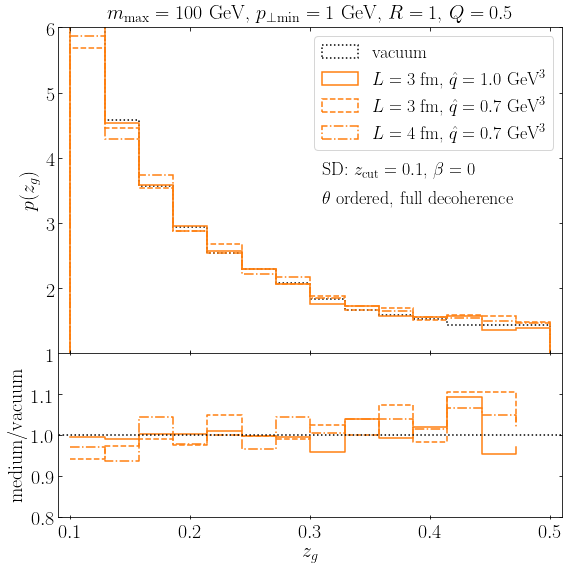

In [212]:
f = figure( figsize=(7,9) )
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0, right=1, wspace=0.0)
f.add_axes([0.2,0.175,0.75,0.75])
f.clf()
ax1 = plt.subplot(gs1[:-1, :])
title(r'$m_{\max}=100$ GeV, $p_{\perp\min}=1$ GeV, $R=1$, $Q=0.5$', fontsize=20)

ax2 = plt.subplot(gs1[-1, :])
ax1.xaxis.set_major_formatter( NullFormatter() )
f.subplots_adjust(wspace=0,hspace=0)

xbin=linspace(z_cut, 0.5,15)
h0 = ax1.hist(1.-SD_theta.T[1]            , bins=xbin, weights=ones(len(SD_theta))      /len(SD_theta)                 /(0.5-z_cut)*14., histtype='step', linestyle=':', lw=1.5,  color='k',  label=r'vacuum')
h1 = ax1.hist(1.-SD_theta_list_full_1.T[1], bins=xbin, weights=SD_theta_list_full_1.T[7]/sum(SD_theta_list_full_1.T[7])/(0.5-z_cut)*14., histtype='step', linestyle='-', lw=1.5,  color='C1', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
h2 = ax1.hist(1.-SD_theta_list_full_2.T[1], bins=xbin, weights=SD_theta_list_full_2.T[7]/sum(SD_theta_list_full_2.T[7])/(0.5-z_cut)*14., histtype='step', linestyle='--', lw=1.5, color='C1', label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
h3 = ax1.hist(1.-SD_theta_list_full_3.T[1], bins=xbin, weights=SD_theta_list_full_3.T[7]/sum(SD_theta_list_full_3.T[7])/(0.5-z_cut)*14., histtype='step', linestyle='-.', lw=1.5, color='C1', label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')

ax2.step(h0[1][:-1], h1[0]/h0[0], where='post', c='C1', linestyle='-')
ax2.step(h0[1][:-1], h2[0]/h0[0], where='post', c='C1', linestyle='--')
ax2.step(h0[1][:-1], h3[0]/h0[0], where='post', c='C1', linestyle='-.')
ax2.plot([0,12],[1,1],':', color='k')

ax1.text(0.31,3.7,r'SD: $z_{\rm cut}=0.1$, $\beta=0$', fontsize=18)
ax1.text(0.31,3.3,r'$\theta$ ordered, full decoherence', fontsize=18)
ax1.set_xlim(0.09,0.51)
ax1.set_ylim(1,6)
ax1.tick_params(which='both', left=True, direction='in', right=True, top=True, labelsize=20)
ax2.set_xlim(0.09,0.51)
ax2.set_ylim(0.8,1.2)
ax2.tick_params(axis='x', which='both', top=True, direction='inout', labelsize=20)
ax2.tick_params(axis='x', which='minor', direction='in', labelsize=20)
ax2.tick_params(axis='y', right=True, direction='in', labelsize=20)
ax2.set_yticks([0.8,0.9,1,1.1])
ax2.set_xlabel(r'$z_g$', fontsize=20)
ax1.set_ylabel(r'$p(z_g)$', fontsize=20)
ax2.set_ylabel(r'medium/vacuum', fontsize=20)
ax1.legend(fontsize=18,ncol=1,loc='upper right')
savefig("medium/N_zg_theta_shower_medium_full_ratio.pdf", bbox_inches="tight")
show()

In [213]:
h01 = ax1.hist(1.-SD_m_Rcut.T[1] , bins=xbin, weights=ones(len(SD_m_Rcut)) /len(SD_m_Rcut) /(0.5-z_cut)*14., histtype='step', linestyle=':', lw=1.5,  color='k',  label=r'vacuum')
h02 = ax1.hist(1.-SD_pt_Rcut.T[1], bins=xbin, weights=ones(len(SD_pt_Rcut))/len(SD_pt_Rcut)/(0.5-z_cut)*14., histtype='step', linestyle=':', lw=1.5,  color='k',  label=r'vacuum')
h03 = ax1.hist(1.-SD_tf_Rcut.T[1], bins=xbin, weights=ones(len(SD_tf_Rcut))/len(SD_tf_Rcut)/(0.5-z_cut)*14., histtype='step', linestyle=':', lw=1.5,  color='k',  label=r'vacuum')
h04 = ax1.hist(1.-SD_theta.T[1]  , bins=xbin, weights=ones(len(SD_theta))  /len(SD_theta)  /(0.5-z_cut)*14., histtype='step', linestyle=':', lw=1.5,  color='k',  label=r'vacuum')
h11 = ax1.hist(1.-SD_m_Rcut_list_full_1.T[1],  bins=xbin, weights=SD_m_Rcut_list_full_1.T[7]/sum(SD_m_Rcut_list_full_1.T[7])/(0.5-z_cut)*14., histtype='step', linestyle='-', lw=1.5,  color='C1', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
h21 = ax1.hist(1.-SD_pt_Rcut_list_full_1.T[1], bins=xbin, weights=SD_pt_Rcut_list_full_1.T[7]/sum(SD_pt_Rcut_list_full_1.T[7])/(0.5-z_cut)*14., histtype='step', linestyle='-', lw=1.5,  color='C1', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
h31 = ax1.hist(1.-SD_tf_Rcut_list_full_1.T[1], bins=xbin, weights=SD_tf_Rcut_list_full_1.T[7]/sum(SD_tf_Rcut_list_full_1.T[7])/(0.5-z_cut)*14., histtype='step', linestyle='-', lw=1.5,  color='C1', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
h41 = ax1.hist(1.-SD_theta_list_full_1.T[1],   bins=xbin, weights=SD_theta_list_full_1.T[7]/sum(SD_theta_list_full_1.T[7])/(0.5-z_cut)*14., histtype='step', linestyle='-', lw=1.5,  color='C1', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')

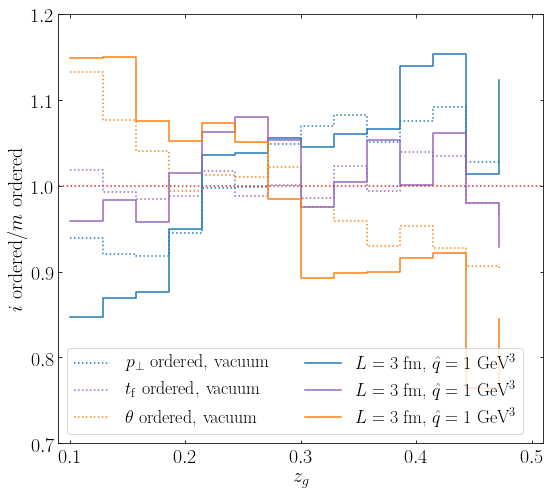

In [214]:
fig, ax = subplots()
figsize(8,7)

xbin=linspace(0.5,11.5,12)
step(h01[1][:-1], h02[0]/h01[0], where='post', c='C0', linestyle=':', label=r'$p_{\perp}$ ordered, vacuum')
step(h01[1][:-1], h03[0]/h01[0], where='post', c='C4', linestyle=':', label=r'$t_{\rm f}$ ordered, vacuum')
step(h01[1][:-1], h04[0]/h01[0], where='post', c='C1', linestyle=':', label=r'$\theta$ ordered, vacuum')

step(h01[1][:-1], h21[0]/h11[0], where='post', c='C0', linestyle='-', label=r'$L=3$ fm, $\hat q=1$ GeV$^3$')
step(h01[1][:-1], h31[0]/h11[0], where='post', c='C4', linestyle='-', label=r'$L=3$ fm, $\hat q=1$ GeV$^3$')
step(h01[1][:-1], h41[0]/h11[0], where='post', c='C1', linestyle='-', label=r'$L=3$ fm, $\hat q=1$ GeV$^3$')
plot([0,12],[1,1],':', color='C3')

xlim(0.09,0.51)
ylim(0.7,1.2)
xlabel(r'$z_g$', fontsize=20)
ylabel(r'$i$ ordered/$m$ ordered', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18,ncol=2,loc='lower left');
savefig("medium/N_zg_shower_medium_full_ratio2.pdf", bbox_inches="tight")
tight_layout()
show()

In [271]:
xbins=linspace(min(SD_m_Rcut.T[4]), R, 20)
ybins=linspace(min(1.-SD_m_Rcut.T[1]), 0.5, 20)
h0 = ax.hist2d(SD_m_Rcut.T[4], 1.-SD_m_Rcut.T[1], bins=(xbins, ybins), weights=SD_m_Rcut.T[7]/sum(SD_m_Rcut.T[7]))
h  = ax.hist2d(SD_m_Rcut_list_full_1.T[4],  1.-SD_m_Rcut_list_full_1.T[1],  bins=(xbins, ybins), weights=SD_m_Rcut_list_full_1.T[7]/ sum(SD_m_Rcut.T[7]))

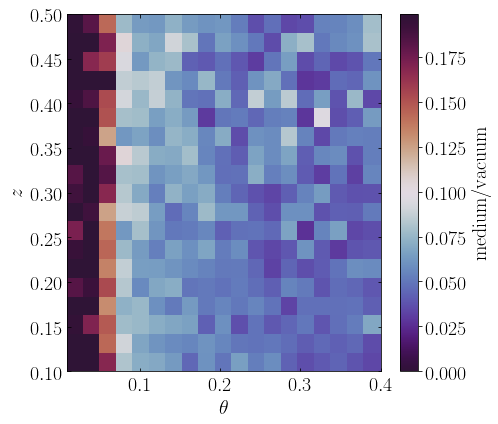

In [272]:
fig, ax = subplots()
figsize(7,6)

ratio = pcolormesh(h[1],h[2],h[0].T/h0[0].T, cmap='twilight_shifted', vmin=0, vmax=2.*sum(SD_m_Rcut_list_full_1.T[7])/sum(SD_m_Rcut.T[7]))

cbar = colorbar(ratio, ax=ax)
#ax.set_xscale('log')
#ax.set_yscale('log')
#xlim(0.75/R,2e2)
#ylim(sqrt(0.65),7e1)
ylabel(r'$z$', fontsize=20)
xlabel(r'$\theta$', fontsize=20)
cbar.set_label(r"medium/vacuum", fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("medium/LundPlane_t_ordered_pt_R_cut_fulld_ratio.pdf", bbox_inches="tight")
tight_layout()
show()

In [273]:
xbins=linspace(min(SD_m_Rcut.T[4]), R, 20)
ybins=linspace(min(1.-SD_m_Rcut.T[1]), 0.5, 20)
h0 = ax.hist2d(SD_pt_Rcut.T[4], 1.-SD_pt_Rcut.T[1], bins=(xbins, ybins), weights=SD_pt_Rcut.T[7]/sum(SD_m_Rcut.T[7]))
h  = ax.hist2d(SD_pt_Rcut_list_full_1.T[4],  1.-SD_pt_Rcut_list_full_1.T[1],  bins=(xbins, ybins), weights=SD_pt_Rcut_list_full_1.T[7]/ sum(SD_pt_Rcut.T[7]))

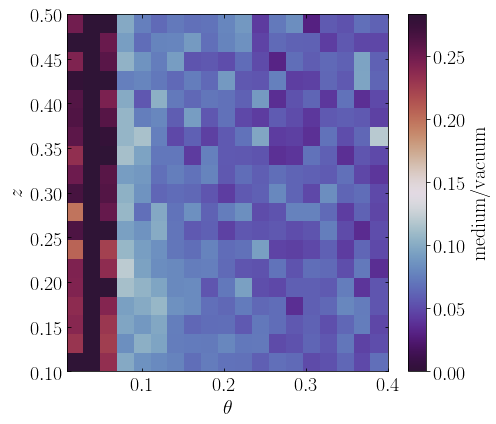

In [274]:
fig, ax = subplots()
figsize(7,6)

ratio = pcolormesh(h[1],h[2],h[0].T/h0[0].T, cmap='twilight_shifted', vmin=0, vmax=2.*sum(SD_pt_Rcut_list_full_1.T[7])/sum(SD_pt_Rcut.T[7]))

cbar = colorbar(ratio, ax=ax)
#ax.set_xscale('log')
#ax.set_yscale('log')
#xlim(0.75/R,2e2)
#ylim(sqrt(0.65),7e1)
ylabel(r'$z$', fontsize=20)
xlabel(r'$\theta$', fontsize=20)
cbar.set_label(r"medium/vacuum", fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("medium/LundPlane_t_ordered_pt_R_cut_fulld_ratio.pdf", bbox_inches="tight")
tight_layout()
show()

In [275]:
xbins=linspace(min(SD_m_Rcut.T[4]), R, 20)
ybins=linspace(min(1.-SD_m_Rcut.T[1]), 0.5, 20)
h0 = ax.hist2d(SD_tf_Rcut.T[4], 1.-SD_tf_Rcut.T[1], bins=(xbins, ybins), weights=SD_tf_Rcut.T[7]/sum(SD_tf_Rcut.T[7]))
h  = ax.hist2d(SD_tf_Rcut_list_full_1.T[4],  1.-SD_tf_Rcut_list_full_1.T[1],  bins=(xbins, ybins), weights=SD_tf_Rcut_list_full_1.T[7]/ sum(SD_tf_Rcut.T[7]))

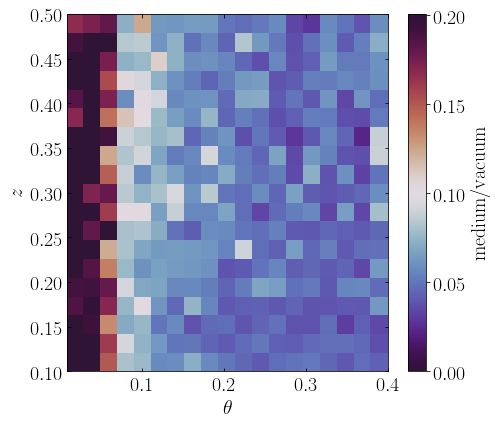

In [276]:
fig, ax = subplots()
figsize(7,6)

ratio = pcolormesh(h[1],h[2],h[0].T/h0[0].T, cmap='twilight_shifted', vmin=0, vmax=2.*sum(SD_tf_Rcut_list_full_1.T[7])/sum(SD_tf_Rcut.T[7]))

cbar = colorbar(ratio, ax=ax)
#ax.set_xscale('log')
#ax.set_yscale('log')
#xlim(0.75/R,2e2)
#ylim(sqrt(0.65),7e1)
ylabel(r'$z$', fontsize=20)
xlabel(r'$\theta$', fontsize=20)
cbar.set_label(r"medium/vacuum", fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("medium/LundPlane_t_ordered_pt_R_cut_fulld_ratio.pdf", bbox_inches="tight")
tight_layout()
show()

In [277]:
xbins=linspace(min(SD_m_Rcut.T[4]), R, 20)
ybins=linspace(min(1.-SD_m_Rcut.T[1]), 0.5, 20)
h0 = ax.hist2d(SD_theta.T[4], 1.-SD_theta.T[1], bins=(xbins, ybins), weights=SD_theta.T[7]/sum(SD_theta.T[7]))
h  = ax.hist2d(SD_theta_list_full_1.T[4],  1.-SD_theta_list_full_1.T[1],  bins=(xbins, ybins), weights=SD_theta_list_full_1.T[7]/ sum(SD_theta.T[7]))

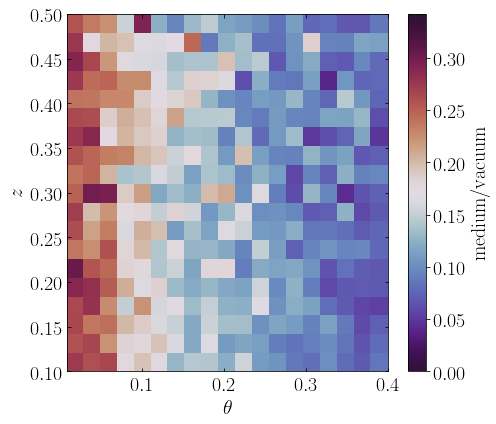

In [278]:
fig, ax = subplots()
figsize(7,6)

ratio = pcolormesh(h[1],h[2],h[0].T/h0[0].T, cmap='twilight_shifted', vmin=0, vmax=2.*sum(SD_theta_list_full_1.T[7])/sum(SD_theta.T[7]))

cbar = colorbar(ratio, ax=ax)
#ax.set_xscale('log')
#ax.set_yscale('log')
#xlim(0.75/R,2e2)
#ylim(sqrt(0.65),7e1)
ylabel(r'$z$', fontsize=20)
xlabel(r'$\theta$', fontsize=20)
cbar.set_label(r"medium/vacuum", fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("medium/LundPlane_t_ordered_pt_R_cut_fulld_ratio.pdf", bbox_inches="tight")
tight_layout()
show()

#### Soft Drop Multiplicity

In [6]:
z_cut     = 0.1
beta      = 0.0
theta_cut = 0.0
NSD_m_Rcut              = N_SD(m_Rcut_list,         sqrt(t_max)/R, z_cut, beta, R)
NSD_m_Rcut_list_full_1  = N_SD(m_Rcut_list_full_1,  sqrt(t_max)/R, z_cut, beta, R)
NSD_m_Rcut_list_full_2  = N_SD(m_Rcut_list_full_2,  sqrt(t_max)/R, z_cut, beta, R)
NSD_m_Rcut_list_full_3  = N_SD(m_Rcut_list_full_3,  sqrt(t_max)/R, z_cut, beta, R)
NSD_pt_Rcut             = N_SD(pt_Rcut_list,        sqrt(t_max)/R, z_cut, beta, R)
NSD_pt_Rcut_list_full_1 = N_SD(pt_Rcut_list_full_1, sqrt(t_max)/R, z_cut, beta, R)
NSD_pt_Rcut_list_full_2 = N_SD(pt_Rcut_list_full_2, sqrt(t_max)/R, z_cut, beta, R)
NSD_pt_Rcut_list_full_3 = N_SD(pt_Rcut_list_full_3, sqrt(t_max)/R, z_cut, beta, R)
NSD_tf_Rcut             = N_SD(tf_Rcut_list,        sqrt(t_max)/R, z_cut, beta, R)
NSD_tf_Rcut_list_full_1 = N_SD(tf_Rcut_list_full_1, sqrt(t_max)/R, z_cut, beta, R)
NSD_tf_Rcut_list_full_2 = N_SD(tf_Rcut_list_full_2, sqrt(t_max)/R, z_cut, beta, R)
NSD_tf_Rcut_list_full_3 = N_SD(tf_Rcut_list_full_3, sqrt(t_max)/R, z_cut, beta, R)
NSD_theta               = N_SD(theta_list,          sqrt(t_max)/R, z_cut, beta, R)
NSD_theta_list_full_1   = N_SD(theta_list_full_1,   sqrt(t_max)/R, z_cut, beta, R)
NSD_theta_list_full_2   = N_SD(theta_list_full_2,   sqrt(t_max)/R, z_cut, beta, R)
NSD_theta_list_full_3   = N_SD(theta_list_full_3,   sqrt(t_max)/R, z_cut, beta, R)

/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


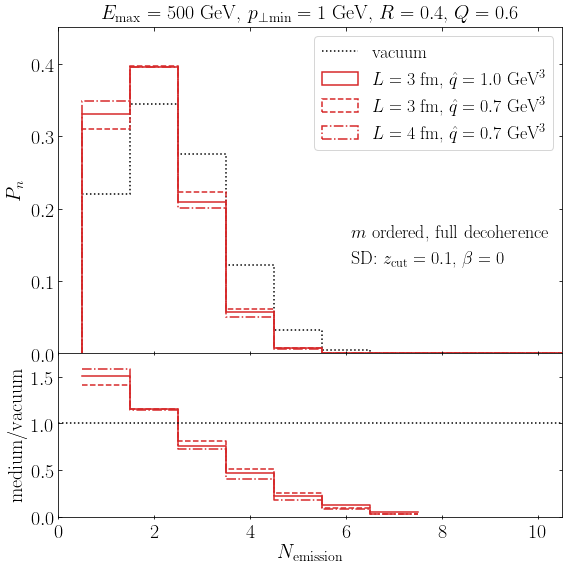

In [13]:
f = figure( figsize=(7,9) )
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0, right=1, wspace=0.0)
f.add_axes([0.2,0.175,0.75,0.75])
f.clf()
ax1 = plt.subplot(gs1[:-1, :])
title(r'$E_{\max}=500$ GeV, $p_{\perp\min}=1$ GeV, $R=0.4$, $Q=0.6$', fontsize=20)
ax2 = plt.subplot(gs1[-1, :])
ax1.xaxis.set_major_formatter( NullFormatter() )
f.subplots_adjust(wspace=0,hspace=0)

xbin=linspace(0.5,10.5,11)
h0 = ax1.hist(NSD_m_Rcut.T[0],             bins=xbin, weights=NSD_m_Rcut.T[1]            /len(NSD_m_Rcut.T[0]),             histtype='step', linestyle=':', lw=1.5, color='k')
h4 = ax1.hist(NSD_m_Rcut_list_full_1.T[0], bins=xbin, weights=NSD_m_Rcut_list_full_1.T[1]/sum(NSD_m_Rcut_list_full_1.T[1]), histtype='step', linestyle='-', lw=1.5, color='C3', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
h5 = ax1.hist(NSD_m_Rcut_list_full_2.T[0], bins=xbin, weights=NSD_m_Rcut_list_full_2.T[1]/sum(NSD_m_Rcut_list_full_2.T[1]), histtype='step', linestyle='--', lw=1.5, color='C3', label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
h6 = ax1.hist(NSD_m_Rcut_list_full_3.T[0], bins=xbin, weights=NSD_m_Rcut_list_full_3.T[1]/sum(NSD_m_Rcut_list_full_3.T[1]), histtype='step', linestyle='-.', lw=1.5, color='C3', label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')
ax1.plot([0],[0],':', color='k',label=r'vacuum')

xbin=linspace(0.5,10.5,11)
ax2.step(h0[1][:-1], h4[0]/h0[0], where='post', c='C3', linestyle='-')
ax2.step(h0[1][:-1], h5[0]/h0[0], where='post', c='C3', linestyle='--')
ax2.step(h0[1][:-1], h6[0]/h0[0], where='post', c='C3', linestyle='-.')
ax2.plot([0,12],[1,1],':', color='k')

ax1.text(6.1,0.16,r'$m$ ordered, full decoherence', fontsize=18)
ax1.text(6.1,0.12,r'SD: $z_{\rm cut}=0.1$, $\beta=0$', fontsize=18)
ax1.set_xlim(0.,10.5)
ax1.set_ylim(0,0.45)
ax1.tick_params(which='both', left=True, direction='in', right=True, top=True, bottom=False, labelsize=20)
ax2.set_xlim(0.,10.5)
ax2.set_ylim(0.,1.75)
ax2.tick_params(axis='x', top=True, bottom=True, direction='inout', labelsize=20)
ax2.tick_params(axis='y', right=True, direction='in', labelsize=20)
ax2.set_yticks([0,0.5,1,1.5])
ax2.set_xlabel(r'$N_{\rm emission}$', fontsize=20)
ax1.set_ylabel(r'$P_n$', fontsize=20)
ax2.set_ylabel(r'medium/vacuum', fontsize=20)
ax1.legend(fontsize=18,ncol=1,loc='upper right')
savefig('medium/N_emission_m_Rcut_shower_SD0_medium_full_ratio.pdf', format='pdf',bbox_inches='tight')
show()

/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


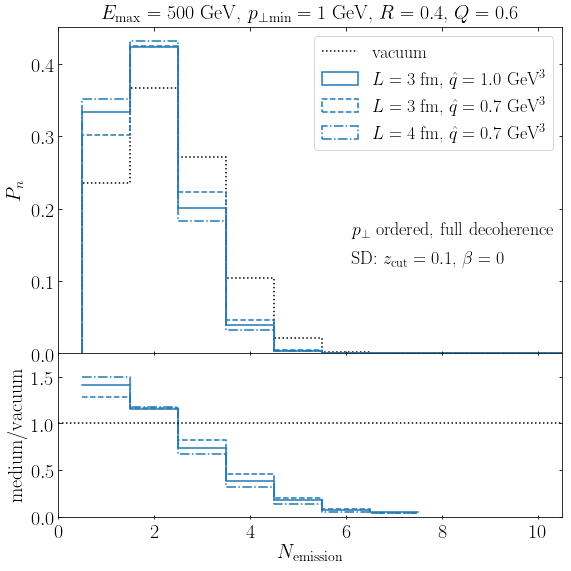

In [14]:
f = figure( figsize=(7,9) )
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0, right=1, wspace=0.0)
f.add_axes([0.2,0.175,0.75,0.75])
f.clf()
ax1 = plt.subplot(gs1[:-1, :])
title(r'$E_{\max}=500$ GeV, $p_{\perp\min}=1$ GeV, $R=0.4$, $Q=0.6$', fontsize=20)
ax2 = plt.subplot(gs1[-1, :])
ax1.xaxis.set_major_formatter( NullFormatter() )
f.subplots_adjust(wspace=0,hspace=0)

xbin=linspace(0.5,10.5,11)
h0 = ax1.hist(NSD_pt_Rcut.T[0],             bins=xbin, weights=NSD_pt_Rcut.T[1]            /len(NSD_pt_Rcut.T[0]),             histtype='step', linestyle=':', lw=1.5, color='k')
h4 = ax1.hist(NSD_pt_Rcut_list_full_1.T[0], bins=xbin, weights=NSD_pt_Rcut_list_full_1.T[1]/sum(NSD_pt_Rcut_list_full_1.T[1]), histtype='step', linestyle='-', lw=1.5, color='C0', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
h5 = ax1.hist(NSD_pt_Rcut_list_full_2.T[0], bins=xbin, weights=NSD_pt_Rcut_list_full_2.T[1]/sum(NSD_pt_Rcut_list_full_2.T[1]), histtype='step', linestyle='--', lw=1.5, color='C0', label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
h6 = ax1.hist(NSD_pt_Rcut_list_full_3.T[0], bins=xbin, weights=NSD_pt_Rcut_list_full_3.T[1]/sum(NSD_pt_Rcut_list_full_3.T[1]), histtype='step', linestyle='-.', lw=1.5, color='C0', label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')
ax1.plot([0],[0],':', color='k',label=r'vacuum')

xbin=linspace(0.5,10.5,11)
ax2.step(h0[1][:-1], h4[0]/h0[0], where='post', c='C0', linestyle='-')
ax2.step(h0[1][:-1], h5[0]/h0[0], where='post', c='C0', linestyle='--')
ax2.step(h0[1][:-1], h6[0]/h0[0], where='post', c='C0', linestyle='-.')
ax2.plot([0,12],[1,1],':', color='k')

ax1.text(6.1,0.16,r'$p_{\perp}$ ordered, full decoherence', fontsize=18)
ax1.text(6.1,0.12,r'SD: $z_{\rm cut}=0.1$, $\beta=0$', fontsize=18)
ax1.set_xlim(0.,10.5)
ax1.set_ylim(0,0.45)
ax1.tick_params(which='both', left=True, direction='in', right=True, top=True, bottom=False, labelsize=20)
ax2.set_xlim(0.,10.5)
ax2.set_ylim(0.,1.75)
ax2.tick_params(axis='x', top=True, bottom=True, direction='inout', labelsize=20)
ax2.tick_params(axis='y', right=True, direction='in', labelsize=20)
ax2.set_yticks([0,0.5,1,1.5])
ax2.set_xlabel(r'$N_{\rm emission}$', fontsize=20)
ax1.set_ylabel(r'$P_n$', fontsize=20)
ax2.set_ylabel(r'medium/vacuum', fontsize=20)
ax1.legend(fontsize=18,ncol=1,loc='upper right')
savefig('medium/N_emission_pt_Rcut_shower_SD0_medium_full_ratio.pdf', format='pdf',bbox_inches='tight')
show()

/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


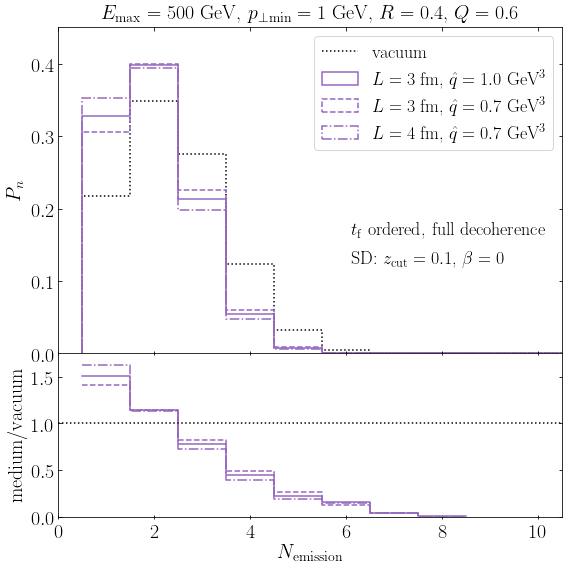

In [15]:
f = figure( figsize=(7,9) )
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0, right=1, wspace=0.0)
f.add_axes([0.2,0.175,0.75,0.75])
f.clf()
ax1 = plt.subplot(gs1[:-1, :])
title(r'$E_{\max}=500$ GeV, $p_{\perp\min}=1$ GeV, $R=0.4$, $Q=0.6$', fontsize=20)
ax2 = plt.subplot(gs1[-1, :])
ax1.xaxis.set_major_formatter( NullFormatter() )
f.subplots_adjust(wspace=0,hspace=0)

xbin=linspace(0.5,10.5,11)
h0 = ax1.hist(NSD_tf_Rcut.T[0],             bins=xbin, weights=NSD_tf_Rcut.T[1]            /len(NSD_tf_Rcut.T[0]),             histtype='step', linestyle=':', lw=1.5, color='k')
h4 = ax1.hist(NSD_tf_Rcut_list_full_1.T[0], bins=xbin, weights=NSD_tf_Rcut_list_full_1.T[1]/sum(NSD_tf_Rcut_list_full_1.T[1]), histtype='step', linestyle='-', lw=1.5, color='C4', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
h5 = ax1.hist(NSD_tf_Rcut_list_full_2.T[0], bins=xbin, weights=NSD_tf_Rcut_list_full_2.T[1]/sum(NSD_tf_Rcut_list_full_2.T[1]), histtype='step', linestyle='--', lw=1.5, color='C4', label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
h6 = ax1.hist(NSD_tf_Rcut_list_full_3.T[0], bins=xbin, weights=NSD_tf_Rcut_list_full_3.T[1]/sum(NSD_tf_Rcut_list_full_3.T[1]), histtype='step', linestyle='-.', lw=1.5, color='C4', label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')
ax1.plot([0],[0],':', color='k',label=r'vacuum')

xbin=linspace(0.5,10.5,11)
ax2.step(h0[1][:-1], h4[0]/h0[0], where='post', c='C4', linestyle='-')
ax2.step(h0[1][:-1], h5[0]/h0[0], where='post', c='C4', linestyle='--')
ax2.step(h0[1][:-1], h6[0]/h0[0], where='post', c='C4', linestyle='-.')
ax2.plot([0,12],[1,1],':', color='k')

ax1.text(6.1,0.16,r'$t_{\rm f}$ ordered, full decoherence', fontsize=18)
ax1.text(6.1,0.12,r'SD: $z_{\rm cut}=0.1$, $\beta=0$', fontsize=18)
ax1.set_xlim(0.,10.5)
ax1.set_ylim(0,0.45)
ax1.tick_params(which='both', left=True, direction='in', right=True, top=True, bottom=False, labelsize=20)
ax2.set_xlim(0.,10.5)
ax2.set_ylim(0.,1.75)
ax2.tick_params(axis='x', top=True, bottom=True, direction='inout', labelsize=20)
ax2.tick_params(axis='y', right=True, direction='in', labelsize=20)
ax2.set_yticks([0,0.5,1,1.5])
ax2.set_xlabel(r'$N_{\rm emission}$', fontsize=20)
ax1.set_ylabel(r'$P_n$', fontsize=20)
ax2.set_ylabel(r'medium/vacuum', fontsize=20)
ax1.legend(fontsize=18,ncol=1,loc='upper right')
savefig('medium/N_emission_tf_Rcut_shower_SD0_medium_full_ratio.pdf', format='pdf',bbox_inches='tight')
show()

/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


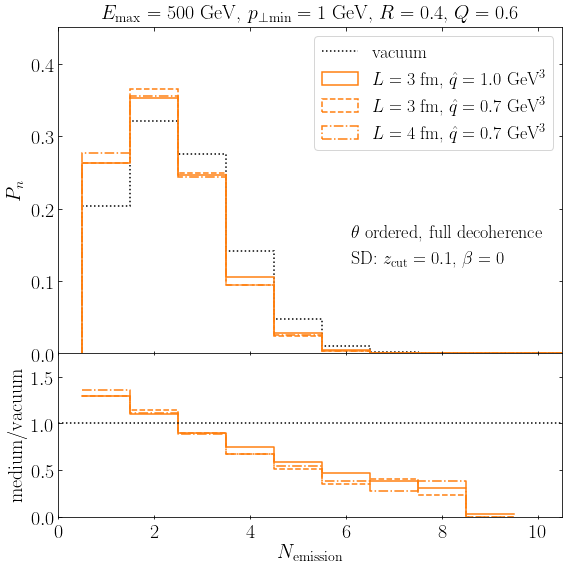

In [16]:
f = figure( figsize=(7,9) )
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0, right=1, wspace=0.0)
f.add_axes([0.2,0.175,0.75,0.75])
f.clf()
ax1 = plt.subplot(gs1[:-1, :])
title(r'$E_{\max}=500$ GeV, $p_{\perp\min}=1$ GeV, $R=0.4$, $Q=0.6$', fontsize=20)
ax2 = plt.subplot(gs1[-1, :])
ax1.xaxis.set_major_formatter( NullFormatter() )
f.subplots_adjust(wspace=0,hspace=0)

xbin=linspace(0.5,10.5,11)
h0 = ax1.hist(NSD_theta.T[0],             bins=xbin, weights=NSD_theta.T[1]            /len(NSD_theta.T[0]),             histtype='step', linestyle=':', lw=1.5, color='k')
h4 = ax1.hist(NSD_theta_list_full_1.T[0], bins=xbin, weights=NSD_theta_list_full_1.T[1]/sum(NSD_theta_list_full_1.T[1]), histtype='step', linestyle='-', lw=1.5, color='C1', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
h5 = ax1.hist(NSD_theta_list_full_2.T[0], bins=xbin, weights=NSD_theta_list_full_2.T[1]/sum(NSD_theta_list_full_2.T[1]), histtype='step', linestyle='--', lw=1.5, color='C1', label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
h6 = ax1.hist(NSD_theta_list_full_3.T[0], bins=xbin, weights=NSD_theta_list_full_3.T[1]/sum(NSD_theta_list_full_3.T[1]), histtype='step', linestyle='-.', lw=1.5, color='C1', label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')
ax1.plot([0],[0],':', color='k',label=r'vacuum')

xbin=linspace(0.5,10.5,11)
ax2.step(h0[1][:-1], h4[0]/h0[0], where='post', c='C1', linestyle='-')
ax2.step(h0[1][:-1], h5[0]/h0[0], where='post', c='C1', linestyle='--')
ax2.step(h0[1][:-1], h6[0]/h0[0], where='post', c='C1', linestyle='-.')
ax2.plot([0,12],[1,1],':', color='k')

ax1.text(6.1,0.16,r'$\theta$ ordered, full decoherence', fontsize=18)
ax1.text(6.1,0.12,r'SD: $z_{\rm cut}=0.1$, $\beta=0$', fontsize=18)
ax1.set_xlim(0.,10.5)
ax1.set_ylim(0,0.45)
ax1.tick_params(which='both', left=True, direction='in', right=True, top=True, bottom=False, labelsize=20)
ax2.set_xlim(0.,10.5)
ax2.set_ylim(0.,1.75)
ax2.tick_params(axis='x', top=True, bottom=True, direction='inout', labelsize=20)
ax2.tick_params(axis='y', right=True, direction='in', labelsize=20)
ax2.set_yticks([0,0.5,1,1.5])
ax2.set_xlabel(r'$N_{\rm emission}$', fontsize=20)
ax1.set_ylabel(r'$P_n$', fontsize=20)
ax2.set_ylabel(r'medium/vacuum', fontsize=20)
ax1.legend(fontsize=18,ncol=1,loc='upper right')
savefig('medium/N_emission_theta_shower_SD0_medium_full_ratio.pdf', format='pdf',bbox_inches='tight')
show()

In [18]:
h01 = ax1.hist(NSD_m_Rcut.T[0],             bins=xbin, weights=NSD_m_Rcut.T[1]            /len(NSD_m_Rcut.T[0]),             histtype='step', linestyle=':', lw=1.5, color='k')
h02 = ax1.hist(NSD_pt_Rcut.T[0],             bins=xbin, weights=NSD_pt_Rcut.T[1]            /len(NSD_pt_Rcut.T[0]),             histtype='step', linestyle=':', lw=1.5, color='k')
h03 = ax1.hist(NSD_tf_Rcut.T[0],             bins=xbin, weights=NSD_tf_Rcut.T[1]            /len(NSD_tf_Rcut.T[0]),             histtype='step', linestyle=':', lw=1.5, color='k')
h04 = ax1.hist(NSD_theta.T[0],             bins=xbin, weights=NSD_theta.T[1]            /len(NSD_theta.T[0]),             histtype='step', linestyle=':', lw=1.5, color='k')
h41 = ax1.hist(NSD_m_Rcut_list_full_1.T[0], bins=xbin, weights=NSD_m_Rcut_list_full_1.T[1]/sum(NSD_m_Rcut_list_full_1.T[1]), histtype='step', linestyle='-', lw=1.5, color='C1', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
h42 = ax1.hist(NSD_pt_Rcut_list_full_1.T[0], bins=xbin, weights=NSD_pt_Rcut_list_full_1.T[1]/sum(NSD_pt_Rcut_list_full_1.T[1]), histtype='step', linestyle='-', lw=1.5, color='C1', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
h43 = ax1.hist(NSD_tf_Rcut_list_full_1.T[0], bins=xbin, weights=NSD_tf_Rcut_list_full_1.T[1]/sum(NSD_tf_Rcut_list_full_1.T[1]), histtype='step', linestyle='-', lw=1.5, color='C1', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
h44 = ax1.hist(NSD_theta_list_full_1.T[0], bins=xbin, weights=NSD_theta_list_full_1.T[1]/sum(NSD_theta_list_full_1.T[1]), histtype='step', linestyle='-', lw=1.5, color='C1', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')

/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divid

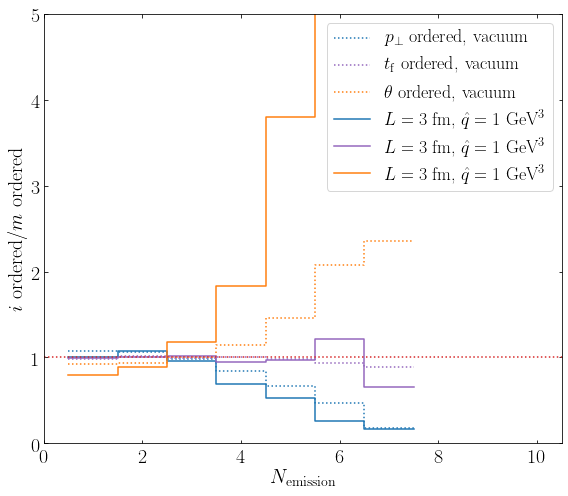

In [25]:
fig, ax = subplots()
figsize(8,7)

step(h01[1][:-1], h02[0]/h01[0], where='post', c='C0', linestyle=':', label=r'$p_{\perp}$ ordered, vacuum')
step(h01[1][:-1], h03[0]/h01[0], where='post', c='C4', linestyle=':', label=r'$t_{\rm f}$ ordered, vacuum')
step(h01[1][:-1], h04[0]/h01[0], where='post', c='C1', linestyle=':', label=r'$\theta$ ordered, vacuum')

step(h01[1][:-1], h42[0]/h41[0], where='post', c='C0', linestyle='-', label=r'$L=3$ fm, $\hat q=1$ GeV$^3$')
step(h01[1][:-1], h43[0]/h41[0], where='post', c='C4', linestyle='-', label=r'$L=3$ fm, $\hat q=1$ GeV$^3$')
step(h01[1][:-1], h44[0]/h41[0], where='post', c='C1', linestyle='-', label=r'$L=3$ fm, $\hat q=1$ GeV$^3$')
plot([0,12],[1,1],':', color='C3')

xlim(0.,10.5)
ylim(0.,5)
xlabel(r'$N_{\rm emission}$', fontsize=20)
ylabel(r'$i$ ordered/$m$ ordered', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18,ncol=1,loc='upper right');
savefig("medium/N_emission_shower_SD0_medium_full_ratio2.pdf", bbox_inches="tight")
tight_layout()
show()

### Mass

In [5]:
N       = 50000
E_max   = 500.
R       = 0.4
t_max   = (E_max*R)**2
pT2_min = 1.
punish  = 0.6
first_m_Rcut         = shower(N, 'm_Rcut',  t_max, pT2_min, R, 'First')
first_m_Rcut_full_1  = shower(N, 'm_Rcut',  t_max, pT2_min, R, 'First', True, 'Full_d',    3., 1., 1.0, punish)
first_m_Rcut_full_2  = shower(N, 'm_Rcut',  t_max, pT2_min, R, 'First', True, 'Full_d',    3., 1., 0.7, punish)
first_m_Rcut_full_3  = shower(N, 'm_Rcut',  t_max, pT2_min, R, 'First', True, 'Full_d',    4., 1., 0.7, punish)
first_pt_Rcut        = shower(N, 'pT_Rcut', t_max, pT2_min, R, 'First')
first_pt_Rcut_full_1 = shower(N, 'pT_Rcut', t_max, pT2_min, R, 'First', True, 'Full_d',    3., 1., 1.0, punish)
first_pt_Rcut_full_2 = shower(N, 'pT_Rcut', t_max, pT2_min, R, 'First', True, 'Full_d',    3., 1., 0.7, punish)
first_pt_Rcut_full_3 = shower(N, 'pT_Rcut', t_max, pT2_min, R, 'First', True, 'Full_d',    4., 1., 0.7, punish)
first_tf_Rcut        = shower(N, 'tf_Rcut', t_max, pT2_min, R, 'First')
first_tf_Rcut_full_1 = shower(N, 'tf_Rcut', t_max, pT2_min, R, 'First', True, 'Full_d',    3., 1., 1.0, punish)
first_tf_Rcut_full_2 = shower(N, 'tf_Rcut', t_max, pT2_min, R, 'First', True, 'Full_d',    3., 1., 0.7, punish)
first_tf_Rcut_full_3 = shower(N, 'tf_Rcut', t_max, pT2_min, R, 'First', True, 'Full_d',    4., 1., 0.7, punish)
first_theta          = shower(N, 'theta',   t_max, pT2_min, R, 'First')
first_theta_full_1   = shower(N, 'theta',   t_max, pT2_min, R, 'First', True, 'Full_d',    3., 1., 1.0, punish)
first_theta_full_2   = shower(N, 'theta',   t_max, pT2_min, R, 'First', True, 'Full_d',    3., 1., 0.7, punish)
first_theta_full_3   = shower(N, 'theta',   t_max, pT2_min, R, 'First', True, 'Full_d',    4., 1., 0.7, punish)

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
0
5000
10000
15000
20000
25000
30000
35000
40000
45000


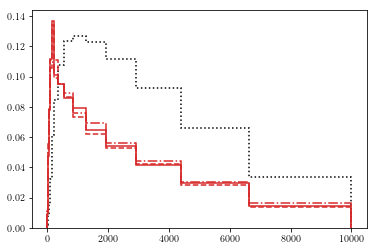

In [7]:
xbin=logspace(log10(4.*pT2_min), log10(t_max/4.), 20)
h0 = hist(first_m_Rcut.T[5] ,   bins=xbin, weights=first_m_Rcut.T[7]                        /sum(first_m_Rcut.T[7])                        , histtype='step', linestyle=':', lw=1.5, color='k', label=r'$m$ ordering: vacuum')
h1 = hist(first_m_Rcut_full_1.T[5] , bins=xbin, weights=first_m_Rcut_full_1.T[7]/sum(first_m_Rcut_full_1.T[7]) , histtype='step', linestyle='-', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.3$ GeV$^{-3}$')
h2 = hist(first_m_Rcut_full_2.T[5] , bins=xbin, weights=first_m_Rcut_full_2.T[7]/sum(first_m_Rcut_full_2.T[7]), histtype='step', linestyle='--', lw=1.5, color='C3', label=r'$L=10$ fm, $\hat q=0.3$ GeV$^{-3}$')
h3 = hist(first_m_Rcut_full_3.T[5] , bins=xbin, weights=first_m_Rcut_full_3.T[7]/sum(first_m_Rcut_full_3.T[7]) , histtype='step', linestyle='-.', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.5$ GeV$^{-3}$')

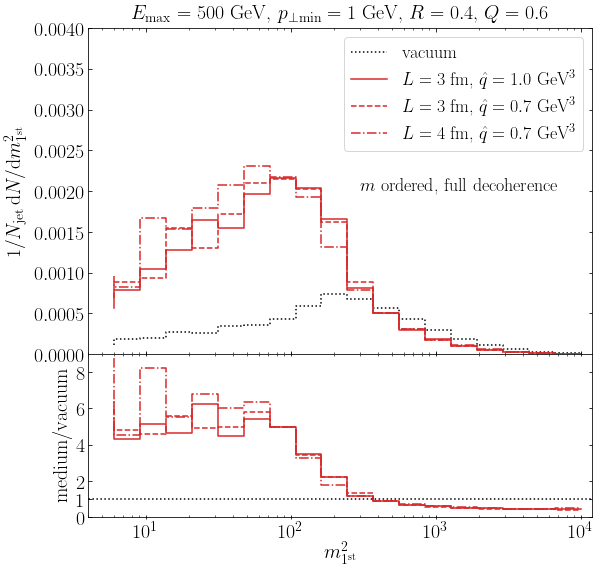

In [8]:
f = figure( figsize=(7,9) )
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0, right=1, wspace=0.0)
f.add_axes([0.2,0.175,0.75,0.75])
f.clf()
ax1 = plt.subplot(gs1[:-1, :])
title(r'$E_{\max}=500$ GeV, $p_{\perp\min}=1$ GeV, $R=0.4$, $Q=0.6$', fontsize=20)

ax2 = plt.subplot(gs1[-1, :])
ax1.xaxis.set_major_formatter( NullFormatter() )
f.subplots_adjust(wspace=0,hspace=0)

ax1.step(xbin[1:], h0[0]/(xbin[1:]-xbin[:-1]), linestyle=':', lw=1.5, color='k', label=r'vacuum')
ax1.step(xbin[1:], h1[0]/(xbin[1:]-xbin[:-1]), linestyle='-', lw=1.5, color='C3', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
ax1.step(xbin[1:], h2[0]/(xbin[1:]-xbin[:-1]), linestyle='--', lw=1.5, color='C3', label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
ax1.step(xbin[1:], h3[0]/(xbin[1:]-xbin[:-1]), linestyle='-.', lw=1.5, color='C3', label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')

ax2.step(xbin[1:], h1[0]/h0[0], linestyle='-', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.3$ GeV$^{3}$')
ax2.step(xbin[1:], h2[0]/h0[0], linestyle='--', lw=1.5, color='C3', label=r'$L=10$ fm, $\hat q=0.3$ GeV$^{3}$')
ax2.step(xbin[1:], h3[0]/h0[0], linestyle='-.', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.5$ GeV$^{3}$')
ax2.plot([1,t_max],[1,1],':', color='k')

ax1.text(3e2,0.002,r'$m$ ordered, full decoherence', fontsize=18)
ax1.set_xscale('log')
ax1.set_xlim(4.*pT2_min, 1.2*t_max/4.)
ax1.set_ylim(0,0.004)
ax1.tick_params(which='both', left=True, direction='in', right=True, top=True, labelsize=20)
ax2.set_xscale('log')
ax2.set_xlim(4.*pT2_min, 1.2*t_max/4.)
ax2.set_ylim(0.25,9.)
ax2.tick_params(axis='x', which='both', top=True, direction='inout', labelsize=20)
ax2.tick_params(axis='x', which='minor', direction='in', labelsize=20)
ax2.tick_params(axis='y', right=True, direction='in', labelsize=20)
ax2.set_yticks([0,1,2,4,6,8])
ax2.set_xlabel(r'$m^2_{1^{\rm st}}$', fontsize=20)
ax1.set_ylabel(r'$1/N_{\rm jet}\,\mathrm{d}N/\mathrm{d}m^2_{1^{\rm st}}$', fontsize=20)
ax2.set_ylabel(r'medium/vacuum', fontsize=20)
ax1.legend(fontsize=18,ncol=1,loc='upper right')
savefig("medium/N_first_m_shower_medium_full_ratio.pdf", bbox_inches="tight")
show()

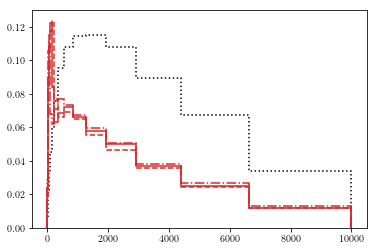

In [13]:
xbin=logspace(log10(4.*pT2_min), log10(t_max/4.), 20)
h0 = hist(first_pt_Rcut.T[5] ,   bins=xbin, weights=first_pt_Rcut.T[7]                        /sum(first_pt_Rcut.T[7])                        , histtype='step', linestyle=':', lw=1.5, color='k', label=r'$m$ ordering: vacuum');
h1 = hist(first_pt_Rcut_full_1.T[5] , bins=xbin, weights=first_pt_Rcut_full_1.T[7]/sum(first_pt_Rcut_full_1.T[7]) , histtype='step', linestyle='-', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.3$ GeV$^{-3}$');
h2 = hist(first_pt_Rcut_full_2.T[5] , bins=xbin, weights=first_pt_Rcut_full_2.T[7]/sum(first_pt_Rcut_full_2.T[7]), histtype='step', linestyle='--', lw=1.5, color='C3', label=r'$L=10$ fm, $\hat q=0.3$ GeV$^{-3}$');
h3 = hist(first_pt_Rcut_full_3.T[5] , bins=xbin, weights=first_pt_Rcut_full_3.T[7]/sum(first_pt_Rcut_full_3.T[7]) , histtype='step', linestyle='-.', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.5$ GeV$^{-3}$');

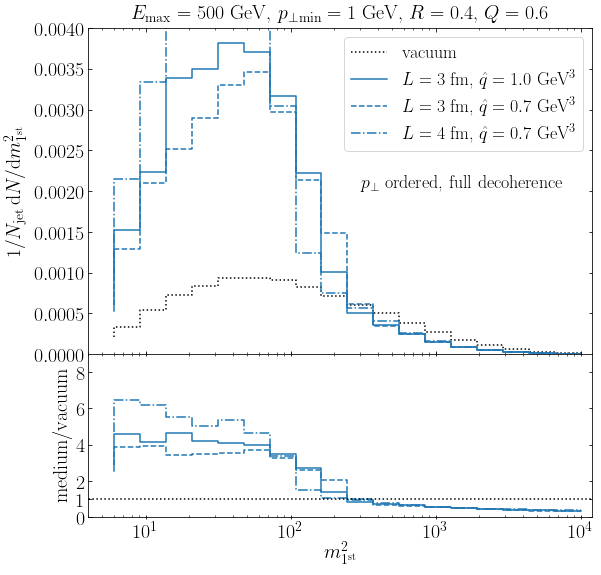

In [14]:
f = figure( figsize=(7,9) )
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0, right=1, wspace=0.0)
f.add_axes([0.2,0.175,0.75,0.75])
f.clf()
ax1 = plt.subplot(gs1[:-1, :])
title(r'$E_{\max}=500$ GeV, $p_{\perp\min}=1$ GeV, $R=0.4$, $Q=0.6$', fontsize=20)

ax2 = plt.subplot(gs1[-1, :])
ax1.xaxis.set_major_formatter( NullFormatter() )
f.subplots_adjust(wspace=0,hspace=0)

ax1.step(xbin[1:], h0[0]/(xbin[1:]-xbin[:-1]), linestyle=':', lw=1.5, color='k', label=r'vacuum')
ax1.step(xbin[1:], h1[0]/(xbin[1:]-xbin[:-1]), linestyle='-', lw=1.5, color='C0', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
ax1.step(xbin[1:], h2[0]/(xbin[1:]-xbin[:-1]), linestyle='--', lw=1.5, color='C0', label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
ax1.step(xbin[1:], h3[0]/(xbin[1:]-xbin[:-1]), linestyle='-.', lw=1.5, color='C0', label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')

ax2.step(xbin[1:], h1[0]/h0[0], linestyle='-', lw=1.5, color='C0', label=r'$L=1$ fm, $\hat q=0.3$ GeV$^{3}$')
ax2.step(xbin[1:], h2[0]/h0[0], linestyle='--', lw=1.5, color='C0', label=r'$L=10$ fm, $\hat q=0.3$ GeV$^{3}$')
ax2.step(xbin[1:], h3[0]/h0[0], linestyle='-.', lw=1.5, color='C0', label=r'$L=1$ fm, $\hat q=0.5$ GeV$^{3}$')
ax2.plot([1,t_max],[1,1],':', color='k')

ax1.text(3e2,0.002,r'$p_{\perp}$ ordered, full decoherence', fontsize=18)
ax1.set_xscale('log')
ax1.set_xlim(4.*pT2_min, 1.2*t_max/4.)
ax1.set_ylim(0,0.004)
ax1.tick_params(which='both', left=True, direction='in', right=True, top=True, labelsize=20)
ax2.set_xscale('log')
ax2.set_xlim(4.*pT2_min, 1.2*t_max/4.)
ax2.set_ylim(0.25,9.)
ax2.tick_params(axis='x', which='both', top=True, direction='inout', labelsize=20)
ax2.tick_params(axis='x', which='minor', direction='in', labelsize=20)
ax2.tick_params(axis='y', right=True, direction='in', labelsize=20)
ax2.set_yticks([0,1,2,4,6,8])
ax2.set_xlabel(r'$m^2_{1^{\rm st}}$', fontsize=20)
ax1.set_ylabel(r'$1/N_{\rm jet}\,\mathrm{d}N/\mathrm{d}m^2_{1^{\rm st}}$', fontsize=20)
ax2.set_ylabel(r'medium/vacuum', fontsize=20)
ax1.legend(fontsize=18,ncol=1,loc='upper right')
savefig("medium/N_first_pt_shower_medium_full_ratio.pdf", bbox_inches="tight")
show()

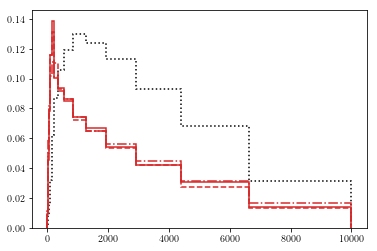

In [15]:
xbin=logspace(log10(4.*pT2_min), log10(t_max/4.), 20)
h0 = hist(first_tf_Rcut.T[5] ,        bins=xbin, weights=first_tf_Rcut.T[7]                        /sum(first_tf_Rcut.T[7])                        , histtype='step', linestyle=':', lw=1.5, color='k', label=r'$m$ ordering: vacuum')
h1 = hist(first_tf_Rcut_full_1.T[5] , bins=xbin, weights=first_tf_Rcut_full_1.T[7]/sum(first_tf_Rcut_full_1.T[7]) , histtype='step', linestyle='-', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.3$ GeV$^{-3}$')
h2 = hist(first_tf_Rcut_full_2.T[5] , bins=xbin, weights=first_tf_Rcut_full_2.T[7]/sum(first_tf_Rcut_full_2.T[7]), histtype='step', linestyle='--', lw=1.5, color='C3', label=r'$L=10$ fm, $\hat q=0.3$ GeV$^{-3}$')
h3 = hist(first_tf_Rcut_full_3.T[5] , bins=xbin, weights=first_tf_Rcut_full_3.T[7]/sum(first_tf_Rcut_full_3.T[7]) , histtype='step', linestyle='-.', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.5$ GeV$^{-3}$')

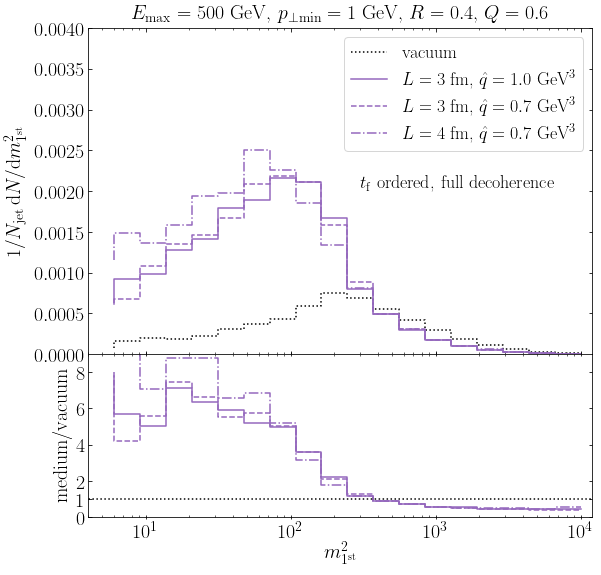

In [16]:
f = figure( figsize=(7,9) )
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0, right=1, wspace=0.0)
f.add_axes([0.2,0.175,0.75,0.75])
f.clf()
ax1 = plt.subplot(gs1[:-1, :])
title(r'$E_{\max}=500$ GeV, $p_{\perp\min}=1$ GeV, $R=0.4$, $Q=0.6$', fontsize=20)

ax2 = plt.subplot(gs1[-1, :])
ax1.xaxis.set_major_formatter( NullFormatter() )
f.subplots_adjust(wspace=0,hspace=0)

ax1.step(xbin[1:], h0[0]/(xbin[1:]-xbin[:-1]), linestyle=':', lw=1.5, color='k', label=r'vacuum')
ax1.step(xbin[1:], h1[0]/(xbin[1:]-xbin[:-1]), linestyle='-', lw=1.5, color='C4', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
ax1.step(xbin[1:], h2[0]/(xbin[1:]-xbin[:-1]), linestyle='--', lw=1.5, color='C4', label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
ax1.step(xbin[1:], h3[0]/(xbin[1:]-xbin[:-1]), linestyle='-.', lw=1.5, color='C4', label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')

ax2.step(xbin[1:], h1[0]/h0[0], linestyle='-', lw=1.5, color='C4', label=r'$L=1$ fm, $\hat q=0.3$ GeV$^{3}$')
ax2.step(xbin[1:], h2[0]/h0[0], linestyle='--', lw=1.5, color='C4', label=r'$L=10$ fm, $\hat q=0.3$ GeV$^{3}$')
ax2.step(xbin[1:], h3[0]/h0[0], linestyle='-.', lw=1.5, color='C4', label=r'$L=1$ fm, $\hat q=0.5$ GeV$^{3}$')
ax2.plot([1,t_max],[1,1],':', color='k')

ax1.text(3e2,0.002,r'$t_{\rm f}$ ordered, full decoherence', fontsize=18)
ax1.set_xscale('log')
ax1.set_xlim(4.*pT2_min, 1.2*t_max/4.)
ax1.set_ylim(0,0.004)
ax1.tick_params(which='both', left=True, direction='in', right=True, top=True, labelsize=20)
ax2.set_xscale('log')
ax2.set_xlim(4.*pT2_min, 1.2*t_max/4.)
ax2.set_ylim(0.25,9.)
ax2.tick_params(axis='x', which='both', top=True, direction='inout', labelsize=20)
ax2.tick_params(axis='x', which='minor', direction='in', labelsize=20)
ax2.tick_params(axis='y', right=True, direction='in', labelsize=20)
ax2.set_yticks([0,1,2,4,6,8])
ax2.set_xlabel(r'$m^2_{1^{\rm st}}$', fontsize=20)
ax1.set_ylabel(r'$1/N_{\rm jet}\,\mathrm{d}N/\mathrm{d}m^2_{1^{\rm st}}$', fontsize=20)
ax2.set_ylabel(r'medium/vacuum', fontsize=20)
ax1.legend(fontsize=18,ncol=1,loc='upper right')
savefig("medium/N_first_tf_shower_medium_full_ratio.pdf", bbox_inches="tight")
show()

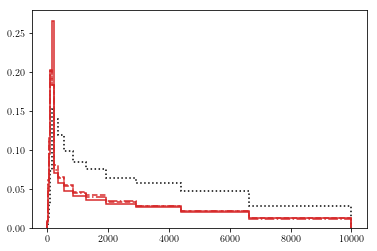

In [17]:
xbin=logspace(log10(4.*pT2_min), log10(t_max/4.), 20)
h0 = hist(first_theta.T[5] ,        bins=xbin, weights=first_theta.T[7]                        /sum(first_theta.T[7])                        , histtype='step', linestyle=':', lw=1.5, color='k', label=r'$m$ ordering: vacuum')
h1 = hist(first_theta_full_1.T[5] , bins=xbin, weights=first_theta_full_1.T[7]/sum(first_theta_full_1.T[7]) , histtype='step', linestyle='-', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.3$ GeV$^{-3}$')
h2 = hist(first_theta_full_2.T[5] , bins=xbin, weights=first_theta_full_2.T[7]/sum(first_theta_full_2.T[7]), histtype='step', linestyle='--', lw=1.5, color='C3', label=r'$L=10$ fm, $\hat q=0.3$ GeV$^{-3}$')
h3 = hist(first_theta_full_3.T[5] , bins=xbin, weights=first_theta_full_3.T[7]/sum(first_theta_full_3.T[7]) , histtype='step', linestyle='-.', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.5$ GeV$^{-3}$')

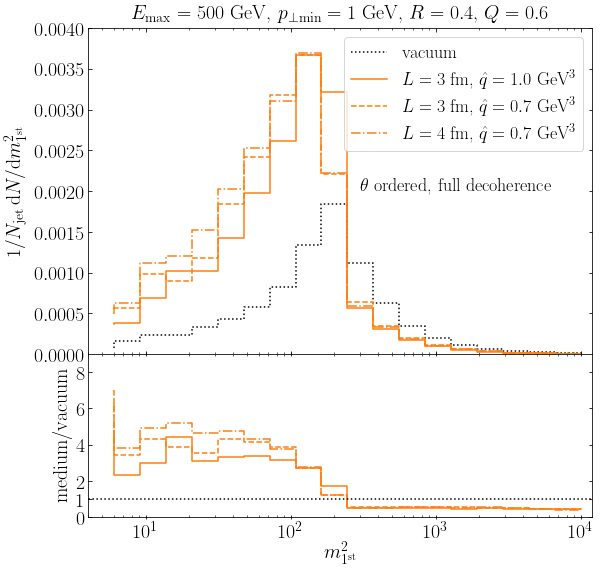

In [18]:
f = figure( figsize=(7,9) )
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0, right=1, wspace=0.0)
f.add_axes([0.2,0.175,0.75,0.75])
f.clf()
ax1 = plt.subplot(gs1[:-1, :])
title(r'$E_{\max}=500$ GeV, $p_{\perp\min}=1$ GeV, $R=0.4$, $Q=0.6$', fontsize=20)

ax2 = plt.subplot(gs1[-1, :])
ax1.xaxis.set_major_formatter( NullFormatter() )
f.subplots_adjust(wspace=0,hspace=0)

ax1.step(xbin[1:], h0[0]/(xbin[1:]-xbin[:-1]), linestyle=':', lw=1.5, color='k', label=r'vacuum')
ax1.step(xbin[1:], h1[0]/(xbin[1:]-xbin[:-1]), linestyle='-', lw=1.5, color='C1', label=r'$L=3$ fm, $\hat q=1.0$ GeV$^{3}$')
ax1.step(xbin[1:], h2[0]/(xbin[1:]-xbin[:-1]), linestyle='--', lw=1.5, color='C1', label=r'$L=3$ fm, $\hat q=0.7$ GeV$^{3}$')
ax1.step(xbin[1:], h3[0]/(xbin[1:]-xbin[:-1]), linestyle='-.', lw=1.5, color='C1', label=r'$L=4$ fm, $\hat q=0.7$ GeV$^{3}$')

ax2.step(xbin[1:], h1[0]/h0[0], linestyle='-', lw=1.5, color='C1', label=r'$L=1$ fm, $\hat q=0.3$ GeV$^{3}$')
ax2.step(xbin[1:], h2[0]/h0[0], linestyle='--', lw=1.5, color='C1', label=r'$L=10$ fm, $\hat q=0.3$ GeV$^{3}$')
ax2.step(xbin[1:], h3[0]/h0[0], linestyle='-.', lw=1.5, color='C1', label=r'$L=1$ fm, $\hat q=0.5$ GeV$^{3}$')
ax2.plot([1,t_max],[1,1],':', color='k')

ax1.text(3e2,0.002,r'$\theta$ ordered, full decoherence', fontsize=18)
ax1.set_xscale('log')
ax1.set_xlim(4.*pT2_min, 1.2*t_max/4.)
ax1.set_ylim(0,0.004)
ax1.tick_params(which='both', left=True, direction='in', right=True, top=True, labelsize=20)
ax2.set_xscale('log')
ax2.set_xlim(4.*pT2_min, 1.2*t_max/4.)
ax2.set_ylim(0.25,9.)
ax2.tick_params(axis='x', which='both', top=True, direction='inout', labelsize=20)
ax2.tick_params(axis='x', which='minor', direction='in', labelsize=20)
ax2.tick_params(axis='y', right=True, direction='in', labelsize=20)
ax2.set_yticks([0,1,2,4,6,8])
ax2.set_xlabel(r'$m^2_{1^{\rm st}}$', fontsize=20)
ax1.set_ylabel(r'$1/N_{\rm jet}\,\mathrm{d}N/\mathrm{d}m^2_{1^{\rm st}}$', fontsize=20)
ax2.set_ylabel(r'medium/vacuum', fontsize=20)
ax1.legend(fontsize=18,ncol=1,loc='upper right')
savefig("medium/N_first_theta_shower_medium_full_ratio.pdf", bbox_inches="tight")
show()

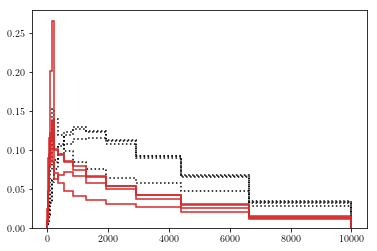

In [19]:
xbin=logspace(log10(4.*pT2_min), log10(t_max/4.), 20)
h01 = hist(first_m_Rcut.T[5],         bins=xbin, weights=first_m_Rcut.T[7]                        /sum(first_m_Rcut.T[7])                        , histtype='step', linestyle=':', lw=1.5, color='k', label=r'$m$ ordering: vacuum')
h02 = hist(first_pt_Rcut.T[5],        bins=xbin, weights=first_pt_Rcut.T[7]                        /sum(first_pt_Rcut.T[7])                        , histtype='step', linestyle=':', lw=1.5, color='k', label=r'$m$ ordering: vacuum')
h03 = hist(first_tf_Rcut.T[5],        bins=xbin, weights=first_tf_Rcut.T[7]                        /sum(first_tf_Rcut.T[7])                        , histtype='step', linestyle=':', lw=1.5, color='k', label=r'$m$ ordering: vacuum')
h04 = hist(first_theta.T[5],          bins=xbin, weights=first_theta.T[7]                        /sum(first_theta.T[7])                        , histtype='step', linestyle=':', lw=1.5, color='k', label=r'$m$ ordering: vacuum')
h11 = hist(first_m_Rcut_full_1.T[5] , bins=xbin, weights=first_m_Rcut_full_1.T[7]/sum(first_m_Rcut_full_1.T[7]) , histtype='step', linestyle='-', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.3$ GeV$^{-3}$')
h12 = hist(first_pt_Rcut_full_1.T[5], bins=xbin, weights=first_pt_Rcut_full_1.T[7]/sum(first_pt_Rcut_full_1.T[7]) , histtype='step', linestyle='-', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.3$ GeV$^{-3}$')
h13 = hist(first_tf_Rcut_full_1.T[5], bins=xbin, weights=first_tf_Rcut_full_1.T[7]/sum(first_tf_Rcut_full_1.T[7]) , histtype='step', linestyle='-', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.3$ GeV$^{-3}$')
h14 = hist(first_theta_full_1.T[5] ,  bins=xbin, weights=first_theta_full_1.T[7]/sum(first_theta_full_1.T[7]) , histtype='step', linestyle='-', lw=1.5, color='C3', label=r'$L=1$ fm, $\hat q=0.3$ GeV$^{-3}$')

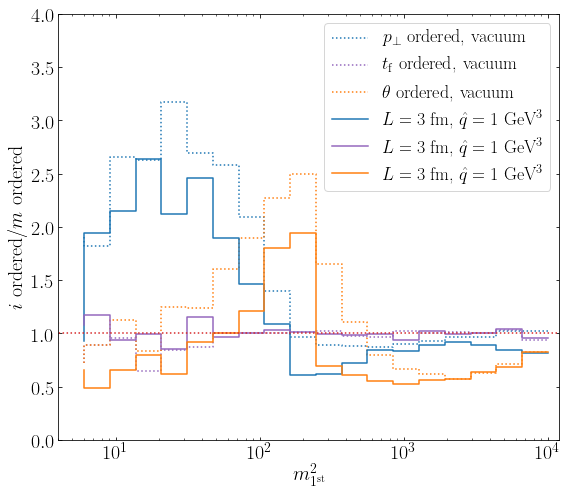

In [21]:
fig, ax = subplots()
figsize(8,7)

ax.step(xbin[1:], h02[0]/h01[0], linestyle=':', lw=1.5, color='C0', label=r'$p_{\perp}$ ordered, vacuum')
ax.step(xbin[1:], h03[0]/h01[0], linestyle=':', lw=1.5, color='C4', label=r'$t_{\rm f}$ ordered, vacuum')
ax.step(xbin[1:], h04[0]/h01[0], linestyle=':', lw=1.5, color='C1', label=r'$\theta$ ordered, vacuum')
ax.step(xbin[1:], h12[0]/h11[0], linestyle='-', lw=1.5, color='C0', label=r'$L=3$ fm, $\hat q=1$ GeV$^{3}$')
ax.step(xbin[1:], h13[0]/h11[0], linestyle='-', lw=1.5, color='C4', label=r'$L=3$ fm, $\hat q=1$ GeV$^{3}$')
ax.step(xbin[1:], h14[0]/h11[0], linestyle='-', lw=1.5, color='C1', label=r'$L=3$ fm, $\hat q=1$ GeV$^{3}$')
plot([0,t_max],[1,1],':', color='C3')

ax.set_xscale('log')
xlim(4.*pT2_min, 1.2*t_max/4.)
ylim(0.,4)
xlabel(r'$m^2_{1^{\rm st}}$', fontsize=20)
ylabel(r'$i$ ordered/$m$ ordered', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18, ncol=1,loc='upper right');
savefig("medium/N_first_shower_medium_full_ratio2.pdf", bbox_inches="tight")
tight_layout()
show()

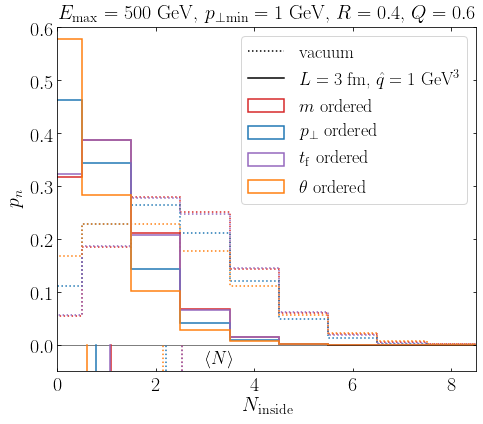

In [154]:
fig, ax = subplots()
figsize(7,6)

xbin=linspace(-0.5,10.5,12)
plot([0,0],[0,0],'k:', label=r'vacuum')
plot([0,0],[0,0],'k-', label=r'$L=3$ fm, $\hat q=1$ GeV$^3$')
plot([0,10], [0,0], 'k-', lw=0.5)
text(3,-0.035,r'$\langle N\rangle$', fontsize=18)
h0 = ax.hist((log(first_m_Rcut_full_1.T[7])/log(punish)-1.)/2.,   bins=xbin, weights=ones(len(first_m_Rcut_full_1))/len(first_m_Rcut_full_1),     histtype='step', linestyle=':', lw=1.5, color='C3')
plot([sum((log(first_m_Rcut_full_1.T[7])/log(punish)-1.)/2.)/len(first_m_Rcut_full_1),sum((log(first_m_Rcut_full_1.T[7])/log(punish)-1.)/2.)/len(first_m_Rcut_full_1)],[-0.05,0.],'C3:')
h1 = ax.hist((log(first_pt_Rcut_full_1.T[7])/log(punish)-1.)/2.,   bins=xbin, weights=ones(len(first_pt_Rcut_full_1))/len(first_pt_Rcut_full_1),     histtype='step', linestyle=':', lw=1.5, color='C0')
plot([sum((log(first_pt_Rcut_full_1.T[7])/log(punish)-1.)/2.)/len(first_pt_Rcut_full_1),sum((log(first_pt_Rcut_full_1.T[7])/log(punish)-1.)/2.)/len(first_pt_Rcut_full_1)],[-0.05,0.],'C0:')
h2 = ax.hist((log(first_tf_Rcut_full_1.T[7])/log(punish)-1.)/2.,   bins=xbin, weights=ones(len(first_tf_Rcut_full_1))/len(first_tf_Rcut_full_1),     histtype='step', linestyle=':', lw=1.5, color='C4')
plot([sum((log(first_tf_Rcut_full_1.T[7])/log(punish)-1.)/2.)/len(first_tf_Rcut_full_1),sum((log(first_tf_Rcut_full_1.T[7])/log(punish)-1.)/2.)/len(first_tf_Rcut_full_1)],[-0.05,0.],'C4:')
h3 = ax.hist((log(first_theta_full_1.T[7])/log(punish)-1.)/2.,   bins=xbin, weights=ones(len(first_theta_full_1))/len(first_theta_full_1),     histtype='step', linestyle=':', lw=1.5, color='C1')
plot([sum((log(first_theta_full_1.T[7])/log(punish)-1.)/2.)/len(first_theta_full_1),sum((log(first_theta_full_1.T[7])/log(punish)-1.)/2.)/len(first_theta_full_1)],[-0.05,0.],'C1:')
h4 = ax.hist((log(first_m_Rcut_full_1.T[7])/log(punish)-1.)/2.,   bins=xbin, weights=first_m_Rcut_full_1.T[7]/sum(first_m_Rcut_full_1.T[7]),     histtype='step', linestyle='-', lw=1.5, color='C3',label=r'$m$ ordered')
plot([sum((log(first_m_Rcut_full_1.T[7])/log(punish)-1.)/2.*first_m_Rcut_full_1.T[7])/sum(first_m_Rcut_full_1.T[7]),sum((log(first_m_Rcut_full_1.T[7])/log(punish)-1.)/2.*first_m_Rcut_full_1.T[7])/sum(first_m_Rcut_full_1.T[7])],[-0.05,0.],'C3-')
h5 = ax.hist((log(first_pt_Rcut_full_1.T[7])/log(punish)-1.)/2.,   bins=xbin, weights=first_pt_Rcut_full_1.T[7]/sum(first_pt_Rcut_full_1.T[7]),     histtype='step', linestyle='-', lw=1.5, color='C0',label=r'$p_{\perp}$ ordered')
plot([sum((log(first_pt_Rcut_full_1.T[7])/log(punish)-1.)/2.*first_pt_Rcut_full_1.T[7])/sum(first_pt_Rcut_full_1.T[7]),sum((log(first_pt_Rcut_full_1.T[7])/log(punish)-1.)/2.*first_pt_Rcut_full_1.T[7])/sum(first_pt_Rcut_full_1.T[7])],[-0.05,0.],'C0-')
h6 = ax.hist((log(first_tf_Rcut_full_1.T[7])/log(punish)-1.)/2.,   bins=xbin, weights=first_tf_Rcut_full_1.T[7]/sum(first_tf_Rcut_full_1.T[7]),     histtype='step', linestyle='-', lw=1.5, color='C4',label=r'$t_{\rm f}$ ordered')
plot([sum((log(first_tf_Rcut_full_1.T[7])/log(punish)-1.)/2.*first_tf_Rcut_full_1.T[7])/sum(first_tf_Rcut_full_1.T[7]),sum((log(first_tf_Rcut_full_1.T[7])/log(punish)-1.)/2.*first_tf_Rcut_full_1.T[7])/sum(first_tf_Rcut_full_1.T[7])],[-0.05,0.],'C4-')
h7 = ax.hist((log(first_theta_full_1.T[7])/log(punish)-1.)/2.,   bins=xbin, weights=first_theta_full_1.T[7]/sum(first_theta_full_1.T[7]),     histtype='step', linestyle='-', lw=1.5, color='C1',label=r'$\theta$ ordered')
plot([sum((log(first_theta_full_1.T[7])/log(punish)-1.)/2.*first_theta_full_1.T[7])/sum(first_theta_full_1.T[7]),sum((log(first_theta_full_1.T[7])/log(punish)-1.)/2.*first_theta_full_1.T[7])/sum(first_theta_full_1.T[7])],[-0.05,0.],'C1-')

title(r'$E_{\max}=500$ GeV, $p_{\perp\min}=1$ GeV, $R=0.4$, $Q=0.6$', fontsize=20)
#text(5.1,0.25,r'Full decoherence', fontsize=18)
xlim(0.,8.5)
ylim(-.05,0.6)
xlabel(r'$N_{\rm inside}$', fontsize=20)
ylabel(r'$p_n$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18,loc='upper right');
savefig("medium/N_inside_shower_medium_full.pdf", bbox_inches="tight")
tight_layout()
show()

# Vacuum Showers

## Algorithm

In [3]:
def shower(N, ev_var, t_max, pT2_min, R=1., obs='list'):
    excl       = []
    plist      = []
    N_emission = []
    First_t    = []
    tf        = []
    for j in range(N):
        jet_coord   = []
        Q2_max_init = Q2_max(ev_var, t_max, sqrt(t_max)/R)
        Q2_init     = Q2_max(ev_var, t_max, sqrt(t_max)/R)
        z_init      = 1.
        pT2_prev    = t_max
        theta_prev  = R
        t_prev      = t_max
        i           = 0
        tform       = 0
        while (True):
            if (Q2_max_init < Q2_min(ev_var, pT2_min, z_init*sqrt(t_max)/R)): break
            eps = eps_var(ev_var, t_max, pT2_min, z_init*sqrt(t_max)/R)
            Q2  = Q2_init * pow(rand(), 2.*pi / alpha_s(0) /  (2.*3.*(log(1. - eps) - log(eps))))
            if (Q2 < Q2_min(ev_var, pT2_min, z_init*sqrt(t_max)/R)): break
            z   = 1. / (1. + pow(eps/(1.-eps), 2.*rand()-1.))
            if (z < 0.5): z = 1.-z
            if (veto_argument(ev_var, Q2, z, pT2_min, t_max, z_init, R, theta_prev, t_prev, pT2_prev)):
                if (i==0): 
                    jet_coord.append(jet_coord_fill(ev_var, Q2, z, t_max, z_init))
                    if (obs == 'mass'): 
                        First_t.append(jet_coord_fill(ev_var, Q2, z, t_max, z_init)[5])
                else: jet_coord = vstack([jet_coord, jet_coord_fill(ev_var, Q2, z, t_max, z_init)])
                Q2_init     = Q2_ref(ev_var, Q2, z)
                Q2_max_init = Q2_init
                z_init     *= z
                pT2_prev    = jet_coord_fill(ev_var, Q2, z, t_max, z_init)[3]
                theta_prev  = jet_coord_fill(ev_var, Q2, z, t_max, z_init)[4]
                t_prev      = jet_coord_fill(ev_var, Q2, z, t_max, z_init)[5]
                tform      += jet_coord_fill(ev_var, Q2, z, t_max, z_init)[6]
                i          += 1
            else:  Q2_init  = Q2
        if   (obs == 'N_emission' and i>0) : N_emission.append(i)
        if   (obs == 'tf' and i>0)         : tf.append(tform)
        if   (obs == 'excl' and j==0):                excl = jet_coord
        elif (obs == 'excl' and len(jet_coord) != 0): excl = vstack([excl, jet_coord])
        if   (obs == 'list' and j==0): 
            if (len(jet_coord)<=1): plist = [jet_coord]
            else:                   plist = [jet_coord.tolist()]
        elif (obs == 'list'):        
            if (len(jet_coord)<=1): plist.append(jet_coord)
            else:                   plist.append(jet_coord.tolist())
        if (j % 5000 == 0): print(j)
    if (obs == 'excl'):       return excl
    if (obs == 'list'):       return plist   
    if (obs == 'N_emission'): return array(N_emission)
    if (obs == 'mass'):       return First_t 
    if (obs == 'tf'):         return array(tf)

In [5]:
def take_pt(jet_coord):    return jet_coord[3]
def take_angle(jet_coord): return jet_coord[4]
def take_t(jet_coord):     return jet_coord[5]
def take_tf(jet_coord):    return jet_coord[6]

def Reorder(plist, alg='angle'): #Biggest value first.
    new_plist = plist
    for i in range(len(plist)):
        if   (alg == 'pt'):    new_plist[i].sort(key=take_pt,    reverse=True)        
        elif (alg == 'angle'): new_plist[i].sort(key=take_angle, reverse=True)
        elif (alg == 't'):     new_plist[i].sort(key=take_t,     reverse=True)        
        elif (alg == 'tf'):    new_plist[i].sort(key=take_tf,    reverse=True)
    return new_plist

def SD(plist, z_cut, beta): #Soft Drop
    plist = Reorder(plist, 'angle')
    SD = []
    for i in range(len(plist)):
        j=0
        while (j < len(plist[i])):
            if (1.-plist[i][j][1] > z_cut * pow(plist[i][j][4], beta)): #TODO: missing jet radius.
                if (len(SD)==0): SD = [plist[i][j]]
                else:            SD.append(plist[i][j])
                break
            else: j += 1
    return array(SD)

def ISD(plist, z_cut, beta, theta_cut=0.): #Iterative Soft Drop
    plist = Reorder(plist, 'angle')
    ISD = []
    for i in range(len(plist)):
        isd_temp = []
        for j in range(len(plist[i])):
            if (plist[i][j][4] < theta_cut): break
            if (1.-plist[i][j][1] > z_cut * pow(plist[i][j][4], beta)): #TODO: missing jet radius.
                if (len(isd_temp)==0): isd_temp.append(plist[i][j])
                else: isd_temp = vstack([isd_temp, plist[i][j]])
        if (len(ISD)==0): 
            if (len(isd_temp)<=1): ISD = [isd_temp]
            else:                  ISD = [isd_temp.tolist()]
        else:
            if (len(isd_temp)<=1): ISD.append(isd_temp)
            else:                  ISD.append(isd_temp.tolist())
    return ISD

def N_SD(plist, z_cut, beta, theta_cut=0.):
    ISD = IterativeSoftDrop(plist, z_cut, beta, theta_cut)
    N_SD = []
    for i in range(len(ISD)):
        N_SD.append(len(ISD[i]))
    return array(N_SD)

## Angular Ordered Shower

### Angular cut

In [8]:
jet_coord_example = shower(1,'theta','excl',t_max,pT2_min,R)
jet_coord_example

0


array([[8.46445966e+03, 9.83664287e-01, 1.00000000e+02, 2.18559267e+00,
        9.20024981e-01, 1.36014194e+02, 1.47043477e+00],
       [5.45365285e+03, 9.80697566e-01, 9.83664287e+01, 1.95425763e+00,
        7.50752593e-01, 1.03236828e+02, 1.90564608e+00],
       [4.51804661e+03, 6.18770464e-01, 9.64677173e+01, 2.51410226e+02,
        6.96776270e-01, 1.06577817e+03, 1.81027759e-01],
       [1.00885957e+03, 8.54931753e-01, 5.96913742e+01, 1.55180926e+01,
        5.32112892e-01, 1.25122245e+02, 9.54128888e-01],
       [5.43006251e+02, 9.29165056e-01, 5.10320512e+01, 2.35226191e+00,
        4.56624690e-01, 3.57392351e+01, 2.85579986e+00],
       [3.30268989e+02, 8.56712976e-01, 4.74171987e+01, 4.97682320e+00,
        3.83263980e-01, 4.05424514e+01, 2.33913822e+00],
       [1.01516010e+02, 5.49141563e-01, 4.06229294e+01, 6.22276746e+00,
        2.48025327e-01, 2.51338521e+01, 3.23252713e+00]])

In [175]:
jet_coord_example = shower(1,'theta',t_max,pT2_min,R,'excl')[0]
res = shower(10000,'theta',t_max,pT2_min,R,'excl')[0]

0
0
5000


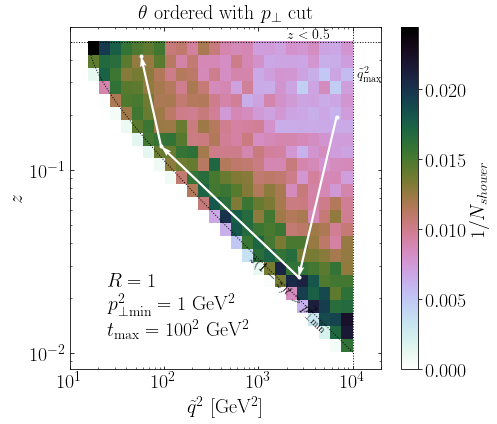

In [312]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(res.T[0])), log10(max(res.T[0])), 25)
ybins = logspace(log10(min(1.-res.T[1])),log10(0.5), 25)
h = ax.hist2d(res.T[0], 1.-res.T[1], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='cubehelix_r')
plot(jet_coord_example.T[0], 1.-jet_coord_example.T[1],'w.-',lw=1)
x=jet_coord_example.T[0]
y=1.-jet_coord_example.T[1]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
tvec = logspace(log10(16.*pT2_min),log10(t_max),200)
plot(tvec,0.5*(1.-sqrt(1.-4.*sqrt(pT2_min/tvec))),'k:',lw=1)
text(2e3, 0.52, r'$z<0.5$', fontsize=14)
text(7e2, 3e-2, r'$z(1-z)t>p_{\perp\rm min}^2$', rotation=-43, fontsize=14)
text(1.1e4, 0.3, r'$\tilde q^2_{\rm max}$', fontsize=14)
plot([0.1,5e4],[0.5,0.5],'k:',lw=1)
plot([t_max,t_max],[1e-5,1],'k:',lw=1)
cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')

xlim(10,2*t_max)
ylim(0.8*min(1.-res.T[1]),0.6)
xlabel(r'$\tilde q^2$ [GeV$^2$]', fontsize=20)
ylabel(r'$z$', fontsize=20)
cbar.set_label(r"$1/N_{shower}$", fontsize=20)
title(r'$\theta$ ordered with $p_\perp$ cut', fontsize=20)
text(25, 0.012, r'$t_{\rm max}=100^2$ GeV$^2$', fontsize=20)
text(25, 0.016, r'$p_{\perp\rm min}^2=1$ GeV$^2$', fontsize=20)
text(25, 0.023, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
tight_layout()
show()

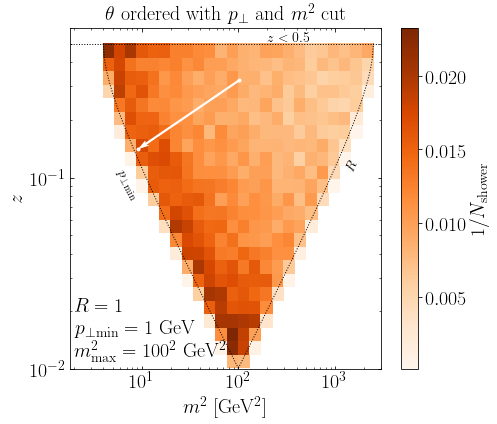

In [176]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(res.T[5])), log10(max(res.T[5])), 25)
ybins = logspace(log10(min(1.-res.T[1])),log10(0.5), 25)
h = ax.hist2d(res.T[5], 1.-res.T[1], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Oranges', cmin=1./N)
plot(jet_coord_example.T[5], 1.-jet_coord_example.T[1],'w.-',lw=1)
x=jet_coord_example.T[5]
y=1.-jet_coord_example.T[1]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
tvec = logspace(log10(4.*pT2_min),log10(t_max),200)
loglog(tvec,0.5*(1.-sqrt(1.-4.*pT2_min/tvec)),'k:',lw=1)
tvec = logspace(log10(4.*pT2_min),log10(t_max/4.),200)
loglog(tvec,0.5*(1.-sqrt(1.-4.*tvec/t_max)),'k:',lw=1)
text(2e2, 0.51, r'$z<0.5$', fontsize=14)
text(5e0, 0.1, r'$p_{\perp\rm min}$', rotation=-62, fontsize=14)
text(1.2e3, 0.11, r'$R$', rotation=65, fontsize=14)
plot([0.1,5e4],[0.5,0.5],'k:',lw=1)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(1.8,3e3)
ylim(1e-2,0.6)
xlabel(r'$m^2$ [GeV$^2$]', fontsize=20)
ylabel(r'$z$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'$\theta$ ordered with $p_\perp$ and $m^2$ cut', fontsize=20)
text(2., 0.011, r'$m^2_{\rm max}=100^2$ GeV$^2$', fontsize=20)
text(2., 0.0149, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
text(2., 0.02, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("ShowerPlane_theta_ordered_pt_t_cut.pdf", bbox_inches="tight")
tight_layout()
show()

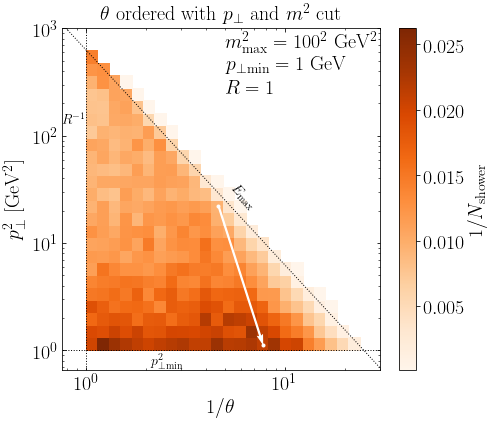

In [177]:
fig, ax = subplots()
figsize(7,6)

#fancy colormap: cubehelix_r
xbins = logspace(log10(min(1./res.T[4])),log10(max(1./res.T[4])), 25)
ybins = logspace(log10(min(res.T[3])),log10(max(res.T[3])), 25)
h = ax.hist2d(1./res.T[4], res.T[3], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Oranges', cmin=1./N)
plot(1./jet_coord_example.T[4], jet_coord_example.T[3],'w.-',lw=1)
x=1./jet_coord_example.T[4]
y=jet_coord_example.T[3]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
plot([1e-5,1e5],[pT2_min,pT2_min],'k:',lw=1)
text(2.1e0, 0.68, r'$p^2_{\perp\rm min}$', fontsize=14)
invtheta=logspace(-3,2,30)
loglog(invtheta,sqrt(t_max/R)**2/16./invtheta**2,'k:',lw=1)
text(5.1e0, 2.9e1, r'$E_{\rm max}$', rotation=-47, fontsize=14)
plot([1,1],[1e-1,1e4], 'k:', lw=1)
text(7.5e-1, 1.3e2, r'$R^{-1}$',  fontsize=14)

cbar = colorbar(h[3], ax=ax)
xlabel(r'$1/\theta$', fontsize=20)
ylabel(r'$p^2_{\perp}$ [GeV$^2$]', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75,3e1)
ylim(0.65,1e3)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'$\theta$ ordered with $p_\perp$ and $m^2$ cut', fontsize=20)
text(5., 6e2, r'$m^2_{\rm max}=100^2$ GeV$^2$', fontsize=20)
text(5., 3.9e2, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
text(5., 2.5e2, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("LundPlane_theta_ordered_pt_t_cut.pdf", bbox_inches="tight")
tight_layout()
show()

### Virtual ordering

In [178]:
jet_coord_example = shower(1,'theta_mord',t_max,pT2_min,R,'excl')[0]
jet_coord_example

0


array([[7.89659468e+03, 9.60995916e-01, 1.00000000e+02, 1.10943813e+01,
        8.88627857e-01, 2.95986203e+02, 6.75707171e-01, 1.00000000e+00],
       [2.08963361e+03, 8.95957843e-01, 9.60995916e+01, 1.81578319e+01,
        4.75678509e-01, 1.94790184e+02, 9.86698503e-01, 1.00000000e+00],
       [7.05161898e+02, 9.48996052e-01, 8.61011828e+01, 1.65205782e+00,
        3.08414864e-01, 3.41316309e+01, 5.04524283e+00, 1.00000000e+00]])

In [179]:
res = shower(10000,'theta_mord',t_max,pT2_min,R,'excl')[0]

0
5000


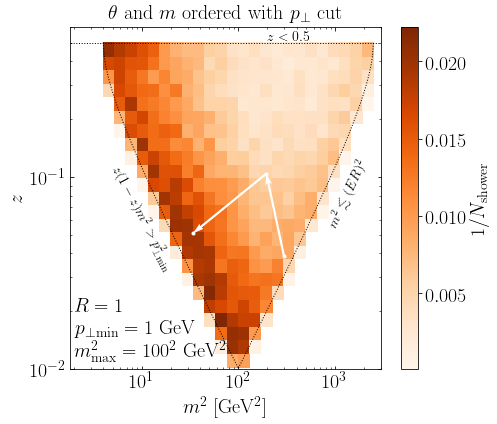

In [180]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(res.T[5])), log10(max(res.T[5])), 25)
ybins = logspace(log10(min(1.-res.T[1])),log10(0.5), 25)
h = ax.hist2d(res.T[5], 1.-res.T[1], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Oranges', cmin=1./N)
plot(jet_coord_example.T[5], 1.-jet_coord_example.T[1],'w.-',lw=1)
x=jet_coord_example.T[5]
y=1.-jet_coord_example.T[1]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
tvec = logspace(log10(4.*pT2_min),log10(t_max),200)
loglog(tvec,0.5*(1.-sqrt(1.-4.*pT2_min/tvec)),'k:',lw=1)
tvec = logspace(log10(4.*pT2_min),log10(t_max/4.),200)
loglog(tvec,0.5*(1.-sqrt(1.-4.*tvec/t_max)),'k:',lw=1)
text(2e2, 0.51, r'$z<0.5$', fontsize=14)
text(4.3e0, 0.1, r'$z(1-z)m^2>p_{\perp\rm min}^2$', rotation=-62, fontsize=14)
text(8e2, 0.11, r'$m^2\lesssim(ER)^2$', rotation=65, fontsize=14)
plot([0.1,5e4],[0.5,0.5],'k:',lw=1)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(1.8,3e3)
ylim(1e-2,0.6)
xlabel(r'$m^2$ [GeV$^2$]', fontsize=20)
ylabel(r'$z$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'$\theta$ and $m$ ordered with $p_\perp$ cut', fontsize=20)
text(2., 0.011, r'$m^2_{\rm max}=100^2$ GeV$^2$', fontsize=20)
text(2., 0.0149, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
text(2., 0.02, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("ShowerPlane_theta_t_ordered_pt_cut.pdf", bbox_inches="tight")
tight_layout()
show()

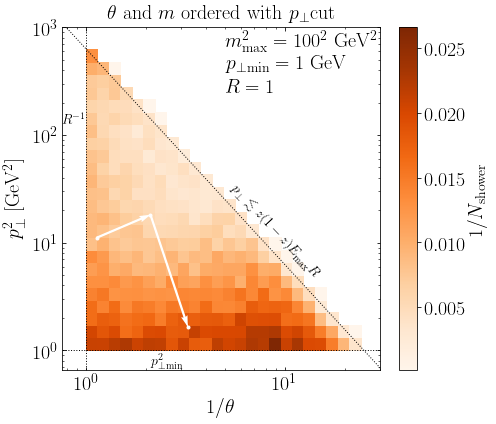

In [181]:
fig, ax = subplots()
figsize(7,6)

#fancy colormap: cubehelix_r
xbins = logspace(log10(min(1./res.T[4])),log10(max(1./res.T[4])), 25)
ybins = logspace(log10(min(res.T[3])),log10(max(res.T[3])), 25)
h = ax.hist2d(1./res.T[4], res.T[3], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Oranges', cmin=1./N)
plot(1./jet_coord_example.T[4], jet_coord_example.T[3],'w.-',lw=1)
x=1./jet_coord_example.T[4]
y=jet_coord_example.T[3]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
plot([1e-5,1e5],[pT2_min,pT2_min],'k:',lw=1)
text(2.1e0, 0.68, r'$p^2_{\perp\rm min}$', fontsize=14)
invtheta=logspace(-3,2,30)
loglog(invtheta,sqrt(t_max/R)**2/16./invtheta**2,'k:',lw=1)
text(5.1e0, 2.9e1, r'$p_\perp\lesssim z(1-z)E_{\rm max}R$', rotation=-47, fontsize=14)
plot([1,1],[1e-1,1e4], 'k:', lw=1)
text(7.5e-1, 1.3e2, r'$R^{-1}$',  fontsize=14)

cbar = colorbar(h[3], ax=ax)
xlabel(r'$1/\theta$', fontsize=20)
ylabel(r'$p^2_{\perp}$ [GeV$^2$]', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75,3e1)
ylim(0.65,1e3)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'$\theta$ and $m$ ordered with $p_\perp$cut', fontsize=20)
text(5., 6e2, r'$m^2_{\rm max}=100^2$ GeV$^2$', fontsize=20)
text(5., 3.9e2, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
text(5., 2.5e2, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("LundPlane_theta_t_ordered_pt_cut.pdf", bbox_inches="tight")
tight_layout()
show()

### Transverse ordering

In [182]:
jet_coord_example = shower(1,'theta_pTord',t_max,pT2_min,R,'excl')[0]
res = shower(10000,'theta_pTord',t_max,pT2_min,R,'excl')[0]

0
0
5000


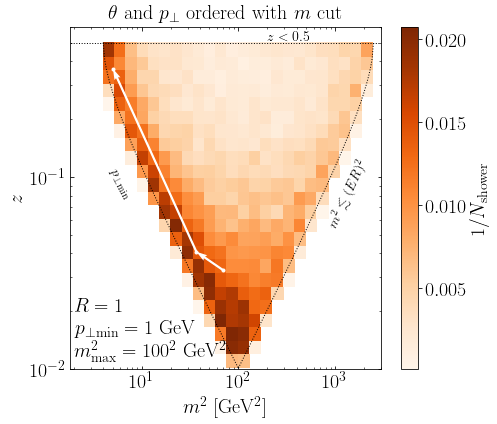

In [183]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(res.T[5])), log10(max(res.T[5])), 25)
ybins = logspace(log10(min(1.-res.T[1])),log10(0.5), 25)
h = ax.hist2d(res.T[5], 1.-res.T[1], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Oranges', cmin=1./N)
plot(jet_coord_example.T[5], 1.-jet_coord_example.T[1],'w.-',lw=1)
x=jet_coord_example.T[5]
y=1.-jet_coord_example.T[1]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
tvec = logspace(log10(4.*pT2_min),log10(t_max),200)
loglog(tvec,0.5*(1.-sqrt(1.-4.*pT2_min/tvec)),'k:',lw=1)
tvec = logspace(log10(4.*pT2_min),log10(t_max/4.),200)
loglog(tvec,0.5*(1.-sqrt(1.-4.*tvec/t_max)),'k:',lw=1)
text(2e2, 0.51, r'$z<0.5$', fontsize=14)
text(4.3e0, 0.1, r'$p_{\perp\rm min}$', rotation=-62, fontsize=14)
text(8e2, 0.11, r'$m^2\lesssim(ER)^2$', rotation=65, fontsize=14)
plot([0.1,5e4],[0.5,0.5],'k:',lw=1)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(1.8,3e3)
ylim(1e-2,0.6)
xlabel(r'$m^2$ [GeV$^2$]', fontsize=20)
ylabel(r'$z$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'$\theta$ and $p_\perp$ ordered with $m$ cut', fontsize=20)
text(2., 0.011, r'$m^2_{\rm max}=100^2$ GeV$^2$', fontsize=20)
text(2., 0.0149, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
text(2., 0.02, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("ShowerPlane_theta_pt_ordered_t_cut.pdf", bbox_inches="tight")
tight_layout()
show()

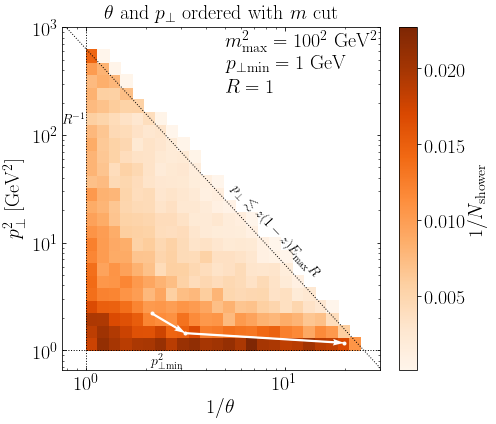

In [184]:
fig, ax = subplots()
figsize(7,6)

#fancy colormap: cubehelix_r
xbins = logspace(log10(min(1./res.T[4])),log10(max(1./res.T[4])), 25)
ybins = logspace(log10(min(res.T[3])),log10(max(res.T[3])), 25)
h = ax.hist2d(1./res.T[4], res.T[3], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Oranges', cmin=1./N)
plot(1./jet_coord_example.T[4], jet_coord_example.T[3],'w.-',lw=1)
x=1./jet_coord_example.T[4]
y=jet_coord_example.T[3]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
plot([1e-5,1e5],[pT2_min,pT2_min],'k:',lw=1)
text(2.1e0, 0.68, r'$p^2_{\perp\rm min}$', fontsize=14)
invtheta=logspace(-3,2,30)
loglog(invtheta,sqrt(t_max/R)**2/16./invtheta**2,'k:',lw=1)
text(5.1e0, 2.9e1, r'$p_\perp\lesssim z(1-z)E_{\rm max}R$', rotation=-47, fontsize=14)
plot([1,1],[1e-1,1e4], 'k:', lw=1)
text(7.5e-1, 1.3e2, r'$R^{-1}$',  fontsize=14)

cbar = colorbar(h[3], ax=ax)
xlabel(r'$1/\theta$', fontsize=20)
ylabel(r'$p^2_{\perp}$ [GeV$^2$]', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75,3e1)
ylim(0.65,1e3)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'$\theta$ and $p_\perp$ ordered with $m$ cut', fontsize=20)
text(5., 6e2, r'$m^2_{\rm max}=100^2$ GeV$^2$', fontsize=20)
text(5., 3.9e2, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
text(5., 2.5e2, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("LundPlane_theta_pt_ordered_t_cut.pdf", bbox_inches="tight")
tight_layout()
show()

### Multiplicity

In [108]:
Nem_theta = shower(N, 'theta', 'N_emission', t_max, pT2_min, R)
Nem_theta_mord = shower(N, 'theta_mord', 'N_emission', t_max, pT2_min, R)
Nem_theta_pTord = shower(N, 'theta_pTord', 'N_emission', t_max, pT2_min, R)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


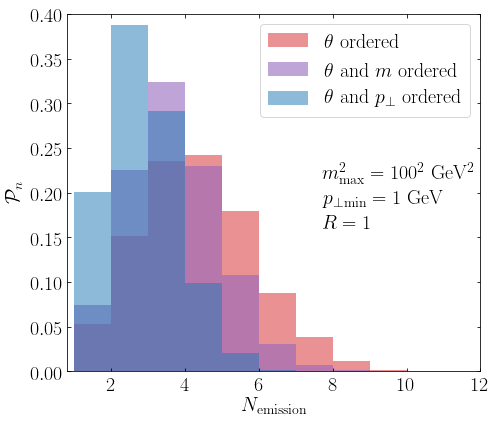

In [114]:
fig, ax = subplots()
figsize(7,6)

xbin=linspace(1,12,12)
h = ax.hist(Nem_theta, bins=xbin, density=True, histtype='stepfilled', alpha=0.5, lw=2, color='C3', label=r'$\theta$ ordered')
h = ax.hist(Nem_theta_mord, bins=xbin, density=True, histtype='stepfilled', alpha=0.6, lw=2, color='C4', label=r'$\theta$ and $m$ ordered')
h = ax.hist(Nem_theta_pTord, bins=xbin, density=True, histtype='stepfilled', alpha=0.5, lw=2, color='C0', label=r'$\theta$ and $p_{\perp}$ ordered')

xlim(0.8,12)
ylim(0,0.4)
xlabel(r'$N_{\rm emission}$', fontsize=20)
ylabel(r'$\mathcal{P}_n$', fontsize=20)
text(7.7, 0.21, r'$m^2_{\rm max}=100^2$ GeV$^2$', fontsize=20)
text(7.7, 0.185, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
text(7.7, 0.16, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=20,loc='upper right');
#savefig("N_emission_theta.pdf", bbox_inches="tight")
tight_layout()
show()

In [104]:
def PN_t(n, t_max, pT2_min):
    CA = 3.
    alpha = 0.1
    return exp(-(log(t_max/pT2_min)**2.-log(4.)**2.)*CA*alpha/2./pi)*1./math.factorial(n)*pow((log(t_max/pT2_min)**2.-log(4.)**2.)*CA*alpha/2./pi, n)
def PN_tf(n, t_max, pT2_min):
    CA = 3.
    alpha = 0.075
    return exp(-(log(t_max/pT2_min)**2.-log(4.)**2.)*CA*alpha/pi)*1./math.factorial(n)*pow((log(t_max/pT2_min)**2.-log(4.)**2.)*CA*alpha/pi, n)
def PN_pt(n, t_max, pT2_min):
    CA = 3.
    alpha = 0.09
    return exp(-(log(t_max/pT2_min)**2.-log(4.)**2.)*CA*alpha/2./pi)*1./math.factorial(n)*pow((log(t_max/pT2_min)**2.-log(4.)**2.)*CA*alpha/2./pi, n)
def PN_theta(n, t_max, pT2_min):
    CA = 3.
    alpha = 0.23
    return exp(-(log(sqrt(t_max/pT2_min))**2.-log(4.)**2.)*CA*alpha/pi)*1./math.factorial(n)*pow((log(sqrt(t_max/pT2_min))**2.-log(4.)**2.)*CA*alpha/pi, n)

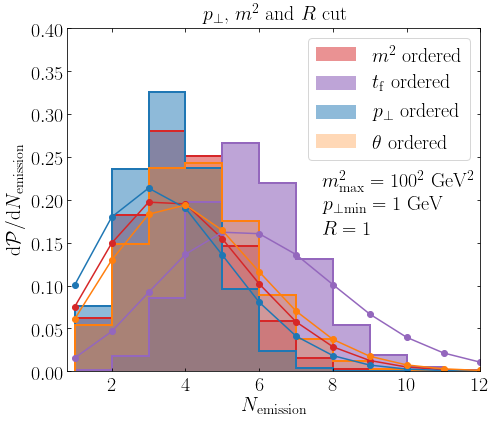

In [105]:
fig, ax = subplots()
figsize(7,6)

xbin=linspace(1,12,12)
h = ax.hist(N_emission_t_order_pt_R_cut, bins=xbin, density=True, histtype='stepfilled', alpha=0.5, lw=2, color='C3', label=r'$m^2$ ordered')
h = ax.hist(N_emission_tf_order_pt_t_R_cut, bins=xbin, density=True, histtype='stepfilled', alpha=0.6, lw=2, color='C4', label=r'$t_{\rm f}$ ordered')
h = ax.hist(N_emission_pt_order_t_R_cut, bins=xbin, density=True, histtype='stepfilled', alpha=0.5, lw=2, color='C0', label=r'$p_{\perp}$ ordered')
h = ax.hist(N_emission_theta, bins=xbin, density=True, histtype='stepfilled', alpha=0.3, lw=2, color='C1', label=r'$\theta$ ordered')
h = ax.hist(N_emission_t_order_pt_R_cut, bins=xbin, density=True, histtype='step', lw=2, color='C3')
h = ax.hist(N_emission_tf_order_pt_t_R_cut, bins=xbin, density=True, histtype='step', lw=2, color='C4')
h = ax.hist(N_emission_pt_order_t_R_cut, bins=xbin, density=True, histtype='step', lw=2, color='C0')
h = ax.hist(N_emission_theta, bins=xbin, density=True, histtype='step', lw=2, color='C1')

multi_t=array([[i, PN_t(i,t_max,pT2_min)] for i in range(1,30)])
plot(multi_t.T[0], multi_t.T[1], 'C3o-')
multi_tf=array([[i, PN_tf(i,t_max,pT2_min)] for i in range(1,30)])
plot(multi_tf.T[0], multi_tf.T[1], 'C4o-')
multi_pt=array([[i, PN_pt(i,t_max,pT2_min)] for i in range(1,30)])
plot(multi_pt.T[0], multi_pt.T[1], 'C0o-')
multi_theta=array([[i, PN_theta(i,t_max,pT2_min)] for i in range(1,30)])
plot(multi_theta.T[0], multi_theta.T[1], 'C1o-')

xlim(0.8,12)
ylim(0,0.4)
xlabel(r'$N_{\rm emission}$', fontsize=20)
ylabel(r'$\mathcal{P}_n$', fontsize=20)
title(r'$p_\perp$, $m^2$ and $R$ cut', fontsize=20)
text(7.7, 0.21, r'$m^2_{\rm max}=100^2$ GeV$^2$', fontsize=20)
text(7.7, 0.185, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
text(7.7, 0.16, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=20,loc='upper right');
savefig("N_emission_shower.pdf", bbox_inches="tight")
tight_layout()
show()

### Test Veto algorithm

In [84]:
def P_gg(x):
    CA = 3.
    return CA * (x/(1.-x) + (1.-x)/x + x*(1.-x))
def P_gg_over(x):
    CA = 3.
    return CA * (1./(1.-x) + 1./x)
def f(q2, t_max, pT2_min):
    int_temp = 1./q2 * integrate.quad(lambda z: alpha_s(z*z*(1.-z)*(1.-z)*q2)/2./pi*P_gg(z), 0.5*(1.-sqrt(1.-4.*sqrt(pT2_min/q2))), 0.5*(1.+sqrt(1.-4.*sqrt(pT2_min/q2))))[0]
    return int_temp
def S(q2, t_max, pT2_min):
    return exp(- integrate.quad(lambda tt: f(tt, t_max, pT2_min), q2, t_max)[0])
def g(q2, t_max, pT2_min):
    CA = 3.
    eps = sqrt(pT2_min/t_max)
    return 1./q2 * alpha_s(0)/2./pi * 2.*CA*log((1.-eps)/eps)
def S_over(q2, t_max, pT2_min):
    CA = 3.
    eps=sqrt(pT2_min/t_max)
    return exp(- log(t_max/q2) * alpha_s(0)/2./pi * 2.*CA*log((1.-eps)/eps))

In [85]:
t_eff = pT2_min
t=logspace(log10(16.*t_eff), log10(t_max), 50)
dPperdt=array([[i, f(i,t_max,t_eff), S(i,t_max,t_eff), f(i,t_max,t_eff)*S(i,t_max,t_eff)] for i in t])
dPgperdt=array([[i, g(i,t_max,t_eff), S_over(i,t_max,t_eff), g(i,t_max,t_eff)*S_over(i,t_max,t_eff)] for i in t])

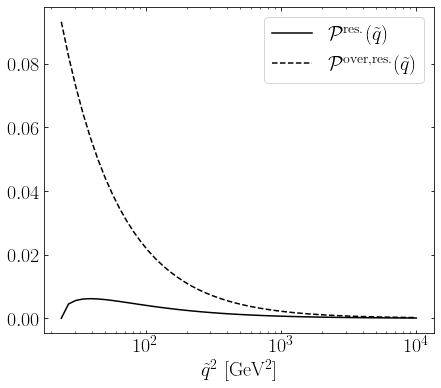

In [15]:
figsize(7,6)
semilogx(dPperdt.T[0], dPperdt.T[1], 'k-', label=r'$\mathcal{P}^{\rm res.}(\tilde q)$')
plot(dPgperdt.T[0], dPgperdt.T[1], 'k--', label=r'$\mathcal{P}^{\rm over,res.}(\tilde q)$')
xlabel(r'$\tilde q^2$ [GeV$^2$]', fontsize=20)
#ylabel(r'$\Delta(t_{max})/\Delta(t)$', fontsize=20)
tick_params(axis='both', top=True, right=True, which='both', direction='in', labelsize=20)
legend(fontsize=20,loc='upper right');
show()

In [88]:
t_eff = pT2_min
res_t = []
res_z = []
i = 0
while (i<100000):
    t_init = t_max
    while (True):
        eps = sqrt(t_eff/t_max)
        t = t_init * pow(rand(), 2.*pi / alpha_s(0) /  (2.*3.*(log(1. - eps) - log(eps))))
        if (t < 16.*t_eff): break
        z = 1. / (1. + pow(eps/(1.-eps), 2.*rand()-1.))
        if (alpha_s(z*z*(1.-z)*(1.-z)*t)/alpha_s(0) > rand() and P_gg(z)/P_gg_over(z) > rand() and z*z*(1.-z)*(1.-z)*t > t_eff):
            res_t = append(res_t, t)
            res_z = append(res_z, z)
            i += 1
            break
        else: 
            t_init = t

In [89]:
t_eff = pT2_min
resg_t = []
resg_z = []
i = 0
while (i<100000):
    t_init = t_max
    eps = sqrt(t_eff/t_max)
    t = t_init * pow(rand(), 2.*pi / alpha_s(0) / (2.*3.*(log(1. - eps) - log(eps))))
    if (t < 16.*t_eff): break
    z = 1. / (1. + pow(eps/(1.-eps), 2.*rand()-1.))
    resg_t = append(resg_t, t)
    resg_z = append(resg_z, z)
    i += 1

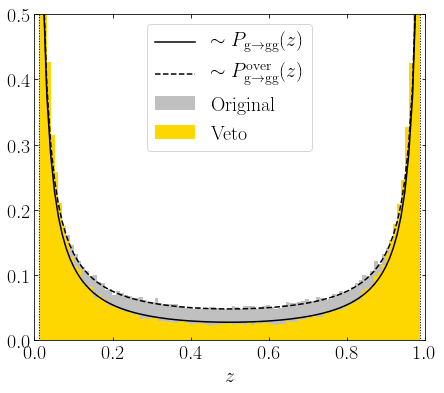

In [6]:
t_max = 100.**2
z = linspace(sqrt(t_eff/t_max), 1.-sqrt(t_eff/t_max),100)

figsize(7,6)
plot(z, P_gg(z)/P_gg(sqrt(t_eff/t_max)), 'k-', label=r'$\sim P_{\rm g\rightarrow gg}(z)$')
plot(z, P_gg_over(z)/P_gg_over(sqrt(t_eff/t_max)), 'k--', label=r'$\sim P^{\rm over}_{\rm g\rightarrow gg}(z)$')
hist(resg_z, bins=linspace(sqrt(t_eff/t_max), 1.-sqrt(t_eff/t_max),100), weights=ones(len(resg_z))/9000., color='silver', label='Original')
hist(res_z, bins=linspace(sqrt(t_eff/t_max), 1.-sqrt(t_eff/t_max),100), weights=ones(len(res_z))/11000., color='gold', label='Veto')
plot([sqrt(t_eff/t_max), sqrt(t_eff/t_max)],[-1,1],'k:',lw=1)
plot([1.-sqrt(t_eff/t_max), 1.-sqrt(t_eff/t_max)],[-1,1],'k:',lw=1)
xlim(0,1)
ylim(-0.,0.5)
xlabel(r'$z$', fontsize=20)
#ylabel(r'$P_{gg}(x)$', fontsize=20)
tick_params(axis='both', top=True, right=True, which='both', direction='in', labelsize=20)
legend(fontsize=20,loc='upper center');
show()

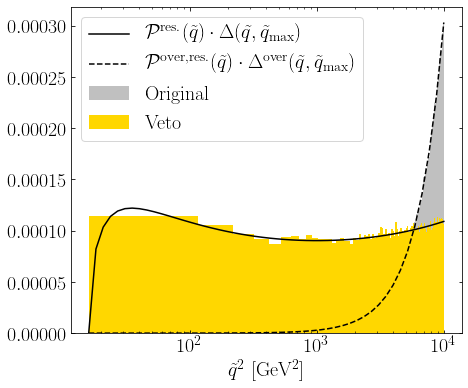

In [92]:
eps = sqrt(pT2_min/t_max)
R=linspace(0,1,300)

figsize(7,6)
semilogx(dPperdt.T[0], dPperdt.T[3], 'k-', label=r'$\mathcal{P}^{\rm res.}(\tilde q)\cdot\Delta(\tilde q,\tilde q_{\rm max})$')
plot(dPgperdt.T[0], dPgperdt.T[3], 'k--', label=r'$\mathcal{P}^{\rm over,res.}(\tilde q)\cdot\Delta^{\rm over}(\tilde q,\tilde q_{\rm max})$')
hist(resg_t, bins=linspace(16.*t_eff, t_max, 100), weights=ones(len(resg_t))/1e7, color='silver', label=r'Original')
hist(res_t, bins=linspace(16.*t_eff, t_max, 100), weights=ones(len(res_t))/1e7, color='gold', label=r'Veto')
xlabel(r'$\tilde q^2$ [GeV$^2$]', fontsize=20)
#ylabel(r'$\Delta(t_{max})/\Delta(t)$', fontsize=20)
tick_params(axis='both', top=True, right=True, which='both', direction='in', labelsize=20)
legend(fontsize=20,loc='upper left');
savefig("Vetotest_theta_ordered.pdf", bbox_inches="tight")
show()

## Formation Time Ordered Shower

### Minimal cut

In [166]:
jet_coord_example = shower(1,'tf',t_max,pT2_min,R,'excl')[0]
res = shower(10000,'tf',t_max,pT2_min,R,'excl')[0]

0
0
5000


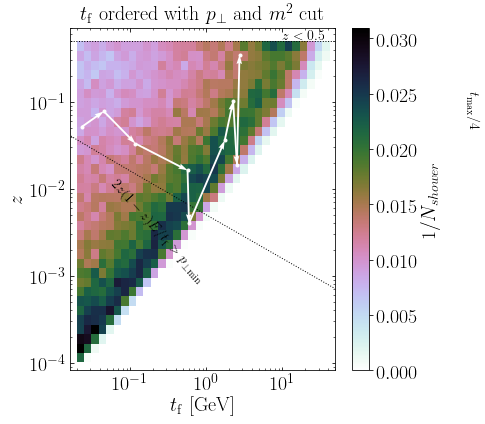

In [7]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(res.T[6])), log10(max(res.T[6])), 35)
ybins = logspace(log10(min(1.-res.T[1])),log10(0.5), 35)
h = ax.hist2d(res.T[6], 1.-res.T[1], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='cubehelix_r')
plot(jet_coord_example.T[6], 1.-jet_coord_example.T[1],'w.',lw=1)
x=jet_coord_example.T[6]
y=1.-jet_coord_example.T[1]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
lf2vec = logspace(log10((2.*pT2_min/sqrt(t_max))**2),log10(t_max/4.),200)
loglog(lf2vec, 0.5*(1.-sqrt(1.-2.*pT2_min/sqrt(t_max)/sqrt(lf2vec))),'k:',lw=1)
text(1e1, 0.52, r'$z<0.5$', fontsize=14)
text(t_max/4., 0.1, r'$t_{\rm max}/4$', rotation=-90, fontsize=14)
text(5e-2, 0.01, r'$2z(1-z)E/t_{\rm f}>p_{\perp\rm min}$', rotation=-48, fontsize=14)
plot([1e-5,5e4],[0.5,0.5],'k:',lw=1)
plot([t_max/4.,t_max/4.],[1e-5,1],'k:',lw=1)
cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')

xlim(0.8*2./sqrt(t_max),sqrt(t_max)/2./pT2_min)
ylim(0.8*min(1.-res.T[1]),0.7)
xlabel(r'$t_{\rm f}$ [GeV]', fontsize=20)
ylabel(r'$z$', fontsize=20)
cbar.set_label(r"$1/N_{shower}$", fontsize=20)
title(r'$t_{\rm f}$ ordered with $p_\perp$ and $m^2$ cut', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
tight_layout()
show()

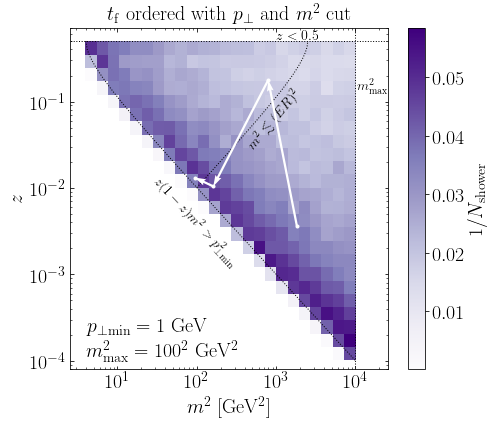

In [167]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(res.T[5])), log10(max(res.T[5])), 25)
ybins = logspace(log10(min(1.-res.T[1])),log10(0.5), 25)
h = ax.hist2d(res.T[5], 1.-res.T[1], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Purples', cmin=1./N)
plot(jet_coord_example.T[5], 1.-jet_coord_example.T[1],'w.',lw=1)
x=jet_coord_example.T[5]
y=1.-jet_coord_example.T[1]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
tvec = logspace(log10(4.*pT2_min),log10(t_max),200)
loglog(tvec,0.5*(1.-sqrt(1.-4.*pT2_min/tvec)),'k:',lw=1)
text(1e3, 0.52, r'$z<0.5$', fontsize=14)
text(1.05*t_max, 0.12, r'$m^2_{\rm max}$', fontsize=14)
text(2.5e1, 0.01, r'$z(1-z)m^2>p^2_{\perp\rm min}$', rotation=-47, fontsize=14)
plot([0.1,5e4],[0.5,0.5],'k:',lw=1)
plot([t_max,t_max],[1e-5,1],'k:',lw=1)
tvec = logspace(log10(1e2),log10(t_max/4.),200)
loglog(tvec,0.5*(1.-sqrt(1.-4.*tvec/t_max)),'k:',lw=1)
text(4e2, 0.11, r'$m^2\lesssim(ER)^2$', rotation=50, fontsize=14)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(2.5*pT2_min,2.6e4)
ylim(8e-5,0.7)
xlabel(r'$m^2$ [GeV$^2$]', fontsize=20)
ylabel(r'$z$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'$t_{\rm f}$ ordered with $p_\perp$ and $m^2$ cut', fontsize=20)
text(4, 1e-4, r'$m^2_{\rm max}=100^2$ GeV$^2$', fontsize=20)
text(4, 2e-4, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("ShowerPlane_tf_ordered_pt_t_cut.pdf", bbox_inches="tight")
tight_layout()
show()

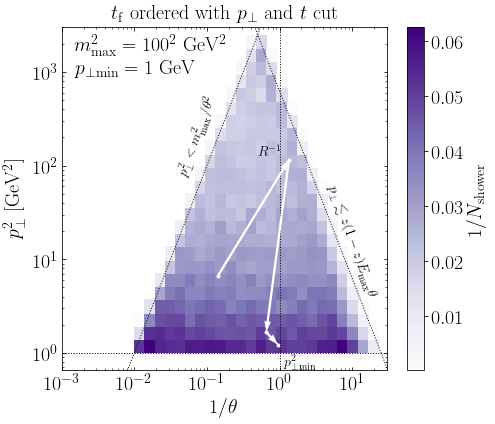

In [168]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(1./res.T[4])),log10(max(1./res.T[4])), 25)
ybins = logspace(log10(min(res.T[3])),log10(max(res.T[3])), 25)
h = ax.hist2d(1./res.T[4], res.T[3], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Purples', cmin=1./N)
plot(1./jet_coord_example.T[4], jet_coord_example.T[3],'w.-',lw=1)
x=1./jet_coord_example.T[4]
y=jet_coord_example.T[3]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
plot([1e-5,1e5],[pT2_min,pT2_min],'k:',lw=1)
text(1.1e0, 0.67, r'$p^2_{\perp\rm min}$', fontsize=14)
invtheta=logspace(-3,2,30)
loglog(invtheta,(sqrt(t_max)/R)**2/16./invtheta**2,'k:',lw=1)
text(4e0, 5e1, r'$p_\perp\lesssim z(1-z)E_{\rm max}\theta$', rotation=-70, fontsize=14)
loglog(invtheta,(sqrt(t_max)/R)**2*invtheta**2,'k:',lw=1)
text(4e-2, 4e2, r'$p^2_\perp<m^2_{\rm max}/\theta^2$', rotation=70, fontsize=14)
plot([1,1],[1e-1,1e4], 'k:', lw=1)
text(5e-1, 1.3e2, r'$R^{-1}$',  fontsize=14)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(1e-3,3e1)
ylim(0.65,3e3)
ylabel(r'$p^2_\perp$ [GeV$^2$]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'$t_{\rm f}$ ordered with $p_\perp$ and $t$ cut', fontsize=20)
text(1.5e-3, 0.9e3, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
text(1.5e-3, 1.5e3, r'$m^2_{\rm max}=100^2$ GeV$^2$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("LundPlane_tf_ordered_pt_t_cut.pdf", bbox_inches="tight")
tight_layout()
show()

### Angular Cut

In [169]:
jet_coord_example = shower(1,'tf_Rcut',t_max,pT2_min,R,'excl')[0]
res = shower(10000,'tf_Rcut',t_max,pT2_min,R,'excl')[0]

0
0
5000


/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt


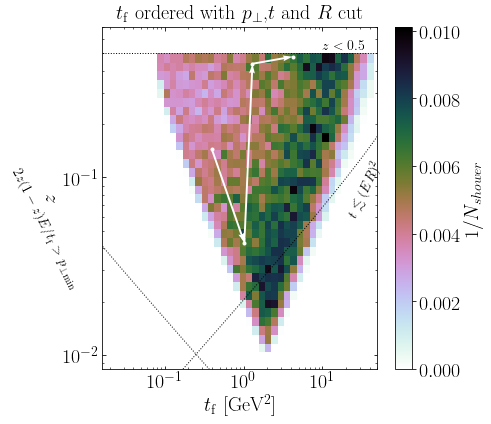

In [16]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(res.T[6])), log10(max(res.T[6])), 35)
ybins = logspace(log10(min(1.-res.T[1])),log10(0.5), 35)
h = ax.hist2d(res.T[6], 1.-res.T[1], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='cubehelix_r')
plot(jet_coord_example.T[6], 1.-jet_coord_example.T[1],'w.',lw=1)
x=jet_coord_example.T[6]
y=1.-jet_coord_example.T[1]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
lf2vec = logspace(log10((2.*pT2_min/sqrt(t_max))**2),log10(t_max/4.),200)
loglog(lf2vec, 0.5*(1.-sqrt(1.-2.*pT2_min/sqrt(t_max)/sqrt(lf2vec))),'k:',lw=1)
text(1e1, 0.52, r'$z<0.5$', fontsize=14)
text(1e-3, 0.1, r'$2z(1-z)E/t_{\rm f}>p_{\perp\rm min}$', rotation=-63, fontsize=14)
plot([1e-5,5e4],[0.5,0.5],'k:',lw=1)
lf2vec = logspace(log10((32.*pT2_min/sqrt(t_max))**2),log10(t_max/8./8.),2000)
loglog(lf2vec, 0.5*(1.-sqrt(1.-8.*sqrt(lf2vec)/sqrt(t_max))),'k:',lw=1)
text(2e1, 0.11, r'$t\lesssim(ER)^2$', rotation=65, fontsize=14)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.8*2./sqrt(t_max),sqrt(t_max)/2./pT2_min)
ylim(0.8*min(1.-res.T[1]),0.7)
xlabel(r'$t_{\rm f}$ [GeV$^2$]', fontsize=20)
ylabel(r'$z$', fontsize=20)
cbar.set_label(r"$1/N_{shower}$", fontsize=20)
title(r'$t_{\rm f}$ ordered with $p_\perp$,$t$ and $R$ cut', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
tight_layout()
show()

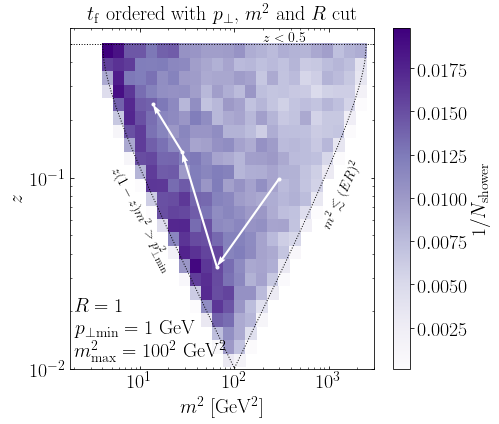

In [170]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(res.T[5])), log10(max(res.T[5])), 25)
ybins = logspace(log10(min(1.-res.T[1])),log10(0.5), 25)
h = ax.hist2d(res.T[5], 1.-res.T[1], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Purples', cmin=1./N)
plot(jet_coord_example.T[5], 1.-jet_coord_example.T[1],'w.',lw=1)
x=jet_coord_example.T[5]
y=1.-jet_coord_example.T[1]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
tvec = logspace(log10(4.*pT2_min),log10(t_max),200)
loglog(tvec,0.5*(1.-sqrt(1.-4.*pT2_min/tvec)),'k:',lw=1)
tvec = logspace(log10(4.*pT2_min),log10(t_max/4.),200)
loglog(tvec,0.5*(1.-sqrt(1.-4.*tvec/t_max)),'k:',lw=1)
text(2e2, 0.51, r'$z<0.5$', fontsize=14)
text(4.3e0, 0.1, r'$z(1-z)m^2>p_{\perp\rm min}^2$', rotation=-62, fontsize=14)
text(8e2, 0.11, r'$m^2\lesssim(ER)^2$', rotation=65, fontsize=14)
plot([0.1,5e4],[0.5,0.5],'k:',lw=1)

xlabel(r'$m^2$ [GeV$^2$]', fontsize=20)
ylabel(r'$z$', fontsize=20)
cbar = colorbar(h[3], ax=ax, )
xlim(1.8,3e3)
ylim(1e-2,0.6)
ax.set_xscale('log')
ax.set_yscale('log')
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'$t_{\rm f}$ ordered with $p_\perp$, $m^2$ and $R$ cut', fontsize=20)
text(2., 0.011, r'$m^2_{\rm max}=100^2$ GeV$^2$', fontsize=20)
text(2., 0.0149, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
text(2., 0.02, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("ShowerPlane_tf_ordered_pt_t_R_cut.pdf", bbox_inches="tight")
tight_layout()
show()

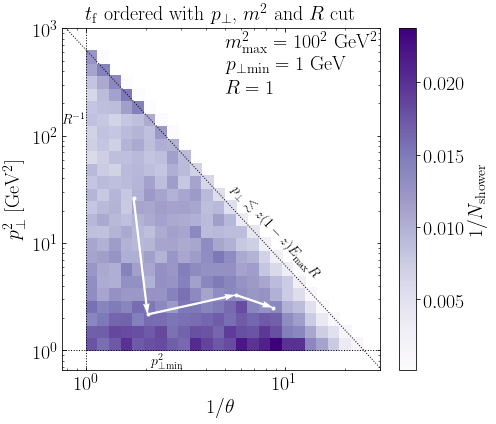

In [171]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(1./res.T[4])),log10(max(1./res.T[4])), 25)
ybins = logspace(log10(min(res.T[3])),log10(max(res.T[3])), 25)
h = ax.hist2d(1./res.T[4], res.T[3], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Purples', cmin=1./N)
plot(1./jet_coord_example.T[4], jet_coord_example.T[3],'w.-',lw=1)
x=1./jet_coord_example.T[4]
y=jet_coord_example.T[3]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
plot([1e-5,1e5],[pT2_min,pT2_min],'k:',lw=1)
text(2.1e0, 0.68, r'$p^2_{\perp\rm min}$', fontsize=14)
invtheta=logspace(-3,2,30)
loglog(invtheta,(sqrt(t_max)/R)**2/16./invtheta**2,'k:',lw=1)
text(5.1e0, 2.9e1, r'$p_\perp\lesssim z(1-z)E_{\rm max}R$', rotation=-47, fontsize=14)
plot([1,1],[1e-1,1e4], 'k:', lw=1)
text(7.5e-1, 1.3e2, r'$R^{-1}$',  fontsize=14)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75,3e1)
ylim(0.65,1e3)
ylabel(r'$p^2_\perp$ [GeV$^2$]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'$t_{\rm f}$ ordered with $p_\perp$, $m^2$ and $R$ cut', fontsize=20)
text(5., 6e2, r'$m^2_{\rm max}=100^2$ GeV$^2$', fontsize=20)
text(5., 3.9e2, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
text(5., 2.5e2, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("LundPlane_tf_ordered_pt_t_R_cut.pdf", bbox_inches="tight")
tight_layout()
show()

### Angular Veto

In [172]:
jet_coord_example = shower(1,'tf_Rord',t_max,pT2_min,R,'excl')[0]
res = shower(10000,'tf_Rord',t_max,pT2_min,R,'excl')[0]

0
0
5000


/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt


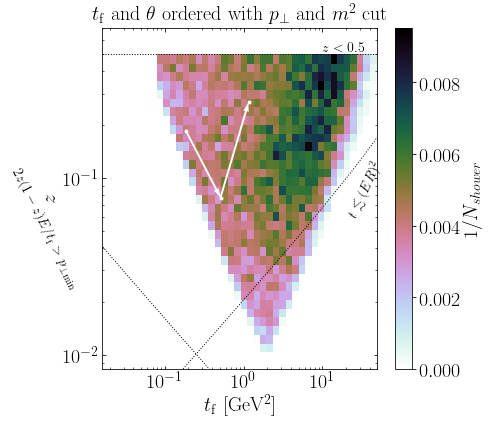

In [23]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(res.T[6])), log10(max(res.T[6])), 35)
ybins = logspace(log10(min(1.-res.T[1])),log10(0.5), 35)
h = ax.hist2d(res.T[6], 1.-res.T[1], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='cubehelix_r')
plot(jet_coord_example.T[6], 1.-jet_coord_example.T[1],'w.',lw=1)
x=jet_coord_example.T[6]
y=1.-jet_coord_example.T[1]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
lf2vec = logspace(log10((2.*pT2_min/sqrt(t_max))**2),log10(t_max/4.),200)
loglog(lf2vec, 0.5*(1.-sqrt(1.-2.*pT2_min/sqrt(t_max)/sqrt(lf2vec))),'k:',lw=1)
text(1e1, 0.52, r'$z<0.5$', fontsize=14)
text(1e-3, 0.1, r'$2z(1-z)E/t_{\rm f}>p_{\perp\rm min}$', rotation=-63, fontsize=14)
plot([1e-5,5e4],[0.5,0.5],'k:',lw=1)
lf2vec = logspace(log10((32.*pT2_min/sqrt(t_max))**2),log10(t_max/8./8.),2000)
loglog(lf2vec, 0.5*(1.-sqrt(1.-8.*sqrt(lf2vec)/sqrt(t_max))),'k:',lw=1)
text(2e1, 0.11, r'$t\lesssim(ER)^2$', rotation=65, fontsize=14)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.8*2./sqrt(t_max),sqrt(t_max)/2./pT2_min)
ylim(0.8*min(1.-res.T[1]),0.7)
xlabel(r'$t_{\rm f}$ [GeV$^2$]', fontsize=20)
ylabel(r'$z$', fontsize=20)
cbar.set_label(r"$1/N_{shower}$", fontsize=20)
title(r'$t_{\rm f}$ and $\theta$ ordered with $p_\perp$ and $m^2$ cut', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
tight_layout()
show()

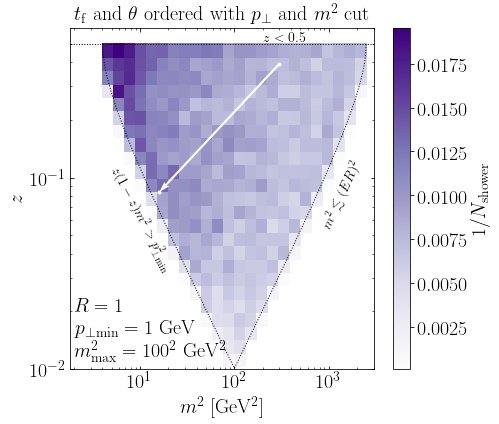

In [173]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(res.T[5])), log10(max(res.T[5])), 25)
ybins = logspace(log10(min(1.-res.T[1])),log10(0.5), 25)
h = ax.hist2d(res.T[5], 1.-res.T[1], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Purples', cmin=1./N)
plot(jet_coord_example.T[5], 1.-jet_coord_example.T[1],'w.',lw=1)
x=jet_coord_example.T[5]
y=1.-jet_coord_example.T[1]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
tvec = logspace(log10(4.*pT2_min),log10(t_max),200)
loglog(tvec,0.5*(1.-sqrt(1.-4.*pT2_min/tvec)),'k:',lw=1)
tvec = logspace(log10(4.*pT2_min),log10(t_max/4.),200)
loglog(tvec,0.5*(1.-sqrt(1.-4.*tvec/t_max)),'k:',lw=1)
text(2e2, 0.51, r'$z<0.5$', fontsize=14)
text(4.3e0, 0.1, r'$z(1-z)m^2>p_{\perp\rm min}^2$', rotation=-62, fontsize=14)
text(8e2, 0.11, r'$m^2\lesssim(ER)^2$', rotation=65, fontsize=14)
plot([0.1,5e4],[0.5,0.5],'k:',lw=1)

xlabel(r'$m^2$ [GeV$^2$]', fontsize=20)
ylabel(r'$z$', fontsize=20)
cbar = colorbar(h[3], ax=ax, )
xlim(1.8,3e3)
ylim(1e-2,0.6)
ax.set_xscale('log')
ax.set_yscale('log')
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'$t_{\rm f}$ and $\theta$ ordered with $p_\perp$ and $m^2$ cut', fontsize=20)
text(2., 0.011, r'$m^2_{\rm max}=100^2$ GeV$^2$', fontsize=20)
text(2., 0.0149, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
text(2., 0.02, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("ShowerPlane_tf_theta_ordered_pt_t_cut.pdf", bbox_inches="tight")
tight_layout()
show()

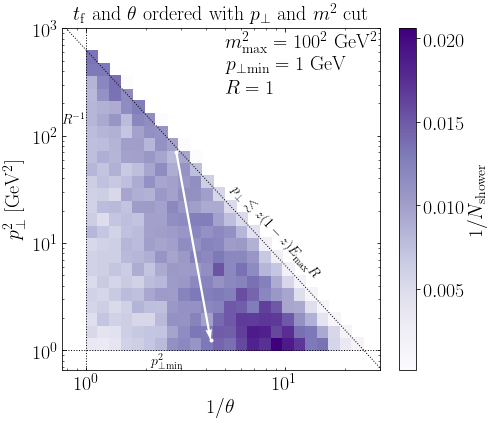

In [174]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(1./res.T[4])),log10(max(1./res.T[4])), 25)
ybins = logspace(log10(min(res.T[3])),log10(max(res.T[3])), 25)
h = ax.hist2d(1./res.T[4], res.T[3], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Purples', cmin=1./N)
plot(1./jet_coord_example.T[4], jet_coord_example.T[3],'w.-',lw=1)
x=1./jet_coord_example.T[4]
y=jet_coord_example.T[3]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
plot([1e-5,1e5],[pT2_min,pT2_min],'k:',lw=1)
text(2.1e0, 0.68, r'$p^2_{\perp\rm min}$', fontsize=14)
invtheta=logspace(-3,2,30)
loglog(invtheta,(sqrt(t_max)/R)**2/16./invtheta**2,'k:',lw=1)
text(5.1e0, 2.9e1, r'$p_\perp\lesssim z(1-z)E_{\rm max}R$', rotation=-47, fontsize=14)
plot([1,1],[1e-1,1e4], 'k:', lw=1)
text(7.5e-1, 1.3e2, r'$R^{-1}$',  fontsize=14)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75,3e1)
ylim(0.65,1e3)
ylabel(r'$p^2_\perp$ [GeV$^2$]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'$t_{\rm f}$ and $\theta$ ordered with $p_\perp$ and $m^2$ cut', fontsize=20)
text(5., 6e2, r'$m^2_{\rm max}=100^2$ GeV$^2$', fontsize=20)
text(5., 3.9e2, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
text(5., 2.5e2, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("LundPlane_tf_theta_ordered_pt_t_cut.pdf", bbox_inches="tight")
tight_layout()
show()

### Multiplicity

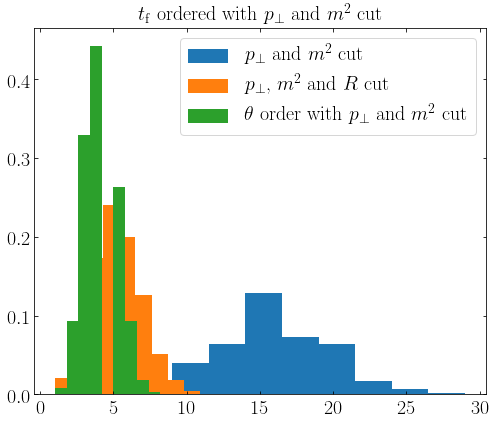

In [67]:
fig, ax = subplots()
figsize(7,6)

h = ax.hist(N_emission_tf_order_pt_t_cut, density=True, label=r'$p_\perp$ and $m^2$ cut')
h = ax.hist(N_emission_tf_order_pt_t_R_cut, density=True, label=r'$p_\perp$, $m^2$ and $R$ cut')
h = ax.hist(N_emission_tf_theta_order_pt_t_cut, density=True, label=r'$\theta$ order with $p_\perp$ and $m^2$ cut')

#xlim(0.75,3e1)
#ylim(0.65,1e3)
title(r'$t_{\rm f}$ ordered with $p_\perp$ and $m^2$ cut', fontsize=20)
#text(5., 6e2, r'$m^2_{\rm max}=100^2$ GeV$^2$', fontsize=20)
#text(5., 3.9e2, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
#text(5., 2.5e2, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
legend(fontsize=20,loc='upper right');
tight_layout()
show()

### Test Veto algorithm

In [151]:
def P_gg(x):
    CA = 3.
    return CA * (x/(1.-x) + (1.-x)/x + x*(1.-x))
def P_gg_over(x):
    CA = 3.
    return CA * (1./(1.-x) + 1./x)
def f(lf, E, pT2_min):
    int_temp = 1./lf * integrate.quad(lambda z: alpha_s(2.*E*z*(1.-z)*lf)/2./pi * P_gg(z), 0.5*(1.-sqrt(1.-2.*pT2_min/E/lf)), 0.5*(1.+sqrt(1.-2.*pT2_min/E/lf)))[0]
    return int_temp
def S(lf, E, t_max, pT2_min):
    return exp(- integrate.quad(lambda lx: f(lx, E, pT2_min), lf, t_max/2./E)[0])
def g(lf, t_max, pT2_min):
    CA = 3.
    eps = pT2_min/t_max
    return 1./lf * alpha_s(0)/2./pi * 2.*CA*log((1.-eps)/eps)
def S_over(lf, E, t_max, pT2_min):
    CA = 3.
    eps = pT2_min/t_max
    return exp(- log(t_max/2./E/lf) * alpha_s(0)/2./pi * 2.*CA*log((1.-eps)/eps))

In [152]:
E = sqrt(t_max)
lf=logspace(log10(2.*pT2_min/E), log10(t_max/2./E), 50)
dPperdt=array([[i, f(i,E,pT2_min), S(i,E,t_max,pT2_min), f(i,E,pT2_min)*S(i,E,t_max,pT2_min)] for i in lf])
dPgperdt=array([[i, g(i,t_max,pT2_min), S_over(i,E,t_max,pT2_min), g(i,t_max,pT2_min)*S_over(i,E,t_max,pT2_min)] for i in lf])

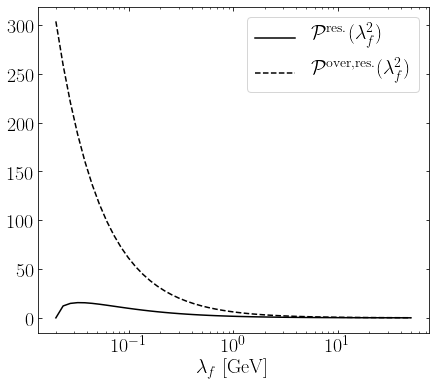

In [153]:
figsize(7,6)
semilogx(dPperdt.T[0], dPperdt.T[1], 'k-', label=r'$\mathcal{P}^{\rm res.}(\lambda_f)$')
plot(dPgperdt.T[0], dPgperdt.T[1], 'k--', label=r'$\mathcal{P}^{\rm over,res.}(\lambda_f)$')
xlabel(r'$\lambda_f$ [GeV]', fontsize=20)
tick_params(axis='both', top=True, right=True, which='both', direction='in', labelsize=20)
legend(fontsize=20,loc='upper right');
show()

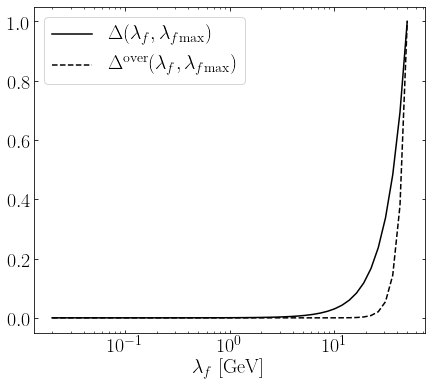

In [155]:
figsize(7,6)
semilogx(dPperdt.T[0], dPperdt.T[2], 'k-', label=r'$\Delta(\lambda_f,\lambda_{f\rm max})$')
plot(dPgperdt.T[0], dPgperdt.T[2], 'k--', label=r'$\Delta^{\rm over}(\lambda_f,\lambda_{f\rm max})$')
xlabel(r'$\lambda_f$ [GeV]', fontsize=20)
#ylabel(r'$\Delta(t_{max})/\Delta(t)$', fontsize=20)
tick_params(axis='both', top=True, right=True, which='both', direction='in', labelsize=20)
legend(fontsize=20,loc='upper left');
show()

In [157]:
E = sqrt(t_max)
res_t = []
res_z = []
i = 0
while (i<100000):
    lf_init = t_max/2./E
    while (True):
        eps = pT2_min/t_max
        lf = lf_init * pow(rand(), 2.*pi / alpha_s(0) /  (2.*3.*(log(1. - eps) - log(eps))))
        if (lf < pT2_min/E): break
        z = 1. / (1. + pow(eps/(1.-eps), 2.*rand()-1.))
        if (alpha_s(2.*E*lf*z*(1.-z))/alpha_s(0) * P_gg(z)/P_gg_over(z) > rand() and 2.*E*lf*z*(1.-z) > pT2_min and 2.*E*lf < t_max):
            res_t = append(res_t, lf)
            res_z = append(res_z, z)
            i += 1
            break
        else: 
            lf_init = lf

In [158]:
E = sqrt(t_max)
resg_t = []
resg_z = []
i = 0
while (i<100000):
    lf_init = t_max/2./E
    eps = pT2_min/t_max
    lf = lf_init * pow(rand(), 2.*pi / alpha_s(0) / (2.*3.*(log(1. - eps) - log(eps))))
    if (lf < pT2_min/E): break
    z = 1. / (1. + pow(eps/(1.-eps), 2.*rand()-1.))
    resg_t = append(resg_t, lf)
    resg_z = append(resg_z, z)
    i += 1

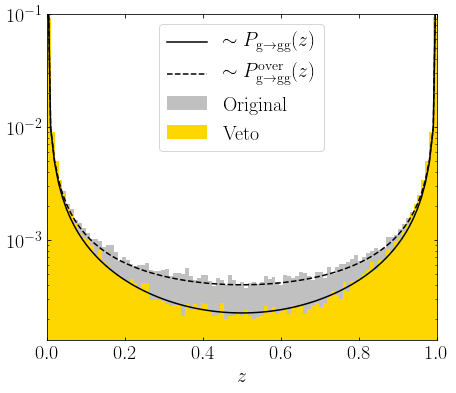

In [162]:
E = sqrt(t_max)
eps = pT2_min/t_max
z = linspace(eps, 1.-eps,100)

figsize(7,6)
semilogy(z, P_gg(z)/P_gg(eps), 'k-', label=r'$\sim P_{\rm g\rightarrow gg}(z)$')
plot(z, P_gg_over(z)/P_gg_over(eps), 'k--', label=r'$\sim P^{\rm over}_{\rm g\rightarrow gg}(z)$')
hist(resg_z, bins=linspace(eps, 1.-eps,100), weights=ones(len(resg_z))/500000., color='silver', label='Original')
hist(res_z, bins=linspace(eps, 1.-eps,100), weights=ones(len(res_z))/370000., color='gold', label='Veto')
xlim(0,1)
ylim(-0.,0.1)
xlabel(r'$z$', fontsize=20)
#ylabel(r'$P_{gg}(x)$', fontsize=20)
tick_params(axis='both', top=True, right=True, which='both', direction='in', labelsize=20)
legend(fontsize=20,loc='upper center');
show()

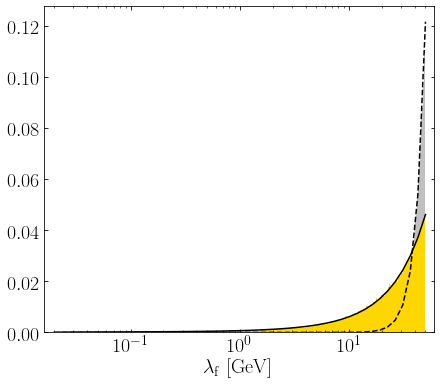

In [169]:
E = sqrt(t_max)
eps = pT2_min/t_max

figsize(7,6)
semilogx(dPperdt.T[0], dPperdt.T[3], 'k-', label=r'$\mathcal{P}^{\rm res.}(\tilde q)\cdot\Delta(\tilde q,\tilde q_{\rm max})$')
semilogx(dPgperdt.T[0], dPgperdt.T[3], 'k--', label=r'$\mathcal{P}^{\rm over,res.}(\tilde q)\cdot\Delta^{\rm over}(\tilde q,\tilde q_{\rm max})$')
hist(resg_t, bins=linspace(2.*pT2_min/E, t_max/2./E, 100), weights=ones(len(resg_t))/5e4, color='silver', label=r'Original')
hist(res_t, bins=linspace(2.*pT2_min/E, t_max/2./E, 100), weights=ones(len(res_t))/5e4, color='gold', label=r'Veto')
xlabel(r'$\lambda_{\rm f}$ [GeV]', fontsize=20)
xlim(0.8*2.*pT2_min/E, 1.2*t_max/2./E)
#ylim(1e-4,1)
#ylabel(r'$\Delta(t_{max})/\Delta(t)$', fontsize=20)
tick_params(axis='both', top=True, right=True, which='both', direction='in', labelsize=20)
#legend(fontsize=20,loc='upper left');
savefig("Vetotest_tf.pdf", bbox_inches="tight")
show()

## Transverse Ordered

### Minimal cut

In [154]:
jet_coord_example = shower(1,'pT',t_max,pT2_min,R,'excl')[0]
res = shower(10000,'pT',t_max,pT2_min,R,'excl')[0]

0
0
5000


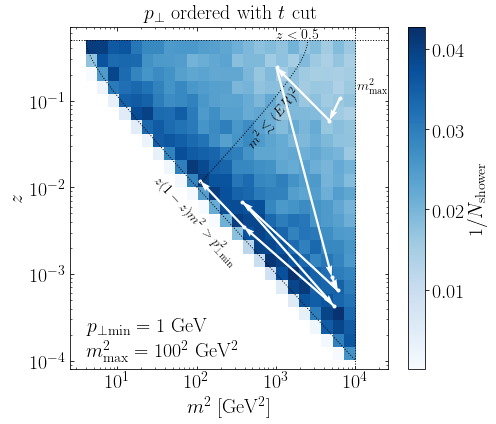

In [156]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(res.T[5])), log10(max(res.T[5])), 25)
ybins = logspace(log10(min(1.-res.T[1])),log10(0.5), 25)
h = ax.hist2d(res.T[5], 1.-res.T[1], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Blues', cmin=1./N)
plot(jet_coord_example.T[5], 1.-jet_coord_example.T[1],'w.',lw=1)
x=jet_coord_example.T[5]
y=1.-jet_coord_example.T[1]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
tvec = logspace(log10(4.*pT2_min),log10(t_max),200)
loglog(tvec,0.5*(1.-sqrt(1.-4.*pT2_min/tvec)),'k:',lw=1)
text(1e3, 0.52, r'$z<0.5$', fontsize=14)
text(1.05*t_max, 0.12, r'$m^2_{\rm max}$', fontsize=14)
text(2.5e1, 0.01, r'$z(1-z)m^2>p^2_{\perp\rm min}$', rotation=-47, fontsize=14)
plot([0.1,5e4],[0.5,0.5],'k:',lw=1)
plot([t_max,t_max],[1e-5,1],'k:',lw=1)
tvec = logspace(log10(1e2),log10(t_max/4.),200)
loglog(tvec,0.5*(1.-sqrt(1.-4.*tvec/t_max)),'k:',lw=1)
text(4e2, 0.11, r'$m^2\lesssim(ER)^2$', rotation=50, fontsize=14)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(2.5*pT2_min,2.6e4)
ylim(8e-5,0.7)
xlabel(r'$m^2$ [GeV$^2$]', fontsize=20)
ylabel(r'$z$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'$p_\perp$ ordered with $t$ cut', fontsize=20)
text(4, 1e-4, r'$m^2_{\rm max}=100^2$ GeV$^2$', fontsize=20)
text(4, 2e-4, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("ShowerPlane_pt_ordered_t_cut.pdf", bbox_inches="tight")
tight_layout()
show()

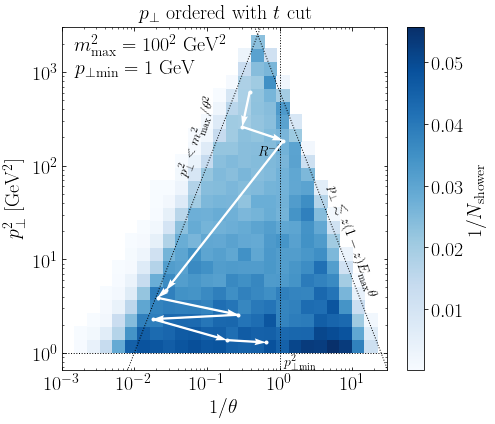

In [157]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(1./res.T[4])),log10(max(1./res.T[4])), 25)
ybins = logspace(log10(min(res.T[3])),log10(max(res.T[3])), 25)
h = ax.hist2d(1./res.T[4], res.T[3], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Blues', cmin=1./N)
plot(1./jet_coord_example.T[4], jet_coord_example.T[3],'w.-',lw=1)
x=1./jet_coord_example.T[4]
y=jet_coord_example.T[3]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
plot([1e-5,1e5],[pT2_min,pT2_min],'k:',lw=1)
text(1.1e0, 0.67, r'$p^2_{\perp\rm min}$', fontsize=14)
invtheta=logspace(-3,2,30)
loglog(invtheta,(sqrt(t_max)/R)**2/16./invtheta**2,'k:',lw=1)
text(4e0, 5e1, r'$p_\perp\lesssim z(1-z)E_{\rm max}\theta$', rotation=-70, fontsize=14)
loglog(invtheta,(sqrt(t_max)/R)**2*invtheta**2,'k:',lw=1)
text(4e-2, 4e2, r'$p^2_\perp<m^2_{\rm max}/\theta^2$', rotation=70, fontsize=14)
plot([1,1],[1e-1,1e4], 'k:', lw=1)
text(5e-1, 1.3e2, r'$R^{-1}$',  fontsize=14)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')

xlim(1e-3,3e1)
ylim(0.65,3e3)
ylabel(r'$p^2_\perp$ [GeV$^2$]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'$p_\perp$ ordered with $t$ cut', fontsize=20)
text(1.5e-3, 0.9e3, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
text(1.5e-3, 1.5e3, r'$m^2_{\rm max}=100^2$ GeV$^2$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("LundPlane_pt_ordered_t_cut.pdf", bbox_inches="tight")
tight_layout()
show()

### Angular Cut

In [163]:
jet_coord_example = shower(1,'pT_Rcut',t_max,pT2_min,R,'excl')[0]
res = shower(10000,'pT_Rcut',t_max,pT2_min,R,'excl')[0]

0
0
5000


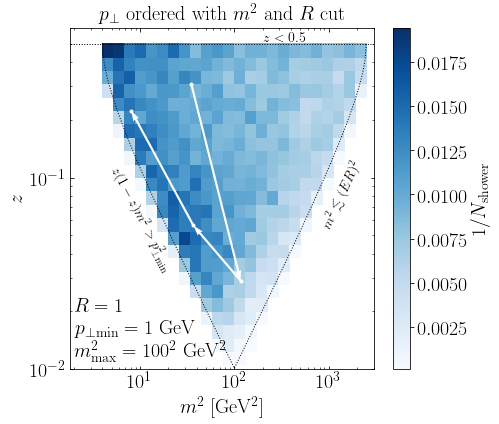

In [164]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(res.T[5])), log10(max(res.T[5])), 25)
ybins = logspace(log10(min(1.-res.T[1])),log10(0.5), 25)
h = ax.hist2d(res.T[5], 1.-res.T[1], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Blues', cmin=1./N)
plot(jet_coord_example.T[5], 1.-jet_coord_example.T[1],'w.',lw=1)
x=jet_coord_example.T[5]
y=1.-jet_coord_example.T[1]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
tvec = logspace(log10(4.*pT2_min),log10(t_max),200)
loglog(tvec,0.5*(1.-sqrt(1.-4.*pT2_min/tvec)),'k:',lw=1)
tvec = logspace(log10(4.*pT2_min),log10(t_max/4.),200)
loglog(tvec,0.5*(1.-sqrt(1.-4.*tvec/t_max)),'k:',lw=1)
text(2e2, 0.51, r'$z<0.5$', fontsize=14)
text(4.3e0, 0.1, r'$z(1-z)m^2>p_{\perp\rm min}^2$', rotation=-62, fontsize=14)
text(8e2, 0.11, r'$m^2\lesssim(ER)^2$', rotation=65, fontsize=14)
plot([0.1,5e4],[0.5,0.5],'k:',lw=1)

cbar = colorbar(h[3], ax=ax)
xlim(1.8,3e3)
ylim(1e-2,0.6)
xlabel(r'$m^2$ [GeV$^2$]', fontsize=20)
ylabel(r'$z$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'$p_\perp$ ordered with $m^2$ and $R$ cut', fontsize=20)
text(2., 0.011, r'$m^2_{\rm max}=100^2$ GeV$^2$', fontsize=20)
text(2., 0.0149, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
text(2., 0.02, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("ShowerPlane_pt_ordered_t_R_cut.pdf", bbox_inches="tight")
tight_layout()
show()

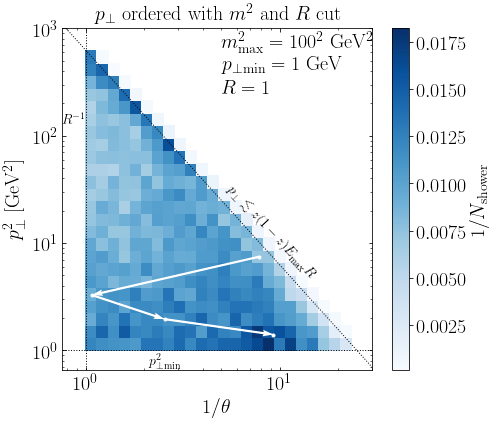

In [165]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(1./res.T[4])),log10(max(1./res.T[4])), 25)
ybins = logspace(log10(min(res.T[3])),log10(max(res.T[3])), 25)
h = ax.hist2d(1./res.T[4], res.T[3], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Blues', cmin=1./N)
plot(1./jet_coord_example.T[4], jet_coord_example.T[3],'w.-',lw=1)
x=1./jet_coord_example.T[4]
y=jet_coord_example.T[3]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
plot([1e-5,1e5],[pT2_min,pT2_min],'k:',lw=1)
text(2.1e0, 0.68, r'$p^2_{\perp\rm min}$', fontsize=14)
invtheta=logspace(-3,2,30)
loglog(invtheta,(sqrt(t_max)/R)**2/16./invtheta**2,'k:',lw=1)
text(5.1e0, 2.9e1, r'$p_\perp\lesssim z(1-z)E_{\rm max}R$', rotation=-47, fontsize=14)
plot([1,1],[1e-1,1e4], 'k:', lw=1)
text(7.5e-1, 1.3e2, r'$R^{-1}$',  fontsize=14)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75,3e1)
ylim(0.65,1e3)
ylabel(r'$p^2_\perp$ [GeV$^2$]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'$p_\perp$ ordered with $m^2$ and $R$ cut', fontsize=20)
text(5., 6e2, r'$m^2_{\rm max}=100^2$ GeV$^2$', fontsize=20)
text(5., 3.9e2, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
text(5., 2.5e2, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("LundPlane_pt_ordered_t_R_cut.pdf", bbox_inches="tight")
tight_layout()
show()

### Angular Veto

In [39]:
jet_coord_example = shower(1,'pT_Rord','excl',t_max,pT2_min,R)

0


In [158]:
jet_coord_example = shower(1,'pT_Rord',t_max,pT2_min,R,'excl')[0]
res = shower(10000,'pT_Rord',t_max,pT2_min,R,'excl')[0]

0
0
5000


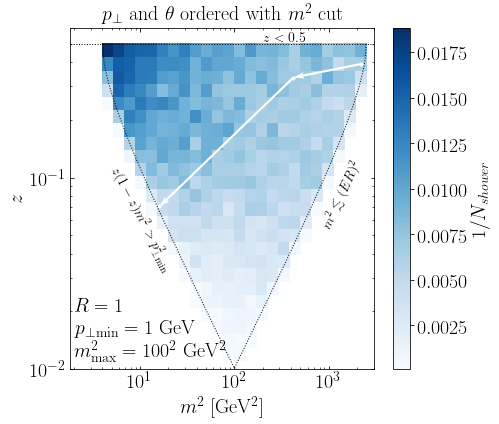

In [161]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(res.T[5])), log10(max(res.T[5])), 25)
ybins = logspace(log10(min(1.-res.T[1])),log10(0.5), 25)
h = ax.hist2d(res.T[5], 1.-res.T[1], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Blues', cmin=1./N)
plot(jet_coord_example.T[5], 1.-jet_coord_example.T[1],'w.',lw=1)
x=jet_coord_example.T[5]
y=1.-jet_coord_example.T[1]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
tvec = logspace(log10(4.*pT2_min),log10(t_max),200)
loglog(tvec,0.5*(1.-sqrt(1.-4.*pT2_min/tvec)),'k:',lw=1)
tvec = logspace(log10(4.*pT2_min),log10(t_max/4.),200)
loglog(tvec,0.5*(1.-sqrt(1.-4.*tvec/t_max)),'k:',lw=1)
text(2e2, 0.51, r'$z<0.5$', fontsize=14)
text(4.3e0, 0.1, r'$z(1-z)m^2>p_{\perp\rm min}^2$', rotation=-62, fontsize=14)
text(8e2, 0.11, r'$m^2\lesssim(ER)^2$', rotation=65, fontsize=14)
plot([0.1,5e4],[0.5,0.5],'k:',lw=1)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(1.8,3e3)
ylim(1e-2,0.6)
xlabel(r'$m^2$ [GeV$^2$]', fontsize=20)
ylabel(r'$z$', fontsize=20)
cbar.set_label(r"$1/N_{shower}$", fontsize=20)
title(r'$p_\perp$ and $\theta$ ordered with $m^2$ cut', fontsize=20)
text(2., 0.011, r'$m^2_{\rm max}=100^2$ GeV$^2$', fontsize=20)
text(2., 0.0149, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
text(2., 0.02, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("ShowerPlane_pt_theta_ordered_t_cut.pdf", bbox_inches="tight")
tight_layout()
show()

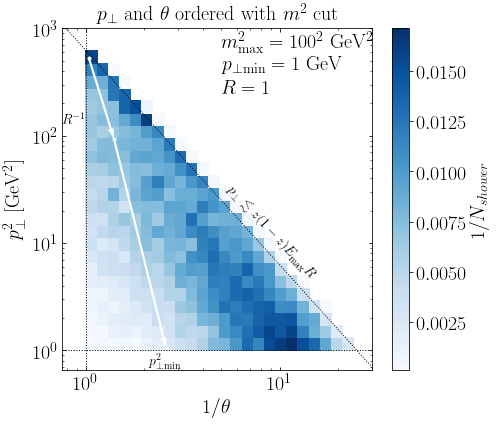

In [162]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(1./res.T[4])),log10(max(1./res.T[4])), 25)
ybins = logspace(log10(min(res.T[3])),log10(max(res.T[3])), 25)
h = ax.hist2d(1./res.T[4], res.T[3], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Blues', cmin=1./N)
plot(1./jet_coord_example.T[4], jet_coord_example.T[3],'w.-',lw=1)
x=1./jet_coord_example.T[4]
y=jet_coord_example.T[3]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
plot([1e-5,1e5],[pT2_min,pT2_min],'k:',lw=1)
text(2.1e0, 0.68, r'$p^2_{\perp\rm min}$', fontsize=14)
invtheta=logspace(-3,2,30)
loglog(invtheta,(sqrt(t_max)/R)**2/16./invtheta**2,'k:',lw=1)
text(5.1e0, 2.9e1, r'$p_\perp\lesssim z(1-z)E_{\rm max}R$', rotation=-47, fontsize=14)
plot([1,1],[1e-1,1e4], 'k:', lw=1)
text(7.5e-1, 1.3e2, r'$R^{-1}$',  fontsize=14)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75,3e1)
ylim(0.65,1e3)
ylabel(r'$p^2_\perp$ [GeV$^2$]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"$1/N_{shower}$", fontsize=20)
title(r'$p_\perp$ and $\theta$ ordered with $m^2$ cut', fontsize=20)
text(5., 6e2, r'$m^2_{\rm max}=100^2$ GeV$^2$', fontsize=20)
text(5., 3.9e2, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
text(5., 2.5e2, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("LundPlane_pt_theta_ordered_t_cut.pdf", bbox_inches="tight")
tight_layout()
show()

### Test Transverse Veto Algorithm

In [21]:
def P_gg(x):
    CA = 3.
    return CA * (x/(1.-x) + (1.-x)/x + x*(1.-x))
def P_gg_over(x):
    CA = 3.
    return CA * (1./(1.-x) + 1./x)
def f(pT2ev, t_max):
    int_temp = 1./pT2ev * alpha_s(pT2ev)/2./pi * integrate.quad(lambda z: P_gg(z), 0.5*(1.-sqrt(1.-4.*pT2ev/t_max)), 0.5*(1.+sqrt(1.-4.*pT2ev/t_max)))[0]
    return int_temp
def S(pT2, t_max):
    return exp(- integrate.quad(lambda tx: f(tx, t_max), pT2, t_max/4.)[0])
def g(pT2, t_max, pT2_min):
    CA = 3.
    eps = pT2_min/t_max
    return 1./pT2 * alpha_s(0)/2./pi * 2.*CA*log((1.-eps)/eps)
def S_over(pT2, t_max, pT2_min):
    CA = 3.
    eps = pT2_min/t_max
    return exp(- log(t_max/4./pT2) * alpha_s(0)/2./pi * 2.*CA*log((1.-eps)/eps))

In [44]:
pT2_min = 1.
t_max = 100.**2
pT2=logspace(log10(pT2_min), log10(t_max/4.), 50)
dPperdt=array([[i, f(i,t_max), S(i,t_max), f(i,t_max)*S(i,t_max)] for i in pT2])
dPgperdt=array([[i, g(i,t_max,pT2_min), S_over(i,t_max,pT2_min), g(i,t_max,pT2_min)*S_over(i,t_max,pT2_min)] for i in pT2])

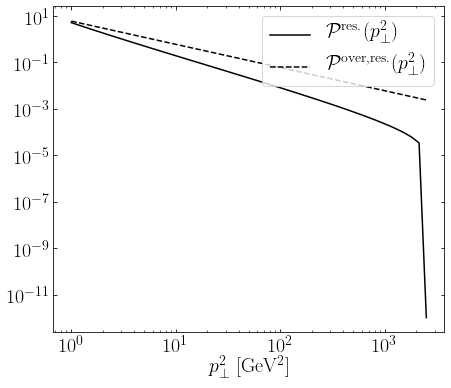

In [84]:
figsize(7,6)
loglog(dPperdt.T[0], dPperdt.T[1], 'k-', label=r'$\mathcal{P}^{\rm res.}(p_\perp^2)$')
plot(dPgperdt.T[0], dPgperdt.T[1], 'k--', label=r'$\mathcal{P}^{\rm over,res.}(p_\perp^2)$')
xlabel(r'$p_\perp^2$ [GeV$^2$]', fontsize=20)
#ylabel(r'$\Delta(t_{max})/\Delta(t)$', fontsize=20)
tick_params(axis='both', top=True, right=True, which='both', direction='in', labelsize=20)
legend(fontsize=20,loc='upper right');
show()

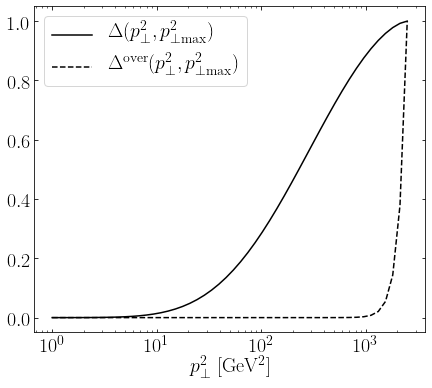

In [83]:
figsize(7,6)
semilogx(dPperdt.T[0], dPperdt.T[2], 'k-', label=r'$\Delta(p_\perp^2,p^2_{\perp\rm max})$')
plot(dPgperdt.T[0], dPgperdt.T[2], 'k--', label=r'$\Delta^{\rm over}(p_\perp^2,p^2_{\perp\rm max})$')
xlabel(r'$p_\perp^2$ [GeV$^2$]', fontsize=20)
#ylabel(r'$\Delta(t_{max})/\Delta(t)$', fontsize=20)
tick_params(axis='both', top=True, right=True, which='both', direction='in', labelsize=20)
legend(fontsize=20,loc='upper left');
show()

In [22]:
t_max = 100.**2
pT2_min = 1.
res_t = []
res_z = []
i = 0
while (i<100000):
    pT2_init = t_max/4.
    while (True):
        eps = pT2_min/t_max
        pT2 = pT2_init * pow(rand(), 2.*pi / alpha_s(0) /  (2.*3.*(log(1. - eps) - log(eps))))
        if (pT2 < pT2_min): break
        z = 1. / (1. + pow(eps/(1.-eps), 2.*rand()-1.))
        if (alpha_s(pT2)/alpha_s(0) * P_gg(z)/P_gg_over(z) > rand() and pT2/z/(1.-z) < t_max):
            res_t = append(res_t, pT2)
            res_z = append(res_z, z)
            i += 1
            break
        else: 
            pT2_init = pT2

In [23]:
resg_t = []
resg_z = []
i = 0
while (i<100000):
    pT2_init = t_max/4.
    eps = pT2_min/t_max
    pT2 = pT2_init * pow(rand(), 2.*pi / alpha_s(0) / (2.*3.*(log(1. - eps) - log(eps))))
    if (pT2 < pT2_min): break
    z = 1. / (1. + pow(eps/(1.-eps), 2.*rand()-1.))
    resg_t = append(resg_t, pT2)
    resg_z = append(resg_z, z)
    i += 1

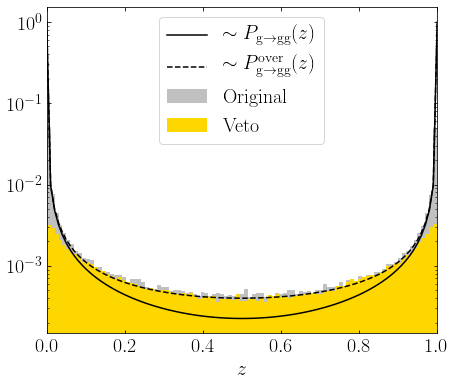

In [47]:
z = linspace(pT2_min/t_max, (1.-pT2_min/t_max),100)

figsize(7,6)
semilogy(z, P_gg(z)/P_gg(pT2_min/t_max), 'k-', label=r'$\sim P_{\rm g\rightarrow gg}(z)$')
plot(z, P_gg_over(z)/P_gg_over(pT2_min/t_max), 'k--', label=r'$\sim P^{\rm over}_{\rm g\rightarrow gg}(z)$')
hist(resg_z, bins=linspace(t_eff/t_max, 1.-t_eff/t_max,100), weights=ones(len(resg_z))/5e5, color='silver', label='Original')
hist(res_z, bins=linspace(t_eff/t_max, 1.-t_eff/t_max,100), weights=ones(len(res_z))/1.2e6, color='gold', label='Veto')
xlim(0,1)
#ylim(-0.,0.5)
xlabel(r'$z$', fontsize=20)
#ylabel(r'$P_{gg}(x)$', fontsize=20)
tick_params(axis='both', top=True, right=True, which='both', direction='in', labelsize=20)
legend(fontsize=20,loc='upper center');
show()

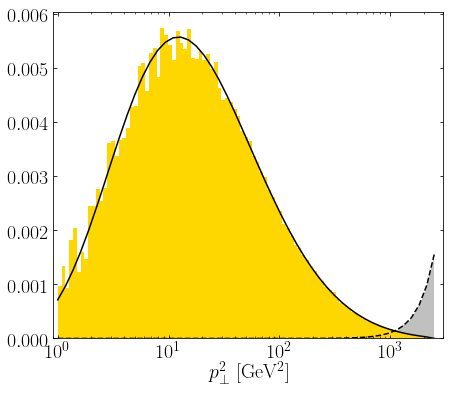

In [51]:
t_max = 100.**2
eps = pT2_min/t_max
R=linspace(0,1,300)

figsize(7,6)
semilogx(dPperdt.T[0], dPperdt.T[3], 'k-', label=r'$\mathcal{P}^{\rm res.}(\tilde q)\cdot\Delta(\tilde q,\tilde q_{\rm max})$')
plot(dPgperdt.T[0], dPgperdt.T[3], 'k--', label=r'$\mathcal{P}^{\rm over,res.}(\tilde q)\cdot\Delta^{\rm over}(\tilde q,\tilde q_{\rm max})$')
hist(resg_t, bins=linspace(pT2_min, t_max/4., 100), weights=ones(len(resg_t))/2.5e6, color='silver', label=r'Original')
#hist(res_t, bins=linspace(pT2_min, t_max/4., 100), weights=ones(len(res_t))/2.5e6, color='gold', label=r'Veto')

hist(res_t, bins=logspace(log10(pT2_min), log10(t_max/4.), 100), density=True, color='gold', label=r'Veto')

xlim(0.9*pT2_min,1.2*t_max/4.)
#ylim(1e-9,1e-3)
xlabel(r'$p_\perp^2$ [GeV$^2$]', fontsize=20)
#ylabel(r'$\Delta(t_{max})/\Delta(t)$', fontsize=20)
tick_params(axis='both', top=True, right=True, which='both', direction='in', labelsize=20)
#legend(fontsize=20,loc='upper left');
savefig("Vetotest_pt_ordered.pdf", bbox_inches="tight")
show()

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.79657892e-05,
        2.21604703e-05, 4.09530585e-05, 5.67616451e-05, 6.99312167e-05,
        3.23086240e-05, 4.47803099e-05, 6.89625352e-05, 1.01955480e-04,
        4.71040178e-05, 1.08811635e-04, 9.04888811e-05, 1.11483688e-04,
        1.03012209e-04, 1.11048543e-04, 1.09939425e-04, 1.42219410e-04,
        2.06505152e-04, 1.56119837e-04, 2.08370534e-04, 2.02410449e-04,
        1.64221096e-04, 2.23398210e-04, 2.02527749e-04, 2.37521267e-04,
        1.96195007e-04, 1.93577048e-04, 2.72559874e-04, 2.20367400e-04,
        2.23014583e-04, 2.84463487e-04, 2.93892515e-04, 3.23194722e-04,
        2.91567339e-04, 3.10231508e-04, 2.59500455e-04, 2.87180052e-04,
        3.32341159e-04, 3.30892248e-04, 2.93650289e-04, 2.96742257e-04,
        2.84522455e-04, 2.84593604e-04, 3.13476813e-04, 3.11880438e-04,
        3.38150755e-04, 2.98540176e-04, 2.82867806e-04, 2.86754376e-04,
        2.86420962e-04, 3.07997182e-04, 2.75646153e-04, 2.857996

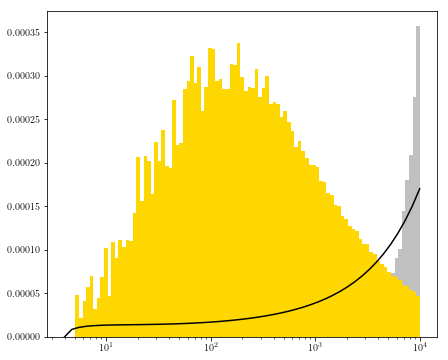

In [28]:
semilogx(dPperdt.T[0], dPperdt.T[3], 'k-', label=r'$\mathcal{P}^{\rm res.}(\tilde q)\cdot\Delta(\tilde q,\tilde q_{\rm max})$')
hist(resg_t/(1.-resg_z)/resg_z, bins=logspace(log10(4.*pT2_min), log10(t_max), 100), density=True, color='silver', label=r'Original')
hist(res_t/(1.-res_z)/res_z, bins=logspace(log10(4.*pT2_min), log10(t_max), 100), density=True, color='gold', label=r'Original')

## Virtual Ordered Shower

### Minimal cut

In [146]:
jet_coord_example = shower(1,'m',t_max,pT2_min,R,'excl')[0]
res = shower(N, 'm',t_max,pT2_min,R,'excl')[0]

0
0
5000


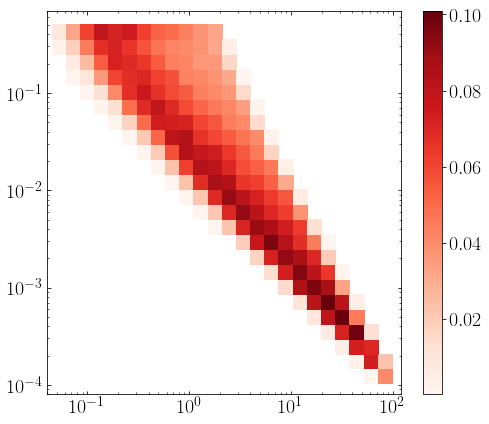

In [151]:
fig, ax = subplots()
figsize(7,6)
xbins = logspace(log10(min(res.T[4])),log10(max(res.T[4])), 25)
ybins = logspace(log10(min(1.-res.T[1])),log10(0.5), 25)
h = ax.hist2d(res.T[4], 1.-res.T[1], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Reds',cmin=1./N)

theta = linspace()

xlim(0.04,1.2e2)
ylim(8e-5,0.7)
cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
tight_layout()
show()

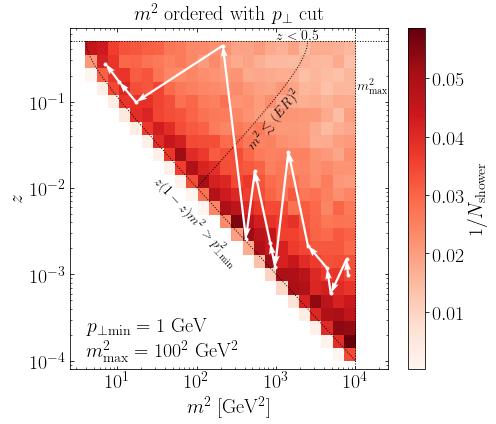

In [147]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(res.T[5])), log10(max(res.T[5])), 25)
ybins = logspace(log10(min(1.-res.T[1])),log10(0.5), 25)
h = ax.hist2d(res.T[5], 1.-res.T[1], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Reds',cmin=1./N)
plot(jet_coord_example.T[5], 1.-jet_coord_example.T[1],'w.',lw=1)
x=jet_coord_example.T[5]
y=1.-jet_coord_example.T[1]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
tvec = logspace(log10(4.*pT2_min),log10(t_max),200)
loglog(tvec,0.5*(1.-sqrt(1.-4.*pT2_min/tvec)),'k:',lw=1)
text(1e3, 0.52, r'$z<0.5$', fontsize=14)
text(1.05*t_max, 0.12, r'$m^2_{\rm max}$', fontsize=14)
text(2.5e1, 0.01, r'$z(1-z)m^2>p^2_{\perp\rm min}$', rotation=-47, fontsize=14)
plot([0.1,5e4],[0.5,0.5],'k:',lw=1)
plot([t_max,t_max],[1e-5,1],'k:',lw=1)
tvec = logspace(log10(1e2),log10(t_max/4.),200)
loglog(tvec,0.5*(1.-sqrt(1.-4.*tvec/t_max)),'k:',lw=1)
text(4e2, 0.11, r'$m^2\lesssim(ER)^2$', rotation=50, fontsize=14)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(2.5*pT2_min,2.6e4)
ylim(8e-5,0.7)
xlabel(r'$m^2$ [GeV$^2$]', fontsize=20)
ylabel(r'$z$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'$m^2$ ordered with $p_\perp$ cut', fontsize=20)
text(4, 1e-4, r'$m^2_{\rm max}=100^2$ GeV$^2$', fontsize=20)
text(4, 2e-4, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("ShowerPlane_t_ordered_pt_cut.pdf", bbox_inches="tight")
tight_layout()
show()

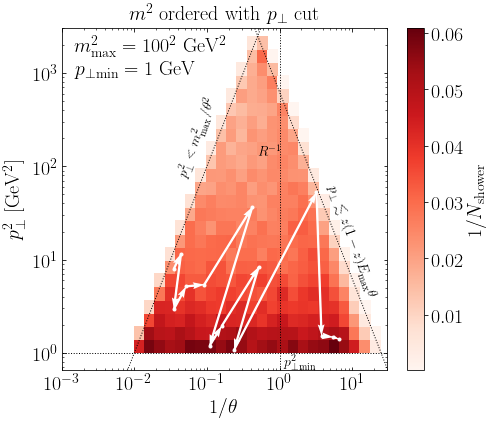

In [148]:
fig, ax = subplots()
E_max=sqrt(t_max)
figsize(7,6)

xbins = logspace(log10(min(1./res.T[4])),log10(max(1./res.T[4])), 25)
ybins = logspace(log10(min(res.T[3])),log10(max(res.T[3])), 25)
h = ax.hist2d(1./res.T[4], res.T[3], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Reds', cmin=1./N)
plot(1./jet_coord_example.T[4], jet_coord_example.T[3],'w.-',lw=1)
x=1./jet_coord_example.T[4]
y=jet_coord_example.T[3]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
plot([1e-5,1e5],[pT2_min,pT2_min],'k:',lw=1)
text(1.1e0, 0.67, r'$p^2_{\perp\rm min}$', fontsize=14)
invtheta=logspace(-3,2,30)
loglog(invtheta,E_max**2/16./invtheta**2,'k:',lw=1)
text(4e0, 5e1, r'$p_\perp\lesssim z(1-z)E_{\rm max}\theta$', rotation=-70, fontsize=14)
loglog(invtheta,E_max**2*invtheta**2,'k:',lw=1)
text(4e-2, 4e2, r'$p^2_\perp<m^2_{\rm max}/\theta^2$', rotation=70, fontsize=14)
plot([1,1],[1e-1,1e4], 'k:', lw=1)
text(5e-1, 1.3e2, r'$R^{-1}$',  fontsize=14)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')

xlim(1e-3,3e1)
ylim(0.65,3e3)
ylabel(r'$p^2_\perp$ [GeV$^2$]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'$m^2$ ordered with $p_\perp$ cut', fontsize=20)
text(1.5e-3, 0.9e3, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
text(1.5e-3, 1.5e3, r'$m^2_{\rm max}=100^2$ GeV$^2$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("LundPlane_t_ordered_pt_cut.pdf", bbox_inches="tight")
tight_layout()
show()

### Angular Cut

In [144]:
jet_coord_example = shower(1,'m_Rcut',t_max,pT2_min,R,'excl')[0]
res = shower(N, 'm_Rcut',t_max,pT2_min,R,'excl')[0]

0
0
5000


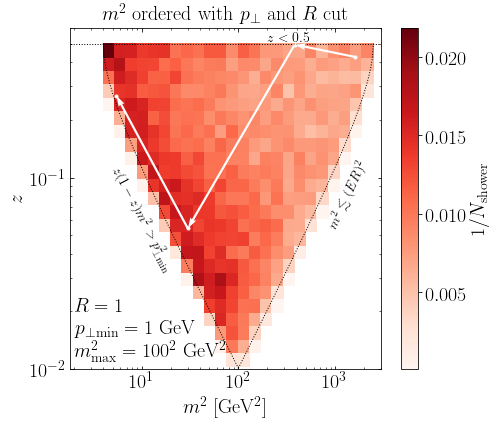

In [145]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(res.T[5])), log10(max(res.T[5])), 25)
ybins = logspace(log10(min(1.-res.T[1])),log10(max(1.-res.T[1])), 25)
h = ax.hist2d(res.T[5], 1.-res.T[1], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Reds', cmin=1./N)
plot(jet_coord_example.T[5], 1.-jet_coord_example.T[1],'w.',lw=1)
x=jet_coord_example.T[5]
y=1.-jet_coord_example.T[1]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
tvec = logspace(log10(4.*pT2_min),log10(t_max),200)
loglog(tvec,0.5*(1.-sqrt(1.-4.*pT2_min/tvec)),'k:',lw=1)
tvec = logspace(log10(4.*pT2_min),log10(t_max/4.),200)
loglog(tvec,0.5*(1.-sqrt(1.-4.*tvec/t_max)),'k:',lw=1)
text(2e2, 0.51, r'$z<0.5$', fontsize=14)
text(4.3e0, 0.1, r'$z(1-z)m^2>p_{\perp\rm min}^2$', rotation=-62, fontsize=14)
text(8e2, 0.11, r'$m^2\lesssim(ER)^2$', rotation=65, fontsize=14)
plot([0.1,5e4],[0.5,0.5],'k:',lw=1)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(1.8,3e3)
ylim(1e-2,0.6)
xlabel(r'$m^2$ [GeV$^2$]', fontsize=20)
ylabel(r'$z$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'$m^2$ ordered with $p_\perp$ and $R$ cut', fontsize=20)
text(2., 0.011, r'$m^2_{\rm max}=100^2$ GeV$^2$', fontsize=20)
text(2., 0.0149, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
text(2., 0.02, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("ShowerPlane_t_ordered_pt_R_cut.pdf", bbox_inches="tight")
tight_layout()
show()

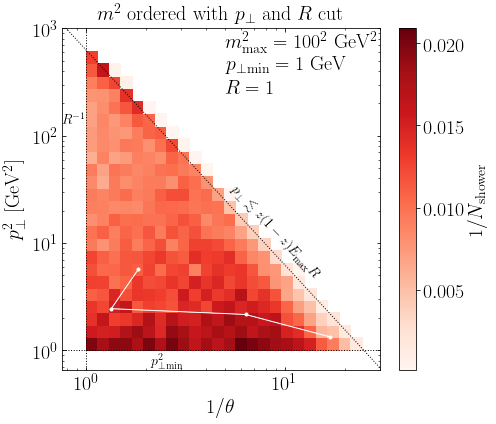

In [40]:
fig, ax = subplots()
E_max=sqrt(t_max)
figsize(7,6)

xbins = logspace(log10(min(1./res.T[4])),log10(max(1./res.T[4])), 25)
ybins = logspace(log10(min(res.T[3])),log10(max(res.T[3])), 25)
h = ax.hist2d(1./res.T[4], res.T[3], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Reds', cmin=1./N)
plot(1./jet_coord_example.T[4], jet_coord_example.T[3],'w.-',lw=1)
x=1./jet_coord_example.T[4]
y=jet_coord_example.T[3]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
plot([1e-5,1e5],[pT2_min,pT2_min],'k:',lw=1)
text(2.1e0, 0.68, r'$p^2_{\perp\rm min}$', fontsize=14)
invtheta=logspace(-3,2,30)
loglog(invtheta,E_max**2/16./invtheta**2,'k:',lw=1)
text(5.1e0, 2.9e1, r'$p_\perp\lesssim z(1-z)E_{\rm max}R$', rotation=-47, fontsize=14)
plot([1,1],[1e-1,1e4], 'k:', lw=1)
text(7.5e-1, 1.3e2, r'$R^{-1}$',  fontsize=14)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75,3e1)
ylim(0.65,1e3)
ylabel(r'$p^2_\perp$ [GeV$^2$]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'$m^2$ ordered with $p_\perp$ and $R$ cut', fontsize=20)
text(5., 6e2, r'$m^2_{\rm max}=100^2$ GeV$^2$', fontsize=20)
text(5., 3.9e2, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
text(5., 2.5e2, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("LundPlane_t_ordered_pt_R_cut.pdf", bbox_inches="tight")
tight_layout()
show()

### Angular Ordering

In [150]:
jet_coord_example = shower(1,'m_Rord',t_max,pT2_min,R,'excl')[0]
res = shower(N, 'm_Rord',t_max,pT2_min,R,'excl')[0]

0
0
5000


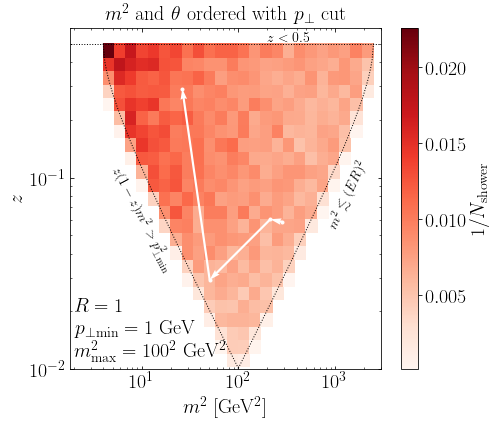

In [152]:
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(min(res.T[5])), log10(max(res.T[5])), 25)
ybins = logspace(log10(min(1.-res.T[1])),log10(max(1.-res.T[1])), 25)
h = ax.hist2d(res.T[5], 1.-res.T[1], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Reds', cmin=1./N)
plot(jet_coord_example.T[5], 1.-jet_coord_example.T[1],'w.',lw=1)
x=jet_coord_example.T[5]
y=1.-jet_coord_example.T[1]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
tvec = logspace(log10(4.*pT2_min),log10(t_max),200)
loglog(tvec,0.5*(1.-sqrt(1.-4.*pT2_min/tvec)),'k:',lw=1)
tvec = logspace(log10(4.*pT2_min),log10(t_max/4.),200)
loglog(tvec,0.5*(1.-sqrt(1.-4.*tvec/t_max)),'k:',lw=1)
text(2e2, 0.51, r'$z<0.5$', fontsize=14)
text(4.3e0, 0.1, r'$z(1-z)m^2>p_{\perp\rm min}^2$', rotation=-62, fontsize=14)
text(8e2, 0.11, r'$m^2\lesssim(ER)^2$', rotation=65, fontsize=14)
plot([0.1,5e4],[0.5,0.5],'k:',lw=1)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(1.8,3e3)
ylim(1e-2,0.6)
xlabel(r'$m^2$ [GeV$^2$]', fontsize=20)
ylabel(r'$z$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'$m^2$ and $\theta$ ordered with $p_\perp$ cut', fontsize=20)
text(2., 0.011, r'$m^2_{\rm max}=100^2$ GeV$^2$', fontsize=20)
text(2., 0.0149, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
text(2., 0.02, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("ShowerPlane_t_theta_ordered_pt_cut.pdf", bbox_inches="tight")
tight_layout()
show()

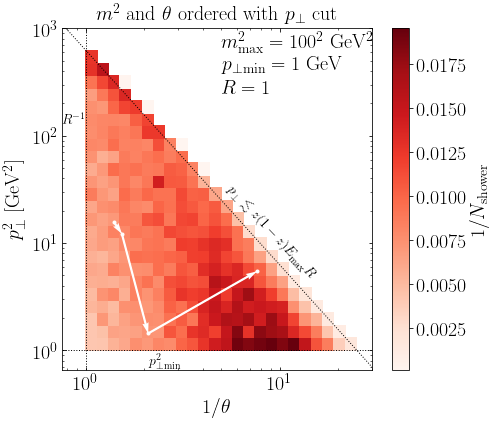

In [153]:
fig, ax = subplots()
E_max=sqrt(t_max)
figsize(7,6)

xbins = logspace(log10(min(1./res.T[4])),log10(max(1./res.T[4])), 25)
ybins = logspace(log10(min(res.T[3])),log10(max(res.T[3])), 25)
h = ax.hist2d(1./res.T[4], res.T[3], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Reds', cmin=1./N)
plot(1./jet_coord_example.T[4], jet_coord_example.T[3],'w.-',lw=1)
x=1./jet_coord_example.T[4]
y=jet_coord_example.T[3]
quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, width=0.007, color='w', zorder=10)
plot([1e-5,1e5],[pT2_min,pT2_min],'k:',lw=1)
text(2.1e0, 0.68, r'$p^2_{\perp\rm min}$', fontsize=14)
invtheta=logspace(-3,2,30)
loglog(invtheta,E_max**2/16./invtheta**2,'k:',lw=1)
text(5.1e0, 2.9e1, r'$p_\perp\lesssim z(1-z)E_{\rm max}R$', rotation=-47, fontsize=14)
plot([1,1],[1e-1,1e4], 'k:', lw=1)
text(7.5e-1, 1.3e2, r'$R^{-1}$',  fontsize=14)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75,3e1)
ylim(0.65,1e3)
ylabel(r'$p^2_\perp$ [GeV$^2$]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"$1/N_{\rm shower}$", fontsize=20)
title(r'$m^2$ and $\theta$ ordered with $p_\perp$ cut', fontsize=20)
text(5., 6e2, r'$m^2_{\rm max}=100^2$ GeV$^2$', fontsize=20)
text(5., 3.9e2, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
text(5., 2.5e2, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("LundPlane_t_theta_ordered_pt_cut.pdf", bbox_inches="tight")
tight_layout()
show()

### Test Veto Algorithm

In [100]:
def P_gg(x):
    CA = 3.
    return CA * (x/(1.-x) + (1.-x)/x + x*(1.-x))
def P_gg_over(x):
    CA = 3.
    return CA * (1./(1.-x) + 1./x)
def f(t, t_max, pT2_min):
    int_temp = 1./t * integrate.quad(lambda z: alpha_s(z*(1.-z)*t)/2./pi*P_gg(z), 0.5*(1.-sqrt(1.-4.*pT2_min/t)), 0.5*(1.+sqrt(1.-4.*pT2_min/t)))[0]
    return int_temp
def S(t, t_max, pT2_min):
    return exp(- integrate.quad(lambda tx: f(tx, t_max, pT2_min), t, t_max)[0])
def g(t, t_max, pT2_min):
    CA = 3.
    eps = pT2_min/t_max
    return 1./t * alpha_s(0)/2./pi * 2.*CA*log((1.-eps)/eps)
def S_over(t, t_max, pT2_min):
    CA = 3.
    eps = pT2_min/t_max
    return exp(- log(t_max/t) * alpha_s(0)/2./pi * 2.*CA*log((1.-eps)/eps))

In [101]:
t=logspace(log10(4.*t_eff), log10(t_max), 50)
dPperdt=array([[i, f(i,t_max,t_eff), S(i,t_max,t_eff), f(i,t_max,t_eff)*S(i,t_max,t_eff)] for i in t])
dPgperdt=array([[i, g(i,t_max,t_eff), S_over(i,t_max,t_eff), g(i,t_max,t_eff)*S_over(i,t_max,t_eff)] for i in t])

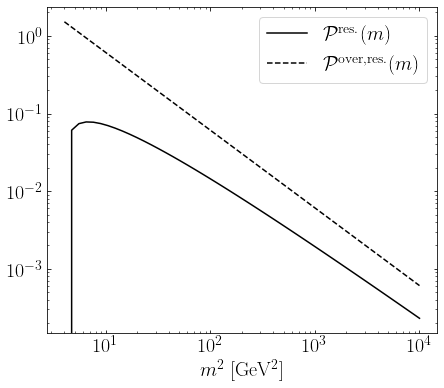

In [4]:
figsize(7,6)
loglog(dPperdt.T[0], dPperdt.T[1], 'k-', label=r'$\mathcal{P}^{\rm res.}(m)$')
plot(dPgperdt.T[0], dPgperdt.T[1], 'k--', label=r'$\mathcal{P}^{\rm over,res.}(m)$')
xlabel(r'$m^2$ [GeV$^2$]', fontsize=20)
#ylabel(r'$\Delta(t_{max})/\Delta(t)$', fontsize=20)
tick_params(axis='both', top=True, right=True, which='both', direction='in', labelsize=20)
legend(fontsize=20,loc='upper right');
show()

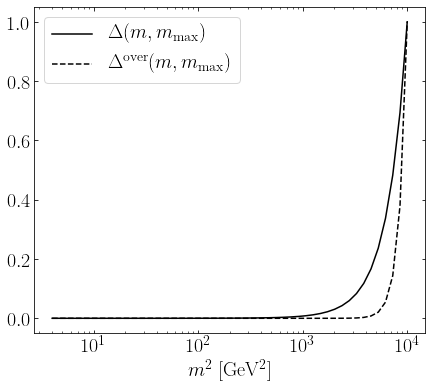

In [5]:
figsize(7,6)
semilogx(dPperdt.T[0], dPperdt.T[2], 'k-', label=r'$\Delta(m,m_{\rm max})$')
plot(dPgperdt.T[0], dPgperdt.T[2], 'k--', label=r'$\Delta^{\rm over}(m,m_{\rm max})$')
xlabel(r'$m^2$ [GeV$^2$]', fontsize=20)
#ylabel(r'$\Delta(t_{max})/\Delta(t)$', fontsize=20)
tick_params(axis='both', top=True, right=True, which='both', direction='in', labelsize=20)
legend(fontsize=20,loc='upper left');
show()

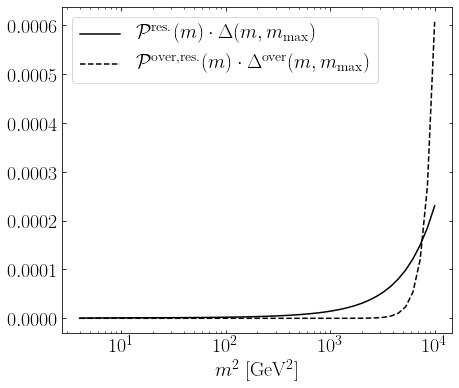

In [6]:
figsize(7,6)
semilogx(dPperdt.T[0], dPperdt.T[3], 'k-', label=r'$\mathcal{P}^{\rm res.}(m)\cdot\Delta(m,m_{\rm max})$')
plot(dPgperdt.T[0], dPgperdt.T[3], 'k--', label=r'$\mathcal{P}^{\rm over,res.}(m)\cdot\Delta^{\rm over}(m,m_{\rm max})$')
xlabel(r'$m^2$ [GeV$^2$]', fontsize=20)
#ylabel(r'$\Delta(t_{max})/\Delta(t)$', fontsize=20)
tick_params(axis='both', top=True, right=True, which='both', direction='in', labelsize=20)
legend(fontsize=20,loc='upper left');
show()

In [102]:
res_t = []
res_z = []
i = 0
while (i<100000):
    t_init = t_max
    while (True):
        eps = t_eff/t_max
        t = t_init * pow(rand(), 2.*pi / alpha_s(0) /  (2.*3.*(log(1. - eps) - log(eps))))
        if (t < 4.*t_eff): break
        z = 1. / (1. + pow(eps/(1.-eps), 2.*rand()-1.))
        if (alpha_s(z*(1.-z)*t)/alpha_s(0) > rand() and P_gg(z)/P_gg_over(z) > rand() and z*(1.-z)*t > t_eff):
        #if (alpha_s(z*(1.-z)*t)/alpha_s(0) * P_gg(z)/P_gg_over(z) > rand() and z*(1.-z)*t > t_eff):
        #if (alpha_s(z*(1.-z)*t)/alpha_s(0) * P_gg(z)/P_gg_over(z) > rand()):
        #if (f(t, t_max, t_eff)/g(t, t_max, t_eff) > rand() and P_gg(z)/P_gg_over(z) > rand() and z*(1.-z)*t > t_eff):
            res_t = append(res_t, t)
            res_z = append(res_z, z)
            i += 1
            break
        else: 
            t_init = t

In [103]:
resg_t = []
resg_z = []
i = 0
while (i<100000):
    t_init = t_max
    eps = t_eff/t_max
    t = t_init * pow(rand(), 2.*pi / alpha_s(0) / (2.*3.*(log(1. - eps) - log(eps))))
    if (t < 4.*t_eff): break
    z = 1. / (1. + pow(eps/(1.-eps), 2.*rand()-1.))
    resg_t = append(resg_t, t)
    resg_z = append(resg_z, z)
    i += 1

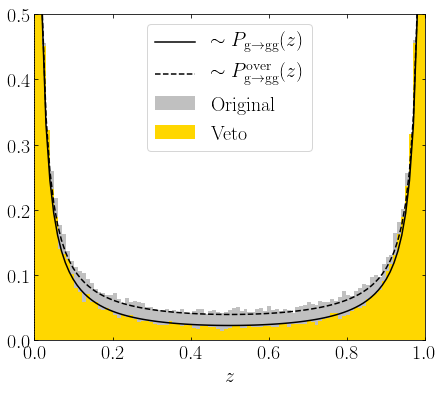

In [17]:
z = linspace(sqrt(t_eff/t_max), 1.-sqrt(t_eff/t_max),100)

figsize(7,6)
plot(z, P_gg(z)/P_gg(sqrt(t_eff/t_max)), 'k-', label=r'$\sim P_{\rm g\rightarrow gg}(z)$')
plot(z, P_gg_over(z)/P_gg_over(sqrt(t_eff/t_max)), 'k--', label=r'$\sim P^{\rm over}_{\rm g\rightarrow gg}(z)$')
hist(resg_z, bins=linspace(t_eff/t_max, 1.-t_eff/t_max,100), weights=ones(len(resg_z))/5000., color='silver', label='Original')
hist(res_z, bins=linspace(t_eff/t_max, 1.-t_eff/t_max,100), weights=ones(len(res_z))/4000., color='gold', label='Veto')
plot([t_eff/t_max, t_eff/t_max],[-1,1],'k:',lw=1)
plot([1.-t_eff/t_max, 1.-t_eff/t_max],[-1,1],'k:',lw=1)
xlim(0,1)
ylim(-0.,0.5)
xlabel(r'$z$', fontsize=20)
#ylabel(r'$P_{gg}(x)$', fontsize=20)
tick_params(axis='both', top=True, right=True, which='both', direction='in', labelsize=20)
legend(fontsize=20,loc='upper center');
show()

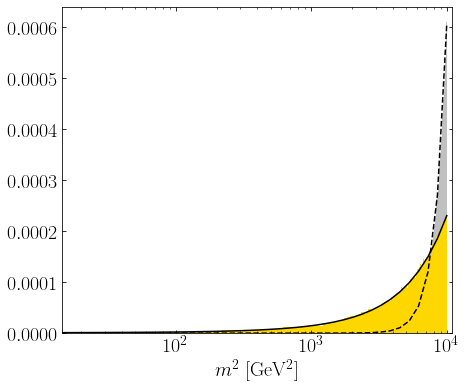

In [104]:
eps = sqrt(pT2_min/t_max)
R=linspace(0,1,300)

figsize(7,6)
semilogx(dPperdt.T[0], dPperdt.T[3], 'k-', label=r'$\mathcal{P}^{\rm res.}(\tilde q)\cdot\Delta(\tilde q,\tilde q_{\rm max})$')
plot(dPgperdt.T[0], dPgperdt.T[3], 'k--', label=r'$\mathcal{P}^{\rm over,res.}(\tilde q)\cdot\Delta^{\rm over}(\tilde q,\tilde q_{\rm max})$')
hist(resg_t, bins=linspace(16.*t_eff, t_max, 100), weights=ones(len(resg_t))/1e7, color='silver', label=r'Original')
hist(res_t, bins=linspace(16.*t_eff, t_max, 100), weights=ones(len(res_t))/1e7, color='gold', label=r'Veto')
xlim(0.9*16.*t_eff,1.1e4)
#ylim(1e-9,1e-3)
xlabel(r'$m^2$ [GeV$^2$]', fontsize=20)
#ylabel(r'$\Delta(t_{max})/\Delta(t)$', fontsize=20)
tick_params(axis='both', top=True, right=True, which='both', direction='in', labelsize=20)
#legend(fontsize=20,loc='upper left');
savefig("Vetotest_t_ordered.pdf", bbox_inches="tight")
show()

## Virtuality ordered analytic shower

### With $\alpha_s(p_{\perp})$

In [150]:
def Sudakov_log(t,t0):
    int_temp = - integrate.quad(lambda tt: 1./tt * integrate.quad(lambda z: alpha_s(z*(1.-z)*tt)/(2.*pi)*P_gg(z), t0/tt, 1.-t0/tt)[0], 2.*t0, t)[0]
    return int_temp
def Sudakov(t,t0):
    return exp(Sudakov_log(t,t0))

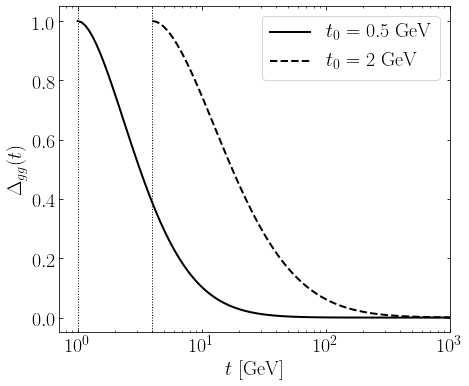

In [8]:
figsize(7,6)
res_0p5=array([[i, Sudakov(i,0.5)] for i in logspace(0,3,100)])
res_2=array([[i, Sudakov(i,2.)] for i in logspace(log10(4.),3,100)])
semilogx(res_0p5.T[0], res_0p5.T[1], 'k-', lw=2, label=r'$t_0=0.5$ GeV')
plot([1,1],[-1,2],'k:',lw=1)
plot(res_2.T[0], res_2.T[1], 'k--', lw=2, label=r'$t_0=2$ GeV')
plot([4,4],[-1,2],'k:',lw=1)

xlim(0,1000)
ylim(-0.05,1.05)
xlabel(r'$t$ [GeV]', fontsize=20)
ylabel(r'$\Delta_{gg}(t)$', fontsize=20)
tick_params(axis='both', top=True, right=True, which='both', direction='in', labelsize=20)
legend(fontsize=20,loc='upper right');
#savefig('Sudakov.pdf', format='pdf',bbox_inches='tight')
show()

In [161]:
res_1TeV_0p5=array([[i, Sudakov(1000., 0.5)/Sudakov(i, 0.5)] for i in logspace(0,3,100)])
res_1TeV_2=array([[i, Sudakov(1000., 2)/Sudakov(i, 2.)] for i in logspace(log10(4.),3.,100)])
res_300GeV_0p5=array([[i, Sudakov(300., 0.5)/Sudakov(i, 0.5)] for i in logspace(0.,log10(300.),100)])
res_300GeV_2=array([[i, Sudakov(300., 2.)/Sudakov(i, 2.)] for i in logspace(log10(4.),log10(300.),100)])

In [162]:
def find_t2(t2, p):
    t0, t1, R = p
    return Sudakov_log(t1, t0) - Sudakov_log(t2, t0) - log(R)

t1 = 300.
t0 = 2.
ran = rand()
if ( Sudakov(t1, t0)/Sudakov(2.*t0, t0) < ran ): 
    x = brentq(find_t2, 2.*t0, t1, args=([t0, t1, ran]))
    print(x, find_t2(x, [t0,t1,ran]), ran)
else: print('err')

71.63660819442708 -8.881784197001252e-16 0.09046347060599214


In [23]:
t1 = 300.
t0 = 2.
res_hist_300GeV_2 = [brentq(find_t2, 2.*t0, t1, args=([t0, t1, Sudakov(t1, t0)/Sudakov(2.*t0, t0) + (rand() * (1. - Sudakov(t1, t0)/Sudakov(2.*t0, t0)))])) for i in range(0,50)]

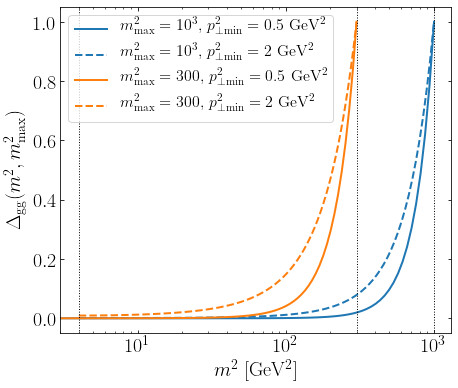

In [173]:
figsize(7,6)
#hist(res_hist_300GeV_2, bins=logspace(log10(4.),log10(300.), 30), range=(min(res_hist_300GeV_2),max(res_hist_300GeV_2)), weights=ones(len(res_hist_300GeV_2))/8., color='silver', label=r'$\Delta(t_1)/\Delta(t_2)=\mathcal R$')
#plot(res_hist.T[0],res_hist.T[1],'o')
semilogx(res_1TeV_0p5.T[0], res_1TeV_0p5.T[1], 'C0-', lw=2, label=r'$m^2_{\max}=10^3$, $p^2_{\perp\min}=0.5$ GeV$^2$')
plot(res_1TeV_2.T[0], res_1TeV_2.T[1], 'C0--', lw=2, label=r'$m^2_{\max}=10^3$, $p^2_{\perp\min}=2$ GeV$^2$')
plot(res_300GeV_0p5.T[0], res_300GeV_0p5.T[1], 'C1-', lw=2, label=r'$m^2_{\max}=300$, $p^2_{\perp\min}=0.5$ GeV$^2$')
plot(res_300GeV_2.T[0], res_300GeV_2.T[1], 'C1--', lw=2, label=r'$m^2_{\max}=300$, $p^2_{\perp\min}=2$ GeV$^2$')
plot([1,1],[-1,2],'k:',lw=1)
plot([4,4],[-1,2],'k:',lw=1)
plot([300,300],[-1,2],'k:',lw=1)
plot([1000,1000],[-1,2],'k:',lw=1)

xlabel(r'$m^2$ [GeV$^2$]', fontsize=20)
ylabel(r'$\Delta_{\rm gg}(m^2,m^2_{\max})$', fontsize=20)
tick_params(axis='both', top=True, right=True, which='both', direction='in', labelsize=20)
ylim(-0.05,1.05)
xlim(3,1300)
legend(fontsize=16,ncol=1,loc='upper left');
savefig('Sudakov_MC_kt_in_alpha.pdf', format='pdf',bbox_inches='tight')
show()

In [167]:
def int_P_gg(x, t0, t):
    return integrate.quad(lambda z: alpha_s(t*z*(1.-z))/(2.*pi)*P_gg(z), t0/t, x)[0]

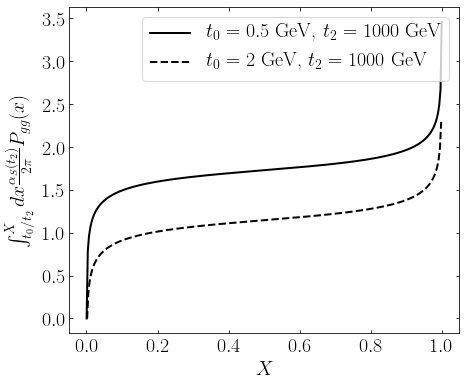

In [30]:
figsize(7,6)
res_0p5=array([[i, int_P_gg(i,0.5,1000.)] for i in linspace(0.5/1000.,1.-0.5/1000.,300)])
res_2=array([[i, int_P_gg(i,2.,1000.)] for i in linspace(2./1000.,1.-2./1000.,300)])
plot(res_0p5.T[0], res_0p5.T[1], 'k-', lw=2, label=r'$t_0=0.5$ GeV, $t_2=1000$ GeV')
plot(res_2.T[0], res_2.T[1], 'k--', lw=2, label=r'$t_0=2$ GeV, $t_2=1000$ GeV')

xlabel(r'$X$', fontsize=20)
ylabel(r'$\int^{X}_{t_0/t_2}dx\frac{\alpha_S(t_2)}{2\pi}P_{gg}(x)$', fontsize=20)
tick_params(axis='both', top=True, right=True, which='both', direction='in', labelsize=20)
legend(fontsize=20,loc='upper right');
show()

In [168]:
def find_x2(x, p):
    t0, t2, Rp = p
    return int_P_gg(x,t0,t2)/int_P_gg(1.-t0/t2,t0,t2) - Rp

t0 = 1.
t2 = 10000.
ran = rand()
x = brentq(find_x2, t0/t2, 1.-t0/t2, args=([t0, t2, ran]))
print(x, find_x2(x, ([t0, t2, ran])), ran)

0.1416330159882874 -5.551115123125783e-17 0.4578040063036892


In [169]:
t0 = 0.5
t2 = 800.
ran = 0.51
x = brentq(find_x2, t0/t2, 1.-t0/t2, args=([t0, t2, ran]))
print(x, find_x2(x, ([t0, t2, ran])), ran)

0.5942849384674658 -1.1102230246251565e-16 0.51


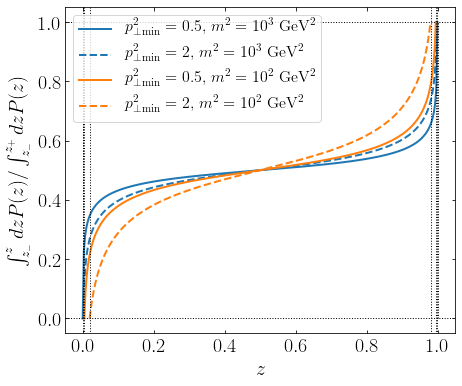

In [175]:
figsize(7,6)
#y, x, _ = hist(res_hist_0p5_1TeV, bins=100, range=(min(res_hist_0p5_1TeV),max(res_hist_0p5_1TeV)), weights=ones(len(res_hist_0p5_1TeV))/y.max(), color='silver', label=r'$\int^x dz P(z)/\int d\tilde z P(\tilde z)=\mathcal R^\prime$')
res_t0_0p5_1TeV=array([[i, int_P_gg(i,0.5,1000)/int_P_gg(1.-0.5/1000.,0.5,1000)] for i in linspace(0.0005,0.9995,300)])
res_t0_0p5_100GeV=array([[i, int_P_gg(i,0.5,100)/int_P_gg(1.-0.5/100.,0.5,100)] for i in linspace(0.005,0.995,300)])
res_t0_2_1TeV=array([[i, int_P_gg(i,2.,1000)/int_P_gg(1.-2./1000.,2.,1000)] for i in linspace(0.002,0.998,300)])
res_t0_2_100GeV=array([[i, int_P_gg(i,2.,100)/int_P_gg(1.-2./100.,2.,100)] for i in linspace(0.02,0.98,300)])
plot(res_t0_0p5_1TeV.T[0], res_t0_0p5_1TeV.T[1], 'C0-', lw=2, label=r'$p^2_{\perp\min}=0.5$, $m^2=10^3$ GeV$^2$')
plot(res_t0_2_1TeV.T[0], res_t0_2_1TeV.T[1], 'C0--', lw=2, label=r'$p^2_{\perp\min}=2$, $m^2=10^3$ GeV$^2$')
plot(res_t0_0p5_100GeV.T[0], res_t0_0p5_100GeV.T[1], 'C1-', lw=2, label=r'$p^2_{\perp\min}=0.5$, $m^2=10^2$ GeV$^2$')
plot(res_t0_2_100GeV.T[0], res_t0_2_100GeV.T[1], 'C1--', lw=2, label=r'$p^2_{\perp\min}=2$, $m^2=10^2$ GeV$^2$')
plot([-1,2],[1,1],'k:', lw=1)
plot([-1,2],[0,0],'k:', lw=1)
plot([0,0],[0,1],'k:', lw=1)
plot([1,1],[0,1],'k:', lw=1)
plot([0.5/100.,0.5/100.],[-1,2],'k:', lw=1)
plot([1.-0.5/100.,1.-0.5/100.],[-1,2],'k:', lw=1)
plot([2./1000.,2./1000.],[-1,2],'k:', lw=1)
plot([1.-2./1000.,1.-2./1000.],[-1,2],'k:', lw=1)
plot([2./100.,2./100.],[-1,2],'k:', lw=1)
plot([1.-2./100.,1.-2./100.],[-1,2],'k:', lw=1)

xlim(-0.05,1.05)
ylim(-0.05,1.05)
xlabel(r'$z$', fontsize=20)
ylabel(r'$\int^{z}_{z_-}dzP(z)/\int^{z_+}_{z_-} dzP(z)$', fontsize=20)
tick_params(axis='both', top=True, right=True, which='both', direction='in', labelsize=20)
legend(fontsize=16,loc='upper left');
savefig('x2_MC_kt_in_alpha.pdf', format='pdf',bbox_inches='tight')
show()

### With $\alpha_s(t)$

In [2]:
def alpha_s(t): # t is in GeV^2!
    # Simple test for LO from Ellis book Tab. 2.2:
    # alpha_s(nf = 4, Q^2 = 5^2 GeV^2) = 0.234
    # alpha_s(nf = 5, Q^2 = 5^2 GeV^2) = 0.255
    nf = 3. # Number of active light flavors.
    b = ( 33. - 2. * nf ) / (12. * pi)
    Lambda = 0.22 # in GeV
    Lam2 = Lambda * Lambda
    return 1. / (b * log( t / Lam2 ))
def P_gg(x):
    CA = 3.
    return 2.*CA * (x/(1.-x) + (1.-x)/x + x*(1.-x))
def Sudakov_log(t,t0):
    CA = 3.
    Lam = 0.2 # in GeV
    Lam2 = Lam * Lam
    nf = 3. # Number of active light flavors.
    b = ( 33. - 2. * nf ) / (12. * pi)
    int_temp = - 2.*CA/(2.*pi) * integrate.quad(lambda T: 1./T * alpha_s(t0/T) * (-11./6. + 4.*T - T*T + 2.*T*T*T/3. + 2.*(log(1.-T)-log(T))), t0/t, 0.5)[0]
    return int_temp
def Sudakov(t,t0):
    return exp(Sudakov_log(t,t0))

- The Sudakov $\Delta(t,t_0)$ gives the probablility to evolve from $t_0$ to $t$ without any resolvable branching. 
- The resolution of the branching is given from $k^2_t>Q^2_0$, resulting $z,1-z>t_0/\tilde t$.
- By increasing $t_0$, the lower cut moves to the left to $2t_0$ and the resolution for the branching geting worse, therfore it is less likely to find a branching, resulting smaller slope for $\Delta$.
- From the definition of the resolution, we require that $1-t_0/t>t_0/t$, therefore $t_\min=2t_0$.

/Users/ata053/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)


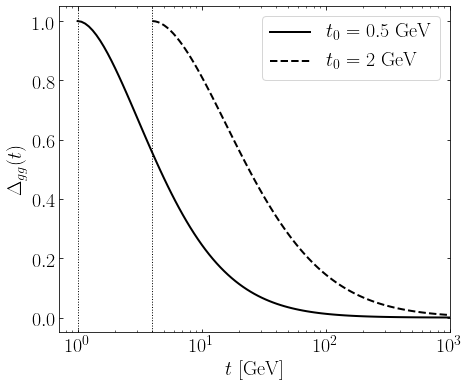

In [105]:
figsize(7,6)
res_0p5=array([[i, Sudakov(i,0.5)] for i in logspace(0,3,100)])
res_2=array([[i, Sudakov(i,2.)] for i in logspace(log10(4.),3,100)])
semilogx(res_0p5.T[0], res_0p5.T[1], 'k-', lw=2, label=r'$t_0=0.5$ GeV')
plot([1,1],[-1,2],'k:',lw=1)
plot(res_2.T[0], res_2.T[1], 'k--', lw=2, label=r'$t_0=2$ GeV')
plot([4,4],[-1,2],'k:',lw=1)

xlim(0,1000)
ylim(-0.05,1.05)
xlabel(r'$t$ [GeV]', fontsize=20)
ylabel(r'$\Delta_{gg}(t)$', fontsize=20)
tick_params(axis='both', top=True, right=True, which='both', direction='in', labelsize=20)
legend(fontsize=20,loc='upper right');
savefig('Sudakov.pdf', format='pdf',bbox_inches='tight')
show()

In [103]:
res_1TeV_0p5=array([[i, Sudakov(1000., 0.5)/Sudakov(i, 0.5)] for i in linspace(1.,1000.,1000)])
res_1TeV_2=array([[i, Sudakov(1000., 2)/Sudakov(i, 2.)] for i in linspace(4.,1000.,1000)])
res_300GeV_0p5=array([[i, Sudakov(300., 0.5)/Sudakov(i, 0.5)] for i in linspace(1.,300.,1000)])
res_300GeV_2=array([[i, Sudakov(300., 2.)/Sudakov(i, 2.)] for i in linspace(4.,300.,1000)])

In [3]:
def find_t2(t2, p):
    t0, t1, R = p
    return Sudakov_log(t1, t0) - Sudakov_log(t2, t0) - log(R)

t1 = 300.
t0 = 2.
ran = rand()
if ( Sudakov(t1, t0)/Sudakov(2.*t0, t0) < ran ): 
    x = brentq(find_t2, 2.*t0, t1, args=([t0, t1, ran]))
    print(x, find_t2(x, [t0,t1,ran]), ran)
else: print('err')

6.370678667993904 -5.329070518200751e-15 0.04098710111052306


In [24]:
t1 = 300.
t0 = 2.
res_hist_300GeV_2 = [brentq(find_t2, 2.*t0, t1, args=([t0, t1, Sudakov(t1, t0)/Sudakov(2.*t0, t0) + (rand() * (1. - Sudakov(t1, t0)/Sudakov(2.*t0, t0)))])) for i in range(0,5000)]

- $\Delta(t_1)/\Delta(t_2)$ gives the probability to evolve downwards from $t_1>t_2$ to $t_2$ without any resorvable branching $z,1-z>t_0/t_1$ and $z,1-z>t_0/t_2$. 
- Increasing $t_1$, moves the peak to the left. 
- For bigger $t_0$, it is lesslikely to have a branch, results smaller slope.
- For the MC: if $\mathcal R<\Delta(t_1)/\Delta(t_2=2t_0)$, veto the branching and stop the shower.

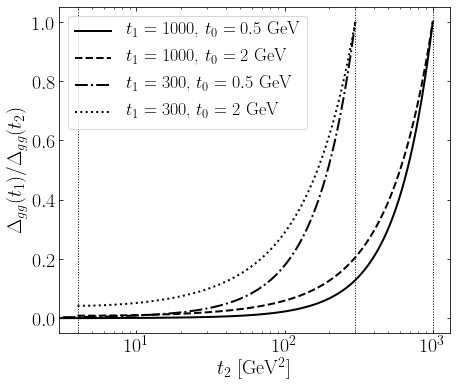

In [104]:
figsize(7,6)
#hist(res_hist_300GeV_2, bins=logspace(log10(4.),log10(300.), 30), range=(min(res_hist_300GeV_2),max(res_hist_300GeV_2)), weights=ones(len(res_hist_300GeV_2))/850., color='silver', label=r'$\Delta(t_1)/\Delta(t_2)=\mathcal R$')
#plot(res_hist.T[0],res_hist.T[1],'o')
semilogx(res_1TeV_0p5.T[0], res_1TeV_0p5.T[1], 'k-', lw=2, label=r'$t_1=1000$, $t_0=0.5$ GeV')
plot(res_1TeV_2.T[0], res_1TeV_2.T[1], 'k--', lw=2, label=r'$t_1=1000$, $t_0=2$ GeV')
plot(res_300GeV_0p5.T[0], res_300GeV_0p5.T[1], 'k-.', lw=2, label=r'$t_1=300$, $t_0=0.5$ GeV')
plot(res_300GeV_2.T[0], res_300GeV_2.T[1], 'k:', lw=2, label=r'$t_1=300$, $t_0=2$ GeV')
plot([1,1],[-1,2],'k:',lw=1)
plot([4,4],[-1,2],'k:',lw=1)
plot([300,300],[-1,2],'k:',lw=1)
plot([1000,1000],[-1,2],'k:',lw=1)

xlabel(r'$t_2$ [GeV$^2$]', fontsize=20)
ylabel(r'$\Delta_{gg}(t_1)/\Delta_{gg}(t_2)$', fontsize=20)
tick_params(axis='both', top=True, right=True, which='both', direction='in', labelsize=20)
ylim(-0.05,1.05)
xlim(3,1300)
legend(fontsize=18,ncol=1,loc='upper left');
savefig('Sudakov_MC.pdf', format='pdf',bbox_inches='tight')
show()

- To find the $x$ from the splitting, we use the splitting functions $P(x)$, describing the probability of the splitting.
- The split has to be big enought to resolve: $z,1-z>t_0/t_2$.
- To obtain the split:
$$ \frac{\int^{x_2/x_1}_{t_0/t_2}dz\frac{\alpha_s(t_2)}{2\pi}P(z)}{\int^{1-t_0/t_2}_{t_0/t_2}d\tilde z\frac{\alpha_s(t_2)}{2\pi}P(\tilde z)}=\mathcal R^\prime $$
* Changing $t_0$ and $t_2$, only affects the definition of the resolution of the branch: $t_0/t_2$
    * By increasing $t_2$, the resolution is getting better, resulting more soft splits.
    * By increasing $t_0$, the resolution is getting worse, resulting less soft splits.
    * By increastin $t_0/t_2$, the interval of $x$ getting smaller.
    

In [4]:
def int0_P_gg(t0,t2):
    T = t0/t2
    CA = 3.
    return alpha_s(t2)/(2.*pi) * 2.*CA * ( 2.*T*T*T/3. - T*T + 4.*T + 2.*(log(1.-T)-log(T)) - 11./6. )
def intx_P_gg(x,t0,t2):
    T = t0/t2
    CA = 3.
    return alpha_s(t2)/(2.*pi) * 2.*CA / 6. * (T*(12. + T*(2.*T - 3.)) + x*(x*(3. - 2.*x) - 12.) - 6.*log(T*(x-1.)/(x*(T-1.))))

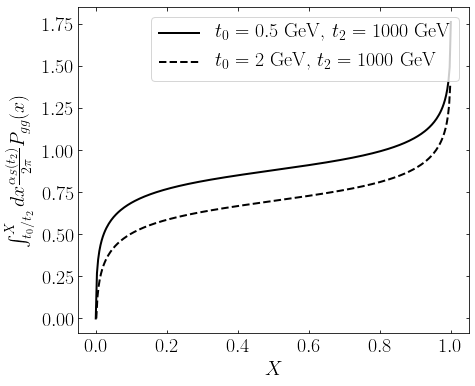

In [13]:
figsize(7,6)
res_0p5=array([[i, intx_P_gg(i,0.5,1000.)] for i in linspace(0.5/1000.,1.-0.5/1000.,300)])
res_2=array([[i, intx_P_gg(i,2.,1000.)] for i in linspace(2./1000.,1.-2./1000.,300)])
plot(res_0p5.T[0], res_0p5.T[1], 'k-', lw=2, label=r'$t_0=0.5$ GeV, $t_2=1000$ GeV')
plot(res_2.T[0], res_2.T[1], 'k--', lw=2, label=r'$t_0=2$ GeV, $t_2=1000$ GeV')

xlabel(r'$X$', fontsize=20)
ylabel(r'$\int^{X}_{t_0/t_2}dx\frac{\alpha_S(t_2)}{2\pi}P_{gg}(x)$', fontsize=20)
tick_params(axis='both', top=True, right=True, which='both', direction='in', labelsize=20)
legend(fontsize=20,loc='upper right');
show()

In [6]:
def find_x2(x, p):
    t0, t2, Rp = p
    return intx_P_gg(x,t0,t2)/int0_P_gg(t0,t2) - Rp

t0 = 1.
t2 = 10000.
ran = rand()
x = brentq(find_x2, t0/t2, 1.-t0/t2, args=([t0, t2, ran]))
print(x, find_x2(x, ([t0, t2, ran])), ran)

0.5782972463264459 4.907185768843192e-14 0.5107675431570358


In [30]:
res_hist_0p5_1TeV = [brentq(find_x2, t0/t2, 1.-t0/t2, args=([t0, t2, rand()])) for i in range(0,5000)]

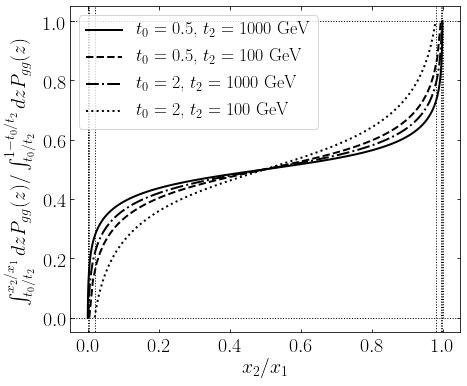

In [97]:
figsize(7,6)
#y, x, _ = hist(res_hist_0p5_1TeV, bins=100, range=(min(res_hist_0p5_1TeV),max(res_hist_0p5_1TeV)), weights=ones(len(res_hist_0p5_1TeV))/y.max(), color='silver', label=r'$\int^x dz P(z)/\int d\tilde z P(\tilde z)=\mathcal R^\prime$')
res_t0_0p5_1TeV=array([[i, intx_P_gg(i,0.5,1000)/int0_P_gg(0.5,1000)] for i in linspace(0.0005,0.9995,1000)])
res_t0_0p5_100GeV=array([[i, intx_P_gg(i,0.5,100)/int0_P_gg(0.5,100)] for i in linspace(0.005,0.995,100)])
res_t0_2_1TeV=array([[i, intx_P_gg(i,2.,1000)/int0_P_gg(2.,1000)] for i in linspace(0.002,0.998,1000)])
res_t0_2_100GeV=array([[i, intx_P_gg(i,2.,100)/int0_P_gg(2.,100)] for i in linspace(0.02,0.98,1000)])
plot(res_t0_0p5_1TeV.T[0], res_t0_0p5_1TeV.T[1], 'k-', lw=2, label=r'$t_0=0.5$, $t_2=1000$ GeV')
plot(res_t0_0p5_100GeV.T[0], res_t0_0p5_100GeV.T[1], 'k--', lw=2, label=r'$t_0=0.5$, $t_2=100$ GeV')
plot(res_t0_2_1TeV.T[0], res_t0_2_1TeV.T[1], 'k-.', lw=2, label=r'$t_0=2$, $t_2=1000$ GeV')
plot(res_t0_2_100GeV.T[0], res_t0_2_100GeV.T[1], 'k:', lw=2, label=r'$t_0=2$, $t_2=100$ GeV')
plot([-1,2],[1,1],'k:', lw=1)
plot([-1,2],[0,0],'k:', lw=1)
plot([0,0],[0,1],'k:', lw=1)
plot([1,1],[0,1],'k:', lw=1)
plot([0.5/100.,0.5/100.],[-1,2],'k:', lw=1)
plot([1.-0.5/100.,1.-0.5/100.],[-1,2],'k:', lw=1)
plot([2./1000.,2./1000.],[-1,2],'k:', lw=1)
plot([1.-2./1000.,1.-2./1000.],[-1,2],'k:', lw=1)
plot([2./100.,2./100.],[-1,2],'k:', lw=1)
plot([1.-2./100.,1.-2./100.],[-1,2],'k:', lw=1)

xlim(-0.05,1.05)
ylim(-0.05,1.05)
xlabel(r'$x_2/x_1$', fontsize=20)
ylabel(r'$\int^{x_2/x_1}_{t_0/t_2} dzP_{gg}(z)/\int^{1-{t_0/t_2}}_{t_0/t_2} dzP_{gg}(z)$', fontsize=20)
tick_params(axis='both', top=True, right=True, which='both', direction='in', labelsize=20)
legend(fontsize=18,loc='upper left');
#savefig('x2_MC.pdf', format='pdf',bbox_inches='tight')
show()

### Parton shower MC

1. Postulate $(t_1,x_1)$
2. Find $t_2$ by using:
    1. Random number $\mathcal R$ between $[0,1]$
    2. If $\mathcal R>\Delta(t_1,t_0)/\Delta(2t_0,t_0)$, for $t_2$, solve
$$\frac{\Delta(t_1,t_0)}{\Delta(t_2,t_0)}=\mathcal R.$$
    3. Otherwise stop the branching.
    4. If $t_2<Q^2_0$
3. Find $x_2$ by using:
    1. Random number $\mathcal R^\prime$ between $[0,1]$.
    2. For $x_2/x_1$ or $1-x_2/x_1$, solve
$$\frac{\int^{x_2/x_1}_{t_0/t_2}dzP(z)}{\int^{1-t_0/t_2}_{t_0/t_2}dzP(z)}=\mathcal R^\prime.$$
4. Other coordinates:
    1. Ordering in $t_{i+1}\ll t_i$.
    2. Ordering in $x_{i+1}\ll x_i$.
    3. No ordering in $\xi_i=\frac{x_i}{x_{i-1}}$.
    4. Ordering in $k^2_{t,i}=t_i\xi_i(1-\xi_i)\gg k^2_{t,i+1}$.
    5. No ordering in $\theta_i=\frac{k_{t,i}}{\xi_i(1-\xi_i)x_iE_\max}$.
   

In [6]:
R = 1.
E_max = 1000.
t_max = E_max * R
x_max = 1.
t0 = 2.
t1 = t_max
x1 = x_max
jet_coord = []
i = 0
while ( True ):
    ran = rand()
    if (ran > Sudakov(t1, t0)): #This intervall can be transformed to always get a right ran.
        t2 = brentq(find_t2, 2.*t0, t1, args=([t0, t1, ran]))
        xi = brentq(find_x2, t0/t2, 1.-t0/t2, args=([t0, t2, rand()]))
        if (xi > 0.5): x2 = x1 * xi
        else: 
            xi = 1. - xi
            x2 = x1 * xi
        if (i == 0): jet_coord.append([t2, xi, x2, t1*xi*(1.-xi), sqrt(t1*xi*(1.-xi))/xi/(x1*E_max)])
        else: jet_coord = vstack([jet_coord, [t2, xi, x2, t1*xi*(1.-xi), sqrt(t1*xi*(1.-xi))/xi/(x1*E_max)]])
        t1 = t2
        x1 = x2
        i = i + 1
    else: break #I need this break otherwise it stucks.
print(jet_coord)

[[4.38295801e+02 9.90204336e-01 9.90204336e-01 9.69970882e+00
  3.14524532e-03]
 [1.19266935e+02 8.16113745e-01 8.08119369e-01 6.57759714e+01
  1.00359415e-02]]


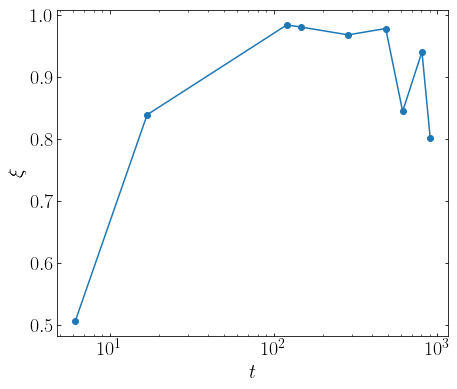

In [27]:
figsize(7,6)
semilogx(jet_coord.T[0],jet_coord.T[2],'o-')
xlabel(r'$t$', fontsize=20)
ylabel(r'$\xi$', fontsize=20)
tick_params(axis='both', top=True, right=True, which='both', direction='in', labelsize=20)
show()

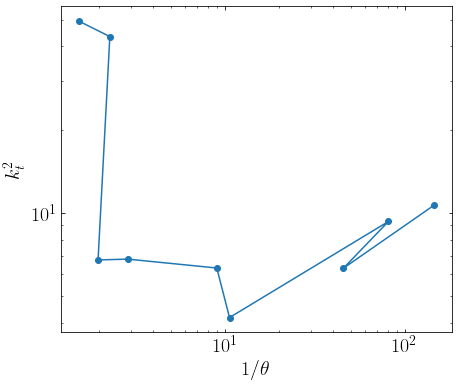

In [28]:
figsize(7,6)
loglog(jet_coord.T[3],1./jet_coord.T[4],'o-')
xlabel(r'$1/\theta$', fontsize=20)
ylabel(r'$k^2_t$', fontsize=20)
tick_params(axis='both', top=True, right=True, which='both', direction='in', labelsize=20)
show()

In [45]:
R = 1.
E_max = 100.
t_max = (E_max * R)**2.
x_max = 1.
t0 = 0.5
N_jet = 1000
res = []
for j in range(N_jet):
    t1 = t_max
    x1 = x_max
    i = 0
    jet_coord = []
    while ( True ):
        ran = rand()
        if (ran > Sudakov(t1, t0)): 
            t2 = brentq(find_t2, 2.*t0, t1, args=([t0, t1, ran]))
            xi = brentq(find_x2, t0/t2, 1.-t0/t2, args=([t0, t2, rand()]))
            if (xi > 0.5): x2 = x1 * xi
            else: 
                xi = 1. - xi
                x2 = x1 * xi
            E2 = x1 * E_max
            kt2 = xi * (1.-xi) * t2
            theta = sqrt(kt2)/xi/(1.-xi)/E2
            if (i == 0): jet_coord.append([t2, xi, x2, kt2, theta])
            else: jet_coord = vstack([jet_coord, [t2, xi, x2, kt2, theta]])
            t1 = t2
            x1 = x2
            i = i + 1
        else: break
    if (j==0): res = jet_coord
    else: 
        if (len(jet_coord) != 0): res = vstack([res, jet_coord])
    if (j % 100 == 0): print(j)

0
100
200
300
400
500
600
700
800
900


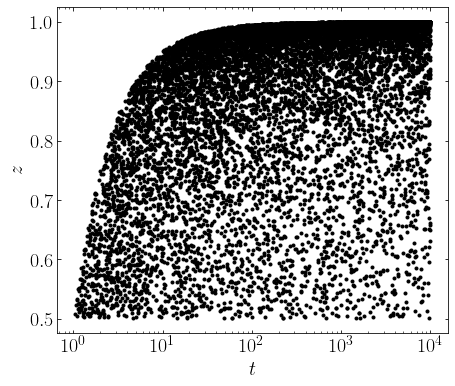

In [40]:
figsize(7,6)
semilogx(res.T[0],res.T[1],'k.')

#xlim(-0.05,1.05)
#ylim(-0.05,1.05)
xlabel(r'$t$', fontsize=20)
ylabel(r'$z$', fontsize=20)
tick_params(axis='both', top=True, right=True, which='both', direction='in', labelsize=20)
#legend(fontsize=18,loc='upper right');
#savefig('x2_MC.pdf', format='pdf',bbox_inches='tight')
show()

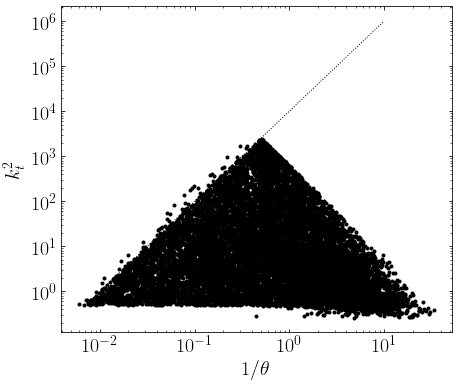

In [38]:
figsize(7,6)
loglog(1/res.T[4],res.T[3],'k.')
xlabel(r'$1/\theta$', fontsize=20)
ylabel(r'$k^2_t$', fontsize=20)
invtheta=logspace(-2,1,30)
loglog(invtheta,E_max**2*invtheta**2,'k:',lw=1)
tick_params(axis='both', top=True, right=True, which='both', direction='in', labelsize=20)
show()

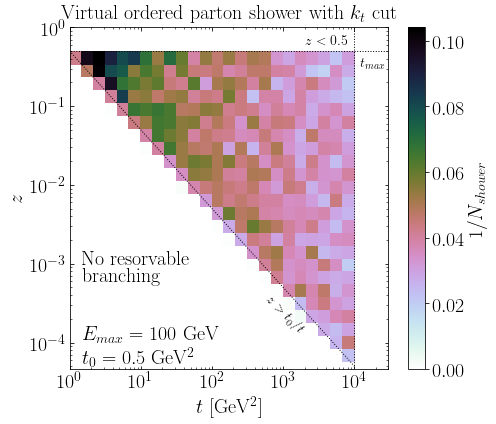

In [46]:
t_cut=2.*t0
fig, ax = subplots()
figsize(7,6)

xbins = logspace(log10(2.*t0), log10(t_max), 25)
ybins = logspace(log10(min(1.-res.T[1])),log10(0.5), 25)
h = ax.hist2d(res.T[0], 1.-res.T[1], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N_jet, cmap='cubehelix_r')
tvec = logspace(log10(2.*t0),log10(t_max),200)
plot(tvec,t0/tvec,'k:',lw=1)
text(2e3, 0.6, r'$z<0.5$', fontsize=14)
text(5e2, 3e-4, r'$z>t_0/t$', rotation=-45, fontsize=14)
text(1.2e4, 0.3, r'$t_{max}$', fontsize=14)
plot([0.1,5e4],[0.5,0.5],'k:',lw=1)
plot([t_max,t_max],[1e-5,1],'k:',lw=1)
cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')

xlim(t_cut,3*t_max)
ylim(0.8*min(1.-res.T[1]),1.)
xlabel(r'$t$ [GeV$^2$]', fontsize=20)
ylabel(r'$z$', fontsize=20)
cbar.set_label(r"$1/N_{shower}$", fontsize=20)
title('Virtual ordered parton shower with $k_t$ cut', fontsize=20)
text(1.5, 1e-3, r'No resorvable', fontsize=20)
text(1.5, 6e-4, r'branching', fontsize=20)
text(1.5, 1e-4, r'$E_{max}=100$ GeV', fontsize=20)
text(1.5, 5e-5, r'$t_0=0.5$ GeV$^2$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("ShowerPlane_t_ordered_kt_cut_t0_0p5.pdf", bbox_inches="tight")
tight_layout()
show()

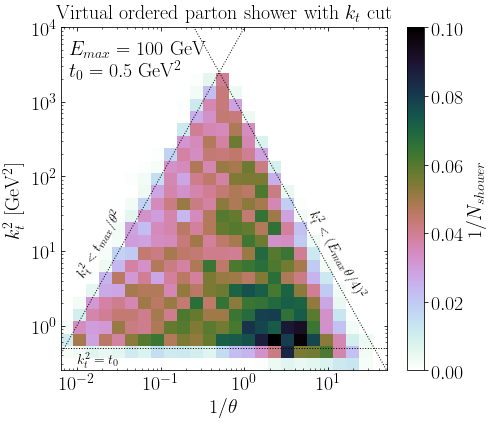

In [47]:
fig, ax = subplots()
figsize(7,6)

#fancy colormap: cubehelix_r
xbins = logspace(log10(min(1./res.T[4])),log10(max(1./res.T[4])), 25)
ybins = logspace(log10(0.5*t0),log10(max(res.T[3])), 25)
h = ax.hist2d(1./res.T[4], res.T[3], bins=(xbins, ybins), weights=ones(len(res.T[0]))/N_jet, cmap='cubehelix_r')
plot([1e-5,1e5],[t0,t0],'k:',lw=1)
text(1e-2, 2.8e-1, r'$k^2_t=t_0$', fontsize=14)
invtheta=logspace(-3,2,30)
loglog(invtheta,E_max**2*invtheta**2,'k:',lw=1)
text(1e-2, 2.5e1, r'$k^2_t<t_{max}/\theta^2$', rotation=60, fontsize=14)
loglog(invtheta,E_max**2/16./invtheta**2,'k:',lw=1)
text(5e0, 2.5e1, r'$k^2_t<(E_{max}\theta/4)^2$', rotation=-60, fontsize=14)

cbar = colorbar(h[3], ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')

xlim(min(1./res.T[4]),5e1)
ylim(0.5*t0,1e4)
ylabel(r'$k^2_t$ [GeV$^2$]', fontsize=20)
xlabel(r'$1/\theta$', fontsize=20)
cbar.set_label(r"$1/N_{shower}$", fontsize=20)
title('Virtual ordered parton shower with $k_t$ cut', fontsize=20)
text(8e-3, 4.0e3, r'$E_{max}=100$ GeV', fontsize=20)
text(8e-3, 2.0e3, r'$t_0=0.5$ GeV$^2$', fontsize=20)
#text(6e-3, 1.1e3, r'$r=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("LundPlane_t_ordered_kt_cut_t0_0p5.pdf", bbox_inches="tight")
tight_layout()
show()

# Event Generators

## Reconstructed and history Lund plane

In [35]:
res = loadtxt("../LundPlane/MC/pythia8LP_corr.dat")
#res = loadtxt("../LundPlane/MC/pythia8LP_corr_noSD.dat")
#res = loadtxt("../LundPlane/MC/pythia8LP_corr_z0p1b2.dat")
#res = loadtxt("../LundPlane/MC/pythia8LP_corr_z0p1b0.dat")
#res = loadtxt("../LundPlane/MC/pythia8LP_corr_z0p1bm1.dat")
res0 = []; res1 = []; res2 = []
for i in range(len(res)):
    if (res[i, 6] == 0): 
        if (len(res0) == 0): res0 = res[i]
        else: res0 = vstack([res0, res[i]])
    elif (res[i, 6] == 1): 
        if (len(res1) == 0): res1 = res[i]
        else: res1 = vstack([res1, res[i]])
    elif (res[i, 6] == 2): 
        if (len(res2) == 0): res2 = res[i]
        else: res2 = vstack([res2, res[i]])

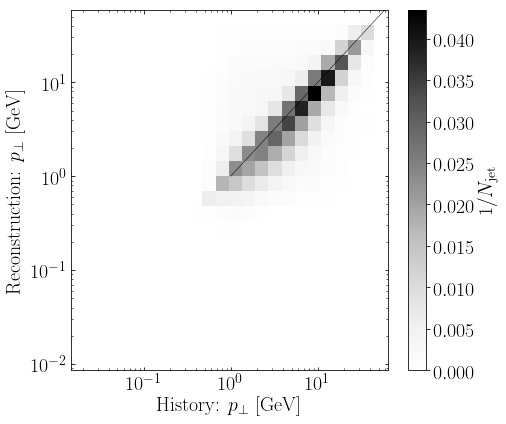

In [36]:
fig, ax = subplots()
figsize(7,6)

#fancy colormap: cubehelix_r
xbins = logspace(log10(min(res0.T[1])),log10(max(res0.T[1])), 25)
ybins = logspace(log10(min(res0.T[4])),log10(max(res0.T[4])), 25)
h = ax.hist2d(res0.T[1], res0.T[4], bins=(xbins, ybins), weights=ones(len(res0.T[0]))/len(res0.T[0]), cmap='Greys')
loglog([1,100],[1,100], 'k-', lw=0.5)

cbar = colorbar(h[3], ax=ax)
xlabel(r'History: $p_{\perp}$ [GeV]', fontsize=20)
ylabel(r'Reconstruction: $p_{\perp}$ [GeV]', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
#xlim(0.9/R,3e1)
#ylim(0.65,1e3)
cbar.set_label(r"$1/N_{\rm jet}$", fontsize=20)
#title(r'Reconstructed primary Lund plane', fontsize=20)
#text(3., 5.7e2, r'PYTHIA6 w/o AO', fontsize=20)
#text(3., 3.2e2, r'No: ISR, MPI, Hadr.', fontsize=20)
#text(3., 1.7e2, r'$p_{J_T}=90-110$ GeV', fontsize=20)
#text(3., 1.1e2, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("LundPlane_pythia6jets_noAO.pdf", bbox_inches="tight")
tight_layout()
show()

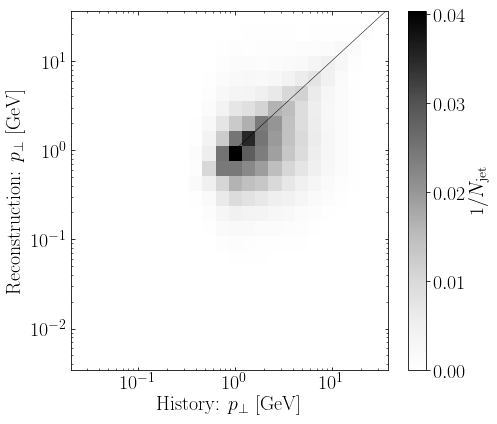

In [37]:
fig, ax = subplots()
figsize(7,6)

#fancy colormap: cubehelix_r
xbins = logspace(log10(min(res1.T[1])),log10(max(res1.T[1])), 25)
ybins = logspace(log10(min(res1.T[4])),log10(max(res1.T[4])), 25)
h = ax.hist2d(res1.T[1], res1.T[4], bins=(xbins, ybins), weights=ones(len(res1.T[0]))/len(res1.T[0]), cmap='Greys')
loglog([1,100],[1,100], 'k-', lw=0.5)

cbar = colorbar(h[3], ax=ax)
xlabel(r'History: $p_{\perp}$ [GeV]', fontsize=20)
ylabel(r'Reconstruction: $p_{\perp}$ [GeV]', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
#xlim(0.9/R,3e1)
#ylim(0.65,1e3)
cbar.set_label(r"$1/N_{\rm jet}$", fontsize=20)
#title(r'Reconstructed primary Lund plane', fontsize=20)
#text(3., 5.7e2, r'PYTHIA6 w/o AO', fontsize=20)
#text(3., 3.2e2, r'No: ISR, MPI, Hadr.', fontsize=20)
#text(3., 1.7e2, r'$p_{J_T}=90-110$ GeV', fontsize=20)
#text(3., 1.1e2, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("LundPlane_pythia6jets_noAO.pdf", bbox_inches="tight")
tight_layout()
show()

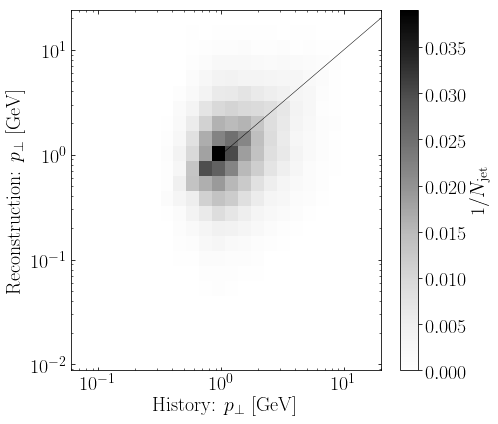

In [38]:
fig, ax = subplots()
figsize(7,6)

#fancy colormap: cubehelix_r
xbins = logspace(log10(min(res2.T[1])),log10(max(res2.T[1])), 25)
ybins = logspace(log10(min(res2.T[4])),log10(max(res2.T[4])), 25)
h = ax.hist2d(res2.T[1], res2.T[4], bins=(xbins, ybins), weights=ones(len(res2.T[0]))/len(res2.T[0]), cmap='Greys')
loglog([1,100],[1,100], 'k-', lw=0.5)

cbar = colorbar(h[3], ax=ax)
xlabel(r'History: $p_{\perp}$ [GeV]', fontsize=20)
ylabel(r'Reconstruction: $p_{\perp}$ [GeV]', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
#xlim(0.9/R,3e1)
#ylim(0.65,1e3)
cbar.set_label(r"$1/N_{\rm jet}$", fontsize=20)
#title(r'Reconstructed primary Lund plane', fontsize=20)
#text(3., 5.7e2, r'PYTHIA6 w/o AO', fontsize=20)
#text(3., 3.2e2, r'No: ISR, MPI, Hadr.', fontsize=20)
#text(3., 1.7e2, r'$p_{J_T}=90-110$ GeV', fontsize=20)
#text(3., 1.1e2, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("LundPlane_pythia6jets_noAO.pdf", bbox_inches="tight")
tight_layout()
show()

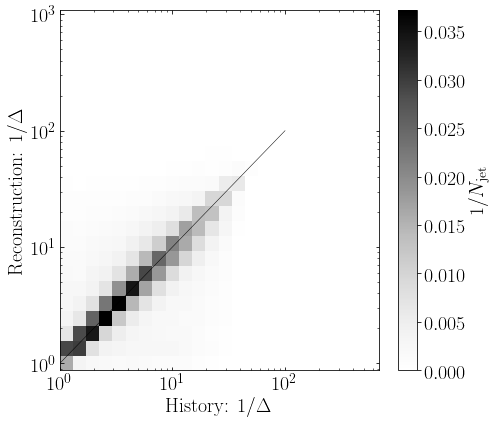

In [39]:
fig, ax = subplots()
figsize(7,6)

#fancy colormap: cubehelix_r

xbins = logspace(log10(min(1./res0.T[2])),log10(max(1./res0.T[2])), 25)
ybins = logspace(log10(min(1./res0.T[5])),log10(max(1./res0.T[5])), 25)
h = ax.hist2d(1./res0.T[2], 1./res0.T[5], bins=(xbins, ybins), weights=ones(len(res0.T[0]))/len(res0.T[0]), cmap='Greys')
loglog([0.1,100],[0.1,100], 'k-', lw=0.5)

cbar = colorbar(h[3], ax=ax)
xlabel(r'History: $1/\Delta$', fontsize=20)
ylabel(r'Reconstruction: $1/\Delta$', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
#xlim(0.9/R,3e1)
#ylim(0.65,1e3)
cbar.set_label(r"$1/N_{\rm jet}$", fontsize=20)
#title(r'Reconstructed primary Lund plane', fontsize=20)
#text(3., 5.7e2, r'PYTHIA6 w/o AO', fontsize=20)
#text(3., 3.2e2, r'No: ISR, MPI, Hadr.', fontsize=20)
#text(3., 1.7e2, r'$p_{J_T}=90-110$ GeV', fontsize=20)
#text(3., 1.1e2, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("LundPlane_pythia6jets_noAO.pdf", bbox_inches="tight")
tight_layout()
show()

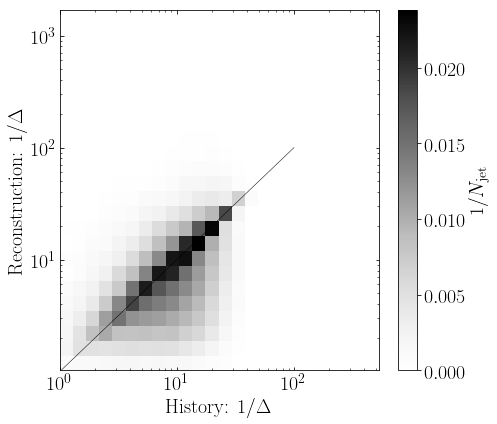

In [40]:
fig, ax = subplots()
figsize(7,6)

#fancy colormap: cubehelix_r

xbins = logspace(log10(min(1./res1.T[2])),log10(max(1./res1.T[2])), 25)
ybins = logspace(log10(min(1./res1.T[5])),log10(max(1./res1.T[5])), 25)
h = ax.hist2d(1./res1.T[2], 1./res1.T[5], bins=(xbins, ybins), weights=ones(len(res1.T[0]))/len(res1.T[0]), cmap='Greys')
loglog([0.1,100],[0.1,100], 'k-', lw=0.5)

cbar = colorbar(h[3], ax=ax)
xlabel(r'History: $1/\Delta$', fontsize=20)
ylabel(r'Reconstruction: $1/\Delta$', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
#xlim(0.9/R,3e1)
#ylim(0.65,1e3)
cbar.set_label(r"$1/N_{\rm jet}$", fontsize=20)
#title(r'Reconstructed primary Lund plane', fontsize=20)
#text(3., 5.7e2, r'PYTHIA6 w/o AO', fontsize=20)
#text(3., 3.2e2, r'No: ISR, MPI, Hadr.', fontsize=20)
#text(3., 1.7e2, r'$p_{J_T}=90-110$ GeV', fontsize=20)
#text(3., 1.1e2, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("LundPlane_pythia6jets_noAO.pdf", bbox_inches="tight")
tight_layout()
show()

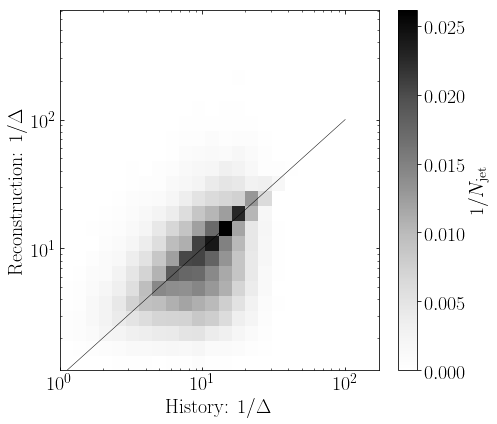

In [41]:
fig, ax = subplots()
figsize(7,6)

#fancy colormap: cubehelix_r

xbins = logspace(log10(min(1./res2.T[2])),log10(max(1./res2.T[2])), 25)
ybins = logspace(log10(min(1./res2.T[5])),log10(max(1./res2.T[5])), 25)
h = ax.hist2d(1./res2.T[2], 1./res2.T[5], bins=(xbins, ybins), weights=ones(len(res2.T[0]))/len(res2.T[0]), cmap='Greys')
loglog([0.1,100],[0.1,100], 'k-', lw=0.5)

cbar = colorbar(h[3], ax=ax)
xlabel(r'History: $1/\Delta$', fontsize=20)
ylabel(r'Reconstruction: $1/\Delta$', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
#xlim(0.9/R,3e1)
#ylim(0.65,1e3)
cbar.set_label(r"$1/N_{\rm jet}$", fontsize=20)
#title(r'Reconstructed primary Lund plane', fontsize=20)
#text(3., 5.7e2, r'PYTHIA6 w/o AO', fontsize=20)
#text(3., 3.2e2, r'No: ISR, MPI, Hadr.', fontsize=20)
#text(3., 1.7e2, r'$p_{J_T}=90-110$ GeV', fontsize=20)
#text(3., 1.1e2, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("LundPlane_pythia6jets_noAO.pdf", bbox_inches="tight")
tight_layout()
show()

## Lund Plane

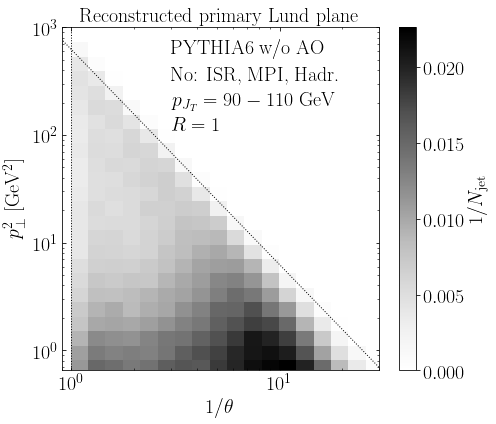

In [15]:
res = loadtxt("../LundPlane/MC/pythia6jets_noAO_LundPlane.dat")
N = 84083
R = 1.
t_max = 100.**2

fig, ax = subplots()
figsize(7,6)

#fancy colormap: cubehelix_r
xbins = logspace(log10(1.),log10(100.), 25)
ybins = logspace(log10(0.6),log10(1000), 25)
h = ax.hist2d(1./res.T[4], res.T[3]/4., bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Greys')
invtheta=logspace(-3,2,30)
loglog(invtheta,sqrt(t_max/R)**2/16./invtheta**2,'k:',lw=1)
plot([1./R,1./R],[1e-1,1e4], 'k:', lw=1)

cbar = colorbar(h[3], ax=ax)
xlabel(r'$1/\theta$', fontsize=20)
ylabel(r'$p^2_{\perp}$ [GeV$^2$]', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.9/R,3e1)
ylim(0.65,1e3)
cbar.set_label(r"$1/N_{\rm jet}$", fontsize=20)
title(r'Reconstructed primary Lund plane', fontsize=20)
text(3., 5.7e2, r'PYTHIA6 w/o AO', fontsize=20)
text(3., 3.2e2, r'No: ISR, MPI, Hadr.', fontsize=20)
text(3., 1.7e2, r'$p_{J_T}=90-110$ GeV', fontsize=20)
text(3., 1.1e2, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("LundPlane_pythia6jets_noAO.pdf", bbox_inches="tight")
tight_layout()
show()

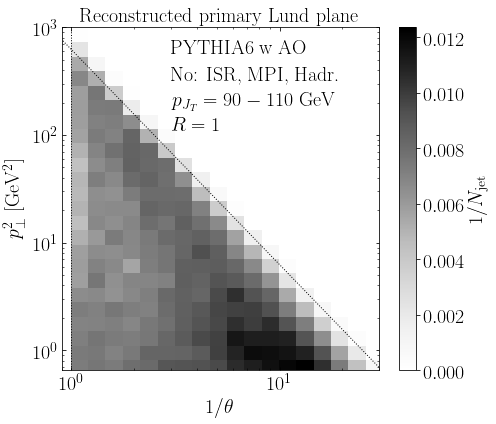

In [14]:
res = loadtxt("../LundPlane/MC/pythia6jets_LundPlane.dat")
N = 82003
R = 1.
t_max = 100.**2

fig, ax = subplots()
figsize(7,6)

#fancy colormap: cubehelix_r
xbins = logspace(log10(1.),log10(100.), 25)
ybins = logspace(log10(0.6),log10(1000), 25)
h = ax.hist2d(1./res.T[4], res.T[3]/4., bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Greys')
invtheta=logspace(-3,2,30)
loglog(invtheta,sqrt(t_max/R)**2/16./invtheta**2,'k:',lw=1)
plot([1./R,1./R],[1e-1,1e4], 'k:', lw=1)

cbar = colorbar(h[3], ax=ax)
xlabel(r'$1/\theta$', fontsize=20)
ylabel(r'$p^2_{\perp}$ [GeV$^2$]', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.9/R,3e1)
ylim(0.65,1e3)
cbar.set_label(r"$1/N_{\rm jet}$", fontsize=20)
title(r'Reconstructed primary Lund plane', fontsize=20)
text(3., 5.7e2, r'PYTHIA6 w AO', fontsize=20)
text(3., 3.2e2, r'No: ISR, MPI, Hadr.', fontsize=20)
text(3., 1.7e2, r'$p_{J_T}=90-110$ GeV', fontsize=20)
text(3., 1.1e2, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("LundPlane_pythia6jets_AO.pdf", bbox_inches="tight")
tight_layout()
show()

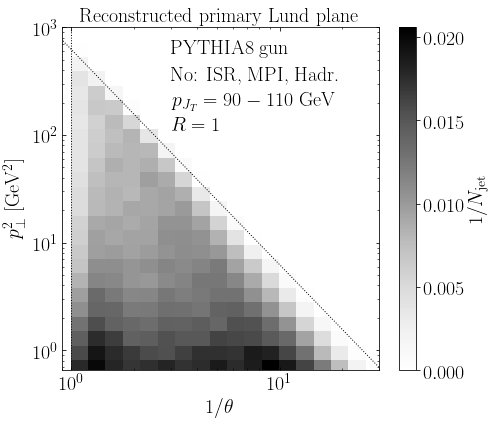

In [13]:
res = loadtxt("../LundPlane/MC/pythia8gun_LundPlane.dat")
N = 75855
R = 1.
t_max = 100.**2

fig, ax = subplots()
figsize(7,6)

#fancy colormap: cubehelix_r
xbins = logspace(log10(1.),log10(100.), 25)
ybins = logspace(log10(0.6),log10(1000), 25)
h = ax.hist2d(1./res.T[4], res.T[3]/4., bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Greys', cmin=0, cmax=0.025)
invtheta=logspace(-3,2,30)
loglog(invtheta,sqrt(t_max/R)**2/16./invtheta**2,'k:',lw=1)
plot([1./R,1./R],[1e-1,1e4], 'k:', lw=1)

cbar = colorbar(h[3], ax=ax)
xlabel(r'$1/\theta$', fontsize=20)
ylabel(r'$p^2_{\perp}$ [GeV$^2$]', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.9/R,3e1)
ylim(0.65,1e3)
cbar.set_label(r"$1/N_{\rm jet}$", fontsize=20)
title(r'Reconstructed primary Lund plane', fontsize=20)
text(3., 5.7e2, r'PYTHIA8 gun', fontsize=20)
text(3., 3.2e2, r'No: ISR, MPI, Hadr.', fontsize=20)
text(3., 1.7e2, r'$p_{J_T}=90-110$ GeV', fontsize=20)
text(3., 1.1e2, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("LundPlane_pythia8gun.pdf", bbox_inches="tight")
tight_layout()
show()

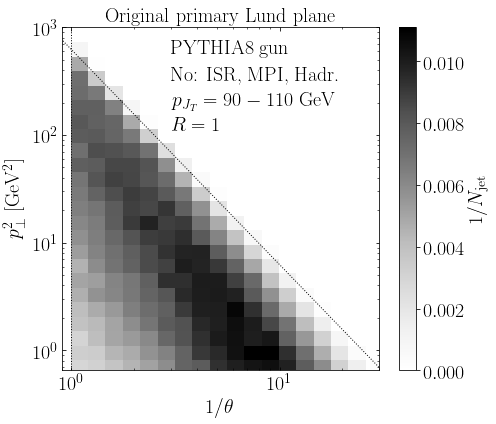

In [12]:
res = loadtxt("../LundPlane/MC/pythia8gun_LundPlane_analytic.dat")
N = 100000
R = 1.
t_max = 100.**2

fig, ax = subplots()
figsize(7,6)

#fancy colormap: cubehelix_r
xbins = logspace(log10(1.),log10(100.), 25)
ybins = logspace(log10(0.6),log10(1000), 25)
h = ax.hist2d(1./res.T[4], res.T[3]/4., bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Greys', cmin=0, cmax=0.025)
invtheta=logspace(-3,2,30)
loglog(invtheta,sqrt(t_max/R)**2/16./invtheta**2,'k:',lw=1)
plot([1./R,1./R],[1e-1,1e4], 'k:', lw=1)

cbar = colorbar(h[3], ax=ax)
xlabel(r'$1/\theta$', fontsize=20)
ylabel(r'$p^2_{\perp}$ [GeV$^2$]', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.9/R,3e1)
ylim(0.65,1e3)
cbar.set_label(r"$1/N_{\rm jet}$", fontsize=20)
title(r'Original primary Lund plane', fontsize=20)
text(3., 5.7e2, r'PYTHIA8 gun', fontsize=20)
text(3., 3.2e2, r'No: ISR, MPI, Hadr.', fontsize=20)
text(3., 1.7e2, r'$p_{J_T}=90-110$ GeV', fontsize=20)
text(3., 1.1e2, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("LundPlane_pythia8gun_history.pdf", bbox_inches="tight")
tight_layout()
show()

In [7]:
res = loadtxt("../LundPlane/MC/pythia8gun_LundPlane.dat")
res1 = loadtxt("../LundPlane/MC/pythia8gun_LundPlane_analytic.dat")


In [22]:
i=range(0,10)
print(res[i,3],res1[i,3],"\n")

[ 0.349138  2.91955  39.6794   40.0342    0.532174  2.82472   0.20719
  0.234973  0.811403  0.211088] [2.23896e+02 5.00991e+00 2.08292e+03 6.49666e+02 1.09963e+01 1.53273e+03
 1.39951e+00 2.07183e+00 5.83412e+00 7.65334e+00] 



In [9]:
res1[0]

array([1.40793e+03, 3.98594e-01, 1.00000e+02, 2.23896e+02, 3.75399e-01,
       3.37505e+02, 1.08865e+01, 1.00000e+00])

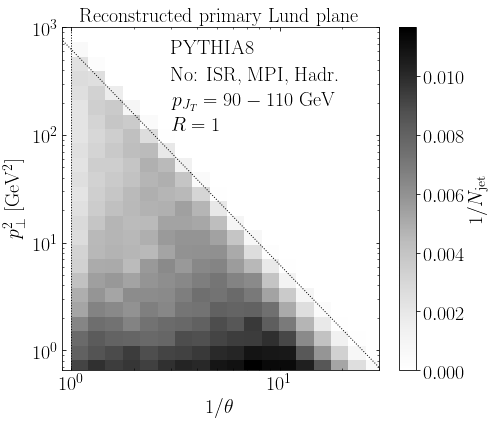

In [13]:
res = loadtxt("../LundPlane/MC/pythia8jets_LundPlane.dat")
N = 95188
R = 1.
t_max = 100.**2

fig, ax = subplots()
figsize(7,6)

#fancy colormap: cubehelix_r
xbins = logspace(log10(1.),log10(100.), 25)
ybins = logspace(log10(0.6),log10(1000), 25)
h = ax.hist2d(1./res.T[4], res.T[3]/4, bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Greys')
invtheta=logspace(-3,2,30)
loglog(invtheta,sqrt(t_max/R)**2/16./invtheta**2,'k:',lw=1)
plot([1./R,1./R],[1e-1,1e4], 'k:', lw=1)

cbar = colorbar(h[3], ax=ax)
xlabel(r'$1/\theta$', fontsize=20)
ylabel(r'$p^2_{\perp}$ [GeV$^2$]', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.9/R,3e1)
ylim(0.65,1e3)
cbar.set_label(r"$1/N_{\rm jet}$", fontsize=20)
title(r'Reconstructed primary Lund plane', fontsize=20)
text(3., 5.7e2, r'PYTHIA8', fontsize=20)
text(3., 3.2e2, r'No: ISR, MPI, Hadr.', fontsize=20)
text(3., 1.7e2, r'$p_{J_T}=90-110$ GeV', fontsize=20)
text(3., 1.1e2, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("LundPlane_pythia8jets.pdf", bbox_inches="tight")
tight_layout()
show()

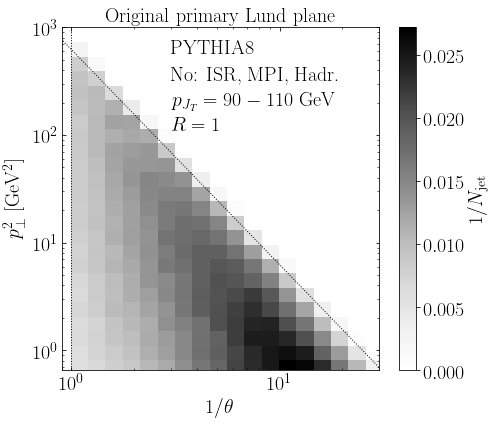

In [10]:
res = loadtxt("../LundPlane/MC/pythia8jets_LundPlane_analytic.dat")
N = 95188
R = 1.
t_max = 100.**2

fig, ax = subplots()
figsize(7,6)

#fancy colormap: cubehelix_r
xbins = logspace(log10(1.),log10(100.), 25)
ybins = logspace(log10(0.6),log10(1000), 25)
h = ax.hist2d(1./res.T[4], res.T[3]/4, bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Greys')
invtheta=logspace(-3,2,30)
loglog(invtheta,sqrt(t_max/R)**2/16./invtheta**2,'k:',lw=1)
plot([1./R,1./R],[1e-1,1e4], 'k:', lw=1)

cbar = colorbar(h[3], ax=ax)
xlabel(r'$1/\theta$', fontsize=20)
ylabel(r'$p^2_{\perp}$ [GeV$^2$]', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.9/R,3e1)
ylim(0.65,1e3)
cbar.set_label(r"$1/N_{\rm jet}$", fontsize=20)
title(r'Original primary Lund plane', fontsize=20)
text(3., 5.7e2, r'PYTHIA8', fontsize=20)
text(3., 3.2e2, r'No: ISR, MPI, Hadr.', fontsize=20)
text(3., 1.7e2, r'$p_{J_T}=90-110$ GeV', fontsize=20)
text(3., 1.1e2, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("LundPlane_pythia8jets_analytic.pdf", bbox_inches="tight")
tight_layout()
show()

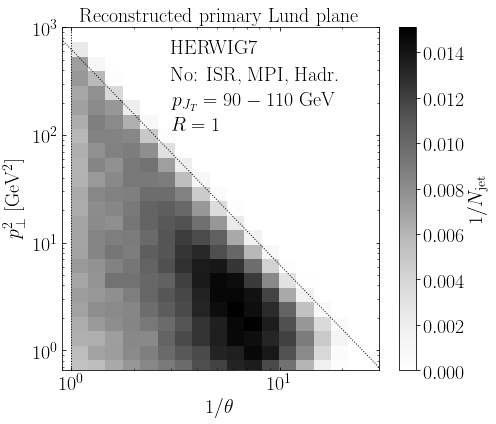

In [4]:
res = loadtxt("../LundPlane/MC/herwig7jets_LundPlane.dat")
N = 94125
R = 1.
t_max = 100.**2

fig, ax = subplots()
figsize(7,6)

#fancy colormap: cubehelix_r
xbins = logspace(log10(1.),log10(100.), 25)
ybins = logspace(log10(0.6),log10(1000), 25)
h = ax.hist2d(1./res.T[4], res.T[3]/4., bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Greys')
invtheta=logspace(-3,2,30)
loglog(invtheta,sqrt(t_max/R)**2/16./invtheta**2,'k:',lw=1)
plot([1./R,1./R],[1e-1,1e4], 'k:', lw=1)

cbar = colorbar(h[3], ax=ax)
xlabel(r'$1/\theta$', fontsize=20)
ylabel(r'$p^2_{\perp}$ [GeV$^2$]', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.9/R,3e1)
ylim(0.65,1e3)
cbar.set_label(r"$1/N_{\rm jet}$", fontsize=20)
title(r'Reconstructed primary Lund plane', fontsize=20)
text(3., 5.7e2, r'HERWIG7', fontsize=20)
text(3., 3.2e2, r'No: ISR, MPI, Hadr.', fontsize=20)
text(3., 1.7e2, r'$p_{J_T}=90-110$ GeV', fontsize=20)
text(3., 1.1e2, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
savefig("LundPlane_herwig7jets.pdf", bbox_inches="tight")
tight_layout()
show()

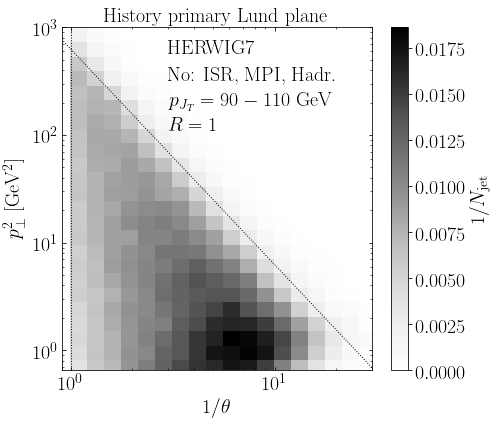

In [8]:
res = loadtxt("../LundPlane/MC/herwig7jets_history.dat")
N = 100000
R = 1.
t_max = 100.**2

fig, ax = subplots()
figsize(7,6)

#fancy colormap: cubehelix_r
xbins = logspace(log10(1.),log10(100.), 25)
ybins = logspace(log10(0.6),log10(1000), 25)
h = ax.hist2d(1./res.T[4], res.T[3]/4., bins=(xbins, ybins), weights=ones(len(res.T[0]))/N, cmap='Greys')
invtheta=logspace(-3,2,30)
loglog(invtheta,sqrt(t_max/R)**2/16./invtheta**2,'k:',lw=1)
plot([1./R,1./R],[1e-1,1e4], 'k:', lw=1)

cbar = colorbar(h[3], ax=ax)
xlabel(r'$1/\theta$', fontsize=20)
ylabel(r'$p^2_{\perp}$ [GeV$^2$]', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.9/R,3e1)
ylim(0.65,1e3)
cbar.set_label(r"$1/N_{\rm jet}$", fontsize=20)
title(r'History primary Lund plane', fontsize=20)
text(3., 5.7e2, r'HERWIG7', fontsize=20)
text(3., 3.2e2, r'No: ISR, MPI, Hadr.', fontsize=20)
text(3., 1.7e2, r'$p_{J_T}=90-110$ GeV', fontsize=20)
text(3., 1.1e2, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
cbar.ax.tick_params(labelsize=20) 
#savefig("LundPlane_herwig7jets.pdf", bbox_inches="tight")
tight_layout()
show()

# Observables

## Multiplicity

In [77]:
def PN_pt_t_cut(n, t_max, pT2_min, alpha=0.28):
    CA = 6.
    C  = CA * alpha /2. /pi
    return exp(-C/2.*log(t_max/pT2_min)*log(t_max/4./pT2_min))*1./math.factorial(n)*pow(C/2.*log(t_max/pT2_min)*log(t_max/4./pT2_min), n)
def Nav_pt_t_cut(t_max, pT2_min, alpha=0.28):
    CA = 6.
    C  = CA * alpha /2. /pi
    return C/2.*log(t_max/pT2_min)*log(t_max/4./pT2_min)
def N2av_pt_t_cut(t_max, pT2_min, alpha=0.28):
    CA = 6.
    C  = CA * alpha /2. /pi
    A  = C/2.*log(t_max/pT2_min)*log(t_max/4./pT2_min)
    return A * (A + 1.)
def PN_pt_t_R_cut(n, t_max, pT2_min, R, alpha=0.28):
    CA = 6.
    C  = CA * alpha /2. /pi
    return exp(-C*log(sqrt(t_max)*R/sqrt(pT2_min))*log(sqrt(t_max)*R/sqrt(pT2_min)/4.))*1./math.factorial(n)*pow(C*log(sqrt(t_max)*R/sqrt(pT2_min))*log(sqrt(t_max)*R/sqrt(pT2_min)/4.), n)
def N2av_pt_t_R_cut(t_max, pT2_min, R, alpha=0.28):
    CA = 6.
    C  = CA * alpha /2. /pi
    A  = C*log(sqrt(t_max)*R/sqrt(pT2_min))*log(sqrt(t_max)*R/sqrt(pT2_min)/4.)
    return A * (A + 1.)

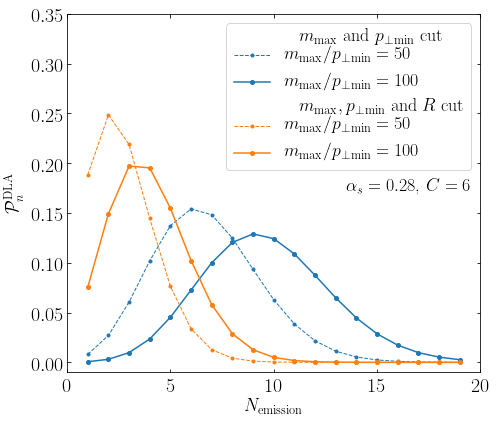

In [19]:
fig, ax = subplots()
figsize(7,6)

t_max = 50.**2.
pT2_min = 1.
R = 1.
multi_pt_t_cut=array([[i, PN_pt_t_cut(i,t_max,pT2_min)] for i in range(1,20)])
plot(multi_pt_t_cut.T[0], multi_pt_t_cut.T[1], 'C0o--', lw=1., markersize=3, label=r'$m_{\max}$ and $p_{\perp\min}$ cut\\ $m_{\max}/p_{\perp\min}=50$')

t_max = 100.**2.
pT2_min = 1.
R = 1.
multi_pt_t_cut=array([[i, PN_pt_t_cut(i,t_max,pT2_min)] for i in range(1,20)])
plot(multi_pt_t_cut.T[0], multi_pt_t_cut.T[1], 'C0o-', lw=1.5, markersize=4, label=r'$m_{\max}/p_{\perp\min}=100$')
t_max = 50.**2.
pT2_min = 1.
R = 1.
multi_pt_t_R_cut=array([[i, PN_pt_t_R_cut(i,t_max,pT2_min,R)] for i in range(1,20)])
plot(multi_pt_t_R_cut.T[0], multi_pt_t_R_cut.T[1], 'C1o--', lw=1., markersize=3, label=r'$m_{\max}, p_{\perp\min}$ and $R$ cut\\ $m_{\max}/p_{\perp\min}=50$')

t_max = 100.**2.
pT2_min = 1.
R = 1.
multi_pt_t_R_cut=array([[i, PN_pt_t_R_cut(i,t_max,pT2_min,R)] for i in range(1,20)])
plot(multi_pt_t_R_cut.T[0], multi_pt_t_R_cut.T[1], 'C1o-', lw=1.5, markersize=4, label=r'$m_{\max}/p_{\perp\min}=100$')

xlim(0,20)
ylim(-0.01,0.35)
text(13.5, 0.17, r'$\alpha_s=0.28$, $C=6$', fontsize=18)
xlabel(r'$N_{\rm emission}$', fontsize=18)
ylabel(r'$\mathcal{P}^{\rm DLA}_n$', fontsize=18)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18,loc='upper right');
tight_layout()
savefig("N_emission_DLA.pdf", bbox_inches="tight")
show()

In [78]:
t_max   = 100.**2
pT2_min = 1.
R       = 1.
Nem_m       = shower(N, 'm',       t_max, pT2_min, R, 'N_emission')
Nem_pT      = shower(N, 'pT',      t_max, pT2_min, R, 'N_emission')
Nem_tf      = shower(N, 'tf',      t_max, pT2_min, R, 'N_emission')
Nem_theta   = shower(N, 'theta',   t_max, pT2_min, R, 'N_emission')
Nem_m_Rcut  = shower(N, 'm_Rcut',  t_max, pT2_min, R, 'N_emission')
Nem_pT_Rcut = shower(N, 'pT_Rcut', t_max, pT2_min, R, 'N_emission')
Nem_tf_Rcut = shower(N, 'tf_Rcut', t_max, pT2_min, R, 'N_emission')

0
5000
0
5000
0
5000
0
5000
0
5000
0
5000
0
5000


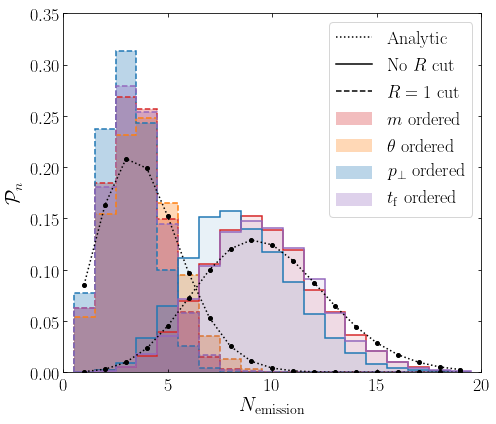

In [83]:
fig, ax = subplots()
figsize(7,6)

xbin=linspace(0.5,19.5,20)
h = ax.hist(Nem_m_Rcut.T[0],  bins=xbin, weights=ones(len(Nem_m_Rcut))/len(Nem_m_Rcut), histtype='stepfilled', alpha=0.3, lw=2, color='C3', label=r'$m$ ordered')
h = ax.hist(Nem_theta.T[0],   bins=xbin, density=True, histtype='stepfilled', alpha=0.3, lw=2, color='C1', label=r'$\theta$ ordered')
h = ax.hist(Nem_pT_Rcut.T[0], bins=xbin, density=True, histtype='stepfilled', alpha=0.3, lw=2, color='C0', label=r'$p_{\perp}$ ordered')
h = ax.hist(Nem_tf_Rcut.T[0], bins=xbin, density=True, histtype='stepfilled', alpha=0.3, linestyle='dashed', lw=2, color='C4', label=r'$t_{\rm f}$ ordered')
h = ax.hist(Nem_m_Rcut.T[0],  bins=xbin, weights=ones(len(Nem_m_Rcut))/len(Nem_m_Rcut), histtype='step', linestyle='dashed',  lw=1.5, color='C3')
h = ax.hist(Nem_theta.T[0],   bins=xbin, weights=ones(len(Nem_theta))/len(Nem_theta), histtype='step', linestyle='dashed',  lw=1.5, color='C1')
h = ax.hist(Nem_pT_Rcut.T[0], bins=xbin, weights=ones(len(Nem_pT_Rcut))/len(Nem_pT_Rcut), histtype='step', linestyle='dashed', lw=1.5, color='C0')
h = ax.hist(Nem_tf_Rcut.T[0], bins=xbin, weights=ones(len(Nem_tf_Rcut))/len(Nem_tf_Rcut), histtype='step', linestyle='dashed', lw=1.5, color='C4')

h = ax.hist(Nem_m.T[0],  bins=xbin, density=True, histtype='stepfilled', alpha=0.1, lw=2, color='C3')
h = ax.hist(Nem_pT.T[0], bins=xbin, density=True, histtype='stepfilled', alpha=0.1, lw=2, color='C0')
h = ax.hist(Nem_tf.T[0], bins=xbin, density=True, histtype='stepfilled', alpha=0.1, lw=2, color='C4')
h = ax.hist(Nem_m.T[0],  bins=xbin, weights=ones(len(Nem_m))/len(Nem_m), histtype='step',  lw=1.5, color='C3')
h = ax.hist(Nem_pT.T[0], bins=xbin, weights=ones(len(Nem_pT))/len(Nem_pT), histtype='step', lw=1.5, color='C0')
h = ax.hist(Nem_tf.T[0], bins=xbin, weights=ones(len(Nem_tf))/len(Nem_tf), histtype='step', lw=1.5, color='C4')

plot([0],[0],'k:',label=r'Analytic')
plot([0],[0],'k-',label=r'No $R$ cut')
plot([0],[0],'k--',label=r'$R=1$ cut',zorder=0)

t_max = 100.**2.
pT2_min = 1.
R = 1.
multi_pt_t_cut=array([[i, PN_pt_t_cut(i,t_max,pT2_min,0.28)/(1.-PN_pt_t_cut(0,t_max,pT2_min,0.28))] for i in range(1,20)])
plot(multi_pt_t_cut.T[0], multi_pt_t_cut.T[1], 'ko:', lw=1.5, markersize=4)

multi_pt_t_R_cut=array([[i, PN_pt_t_R_cut(i,t_max,pT2_min,R,0.27)/(1.-PN_pt_t_R_cut(0,t_max,pT2_min,R,0.27))] for i in range(1,20)])
plot(multi_pt_t_R_cut.T[0], multi_pt_t_R_cut.T[1], 'ko:', lw=1.5, markersize=4)

xlim(0.,20)
ylim(0,0.35)
xlabel(r'$N_{\rm emission}$', fontsize=20)
ylabel(r'$\mathcal{P}_n$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=18)
legend(fontsize=18,loc='upper right');
savefig("N_emission_shower.pdf", bbox_inches="tight")
tight_layout()
show()

In [18]:
Nem_m_0       = shower(N, 'm',       20**2, pT2_min, R, 'N_emission')
Nem_pT_0      = shower(N, 'pT',      20**2, pT2_min, R, 'N_emission')
Nem_tf_0      = shower(N, 'tf',      20**2, pT2_min, R, 'N_emission')
Nem_theta_0   = shower(N, 'theta',   20**2, pT2_min, R, 'N_emission')
Nem_m_Rcut_0  = shower(N, 'm_Rcut',  20**2, pT2_min, R, 'N_emission')
Nem_pT_Rcut_0 = shower(N, 'pT_Rcut', 20**2, pT2_min, R, 'N_emission')
Nem_tf_Rcut_0 = shower(N, 'tf_Rcut', 20**2, pT2_min, R, 'N_emission')

0
5000
0
5000
0
5000


KeyboardInterrupt: 

In [79]:
Nem_m       = shower(N, 'm',       t_max, pT2_min, R, 'N_emission')
Nem_pT      = shower(N, 'pT',      t_max, pT2_min, R, 'N_emission')
Nem_tf      = shower(N, 'tf',      t_max, pT2_min, R, 'N_emission')
Nem_theta   = shower(N, 'theta',   t_max, pT2_min, R, 'N_emission')
Nem_m_Rcut  = shower(N, 'm_Rcut',  t_max, pT2_min, R, 'N_emission')
Nem_pT_Rcut = shower(N, 'pT_Rcut', t_max, pT2_min, R, 'N_emission')
Nem_tf_Rcut = shower(N, 'tf_Rcut', t_max, pT2_min, R, 'N_emission')

0
5000
0
5000
0
5000
0
5000
0
5000
0
5000
0
5000


In [80]:
Nem_m_1       = shower(N, 'm',       900**2, pT2_min, R, 'N_emission')
Nem_pT_1      = shower(N, 'pT',      900**2, pT2_min, R, 'N_emission')
Nem_tf_1      = shower(N, 'tf',      900**2, pT2_min, R, 'N_emission')
Nem_theta_1   = shower(N, 'theta',   900**2, pT2_min, R, 'N_emission')
Nem_m_Rcut_1  = shower(N, 'm_Rcut',  900**2, pT2_min, R, 'N_emission')
Nem_pT_Rcut_1 = shower(N, 'pT_Rcut', 900**2, pT2_min, R, 'N_emission')
Nem_tf_Rcut_1 = shower(N, 'tf_Rcut', 900**2, pT2_min, R, 'N_emission')

0
5000
0
5000
0
5000
0
5000
0
5000
0
5000
0
5000


In [81]:
nav_m       = array([[20.,sum(Nem_m_0)      /len(Nem_m_0)],      [100.,sum(Nem_m)      /len(Nem_m)]      ,[900.,sum(Nem_m_1)      /len(Nem_m_1)]])
nav_pT      = array([[20.,sum(Nem_pT_0)     /len(Nem_pT_0)],     [100.,sum(Nem_pT)     /len(Nem_pT)]     ,[900.,sum(Nem_pT_1)     /len(Nem_pT_1)]])
nav_tf      = array([[20.,sum(Nem_tf_0)     /len(Nem_tf_0)],     [100.,sum(Nem_tf)     /len(Nem_tf)]     ,[900.,sum(Nem_tf_1)     /len(Nem_tf_1)]])
nav_theta   = array([[20.,sum(Nem_theta_0)  /len(Nem_theta_0)],  [100.,sum(Nem_theta)  /len(Nem_theta)]  ,[900.,sum(Nem_theta_1)  /len(Nem_theta_1)]])
nav_m_Rcut  = array([[20.,sum(Nem_m_Rcut_0) /len(Nem_m_Rcut_0)], [100.,sum(Nem_m_Rcut) /len(Nem_m_Rcut)] ,[900.,sum(Nem_m_Rcut_1) /len(Nem_m_Rcut_1)]])
nav_pT_Rcut = array([[20.,sum(Nem_pT_Rcut_0)/len(Nem_pT_Rcut_0)],[100.,sum(Nem_pT_Rcut)/len(Nem_pT_Rcut)],[900.,sum(Nem_pT_Rcut_1)/len(Nem_pT_Rcut_1)]])
nav_tf_Rcut = array([[20.,sum(Nem_tf_Rcut_0)/len(Nem_tf_Rcut_0)],[100.,sum(Nem_tf_Rcut)/len(Nem_tf_Rcut)],[900.,sum(Nem_tf_Rcut_1)/len(Nem_tf_Rcut_1)]])

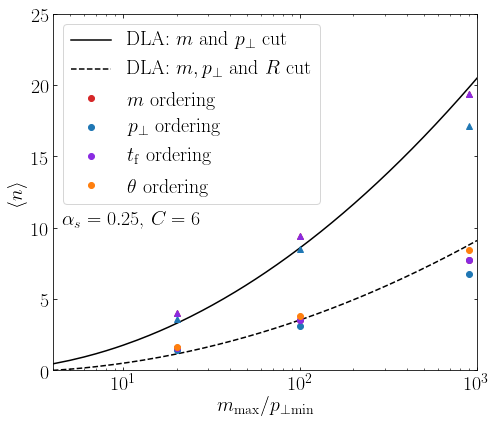

In [98]:
fig, ax = subplots()
figsize(7,6)

nav_pt_t_cut=array([[i, Nav_pt_t_cut(i**2,1.,0.25)] for i in linspace(2,1000, 1000)])
semilogx(nav_pt_t_cut.T[0], nav_pt_t_cut.T[1], 'k-', lw=1.5, markersize=3, label=r'DLA: $m$ and $p_{\perp}$ cut')

nav_pt_t_R_cut=array([[i, Nav_pt_t_R_cut(i**2,1.,1.,0.25)] for i in linspace(4,1000, 1000)])
semilogx(nav_pt_t_R_cut.T[0], nav_pt_t_R_cut.T[1], 'k--', lw=1.5, markersize=3, label=r'DLA: $m,p_{\perp}$ and $R$ cut')

plot(nav_m.T[0], nav_m.T[1], 'C3^', markersize=6)
plot(nav_pT.T[0], nav_pT.T[1], 'C0^', markersize=6)
plot(nav_m.T[0], nav_m.T[1], '^', markersize=6, color='blueviolet')

plot(nav_m_Rcut.T[0], nav_m_Rcut.T[1], 'C3o', markersize=6, label=r'$m$ ordering')
plot(nav_pT_Rcut.T[0], nav_pT_Rcut.T[1], 'C0o', markersize=6, label=r'$p_{\perp}$ ordering')
plot(nav_m_Rcut.T[0], nav_m_Rcut.T[1], 'o', markersize=6, color='blueviolet', label=r'$t_{\rm f}$ ordering')
plot(nav_theta.T[0], nav_theta.T[1], 'C1o', markersize=6, label=r'$\theta$ ordering')


xlim(4,1e3)
ylim(0.0,25)
text(4.5, 10, r'$\alpha_s=0.25$, $C=6$', fontsize=20)
xlabel(r'$m_{\max}/p_{\perp\min}$', fontsize=20)
ylabel(r'$\langle n\rangle$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=20,loc='upper left');
tight_layout()
savefig("Nav_shower_DLA.pdf", bbox_inches="tight")
show()

In [83]:
n2av_m       = array([[20.,sum(Nem_m_0**2)      /len(Nem_m_0)],      [100.,sum(Nem_m**2)      /len(Nem_m)]      ,[900.,sum(Nem_m_1**2)      /len(Nem_m_1)]])
n2av_pT      = array([[20.,sum(Nem_pT_0**2)     /len(Nem_pT_0)],     [100.,sum(Nem_pT**2)     /len(Nem_pT)]     ,[900.,sum(Nem_pT_1**2)     /len(Nem_pT_1)]])
n2av_tf      = array([[20.,sum(Nem_tf_0**2)     /len(Nem_tf_0)],     [100.,sum(Nem_tf**2)     /len(Nem_tf)]     ,[900.,sum(Nem_tf_1**2)     /len(Nem_tf_1)]])
n2av_theta   = array([[20.,sum(Nem_theta_0**2)  /len(Nem_theta_0)],  [100.,sum(Nem_theta**2)  /len(Nem_theta)]  ,[900.,sum(Nem_theta_1**2)  /len(Nem_theta_1)]])
n2av_m_Rcut  = array([[20.,sum(Nem_m_Rcut_0**2) /len(Nem_m_Rcut_0)], [100.,sum(Nem_m_Rcut**2) /len(Nem_m_Rcut)] ,[900.,sum(Nem_m_Rcut_1**2) /len(Nem_m_Rcut_1)]])
n2av_pT_Rcut = array([[20.,sum(Nem_pT_Rcut_0**2)/len(Nem_pT_Rcut_0)],[100.,sum(Nem_pT_Rcut**2)/len(Nem_pT_Rcut)],[900.,sum(Nem_pT_Rcut_1**2)/len(Nem_pT_Rcut_1)]])
n2av_tf_Rcut = array([[20.,sum(Nem_tf_Rcut_0**2)/len(Nem_tf_Rcut_0)],[100.,sum(Nem_tf_Rcut**2)/len(Nem_tf_Rcut)],[900.,sum(Nem_tf_Rcut_1**2)/len(Nem_tf_Rcut_1)]])

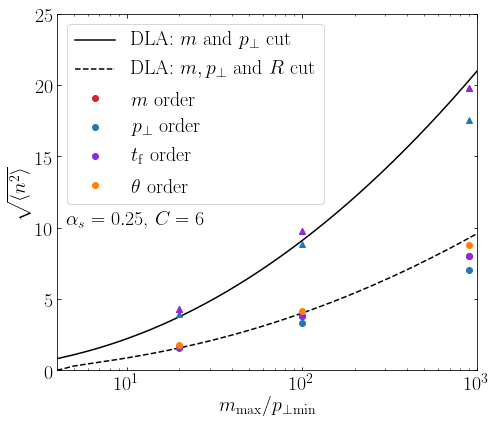

In [97]:
fig, ax = subplots()
figsize(7,6)

n2av_pt_t_cut=array([[i, sqrt(N2av_pt_t_cut(i**2,1.,0.25))] for i in linspace(2,1000, 1000)])
semilogx(n2av_pt_t_cut.T[0], n2av_pt_t_cut.T[1], 'k-', lw=1.5, markersize=6, label=r'DLA: $m$ and $p_{\perp}$ cut')

n2av_pt_t_R_cut=array([[i, sqrt(N2av_pt_t_R_cut(i**2,1.,1.,0.25))] for i in linspace(4,1000, 1000)])
semilogx(n2av_pt_t_R_cut.T[0], n2av_pt_t_R_cut.T[1], 'k--', lw=1.5, markersize=6, label=r'DLA: $m,p_{\perp}$ and $R$ cut')

plot(nav_m.T[0], sqrt(n2av_m.T[1]), 'C3^', markersize=6)
plot(nav_pT.T[0], sqrt(n2av_pT.T[1]), 'C0^', markersize=6)
plot(nav_m.T[0], sqrt(n2av_m.T[1]), '^', markersize=6, color='blueviolet')

plot(nav_m_Rcut.T[0], sqrt(n2av_m_Rcut.T[1]), 'C3o', markersize=6, label=r'$m$ order')
plot(nav_pT_Rcut.T[0], sqrt(n2av_pT_Rcut.T[1]), 'C0o', markersize=6, label=r'$p_{\perp}$ order')
plot(nav_m_Rcut.T[0], sqrt(n2av_m_Rcut.T[1]), 'o', markersize=6, color='blueviolet', label=r'$t_{\rm f}$ order')
plot(nav_theta.T[0], sqrt(n2av_theta.T[1]), 'C1o', markersize=6, label=r'$\theta$ order')


xlim(4,1e3)
ylim(0.0,25)
text(4.5, 10, r'$\alpha_s=0.25$, $C=6$', fontsize=20)
xlabel(r'$m_{\max}/p_{\perp\min}$', fontsize=20)
ylabel(r'$\sqrt{\langle n^2\rangle}$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=20,loc='upper left');
tight_layout()
savefig("N2av_shower_DLA.pdf", bbox_inches="tight")
show()

## Mass

In [179]:
mass_m  = shower(N, 'm',  'mass', t_max, pT2_min, R)
mass_pT = shower(N, 'pT', 'mass', t_max, pT2_min, R)
mass_tf = shower(N, 'tf', 'mass', t_max, pT2_min, R)
mass_theta   = shower(N, 'theta',   'mass', t_max, pT2_min, R)
mass_m_Rcut  = shower(N, 'm_Rcut',  'mass', t_max, pT2_min, R)
mass_pT_Rcut = shower(N, 'pT_Rcut', 'mass', t_max, pT2_min, R)
mass_tf_Rcut = shower(N, 'tf_Rcut', 'mass', t_max, pT2_min, R)
mass_m_Rord  = shower(N, 'm_Rord',  'mass', t_max, pT2_min, R)
mass_pT_Rord = shower(N, 'pT_Rord', 'mass', t_max, pT2_min, R)
mass_tf_Rord = shower(N, 'tf_Rord', 'mass', t_max, pT2_min, R)

0
5000
0
5000
0
5000
0
5000
0
5000
0
5000
0
5000
0
5000
0
5000
0
5000


In [170]:
def f(t, t_max, pT2_min):
    int_temp = 1./t * integrate.quad(lambda z: alpha_s(z*(1.-z)*t)/2./pi*P_gg(z), 0.5*(1.-sqrt(1.-4.*pT2_min/t)), 0.5*(1.+sqrt(1.-4.*pT2_min/t)))[0]
    return int_temp
def S(t, t_max, pT2_min):
    return exp(- integrate.quad(lambda tx: f(tx, t_max, pT2_min), t, t_max)[0])
t=logspace(log10(4.*pT2_min), log10(t_max), 50)
dPperdt_m=array([[i, f(i,t_max,pT2_min)*S(i,t_max,pT2_min)] for i in t])

def f(pT2ev, t_max):
    int_temp = 1./pT2ev * alpha_s(pT2ev)/2./pi * integrate.quad(lambda z: P_gg(z), 0.5*(1.-sqrt(1.-4.*pT2ev/t_max)), 0.5*(1.+sqrt(1.-4.*pT2ev/t_max)))[0]
    return int_temp
def S(pT2, t_max):
    return exp(- integrate.quad(lambda tx: f(tx, t_max), pT2, t_max/4.)[0])
pT=logspace(log10(pT2_min), log10(t_max/4.), 50)
dPperdt_pT=array([[i, f(i,t_max)*S(i,t_max)] for i in pT])

def f(lf, E, pT2_min):
    int_temp = 1./lf * integrate.quad(lambda z: alpha_s(2.*E*z*(1.-z)*lf)/2./pi * P_gg(z), 0.5*(1.-sqrt(1.-2.*pT2_min/E/lf)), 0.5*(1.+sqrt(1.-2.*pT2_min/E/lf)))[0]
    return int_temp
def S(lf, E, t_max, pT2_min):
    return exp(- integrate.quad(lambda lx: f(lx, E, pT2_min), lf, t_max/2./E)[0])
lf=logspace(log10(2.*pT2_min/sqrt(t_max)), log10(t_max/2./sqrt(t_max)), 50)
dPperdt_tf=array([[i, f(i,sqrt(t_max),pT2_min)*S(i,sqrt(t_max),t_max,pT2_min)] for i in lf])

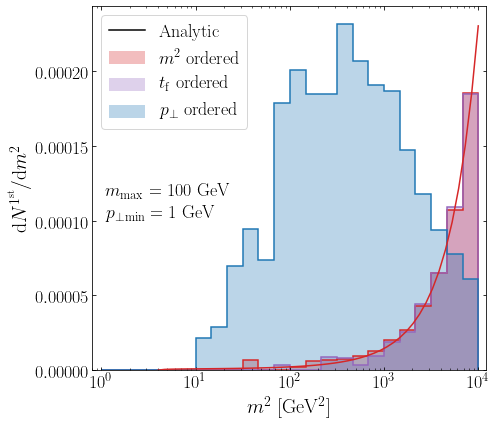

In [248]:
fig, ax = subplots()
figsize(7,6)

xbin=linspace((2.*pT2_min),(t_max),30)

xbin=logspace(log10(1.),log10(100**2),25)
h = ax.hist(mass_m, bins=xbin, density=True, histtype='stepfilled', alpha=0.3, lw=2, color='C3', label=r'$m^2$ ordered')
h = ax.hist(mass_tf, bins=xbin, density=True, histtype='stepfilled', alpha=0.3, lw=2, color='C4', label=r'$t_{\rm f}$ ordered')
h = ax.hist(mass_pT, bins=xbin, density=True, histtype='stepfilled', alpha=0.3, lw=2, color='C0', label=r'$p_{\perp}$ ordered')
h = ax.hist(mass_m, bins=xbin, density=True, histtype='step', lw=1.5, color='C3')
h = ax.hist(mass_tf, bins=xbin, density=True, histtype='step', lw=1.5, color='C4')
h = ax.hist(mass_pT, bins=xbin, density=True, histtype='step', lw=1.5, color='C0')
plot([0],[0], 'k-', label=r'Analytic')
plot(dPperdt_m.T[0], dPperdt_m.T[1], 'C3-')
ax.set_xscale('log')

xlim(0.8,1.2*100**2)
#ylim(0,0.035)
xlabel(r'$m^2$ [GeV$^2$]', fontsize=20)
ylabel(r'$\mathrm{d}N^{1^{\rm st}}/\mathrm{d}m^2$', fontsize=20)
#title(r'$m^2$ of the first emission', fontsize=20)
text(1.1e0, 1.15e-4, r'$m_{\rm max}=100$ GeV', fontsize=18)
text(1.1e0, 1.e-4, r'$p_{\perp\rm min}=1$ GeV', fontsize=18)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=18)
legend(fontsize=18,loc='upper left');
#savefig("mass_shower.pdf", bbox_inches="tight")
tight_layout()
show()

In [235]:
def f(t, t_max, pT2_min, R):
    if (t < sqrt(pT2_min*t_max)*R): return 1./t * integrate.quad(lambda z: alpha_s(z*(1.-z)*t)/2./pi*P_gg(z), 0.5*(1.-sqrt(1.-4.*pT2_min/t)), 0.5*(1.+sqrt(1.-4.*pT2_min/t)))[0]
    else:                           return 1./t * integrate.quad(lambda z: alpha_s(z*(1.-z)*t)/2./pi*P_gg(z), 0.5*(1.-sqrt(1.-4.*t/(t_max*R*R))), 0.5*(1.+sqrt(1.-4.*t/(t_max*R*R))))[0]
def S(t, t_max, pT2_min, R):
    if (t < sqrt(pT2_min*t_max)*R): return exp(- integrate.quad(lambda tx: f(tx, t_max, pT2_min, R), t, sqrt(pT2_min*t_max)*R)[0] - integrate.quad(lambda tx: f(tx, t_max, pT2_min, R), sqrt(pT2_min*t_max)*R, t_max*R*R/4.)[0])
    else:                           return exp(- integrate.quad(lambda tx: f(tx, t_max, pT2_min, R), t, t_max*R*R/4.)[0])

t=logspace(log10(4.*pT2_min), log10(t_max*R*R/4.), 50)
dPperdt_m_Rcut=array([[i, f(i, t_max, pT2_min, R)*S(i, t_max, pT2_min, R)] for i in t])

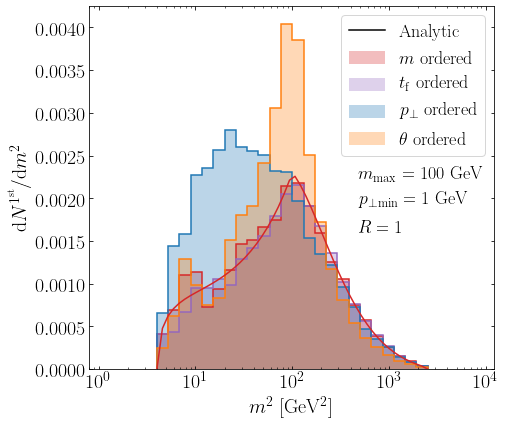

In [247]:
fig, ax = subplots()
figsize(7,6)

xbin=logspace(log10(4.*pT2_min),log10(t_max/4.),25)
h = ax.hist(mass_m_Rcut,  bins=xbin, density=True, histtype='stepfilled', alpha=0.3, lw=2, color='C3', label=r'$m$ ordered')
h = ax.hist(mass_tf_Rcut, bins=xbin, density=True, histtype='stepfilled', alpha=0.3, lw=2, color='C4', label=r'$t_{\rm f}$ ordered')
h = ax.hist(mass_pT_Rcut, bins=xbin, density=True, histtype='stepfilled', alpha=0.3, lw=2, color='C0', label=r'$p_{\perp}$ ordered')
h = ax.hist(mass_theta,   bins=xbin, density=True, histtype='stepfilled', alpha=0.3, lw=2, color='C1', label=r'$\theta$ ordered')
h = ax.hist(mass_m_Rcut,  bins=xbin, density=True, histtype='step', lw=1.5, color='C3')
h = ax.hist(mass_tf_Rcut, bins=xbin, density=True, histtype='step', lw=1.5, color='C4')
h = ax.hist(mass_pT_Rcut, bins=xbin, density=True, histtype='step', lw=1.5, color='C0')
h = ax.hist(mass_theta,   bins=xbin, density=True, histtype='step', lw=1.5, color='C1')
plot([0],[0], 'k-', lw=1.5, label=r'Analytic')
plot(dPperdt_m_Rcut.T[0], dPperdt_m_Rcut.T[1], 'C3-', lw=1.5)
ax.set_xscale('log')

xlim(0.8,1.2*100**2)
#ylim(0,0.4)
xlabel(r'$m^2$ [GeV$^2$]', fontsize=20)
ylabel(r'$\mathrm{d}N^{1^{\rm st}}/\mathrm{d}m^2$', fontsize=20)
text(4.8e2, 2.2e-3, r'$m_{\rm max}=100$ GeV', fontsize=18)
text(4.8e2, 1.9e-3, r'$p_{\perp\rm min}=1$ GeV', fontsize=18)
text(4.8e2, 1.6e-3, r'$R=1$', fontsize=18)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18,loc='upper right');
#savefig("mass_Rcut_shower.pdf", bbox_inches="tight")
tight_layout()
show()

## Shower length

In [6]:
time_m       = shower(N, 'm',       't_f', t_max, pT2_min, R)
time_pT      = shower(N, 'pT',      't_f', t_max, pT2_min, R)
time_tf      = shower(N, 'tf',      't_f', t_max, pT2_min, R)
time_theta   = shower(N, 'theta',   't_f', t_max, pT2_min, R)
time_m_Rcut  = shower(N, 'm_Rcut',  't_f', t_max, pT2_min, R)
time_pT_Rcut = shower(N, 'pT_Rcut', 't_f', t_max, pT2_min, R)
time_tf_Rcut = shower(N, 'tf_Rcut', 't_f', t_max, pT2_min, R)
time_m_Rord  = shower(N, 'm_Rord',  't_f', t_max, pT2_min, R)
time_pT_Rord = shower(N, 'pT_Rord', 't_f', t_max, pT2_min, R)
time_tf_Rord = shower(N, 'tf_Rord', 't_f', t_max, pT2_min, R)

TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

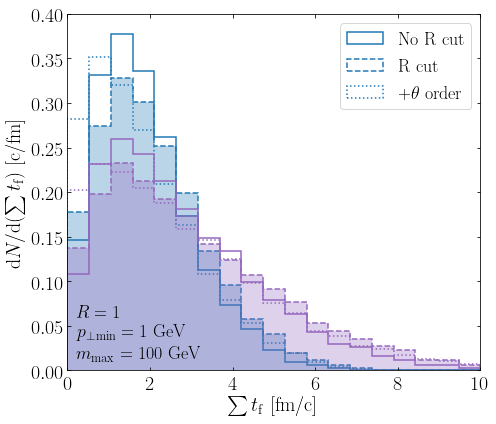

In [20]:
fig, ax = subplots()
figsize(7,6)

xbin=linspace(0, 10, 20)
h = ax.hist(0.197*time_pT, bins=xbin, density=True, histtype='step', lw=1.5, color='C0', label=r'No R cut')
h = ax.hist(0.197*time_pT_Rcut, bins=xbin, density=True, histtype='step', lw=1.5, linestyle='dashed', color='C0', label=r'R cut')
h = ax.hist(0.197*time_pT_Rcut, bins=xbin, density=True, histtype='stepfilled', alpha=0.3, lw=1.5, color='C0')
h = ax.hist(0.197*time_pT_Rord, bins=xbin, density=True, histtype='step', lw=1.5, linestyle='dotted', color='C0', label=r'$+\theta$ order')

h = ax.hist(0.197*time_tf, bins=xbin, density=True, histtype='step', lw=1.5, color='C4')
h = ax.hist(0.197*time_tf_Rcut, bins=xbin, density=True, histtype='step', lw=1.5, linestyle='dashed', color='C4')
h = ax.hist(0.197*time_tf_Rcut, bins=xbin, density=True, histtype='stepfilled', alpha=0.3, lw=1.5, color='C4')
h = ax.hist(0.197*time_tf_Rord, bins=xbin, density=True, histtype='step', lw=1.5, linestyle='dotted', color='C4')


xlim(0.,10)
ylim(0,0.4)
xlabel(r'$\sum t_{\rm f}$ [fm/c]', fontsize=20)
ylabel(r'$\mathrm{d}N/\mathrm{d}(\sum t_{\rm f})$ [c/fm]', fontsize=20)
text(0.2, 0.01, r'$m_{\rm max}=100$ GeV', fontsize=18)
text(0.2, 0.035, r'$p_{\perp\rm min}=1$ GeV', fontsize=18)
text(0.2, 0.06, r'$R=1$', fontsize=18)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18, ncol=1,loc='upper right');
#savefig("tf_cuts_shower.pdf", bbox_inches="tight")
tight_layout()
show()

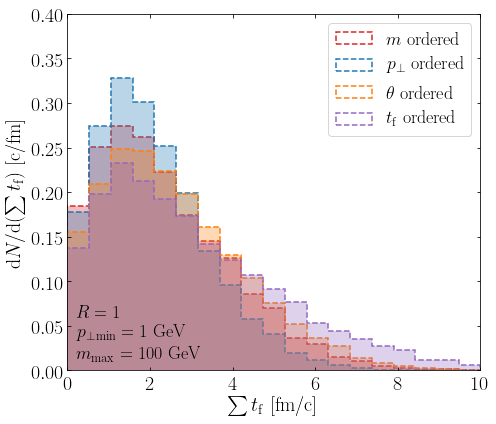

In [21]:
fig, ax = subplots()
figsize(7,6)

xbin=linspace(0, 10, 20)
h = ax.hist(0.197*time_m_Rcut, bins=xbin, density=True, histtype='step', lw=1.5, linestyle='dashed', color='C3', label=r'$m$ ordered')
h = ax.hist(0.197*time_m_Rcut, bins=xbin, density=True, histtype='stepfilled', alpha=0.3, lw=1.5, color='C3')

h = ax.hist(0.197*time_pT_Rcut, bins=xbin, density=True, histtype='step', lw=1.5, linestyle='dashed', color='C0', label=r'$p_{\perp}$ ordered')
h = ax.hist(0.197*time_pT_Rcut, bins=xbin, density=True, histtype='stepfilled', alpha=0.3, lw=1.5, color='C0')

h = ax.hist(0.197*time_theta, bins=xbin, density=True, histtype='step', lw=1.5, color='C1', linestyle='dashed', label=r'$\theta$ ordered')
h = ax.hist(0.197*time_theta, bins=xbin, density=True, histtype='stepfilled', alpha=0.3, lw=1.5, color='C1')

h = ax.hist(0.197*time_tf_Rcut, bins=xbin, density=True, histtype='step', lw=1.5, linestyle='dashed', color='C4', label=r'$t_{\rm f}$ ordered')
h = ax.hist(0.197*time_tf_Rcut, bins=xbin, density=True, histtype='stepfilled', alpha=0.3, lw=1.5, color='C4')

xlim(0.,10)
ylim(0,0.4)
xlabel(r'$\sum t_{\rm f}$ [fm/c]', fontsize=20)
ylabel(r'$\mathrm{d}N/\mathrm{d}(\sum t_{\rm f})$ [c/fm]', fontsize=20)
text(0.2, 0.01, r'$m_{\rm max}=100$ GeV', fontsize=18)
text(0.2, 0.035, r'$p_{\perp\rm min}=1$ GeV', fontsize=18)
text(0.2, 0.06, r'$R=1$', fontsize=18)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18, ncol=1,loc='upper right');
savefig("tf_Rcut_shower.pdf", bbox_inches="tight")
tight_layout()
show()

## Soft Drop

### No SD ($z_{\rm cut}=p_{\perp\min}/E,\beta=-1$)

In [4]:
tmax    = 100.**2
pT2_min = 1.
R       = 1.
m_list           = shower(N, 'm',           t_max, pT2_min, R, 'excl')
pT_list          = shower(N, 'pT',          t_max, pT2_min, R, 'excl')
tf_list          = shower(N, 'tf',          t_max, pT2_min, R, 'excl')
theta_list       = shower(N, 'theta',       t_max, pT2_min, R, 'excl')
m_Rcut_list      = shower(N, 'm_Rcut',      t_max, pT2_min, R, 'excl')
pT_Rcut_list     = shower(N, 'pT_Rcut',     t_max, pT2_min, R, 'excl')
tf_Rcut_list     = shower(N, 'tf_Rcut',     t_max, pT2_min, R, 'excl')
m_Rord_list      = shower(N, 'm_Rord',      t_max, pT2_min, R, 'excl')
pT_Rord_list     = shower(N, 'pT_Rord',     t_max, pT2_min, R, 'excl')
tf_Rord_list     = shower(N, 'tf_Rord',     t_max, pT2_min, R, 'excl')
theta_pTord_list = shower(N, 'theta_pTord', t_max, pT2_min, R, 'excl')

0
5000
0
5000
0
5000
0
5000
0
5000
0
5000
0
5000
0
5000
0
5000
0
5000
0
5000


In [61]:
def theta_DLA(tg, t_max, pT2_min, R, alphas=0.25):
    CA = 6.
    C  = alphas*CA/pi
    theta_min = 4.*sqrt(pT2_min/t_max)*R
    theta_s   = 2.*R
    theta_max = R*sqrt(t_max/pT2_min)
    if   (theta_s < tg <= theta_max):   
        return C/tg*integrate.quad(lambda z: 1./z, 0.5*(1-sqrt(1.-4.*sqrt(pT2_min/t_max)*R/tg)), 0.5*(1-sqrt(1.-4.*R*R/tg/tg)))[0] * exp(-C*integrate.quad(lambda t: 1./t * integrate.quad(lambda z: 1./z, 0.5*(1-sqrt(1.-4.*sqrt(pT2_min/t_max)*R/t)), 0.5*(1-sqrt(1.-4.*R*R/t/t)))[0], tg, theta_max)[0])
    elif (theta_min <= tg <= theta_s):   
        return C/tg*integrate.quad(lambda z: 1./z, 0.5*(1-sqrt(1.-4.*sqrt(pT2_min/t_max)*R/tg)), 0.5)[0] * exp(-C*(integrate.quad(lambda t: 1./t * integrate.quad(lambda z: 1./z, 0.5*(1-sqrt(1.-4.*sqrt(pT2_min/t_max)*R/t)), 0.5)[0], tg, theta_s)[0] + integrate.quad(lambda t: 1./t * integrate.quad(lambda z: 1./z, 0.5*(1-sqrt(1.-4.*sqrt(pT2_min/t_max)*R/t)), 0.5*(1-sqrt(1.-4.*R*R/t/t)))[0], theta_s, theta_max)[0]))

In [103]:
def theta_Rcut_DLA(tg, t_max, pT2_min, R, alphas=0.25):
    CA = 6.
    C  = alphas*CA/pi
    theta_min = 4.*sqrt(pT2_min/t_max)*R
    if (theta_min <= tg <= R): 
        return C/tg*log(1./(1-sqrt(1.-4.*sqrt(pT2_min/t_max)*R/tg)))*exp(-C*(integrate.quad(lambda t: 1./t * integrate.quad(lambda z: 1./z, 0.5*(1-sqrt(1.-4.*sqrt(pT2_min/t_max)*R/t)), 0.5)[0], tg, R)[0]))

In [91]:
theta_Rcut_DLA(0.04, t_max, pT2_min, R)

0.0

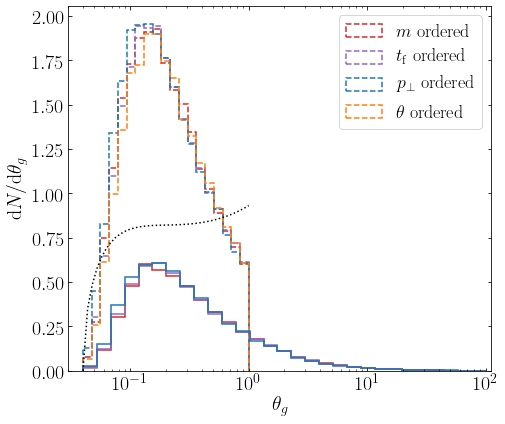

In [104]:
fig, ax = subplots()
figsize(7,6)

xbin=logspace(log10(4.*sqrt(pT2_min/t_max)), log10(R), 20)
h = ax.hist(m_Rcut_list.T[4] , bins=xbin, density=True, histtype='step', linestyle='dashed', lw=1.5, color='C3', label=r'$m$ ordered')
h = ax.hist(tf_Rcut_list.T[4], bins=xbin, density=True, histtype='step', linestyle='dashed', lw=1.5, color='C4', label=r'$t_{\rm f}$ ordered')
h = ax.hist(pT_Rcut_list.T[4], bins=xbin, density=True, histtype='step', linestyle='dashed', lw=1.5, color='C0', label=r'$p_{\perp}$ ordered')
h = ax.hist(theta_list.T[4]  , bins=xbin, density=True, histtype='step', linestyle='dashed', lw=1.5, color='C1', label=r'$\theta$ ordered')

#a=1./integrate.quad(lambda tg: theta_Rcut_DLA(tg, t_max, pT2_min, R), 4.*sqrt(pT2_min/t_max)*R, R)[0]
xbin=logspace(log10(4.*sqrt(pT2_min/t_max)), log10(R), 37)
theta = array([[i, theta_Rcut_DLA(i, t_max, pT2_min, R)] for i in xbin])
plot(theta.T[0], theta.T[1],'k:')

xbin=logspace(log10(4.*sqrt(pT2_min/t_max)), log10(R*sqrt(t_max/pT2_min)), 30)
h = ax.hist(m_list.T[4] , bins=xbin, density=True, histtype='step', lw=1.5, color='C3')
h = ax.hist(tf_list.T[4], bins=xbin, density=True, histtype='step', lw=1.5, color='C4')
h = ax.hist(pT_list.T[4], bins=xbin, density=True, histtype='step', lw=1.5, color='C0')

#a=1./integrate.quad(lambda tg: theta_DLA(tg, t_max, pT2_min, R), 4.*sqrt(pT2_min/t_max)*R, R*sqrt(t_max/pT2_min))[0]
#xbin=logspace(log10(4.*sqrt(pT2_min/t_max)), log10(R*sqrt(t_max/pT2_min)), 37)
#theta = array([[i, a*theta_DLA(i, t_max, pT2_min, R)] for i in xbin])
#plot(theta.T[0], theta.T[1],'k:')

ax.set_xscale('log')
xlim(0.03,1.1e2)
#ylim(0,2.5)
xlabel(r'$\theta_g$', fontsize=20)
ylabel(r'$\mathrm{d}N/\mathrm{d}\theta_g$', fontsize=20)
#text(1.4,0.9, r'$m_{\rm max}=100$ GeV', fontsize=18)
#text(1.4,0.71, r'$p_{\perp\rm min}=1$ GeV', fontsize=18)
#text(1.4,0.53, r'$R=1$', fontsize=18)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18, ncol=1,loc='upper right');
#savefig("N_thetag_shower.pdf", bbox_inches="tight")
tight_layout()
show()

### Groomed angle

In [7]:
tmax    = 100.**2
pT2_min = 1.
R       = 1.
m_list           = shower(N, 'm',           t_max, pT2_min, R)
pT_list          = shower(N, 'pT',          t_max, pT2_min, R)
tf_list          = shower(N, 'tf',          t_max, pT2_min, R)
theta_list       = shower(N, 'theta',       t_max, pT2_min, R)
m_Rcut_list      = shower(N, 'm_Rcut',      t_max, pT2_min, R)
pT_Rcut_list     = shower(N, 'pT_Rcut',     t_max, pT2_min, R)
tf_Rcut_list     = shower(N, 'tf_Rcut',     t_max, pT2_min, R)
m_Rord_list      = shower(N, 'm_Rord',      t_max, pT2_min, R)
pT_Rord_list     = shower(N, 'pT_Rord',     t_max, pT2_min, R)
tf_Rord_list     = shower(N, 'tf_Rord',     t_max, pT2_min, R)
theta_pTord_list = shower(N, 'theta_pTord', t_max, pT2_min, R)

0
5000
0
5000
0
5000
0
5000
0
5000
0
5000
0
5000
0
5000
0
5000
0
5000
0
5000


In [54]:
z_cut     = 0.1
beta      = 0.
theta_cut = 0.
SD_m           = SD(m_list          , z_cut, beta)
SD_pT          = SD(pT_list         , z_cut, beta)
SD_tf          = SD(tf_list         , z_cut, beta)
SD_theta       = SD(theta_list      , z_cut, beta)
SD_m_Rcut      = SD(m_Rcut_list     , z_cut, beta)
SD_pT_Rcut     = SD(pT_Rcut_list    , z_cut, beta)
SD_tf_Rcut     = SD(tf_Rcut_list    , z_cut, beta)
SD_m_Rord      = SD(m_Rord_list     , z_cut, beta)
SD_pT_Rord     = SD(pT_Rord_list    , z_cut, beta)
SD_tf_Rord     = SD(tf_Rord_list    , z_cut, beta)
SD_theta_pTord = SD(theta_pTord_list, z_cut, beta)

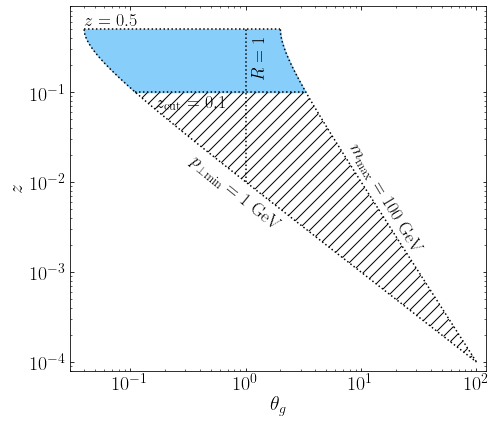

In [176]:
fig, ax = subplots()
figsize(7,6)
theta = logspace(log10(2.*R), log10(R*sqrt(t_max/pT2_min)), 500)
loglog(theta, 0.5*(1-sqrt(1.-4.*R**2/theta**2)), 'k:')
text(7,0.02, r'$m_{\max}=100$ GeV', rotation=-59, fontsize=18)
theta = logspace(log10(4.*sqrt(pT2_min/t_max)*R), log10(R*sqrt(t_max/pT2_min)), 500)
loglog(theta, 0.5*(1-sqrt(1.-4.*sqrt(pT2_min/t_max)*R/theta)), 'k:')
text(0.3,0.015, r'$p_{\perp\min}=1$ GeV', rotation=-39, fontsize=18)
plot([4.*sqrt(pT2_min/t_max)*R,2.*R],[0.5,0.5],'k:')
text(0.04,0.55, r'$z=0.5$', fontsize=18)
plot([sqrt(pT2_min/t_max)*R/(z_cut*(1.-z_cut)),R/sqrt(z_cut*(1.-z_cut))],[z_cut,z_cut],'k:')
text(1.5*sqrt(pT2_min/t_max)*R/(z_cut*(1.-z_cut)), 0.65*z_cut, r'$z_{\rm cut}=0.1$', fontsize=18)
plot([R,R],[0.5*(1-sqrt(1.-4.*sqrt(pT2_min/t_max))),0.5], 'k:')
text(1.1*R, 0.3, r'$R=1$', rotation=90, fontsize=18)
zv=logspace(log10(z_cut), log10(0.5), 50)
fill_betweenx(zv, sqrt(pT2_min/t_max)*R/(zv*(1.-zv)), R/sqrt(zv*(1.-zv)), color='lightskyblue')
#fill_betweenx(zv, sqrt(pT2_min/t_max)*R/(zv*(1.-zv)), R*zv/zv, color='cornflowerblue')
zv=logspace(-4, log10(z_cut), 50)
fill_betweenx(zv, sqrt(pT2_min/t_max)*R/(zv*(1.-zv)), R/sqrt(zv*(1.-zv)), facecolor="none", hatch="//", edgecolor="k", linewidth=0.0)

xlim(3e-2,1.2e2)
ylim(8e-5,0.9)
xlabel(r'$\theta_g$', fontsize=20)
ylabel(r'$z$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
savefig("Grooming_sketch.pdf", bbox_inches="tight")
tight_layout()
show()

In [240]:
def theta_g_DLA(tg, t_max, pT2_min, R, z_cut, alphas=0.25):
    CA = 6.
    C  = alphas*CA/pi
    theta_min = 4.*sqrt(pT2_min/t_max)*R
    theta_1   = R*sqrt(pT2_min/t_max)/(z_cut*(1.-z_cut))
    theta_s   = 2.*R
    theta_2   = R/sqrt(z_cut*(1.-z_cut))
    if   (theta_s < tg < theta_2):   
        return C/tg*log(0.5*(1-sqrt(1.-4.*R**2/tg**2))/z_cut)       *exp(-C*integrate.quad(lambda t: 1./t * integrate.quad(lambda z: 1./z, z_cut, 0.5*(1-sqrt(1.-4.*R*R/t*t)))[0], tg, theta_2)[0])
    elif (theta_1 < tg < theta_s):   
        return C/tg*log(1./2./z_cut)                                *exp(-C*(log(theta_s/tg)*log(1./2./z_cut)+integrate.quad(lambda t: 1./t * integrate.quad(lambda z: 1./z, z_cut, 0.5*(1-sqrt(1.-4.*R*R/t*t)))[0], theta_s, theta_2)[0]))
    elif (theta_min < tg < theta_1): 
        return C/tg*log(1./(1-sqrt(1.-4.*sqrt(pT2_min/t_max)*R/tg)))*exp(-C*(integrate.quad(lambda t: 1./t * integrate.quad(lambda z: 1./z, 0.5*(1-sqrt(1.-4.*sqrt(pT2_min/t_max)*R/t)), 0.5)[0], tg, theta_1)[0]+log(theta_s/theta_1)*log(1./2./z_cut)+integrate.quad(lambda t: 1./t * integrate.quad(lambda z: 1./z, z_cut, 0.5*(1-sqrt(1.-4.*R*R/t*t)))[0], theta_s, theta_2)[0]))

In [265]:
def theta_g_DLA_Rcut(tg, t_max, pT2_min, R, z_cut, alphas=0.25):
    CA = 6.
    C  = alphas*CA/pi
    theta_min = 4.*sqrt(pT2_min/t_max)*R
    theta_1   = R*sqrt(pT2_min/t_max)/(z_cut*(1.-z_cut))
    if (theta_1 < tg < R):   
        return C/tg*log(1./2./z_cut)*exp(-C*(log(R/tg)*log(1./2./z_cut)))
    elif (theta_min < tg < theta_1): 
        return C/tg*log(1./(1-sqrt(1.-4.*sqrt(pT2_min/t_max)*R/tg)))*exp(-C*(integrate.quad(lambda t: 1./t * integrate.quad(lambda z: 1./z, 0.5*(1-sqrt(1.-4.*sqrt(pT2_min/t_max)*R/t)), 0.5)[0], tg, theta_1)[0]+log(R/theta_1)*log(1./2./z_cut)))

/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()
/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]
/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


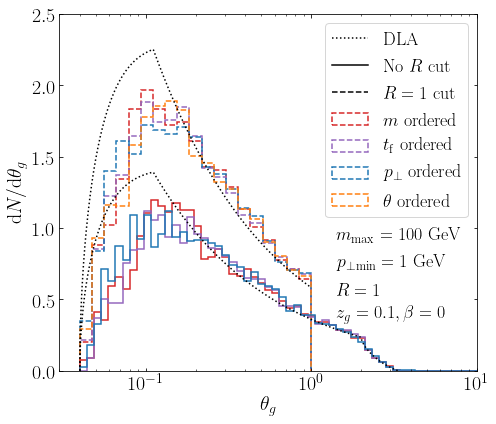

In [282]:
fig, ax = subplots()
figsize(7,6)

xbin=logspace(log10(4.*sqrt(pT2_min/t_max)), log10(R), 20)
h = ax.hist(SD_m_Rcut.T[4] , bins=xbin, density=True, histtype='step', linestyle='dashed', lw=1.5, color='C3', label=r'$m$ ordered')
h = ax.hist(SD_tf_Rcut.T[4], bins=xbin, density=True, histtype='step', linestyle='dashed', lw=1.5, color='C4', label=r'$t_{\rm f}$ ordered')
h = ax.hist(SD_pT_Rcut.T[4], bins=xbin, density=True, histtype='step', linestyle='dashed', lw=1.5, color='C0', label=r'$p_{\perp}$ ordered')
h = ax.hist(SD_theta.T[4]  , bins=xbin, density=True, histtype='step', linestyle='dashed', lw=1.5, color='C1', label=r'$\theta$ ordered')

a=1./integrate.quad(lambda tg: theta_g_DLA_Rcut(tg, t_max, pT2_min, R, z_cut), 4.*sqrt(pT2_min/t_max)*R, R)[0]
xbin=logspace(log10(4.*sqrt(pT2_min/t_max)*R),log10(R*0.999), 500)
thetag = array([[i, a*theta_g_DLA_Rcut(i, t_max, pT2_min, R, z_cut)] for i in xbin])
plot(thetag.T[0], thetag.T[1],'k:')

xbin=logspace(log10(4.*sqrt(pT2_min/t_max)), log10(sqrt(t_max/pT2_min)*R*R), 80)
h = ax.hist(SD_m.T[4] , bins=xbin, density=True, histtype='step', lw=1.5, color='C3')
h = ax.hist(SD_tf.T[4], bins=xbin, density=True, histtype='step', lw=1.5, color='C4')
h = ax.hist(SD_pT.T[4], bins=xbin, density=True, histtype='step', lw=1.5, color='C0')

a=1./integrate.quad(lambda tg: theta_g_DLA(tg, t_max, pT2_min, R, z_cut), 4.*sqrt(pT2_min/t_max)*R, R/sqrt(z_cut*(1.-z_cut)))[0]
xbin=logspace(log10(4.*sqrt(pT2_min/t_max)*R),log10(0.999*R/sqrt(z_cut*(1.-z_cut))), 500)
thetag = array([[i, a*theta_g_DLA(i, t_max, pT2_min, R, z_cut)] for i in xbin])
plot(thetag.T[0], thetag.T[1],'k:')

plot([0],[0],'k:',label=r'DLA')
plot([0],[0],'k-',label=r'No $R$ cut')
plot([0],[0],'k--',label=r'$R=1$ cut',zorder=0)

ax.set_xscale('log')
xlim(0.03,1e1)
ylim(0,2.5)
xlabel(r'$\theta_g$', fontsize=20)
ylabel(r'$\mathrm{d}N/\mathrm{d}\theta_g$', fontsize=20)
text(1.4,0.9, r'$m_{\rm max}=100$ GeV', fontsize=18)
text(1.4,0.71, r'$p_{\perp\rm min}=1$ GeV', fontsize=18)
text(1.4,0.53, r'$R=1$', fontsize=18)
text(1.4,0.35, r'$z_g=0.1, \beta=0$', fontsize=18)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18, ncol=1,loc='upper right');
savefig("N_thetag_shower.pdf", bbox_inches="tight")
tight_layout()
show()

### Groomed momentum

In [48]:
def Delta_g_DLA(tg, t_max, pT2_min, R, z_cut, alphas=0.25):
    CA = 3.
    C  = alphas*CA/pi
    theta_min = 4.*sqrt(pT2_min/t_max)*R
    theta_1   = R*sqrt(pT2_min/t_max)/(z_cut*(1.-z_cut))
    theta_s   = 2.*R
    theta_2   = R/sqrt(z_cut*(1.-z_cut))
    if   (theta_s < tg < theta_2):   
        return exp(-C*integrate.quad(lambda t: 1./t * integrate.quad(lambda z: 1./z, z_cut, 0.5*(1-sqrt(1.-4.*R*R/t*t)))[0], tg, theta_2)[0])
    elif (theta_1 < tg < theta_s):   
        return exp(-C*(log(theta_s/tg)*log(1./2./z_cut)+integrate.quad(lambda t: 1./t * integrate.quad(lambda z: 1./z, z_cut, 0.5*(1-sqrt(1.-4.*R*R/t*t)))[0], theta_s, theta_2)[0]))
    elif (theta_min < tg < theta_1): 
        return exp(-C*(integrate.quad(lambda t: 1./t * integrate.quad(lambda z: 1./z, 0.5*(1-sqrt(1.-4.*sqrt(pT2_min/t_max)*R/t)), 0.5)[0], tg, theta_1)[0]+log(theta_s/theta_1)*log(1./2./z_cut)+integrate.quad(lambda t: 1./t * integrate.quad(lambda z: 1./z, z_cut, 0.5*(1-sqrt(1.-4.*R*R/t*t)))[0], theta_s, theta_2)[0]))
def zg_DLA(zg, t_max, pT2_min, R, z_cut, alphas=0.25):
    CA        = 3.
    C         = alphas*CA/pi
    theta_min = 4.*sqrt(pT2_min/t_max)*R
    theta_2 = R/sqrt(z_cut*(1.-z_cut))
    return integrate.quad(lambda tg: C/tg/zg * Delta_g_DLA(tg, t_max, pT2_min, R, z_cut, alphas), theta_min, theta_2)[0]

def Delta_g_DLA_Rcut(tg, t_max, pT2_min, R, z_cut, alphas=0.25):
    CA        = 3.
    C         = alphas*CA/pi
    theta_min = 4.*sqrt(pT2_min/t_max)*R
    theta_1   = R*sqrt(pT2_min/t_max)/(z_cut*(1.-z_cut))
    if (theta_1 < tg < R):   
        return exp(-C*(log(R/tg)*log(1./2./z_cut)))
    elif (theta_min < tg < theta_1): 
        return exp(-C*(integrate.quad(lambda t: 1./t * integrate.quad(lambda z: 1./z, 0.5*(1-sqrt(1.-4.*sqrt(pT2_min/t_max)*R/t)), 0.5)[0], tg, theta_1)[0]+log(R/theta_1)*log(1./2./z_cut)))
def zg_DLA_Rcut(zg, t_max, pT2_min, R, z_cut, alphas=0.25):
    CA        = 3.
    C         = alphas*CA/pi
    theta_min = 4.*sqrt(pT2_min/t_max)*R
    return integrate.quad(lambda tg: C/tg/zg*Delta_g_DLA_Rcut(tg, t_max, pT2_min, R, z_cut, alphas), theta_min, R)[0]

In [75]:
a       = 1./integrate.quad(lambda z: zg_DLA(z, t_max, pT2_min, R, z_cut), z_cut, 0.5)[0]
zg      = array([[i, a*zg_DLA(i, t_max, pT2_min, R, z_cut)] for i in linspace(z_cut,0.5, 50)])
a_Rcut  = 1./integrate.quad(lambda z: zg_DLA_Rcut(z, t_max, pT2_min, R, z_cut), z_cut, 0.5)[0]
zg_Rcut = array([[i, a_Rcut*zg_DLA_Rcut(i, t_max, pT2_min, R, z_cut)] for i in linspace(z_cut,0.5, 50)])
a       = 1./integrate.quad(lambda z: P_gg(z), z_cut, 0.5)[0]
z_UV    = array([[i, a*P_gg(i)] for i in linspace(z_cut,0.5,50)])

/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()
/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]
/Users/ata053/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


In [5]:
z_cut     = 0.1
beta      = 0.
theta_cut = 0.
SD_m           = SD(m_list          , z_cut, beta)
SD_pT          = SD(pT_list         , z_cut, beta)
SD_tf          = SD(tf_list         , z_cut, beta)
SD_theta       = SD(theta_list      , z_cut, beta)
SD_m_Rcut      = SD(m_Rcut_list     , z_cut, beta)
SD_pT_Rcut     = SD(pT_Rcut_list    , z_cut, beta)
SD_tf_Rcut     = SD(tf_Rcut_list    , z_cut, beta)
SD_m_Rord      = SD(m_Rord_list     , z_cut, beta)
SD_pT_Rord     = SD(pT_Rord_list    , z_cut, beta)
SD_tf_Rord     = SD(tf_Rord_list    , z_cut, beta)
SD_theta_pTord = SD(theta_pTord_list, z_cut, beta)

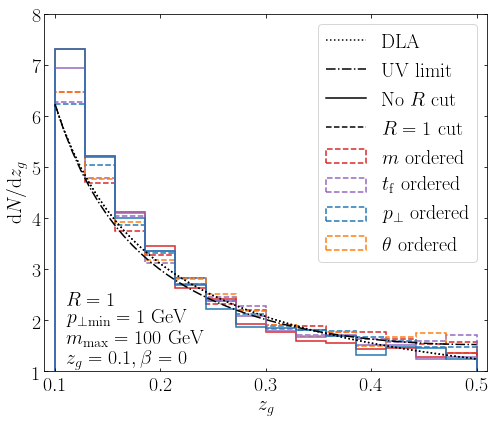

In [81]:
fig, ax = subplots()
figsize(7,6)

xbin=linspace(z_cut, 0.5,15)
h = ax.hist(1.-SD_m_Rcut.T[1] , bins=xbin, weights=ones(len(SD_m_Rcut))/len(SD_m_Rcut)/(0.5-z_cut)*15.  , histtype='step', linestyle='dashed', lw=1.5, color='C3', label=r'$m$ ordered')
h = ax.hist(1.-SD_tf_Rcut.T[1], bins=xbin, weights=ones(len(SD_tf_Rcut))/len(SD_tf_Rcut)/(0.5-z_cut)*15., histtype='step', linestyle='dashed', lw=1.5, color='C4', label=r'$t_{\rm f}$ ordered')
h = ax.hist(1.-SD_pT_Rcut.T[1], bins=xbin, weights=ones(len(SD_pT_Rcut))/len(SD_pT_Rcut)/(0.5-z_cut)*15., histtype='step', linestyle='dashed', lw=1.5, color='C0', label=r'$p_{\perp}$ ordered')
h = ax.hist(1.-SD_theta.T[1]  , bins=xbin, weights=ones(len(SD_theta))/len(SD_theta)/(0.5-z_cut)*15.    , histtype='step', linestyle='dashed', lw=1.5, color='C1', label=r'$\theta$ ordered')

h = ax.hist(1.-SD_m.T[1] , bins=xbin, weights=ones(len(SD_m))/len(SD_m)/(0.5-z_cut)*15.  , histtype='step', lw=1.5, color='C3')
h = ax.hist(1.-SD_tf.T[1], bins=xbin, weights=ones(len(SD_tf))/len(SD_tf)/(0.5-z_cut)*15., histtype='step', lw=1.5, color='C4')
h = ax.hist(1.-SD_pT.T[1], bins=xbin, weights=ones(len(SD_pT))/len(SD_pT)/(0.5-z_cut)*15., histtype='step', lw=1.5, color='C0')


plot(zg.T[0], zg.T[1],'k:')
plot(zg_Rcut.T[0], zg_Rcut.T[1],'k:', label=r'DLA')
plot(z_UV.T[0], z_UV.T[1], 'k-.',lw=1.5, label=r'UV limit')

plot([0],[0],'k-', label=r'No $R$ cut')
plot([0],[0],'k--', label=r'$R=1$ cut')
#ax.set_xscale('log')

xlim(0.09,0.51)
ylim(1,8)
xlabel(r'$z_g$', fontsize=20)
ylabel(r'$\mathrm{d}N/\mathrm{d}z_g$', fontsize=20)
text(0.11, 1.5, r'$m_{\max}=100$ GeV', fontsize=20)
text(0.11, 1.9, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
text(0.11, 2.3, r'$R=1$', fontsize=20)
text(0.11, 1.1, r'$z_g=0.1,\beta=0$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=20, ncol=1,loc='upper right');
savefig("N_zg_shower.pdf", bbox_inches="tight")
tight_layout()
show()

In [77]:
t_max    = 100.**2
pT2_min = 1.
R       = 1.
m_Rcut_list_20  = shower(N, 'm_Rcut', 20.**2,   pT2_min, R)
m_Rcut_list_50  = shower(N, 'm_Rcut', 50.**2,   pT2_min, R)
m_Rcut_list     = shower(N, 'm_Rcut', 100.**2,  pT2_min, R)
m_Rcut_list_1e  = shower(N, 'm_Rcut', 1000.**2, pT2_min, R)

z_cut     = 0.1
beta      = 0.
theta_cut = 0.
SD_m_Rcut_20 = SD(m_Rcut_list_20  , z_cut, beta)
SD_m_Rcut_50 = SD(m_Rcut_list_50  , z_cut, beta)
SD_m_Rcut    = SD(m_Rcut_list     , z_cut, beta)
SD_m_Rcut_1e = SD(m_Rcut_list_1e  , z_cut, beta)

0
5000
0
5000
0
5000
0
5000


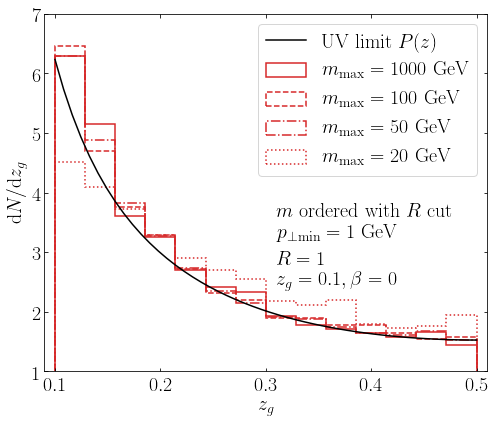

In [80]:
fig, ax = subplots()
figsize(7,6)

xbin=linspace(z_cut, 0.5,15)
h = ax.hist(1.-SD_m_Rcut_1e.T[1] , bins=xbin, density=False, weights=ones(len(SD_m_Rcut_1e))/len(SD_m_Rcut_1e)/(0.5-z_cut)*15.  , histtype='step', linestyle='-', lw=1.5, color='C3', label=r'$m_{\max}=1000$ GeV')
h = ax.hist(1.-SD_m_Rcut.T[1]    , bins=xbin, density=False, weights=ones(len(SD_m_Rcut))/len(SD_m_Rcut)/(0.5-z_cut)*15.  , histtype='step', linestyle='--', lw=1.5, color='C3', label=r'$m_{\max}=100$ GeV')
h = ax.hist(1.-SD_m_Rcut_50.T[1] , bins=xbin, density=False, weights=ones(len(SD_m_Rcut_50))/len(SD_m_Rcut_50)/(0.5-z_cut)*15.  , histtype='step', linestyle='-.', lw=1.5, color='C3', label=r'$m_{\max}=50$ GeV')
h = ax.hist(1.-SD_m_Rcut_20.T[1] , bins=xbin, density=False, weights=ones(len(SD_m_Rcut_20))/len(SD_m_Rcut_20)/(0.5-z_cut)*15.  , histtype='step', linestyle=':', lw=1.5, color='C3', label=r'$m_{\max}=20$ GeV')

a=1./integrate.quad(lambda z: P_gg(z), z_cut, 0.5)[0]
xbin=linspace(z_cut, 0.5,50)
plot(xbin, a*P_gg(xbin), 'k',lw=1.5, label=r'UV limit $P(z)$')

#ax.set_xscale('log')

xlim(0.09,0.51)
ylim(1,7)
xlabel(r'$z_g$', fontsize=20)
ylabel(r'$\mathrm{d}N/\mathrm{d}z_g$', fontsize=20)
text(0.31, 3.6, r'$m$ ordered with $R$ cut', fontsize=20)
text(0.31, 3.2, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
text(0.31, 2.8, r'$R=1$', fontsize=20)
text(0.31, 2.4, r'$z_g=0.1,\beta=0$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=20, ncol=1,loc='upper right');
savefig("N_zg_shower_UV.pdf", bbox_inches="tight")
tight_layout()
show()

### $n_{\rm SD}$

In [75]:
def NSD0_DLA(n, t_max, pT2_min, R, z_cut, beta, alphas=0.28):
    CA        = 6.
    C         = 2.*alphas*CA/pi
    theta_min = 4.*sqrt(pT2_min/t_max)*R
    theta_1   = sqrt(pT2_min/t_max)*R/z_cut/(1.-z_cut)
    theta_s   = 2.*R
    theta_2   = R/z_cut/(1.-z_cut)
    A  = C * (integrate.quad(lambda theta: 1./theta * log(0.5/(0.5*(1.-sqrt(1.-4.*sqrt(pT2_min/t_max)*R/theta)))), theta_min, theta_1)[0] + integrate.quad(lambda theta: 1./theta * log(0.5/z_cut), theta_1, theta_s)[0] + integrate.quad(lambda theta: 1./theta * log((0.5*(1.-sqrt(1.-4.*R*R/theta/theta)))/z_cut), theta_s, theta_2)[0])
    return exp(-A) * pow(A, n) / math.factorial(n)

def NSD0_Rcut_DLA(n, t_max, pT2_min, R, z_cut, beta, alphas=0.28):
    CA        = 6.
    C         = 2.*alphas*CA/pi
    theta_min = 4.*sqrt(pT2_min/t_max)*R
    theta_1   = sqrt(pT2_min/t_max)*R/z_cut/(1.-z_cut)
    A  = C * (integrate.quad(lambda theta: 1./theta * log(0.5/(0.5*(1.-sqrt(1.-4.*sqrt(pT2_min/t_max)*R/theta)))), theta_min, theta_1)[0] + integrate.quad(lambda theta: 1./theta * log(0.5/z_cut), theta_1, R)[0])
    return exp(-A) * pow(A, n) / math.factorial(n)

In [9]:
z_cut     = 0.1
beta      = 0.
theta_cut = 0.
NSD_m_0           = N_SD(m_list          , z_cut, beta, theta_cut)
NSD_pT_0          = N_SD(pT_list         , z_cut, beta, theta_cut)
NSD_tf_0          = N_SD(tf_list         , z_cut, beta, theta_cut)
NSD_theta_0       = N_SD(theta_list      , z_cut, beta, theta_cut)
NSD_m_Rcut_0      = N_SD(m_Rcut_list     , z_cut, beta, theta_cut)
NSD_pT_Rcut_0     = N_SD(pT_Rcut_list    , z_cut, beta, theta_cut)
NSD_tf_Rcut_0     = N_SD(tf_Rcut_list    , z_cut, beta, theta_cut)
NSD_m_Rord_0      = N_SD(m_Rord_list     , z_cut, beta, theta_cut)
NSD_pT_Rord_0     = N_SD(pT_Rord_list    , z_cut, beta, theta_cut)
NSD_tf_Rord_0     = N_SD(tf_Rord_list    , z_cut, beta, theta_cut)
NSD_theta_pTord_0 = N_SD(theta_pTord_list, z_cut, beta, theta_cut)

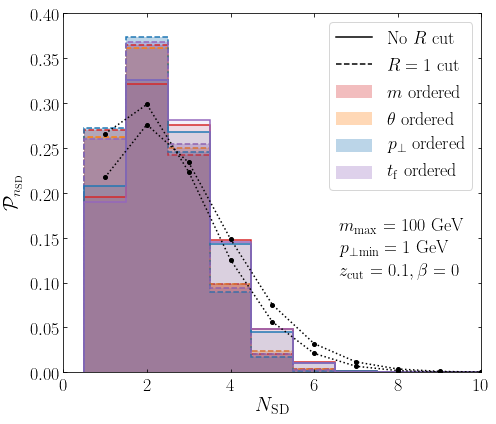

In [76]:
fig, ax = subplots()
figsize(7,6)

xbin=linspace(0.5,10.5,11)
h = ax.hist(NSD_m_Rcut_0.T[0],  bins=xbin, weights=NSD_m_Rcut_0.T[1] /len(NSD_m_Rcut_0),  histtype='stepfilled', alpha=0.3, lw=2, color='C3', label=r'$m$ ordered')
h = ax.hist(NSD_theta_0.T[0],   bins=xbin, weights=NSD_theta_0.T[1]  /len(NSD_theta_0),   histtype='stepfilled', alpha=0.3, lw=2, color='C1', label=r'$\theta$ ordered')
h = ax.hist(NSD_pT_Rcut_0.T[0], bins=xbin, weights=NSD_pT_Rcut_0.T[1]/len(NSD_pT_Rcut_0), histtype='stepfilled', alpha=0.3, lw=2, color='C0', label=r'$p_{\perp}$ ordered')
h = ax.hist(NSD_tf_Rcut_0.T[0], bins=xbin, weights=NSD_tf_Rcut_0.T[1]/len(NSD_tf_Rcut_0), histtype='stepfilled', alpha=0.3, lw=2, color='C4', label=r'$t_{\rm f}$ ordered')
h = ax.hist(NSD_m_Rcut_0.T[0],  bins=xbin, weights=NSD_m_Rcut_0.T[1] /len(NSD_m_Rcut_0),  histtype='step', linestyle='dashed', lw=1.5, color='C3')
h = ax.hist(NSD_theta_0.T[0],   bins=xbin, weights=NSD_theta_0.T[1]  /len(NSD_theta_0),   histtype='step', linestyle='dashed', lw=1.5, color='C1')
h = ax.hist(NSD_pT_Rcut_0.T[0], bins=xbin, weights=NSD_pT_Rcut_0.T[1]/len(NSD_pT_Rcut_0), histtype='step', linestyle='dashed', lw=1.5, color='C0')
h = ax.hist(NSD_tf_Rcut_0.T[0], bins=xbin, weights=NSD_tf_Rcut_0.T[1]/len(NSD_tf_Rcut_0), histtype='step', linestyle='dashed', lw=1.5, color='C4')

h = ax.hist(NSD_m_0.T[0],  bins=xbin, weights=NSD_m_0.T[1] /len(NSD_m_0),  histtype='stepfilled', alpha=0.1, lw=2, color='C3')
h = ax.hist(NSD_pT_0.T[0], bins=xbin, weights=NSD_pT_0.T[1]/len(NSD_pT_0), histtype='stepfilled', alpha=0.1, lw=2, color='C0')
h = ax.hist(NSD_tf_0.T[0], bins=xbin, weights=NSD_tf_0.T[1]/len(NSD_tf_0), histtype='stepfilled', alpha=0.1, lw=2, color='C4')
h = ax.hist(NSD_m_0.T[0],  bins=xbin, weights=NSD_m_0.T[1] /len(NSD_m_0),  histtype='step', lw=1.5, color='C3')
h = ax.hist(NSD_pT_0.T[0], bins=xbin, weights=NSD_pT_0.T[1]/len(NSD_pT_0), histtype='step', lw=1.5, color='C0')
h = ax.hist(NSD_tf_0.T[0], bins=xbin, weights=NSD_tf_0.T[1]/len(NSD_tf_0), histtype='step', lw=1.5, color='C4')

multi_SD=array([[i, NSD0_DLA(i, t_max, pT2_min, R, z_cut, beta, 0.15)/(1.-NSD0_DLA(0, t_max, pT2_min, R, z_cut, beta, 0.15))] for i in range(1,11)])
plot(multi_SD.T[0], multi_SD.T[1], 'ko:', lw=1.5, markersize=4)
multi_SD=array([[i, NSD0_Rcut_DLA(i, t_max, pT2_min, R, z_cut, beta, alphas=0.13)/(1.-NSD0_Rcut_DLA(0, t_max, pT2_min, R, z_cut, beta, 0.13))] for i in range(1,11)])
plot(multi_SD.T[0], multi_SD.T[1], 'ko:', lw=1.5, markersize=4)

plot([0],[0],'k-',label=r'No $R$ cut')
plot([0],[0],'k--',label=r'$R=1$ cut',zorder=0)
text(6.6, 0.155, r'$m_{\rm max}=100$ GeV', fontsize=18)
text(6.6, 0.13, r'$p_{\perp\rm min}=1$ GeV', fontsize=18)
text(6.6, 0.105, r'$z_{\rm cut}=0.1, \beta=0$', fontsize=18)
xlim(0.,10)
ylim(0,0.4)
xlabel(r'$N_{\rm SD}$', fontsize=20)
ylabel(r'$\mathcal{P}_{n_{\rm SD}}$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=18)
legend(fontsize=18,loc='upper right');
savefig("N_SD_shower_0.pdf", bbox_inches="tight")
tight_layout()
show()

In [332]:
z_cut     = 0.1
beta      = 1.
theta_cut = 0.
NSD_m_1           = N_SD(m_list          , z_cut, beta, theta_cut)
NSD_pT_1          = N_SD(pT_list         , z_cut, beta, theta_cut)
NSD_tf_1          = N_SD(tf_list         , z_cut, beta, theta_cut)
NSD_theta_1       = N_SD(theta_list      , z_cut, beta, theta_cut)
NSD_m_Rcut_1      = N_SD(m_Rcut_list     , z_cut, beta, theta_cut)
NSD_pT_Rcut_1     = N_SD(pT_Rcut_list    , z_cut, beta, theta_cut)
NSD_tf_Rcut_1     = N_SD(tf_Rcut_list    , z_cut, beta, theta_cut)
NSD_m_Rord_1      = N_SD(m_Rord_list     , z_cut, beta, theta_cut)
NSD_pT_Rord_1     = N_SD(pT_Rord_list    , z_cut, beta, theta_cut)
NSD_tf_Rord_1     = N_SD(tf_Rord_list    , z_cut, beta, theta_cut)
NSD_theta_pTord_1 = N_SD(theta_pTord_list, z_cut, beta, theta_cut)

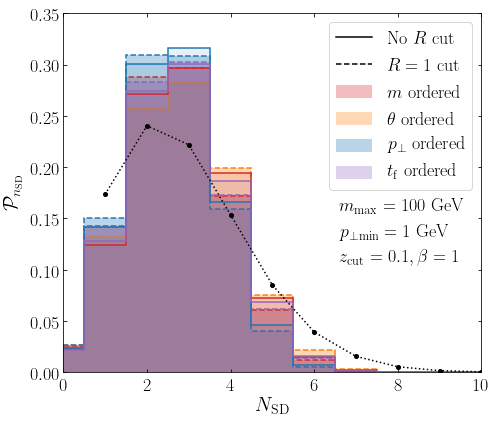

In [335]:
fig, ax = subplots()
figsize(7,6)

xbin=linspace(-0.5,10.5,12)
h = ax.hist(NSD_m_Rcut_1, bins=xbin, density=True, histtype='stepfilled', alpha=0.3, lw=2, color='C3', label=r'$m$ ordered')
h = ax.hist(NSD_theta_1, bins=xbin, density=True, histtype='stepfilled', alpha=0.3, lw=2, color='C1', label=r'$\theta$ ordered')
h = ax.hist(NSD_pT_Rcut_1, bins=xbin, density=True, histtype='stepfilled', alpha=0.3, lw=2, color='C0', label=r'$p_{\perp}$ ordered')
h = ax.hist(NSD_tf_Rcut_1, bins=xbin, density=True, histtype='stepfilled', alpha=0.3, lw=2, color='C4', label=r'$t_{\rm f}$ ordered')
h = ax.hist(NSD_m_Rcut_1, bins=xbin, density=True, histtype='step', linestyle='dashed',  lw=1.5, color='C3')
h = ax.hist(NSD_theta_1, bins=xbin, density=True, histtype='step', linestyle='dashed',  lw=1.5, color='C1')
h = ax.hist(NSD_pT_Rcut_1, bins=xbin, density=True, histtype='step', linestyle='dashed', lw=1.5, color='C0')
h = ax.hist(NSD_tf_Rcut_1, bins=xbin, density=True, histtype='step', linestyle='dashed', lw=1.5, color='C4')

h = ax.hist(NSD_m_1, bins=xbin, density=True, histtype='stepfilled', alpha=0.1, lw=2, color='C3')
h = ax.hist(NSD_pT_1, bins=xbin, density=True, histtype='stepfilled', alpha=0.1, lw=2, color='C0')
h = ax.hist(NSD_tf_1, bins=xbin, density=True, histtype='stepfilled', alpha=0.1, lw=2, color='C4')
h = ax.hist(NSD_m_1, bins=xbin, density=True, histtype='step',  lw=1.5, color='C3')
h = ax.hist(NSD_pT_1, bins=xbin, density=True, histtype='step', lw=1.5, color='C0')
h = ax.hist(NSD_tf_1, bins=xbin, density=True, histtype='step', lw=1.5, color='C4')

multi_SD=array([[i, NSD_DLA(i,0.1,0.,0.2,)] for i in range(1,11)])
plot(multi_SD.T[0], multi_SD.T[1], 'ko:', lw=1.5, markersize=4)

plot([0],[0],'k-',label=r'No $R$ cut')
plot([0],[0],'k--',label=r'$R=1$ cut',zorder=0)
text(6.6, 0.155, r'$m_{\rm max}=100$ GeV', fontsize=18)
text(6.6, 0.13, r'$p_{\perp\rm min}=1$ GeV', fontsize=18)
text(6.6, 0.105, r'$z_{\rm cut}=0.1, \beta=1$', fontsize=18)
xlim(0.,10)
ylim(0,0.35)
xlabel(r'$N_{\rm SD}$', fontsize=20)
ylabel(r'$\mathcal{P}_{n_{\rm SD}}$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=18)
legend(fontsize=18,loc='upper right');
#savefig("N_SD_shower_1.pdf", bbox_inches="tight")
tight_layout()
show()

## Shower Steps

In [17]:
tmax    = 100.**2
pT2_min = 1.
R       = 1.
m_list           = shower(N, 'm',           t_max, pT2_min, R)
pT_list          = shower(N, 'pT',          t_max, pT2_min, R)
tf_list          = shower(N, 'tf',          t_max, pT2_min, R)
theta_list       = shower(N, 'theta',       t_max, pT2_min, R)
m_Rcut_list      = shower(N, 'm_Rcut',      t_max, pT2_min, R)
pT_Rcut_list     = shower(N, 'pT_Rcut',     t_max, pT2_min, R)
tf_Rcut_list     = shower(N, 'tf_Rcut',     t_max, pT2_min, R)
m_Rord_list      = shower(N, 'm_Rord',      t_max, pT2_min, R)
pT_Rord_list     = shower(N, 'pT_Rord',     t_max, pT2_min, R)
tf_Rord_list     = shower(N, 'tf_Rord',     t_max, pT2_min, R)
theta_pTord_list = shower(N, 'theta_pTord', t_max, pT2_min, R)

0


KeyboardInterrupt: 

In [6]:
def ShowerStep(plist, order='angle'):
    plist_re_diff = []
    plist_re = Reorder(plist, order)
    for i in range(len(plist_re)):
        for j in range(len(plist_re[i])-1):
            if (i==0 and j==0): plist_re_diff = array(plist_re[i][j])-array(plist_re[i][j+1])
            else: plist_re_diff = vstack([plist_re_diff, array(plist_re[i][j])-array(plist_re[i][j+1])])
    return plist_re_diff

In [123]:
m_list_diff       = ShowerStep(m_list)
pT_list_diff      = ShowerStep(pT_list)
tf_list_diff      = ShowerStep(tf_list)
theta_list_diff   = ShowerStep(theta_list)
m_Rcut_list_diff  = ShowerStep(m_Rcut_list)
pT_Rcut_list_diff = ShowerStep(pT_Rcut_list)
tf_Rcut_list_diff = ShowerStep(tf_Rcut_list)

In [124]:
m_Rord_list_diff  = ShowerStep(m_Rord_list)
pT_Rord_list_diff = ShowerStep(pT_Rord_list)
tf_Rord_list_diff = ShowerStep(tf_Rord_list)

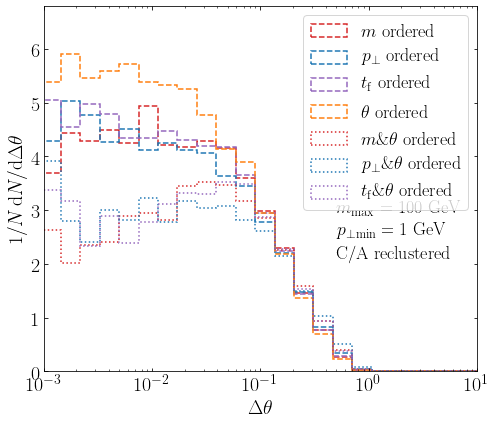

In [125]:
fig, ax = subplots()
figsize(7,6)

xbin=logspace(-3.2, 2, 30)
#h = ax.hist(m_list_diff.T[4] , bins=xbin, density=True, histtype='step', linestyle='-', lw=1.5, color='C3')
#h = ax.hist(pT_list_diff.T[4] , bins=xbin, density=True, histtype='step', linestyle='-', lw=1.5, color='C0')
#h = ax.hist(tf_list_diff.T[4] , bins=xbin, density=True, histtype='step', linestyle='-', lw=1.5, color='C4')

h = ax.hist(m_Rcut_list_diff.T[4] , bins=xbin, density=True, histtype='step', linestyle='--', lw=1.5, color='C3', label=r'$m$ ordered')
h = ax.hist(pT_Rcut_list_diff.T[4] , bins=xbin, density=True, histtype='step', linestyle='--', lw=1.5, color='C0', label=r'$p_{\perp}$ ordered')
h = ax.hist(tf_Rcut_list_diff.T[4] , bins=xbin, density=True, histtype='step', linestyle='--', lw=1.5, color='C4', label=r'$t_{\rm f}$ ordered')
h = ax.hist(theta_list_diff.T[4] , bins=xbin, density=True, histtype='step', linestyle='--', lw=1.5, color='C1', label=r'$\theta$ ordered')

h = ax.hist(m_Rord_list_diff.T[4] , bins=xbin, density=True, histtype='step', linestyle=':', lw=1.5, color='C3', label=r'$m\&\theta$ ordered')
h = ax.hist(pT_Rord_list_diff.T[4] , bins=xbin, density=True, histtype='step', linestyle=':', lw=1.5, color='C0', label=r'$p_{\perp}\&\theta$ ordered')
h = ax.hist(tf_Rord_list_diff.T[4] , bins=xbin, density=True, histtype='step', linestyle=':', lw=1.5, color='C4', label=r'$t_{\rm f}\&\theta$ ordered')



#plot([0],[0], 'k-', label=r'No $R$ cut')
#plot([0],[0], 'k--', label=r'$R=1$ cut')

ax.set_xscale('log')
xlim(1e-3,1e1)
#ylim(0,2.5)
xlabel(r'$\Delta\theta$', fontsize=20)
ylabel(r'$1/N\,\mathrm{d}N/\mathrm{d}\Delta\theta$', fontsize=20)
text(0.5,2.9, r'$m_{\rm max}=100$ GeV', fontsize=18)
text(0.5,2.5, r'$p_{\perp\rm min}=1$ GeV', fontsize=18)
text(0.5,2.1, r'C/A reclustered', fontsize=18)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18, ncol=1,loc='upper right');
#savefig("N_thetag_shower.pdf", bbox_inches="tight")
tight_layout()
show()

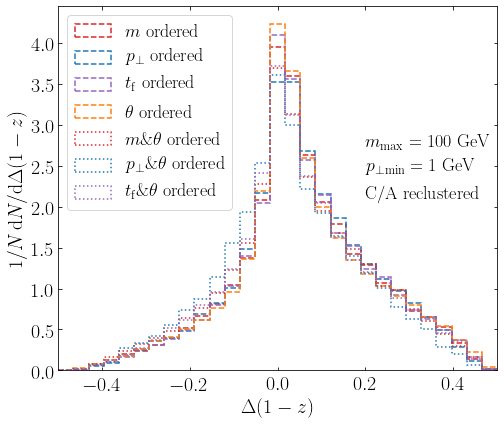

In [126]:
fig, ax = subplots()
figsize(7,6)

xbin=linspace(-0.5, 0.5, 30)
#h = ax.hist((m_list_diff.T[1]) , bins=xbin, density=True, histtype='step', linestyle='-', lw=1.5, color='C3')
#h = ax.hist((pT_list_diff.T[1]) , bins=xbin, density=True, histtype='step', linestyle='-', lw=1.5, color='C0')
#h = ax.hist((tf_list_diff.T[1]) , bins=xbin, density=True, histtype='step', linestyle='-', lw=1.5, color='C4')

#xbin=logspace(-3, log10(0.5), 20)
xbin=linspace(-0.5, 0.5, 30)
h = ax.hist((m_Rcut_list_diff.T[1]) , bins=xbin, density=True, histtype='step', linestyle='--', lw=1.5, color='C3', label=r'$m$ ordered')
h = ax.hist((pT_Rcut_list_diff.T[1]) , bins=xbin, density=True, histtype='step', linestyle='--', lw=1.5, color='C0', label=r'$p_{\perp}$ ordered')
h = ax.hist((tf_Rcut_list_diff.T[1]) , bins=xbin, density=True, histtype='step', linestyle='--', lw=1.5, color='C4', label=r'$t_{\rm f}$ ordered')
h = ax.hist((theta_list_diff.T[1]) , bins=xbin, density=True, histtype='step', linestyle='--', lw=1.5, color='C1', label=r'$\theta$ ordered')

h = ax.hist((m_Rord_list_diff.T[1]) , bins=xbin, density=True, histtype='step', linestyle=':', lw=1.5, color='C3', label=r'$m\&\theta$ ordered')
h = ax.hist((pT_Rord_list_diff.T[1]) , bins=xbin, density=True, histtype='step', linestyle=':', lw=1.5, color='C0', label=r'$p_{\perp}\&\theta$ ordered')
h = ax.hist((tf_Rord_list_diff.T[1]) , bins=xbin, density=True, histtype='step', linestyle=':', lw=1.5, color='C4', label=r'$t_{\rm f}\&\theta$ ordered')


#ax.set_xscale('log')
xlim(-0.5,0.5)
#ylim(0,2.5)
xlabel(r'$\Delta (1-z)$', fontsize=20)
ylabel(r'$1/N\,\mathrm{d}N/\mathrm{d}\Delta (1-z)$', fontsize=20)
text(0.2,2.7, r'$m_{\rm max}=100$ GeV', fontsize=18)
text(0.2,2.4, r'$p_{\perp\rm min}=1$ GeV', fontsize=18)
text(0.2,2.1, r'C/A reclustered', fontsize=18)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18, ncol=1,loc='upper left');
#savefig("N_thetag_shower.pdf", bbox_inches="tight")
tight_layout()
show()

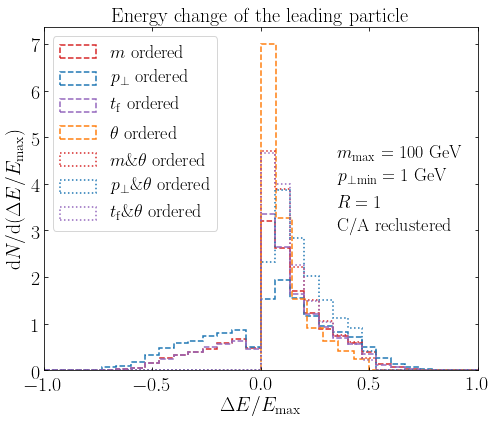

In [127]:
fig, ax = subplots()
figsize(7,6)

xbin=linspace(-1, 1, 31)
h = ax.hist(m_Rcut_list_diff.T[2]/sqrt(t_max)*R , bins=xbin, density=True, histtype='step', linestyle='--', lw=1.5, color='C3', label=r'$m$ ordered')
h = ax.hist(pT_Rcut_list_diff.T[2]/sqrt(t_max)*R, bins=xbin, density=True, histtype='step', linestyle='--', lw=1.5, color='C0', label=r'$p_{\perp}$ ordered')
h = ax.hist(tf_Rcut_list_diff.T[2]/sqrt(t_max)*R, bins=xbin, density=True, histtype='step', linestyle='--', lw=1.5, color='C4', label=r'$t_{\rm f}$ ordered')
xbin=linspace(0, 1, 15)
h = ax.hist(theta_list_diff.T[2]/sqrt(t_max)*R  , bins=xbin, density=True, histtype='step', linestyle='--', lw=1.5, color='C1', label=r'$\theta$ ordered')

xbin=linspace(-1, 1, 31)
h = ax.hist(m_Rord_list_diff.T[2]/sqrt(t_max)*R , bins=xbin, density=True, histtype='step', linestyle=':', lw=1.5, color='C3', label=r'$m\&\theta$ ordered')
h = ax.hist(pT_Rord_list_diff.T[2]/sqrt(t_max)*R, bins=xbin, density=True, histtype='step', linestyle=':', lw=1.5, color='C0', label=r'$p_{\perp}\&\theta$ ordered')
h = ax.hist(tf_Rord_list_diff.T[2]/sqrt(t_max)*R, bins=xbin, density=True, histtype='step', linestyle=':', lw=1.5, color='C4', label=r'$t_{\rm f}\&\theta$ ordered')


#ax.set_xscale('log')
xlim(-1,1)
#ylim(0,2.5)
xlabel(r'$\Delta E/E_{\max}$', fontsize=20)
ylabel(r'$\mathrm{d}N/\mathrm{d}(\Delta E/E_{\max})$', fontsize=20)
text(0.35,4.5, r'$m_{\rm max}=100$ GeV', fontsize=18)
text(0.35,4., r'$p_{\perp\rm min}=1$ GeV', fontsize=18)
text(0.35,3.5, r'$R=1$', fontsize=18)
text(0.35,3., r'C/A reclustered', fontsize=18)
title('Energy change of the leading particle', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18, ncol=1,loc='upper left');
#savefig("N_thetag_shower.pdf", bbox_inches="tight")
tight_layout()
show()

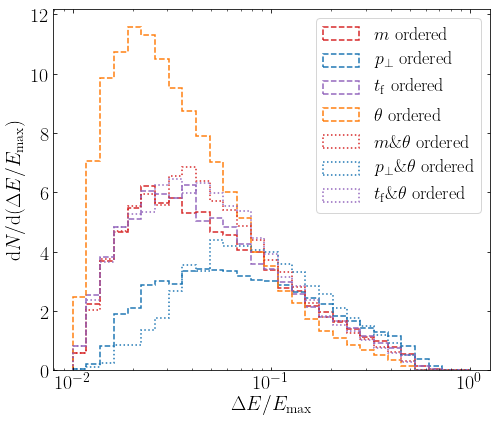

In [128]:
fig, ax = subplots()
figsize(7,6)

xbin=logspace(-2, 0, 30)
#h = ax.hist(m_list_diff.T[2] , bins=xbin, density=True, histtype='step', linestyle='-', lw=1.5, color='C3')
#h = ax.hist(pT_list_diff.T[2] , bins=xbin, density=True, histtype='step', linestyle='-', lw=1.5, color='C0')
#h = ax.hist(tf_list_diff.T[2] , bins=xbin, density=True, histtype='step', linestyle='-', lw=1.5, color='C4')

h = ax.hist(m_Rcut_list_diff.T[2]/sqrt(t_max)*R , bins=xbin, density=True, histtype='step', linestyle='--', lw=1.5, color='C3', label=r'$m$ ordered')
h = ax.hist(pT_Rcut_list_diff.T[2]/sqrt(t_max)*R , bins=xbin, density=True, histtype='step', linestyle='--', lw=1.5, color='C0', label=r'$p_{\perp}$ ordered')
h = ax.hist(tf_Rcut_list_diff.T[2]/sqrt(t_max)*R , bins=xbin, density=True, histtype='step', linestyle='--', lw=1.5, color='C4', label=r'$t_{\rm f}$ ordered')
h = ax.hist(theta_list_diff.T[2]/sqrt(t_max)*R , bins=xbin, density=True, histtype='step', linestyle='--', lw=1.5, color='C1', label=r'$\theta$ ordered')

h = ax.hist(m_Rord_list_diff.T[2]/sqrt(t_max)*R , bins=xbin, density=True, histtype='step', linestyle=':', lw=1.5, color='C3', label=r'$m\&\theta$ ordered')
h = ax.hist(pT_Rord_list_diff.T[2]/sqrt(t_max)*R , bins=xbin, density=True, histtype='step', linestyle=':', lw=1.5, color='C0', label=r'$p_{\perp}\&\theta$ ordered')
h = ax.hist(tf_Rord_list_diff.T[2]/sqrt(t_max)*R , bins=xbin, density=True, histtype='step', linestyle=':', lw=1.5, color='C4', label=r'$t_{\rm f}\&\theta$ ordered')


ax.set_xscale('log')
#xlim(0.03,1e1)
#ylim(0,2.5)
xlabel(r'$\Delta E/E_{\max}$', fontsize=20)
ylabel(r'$\mathrm{d}N/\mathrm{d}(\Delta E/E_{\max})$', fontsize=20)
#text(20,0.07, r'$m_{\rm max}=100$ GeV', fontsize=18)
#text(20,0.06, r'$p_{\perp\rm min}=1$ GeV', fontsize=18)
#text(20,0.05, r'$R=1$', fontsize=18)
#text(20,0.04, r'C/A reclustered', fontsize=18)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18, ncol=1,loc='upper right');
#savefig("N_thetag_shower.pdf", bbox_inches="tight")
tight_layout()
show()

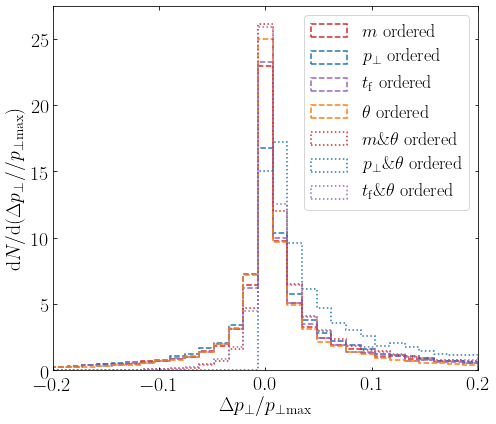

In [129]:
fig, ax = subplots()
figsize(7,6)

xbin=linspace(-0.2, 0.2, 30)
#h = ax.hist(m_list_diff.T[3] , bins=xbin, density=True, histtype='step', linestyle='-', lw=1.5, color='C3')
#h = ax.hist(pT_list_diff.T[3] , bins=xbin, density=True, histtype='step', linestyle='-', lw=1.5, color='C0')
#h = ax.hist(tf_list_diff.T[3] , bins=xbin, density=True, histtype='step', linestyle='-', lw=1.5, color='C4')

h = ax.hist(m_Rcut_list_diff.T[3]/sqrt(t_max)/4. , bins=xbin, density=True, histtype='step', linestyle='--', lw=1.5, color='C3', label=r'$m$ ordered')
h = ax.hist(pT_Rcut_list_diff.T[3]/sqrt(t_max)/4. , bins=xbin, density=True, histtype='step', linestyle='--', lw=1.5, color='C0', label=r'$p_{\perp}$ ordered')
h = ax.hist(tf_Rcut_list_diff.T[3]/sqrt(t_max)/4. , bins=xbin, density=True, histtype='step', linestyle='--', lw=1.5, color='C4', label=r'$t_{\rm f}$ ordered')
h = ax.hist(theta_list_diff.T[3]/sqrt(t_max)/4. , bins=xbin, density=True, histtype='step', linestyle='--', lw=1.5, color='C1', label=r'$\theta$ ordered')

h = ax.hist(m_Rord_list_diff.T[3]/sqrt(t_max)/4. , bins=xbin, density=True, histtype='step', linestyle=':', lw=1.5, color='C3', label=r'$m\&\theta$ ordered')
h = ax.hist(pT_Rord_list_diff.T[3]/sqrt(t_max)/4. , bins=xbin, density=True, histtype='step', linestyle=':', lw=1.5, color='C0', label=r'$p_{\perp}\&\theta$ ordered')
h = ax.hist(tf_Rord_list_diff.T[3]/sqrt(t_max)/4. , bins=xbin, density=True, histtype='step', linestyle=':', lw=1.5, color='C4', label=r'$t_{\rm f}\&\theta$ ordered')



#ax.set_xscale('log')
xlim(-0.2,0.2)
#ylim(0,2.5)
xlabel(r'$\Delta p_{\perp}/p_{\perp\max}$', fontsize=20)
ylabel(r'$\mathrm{d}N/\mathrm{d}(\Delta p_{\perp}//p_{\perp\max})$', fontsize=20)
#text(30.4,0.035, r'$m_{\rm max}=100$ GeV', fontsize=18)
#text(30.4,0.031, r'$p_{\perp\rm min}=1$ GeV', fontsize=18)
#text(30.4,0.027, r'$R=1$', fontsize=18)
#text(30.4,0.023, r'$z_g=0.1, \beta=0$', fontsize=18)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
legend(fontsize=18, ncol=1,loc='upper right');
#savefig("N_thetag_shower.pdf", bbox_inches="tight")
tight_layout()
show()

## Shower Flow Direction

In [192]:
def func(x, a, b):
    return a*x + b
def direction(plist):
    slope = []
    err   = []
    for i in range(len(plist)):
        if (len(plist[i])>1):
            popt, pcov = curve_fit(func, log(1./array(plist[i]).T[4]), log(array(plist[i]).T[3]))
            if (all(pcov < inf)):
                if (len(slope)==0): slope = popt
                else: slope = vstack([slope, popt])
                if (len(err)==0): err = sqrt(np.diag(pcov))
                else: err = vstack([err, sqrt(np.diag(pcov))])
    return [slope, err]

In [190]:
N       = 10000
t_max   = 100.**2
pT2_min = 1.
R       = 1.
m_list     = shower(N, 'm_Rcut',  t_max, pT2_min, R)
pt_list    = shower(N, 'pT_Rcut', t_max, pT2_min, R)
tf_list    = shower(N, 'tf_Rcut', t_max, pT2_min, R)
theta_list = shower(N, 'theta',   t_max, pT2_min, R)

0
5000
0
5000
0
5000
0
5000


In [193]:
m_dir     = direction(m_list)
pt_dir    = direction(pt_list)
tf_dir    = direction(tf_list)
theta_dir = direction(theta_list)

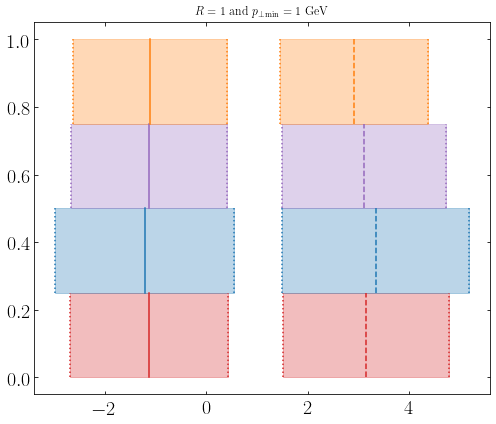

In [229]:
fig, ax = subplots()
figsize(7,6)
av = sum(m_dir[0].T[0])/len(m_dir[0].T[0])
sig = sum(m_dir[1].T[0])/len(m_dir[1].T[0])
plot([av,av],[0,0.25], 'C3-')
fill_between([av-sig,av+sig],[0,0],[0.25,0.25], color='C3', alpha=0.3)
plot([av-sig,av-sig],[0,0.25], 'C3:')
plot([av+sig,av+sig],[0,0.25], 'C3:')
av = sum(pt_dir[0].T[0])/len(pt_dir[0].T[0])
sig = sum(pt_dir[1].T[0])/len(pt_dir[1].T[0])
plot([av,av],[0.25,0.5], 'C0-')
fill_between([av-sig,av+sig],[0.25,0.25],[0.5,0.5], color='C0', alpha=0.3)
plot([av-sig,av-sig],[0.25,0.5], 'C0:')
plot([av+sig,av+sig],[0.25,0.5], 'C0:')
av = sum(tf_dir[0].T[0])/len(tf_dir[0].T[0])
sig = sum(tf_dir[1].T[0])/len(tf_dir[1].T[0])
plot([av,av],[0.5,0.75], 'C4-')
fill_between([av-sig,av+sig],[0.5,0.5],[0.75,0.75], color='C4', alpha=0.3)
plot([av-sig,av-sig],[0.5,0.75], 'C4:')
plot([av+sig,av+sig],[0.5,0.75], 'C4:')
av = sum(theta_dir[0].T[0])/len(theta_dir[0].T[0])
sig = sum(theta_dir[1].T[0])/len(theta_dir[1].T[0])
plot([av,av],[0.75,1], 'C1-')
fill_between([av-sig,av+sig],[0.75,0.75],[1,1], color='C1', alpha=0.3)
plot([av-sig,av-sig],[0.75,1], 'C1:')
plot([av+sig,av+sig],[0.75,1], 'C1:')

av = sum(m_dir[0].T[1])/len(m_dir[0].T[1])
sig = sum(m_dir[1].T[1])/len(m_dir[1].T[1])
plot([av,av],[0,0.25], 'C3--')
fill_between([av-sig,av+sig],[0,0],[0.25,0.25], color='C3', alpha=0.3)
plot([av-sig,av-sig],[0,0.25], 'C3:')
plot([av+sig,av+sig],[0,0.25], 'C3:')
av = sum(pt_dir[0].T[1])/len(pt_dir[0].T[1])
sig = sum(pt_dir[1].T[1])/len(pt_dir[1].T[1])
plot([av,av],[0.25,0.5], 'C0--')
fill_between([av-sig,av+sig],[0.25,0.25],[0.5,0.5], color='C0', alpha=0.3)
plot([av-sig,av-sig],[0.25,0.5], 'C0:')
plot([av+sig,av+sig],[0.25,0.5], 'C0:')
av = sum(tf_dir[0].T[1])/len(tf_dir[0].T[1])
sig = sum(tf_dir[1].T[1])/len(tf_dir[1].T[1])
plot([av,av],[0.5,0.75], 'C4--')
fill_between([av-sig,av+sig],[0.5,0.5],[0.75,0.75], color='C4', alpha=0.3)
plot([av-sig,av-sig],[0.5,0.75], 'C4:')
plot([av+sig,av+sig],[0.5,0.75], 'C4:')
av = sum(theta_dir[0].T[1])/len(theta_dir[0].T[1])
sig = sum(theta_dir[1].T[1])/len(theta_dir[1].T[1])
plot([av,av],[0.75,1], 'C1--')
fill_between([av-sig,av+sig],[0.75,0.75],[1,1], color='C1', alpha=0.3)
plot([av-sig,av-sig],[0.75,1], 'C1:')
plot([av+sig,av+sig],[0.75,1], 'C1:')

title(r'$R=1$ and $p_{\perp\min}=1$ GeV')

tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
tight_layout()
show()

(0, 0.25)

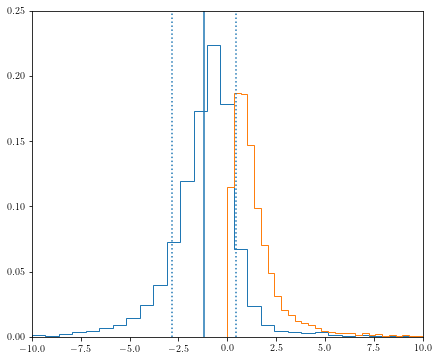

In [188]:
xbin = linspace(-10,10,30)
h = hist(dire[0].T[0], bins=xbin, weights=ones(len(dire[0].T[0]))/len(dire[0].T[0]), histtype='step', color='C0')
xbin = linspace(0,10,30)
h = hist(dire[1].T[0], bins=xbin, weights=ones(len(dire[1].T[0]))/len(dire[1].T[0]), histtype='step', color='C1')
av = sum(dire[0].T[0])/len(dire[0].T[0])
sig = sum(dire[1].T[0])/len(dire[1].T[0])
plot([av,av],[0,1], 'C0-')
plot([av-sig,av-sig],[0,1], 'C0:')
plot([av+sig,av+sig],[0,1], 'C0:')
xlim(-10,10)
ylim(0,0.25)

(0, 0.25)

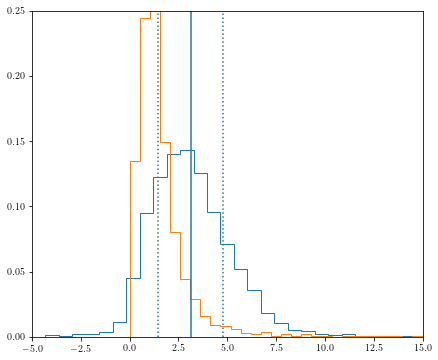

In [189]:
xbin = linspace(-5,15,30)
h = hist(dire[0].T[1], bins=xbin, weights=ones(len(dire[0].T[1]))/len(dire[0].T[1]), histtype='step', color='C0')
xbin = linspace(0,15,30)
h = hist(dire[1].T[1], bins=xbin, weights=ones(len(dire[1].T[1]))/len(dire[1].T[1]), histtype='step', color='C1')
av = sum(dire[0].T[1])/len(dire[0].T[1])
sig = sum(dire[1].T[1])/len(dire[1].T[1])
plot([av,av],[0,1], 'C0-')
plot([av-sig,av-sig],[0,1], 'C0:')
plot([av+sig,av+sig],[0,1], 'C0:')
xlim(-5,15)
ylim(0,0.25)

(-20, 20)

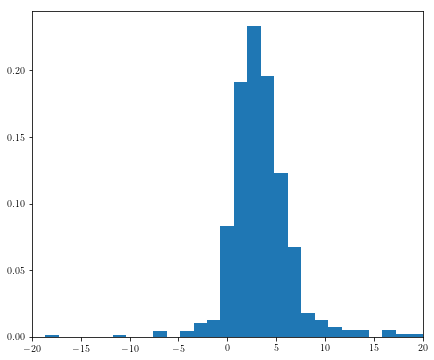

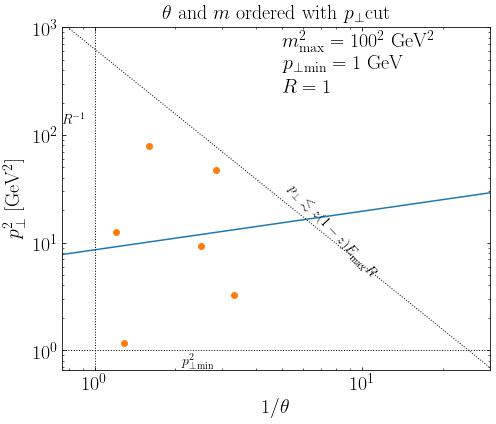

In [28]:
fig, ax = subplots()
figsize(7,6)

x = logspace(-1, 2, 30)
plot(x, exp(popt[1])*x**popt[0])
loglog(1./array(m_list[0]).T[4], array(m_list[0]).T[3], 'o')
plot([1e-5,1e5],[pT2_min,pT2_min],'k:',lw=1)
text(2.1e0, 0.68, r'$p^2_{\perp\rm min}$', fontsize=14)
invtheta=logspace(-3,2,30)
loglog(invtheta,sqrt(t_max/R)**2/16./invtheta**2,'k:',lw=1)
text(5.1e0, 2.9e1, r'$p_\perp\lesssim z(1-z)E_{\rm max}R$', rotation=-47, fontsize=14)
plot([1,1],[1e-1,1e4], 'k:', lw=1)
text(7.5e-1, 1.3e2, r'$R^{-1}$',  fontsize=14)

xlabel(r'$1/\theta$', fontsize=20)
ylabel(r'$p^2_{\perp}$ [GeV$^2$]', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
xlim(0.75,3e1)
ylim(0.65,1e3)
title(r'$\theta$ and $m$ ordered with $p_\perp$cut', fontsize=20)
text(5., 6e2, r'$m^2_{\rm max}=100^2$ GeV$^2$', fontsize=20)
text(5., 3.9e2, r'$p_{\perp\rm min}=1$ GeV', fontsize=20)
text(5., 2.5e2, r'$R=1$', fontsize=20)
tick_params(axis='both',which='both', right=True, top=True, bottom=True, direction='in', labelsize=20)
tight_layout()
show()